## Observations and Insights 

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')
merged_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [64]:
# Checking the number of mice in the DataFrame.
len(merged_df['Mouse ID'].unique())

249

In [65]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_df = merged_df.loc[merged_df.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicated_mouse_df

array(['g989'], dtype=object)

In [66]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = merged_df.loc[merged_df["Mouse ID"] == "g989"]
duplicated_mouse

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [67]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df["Mouse ID"].isin(duplicated_mouse_df) == False]
clean_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [68]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [69]:
# Generate a summary statistics table of mean, median, 
    #variance, standard deviation, and SEM 
    #of the tumor volume for each regimen

# This method is the most straightforward, 
    #creating multiple series and putting them all together at the end.

In [70]:

means = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
medians = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
means = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
summary_table1 = pd.DataFrame({"Average Tumor Volume (mm3)": means,
                               "Median Tumor Volume (mm3)": medians,
                               "Std. Dev. Tumor Volume (mm3)": std,
                               "Sem Tumor Volume (mm3)": sem,
                               "Variance Tumor Volume (mm3)": variance})
summary_table1

Average Tumor Volume (mm3)  Median Tumor Volume (mm3)  \
Drug Regimen                                                          
Capomulin                      40.675741                  41.557809   
Ceftamin                       52.591172                  51.776157   
Infubinol                      52.884795                  51.820584   
Ketapril                       55.235638                  53.698743   
Naftisol                       54.331565                  52.509285   
Placebo                        54.033581                  52.288934   
Propriva                       52.320930                  50.446266   
Ramicane                       40.216745                  40.673236   
Stelasyn                       54.233149                  52.431737   
Zoniferol                      53.236507                  51.818479   

              Std. Dev. Tumor Volume (mm3)  Sem Tumor Volume (mm3)  \
Drug Regimen                                                         
Capomulin                         4.994774                0.329346   
Ceftamin                          6.268188                0.469821   
Infubinol                         6.567243                0.492236   
Ketapril                          8.279709                0.603860   
Naftisol                          8.134708                0.596466   
Placebo                           7.821003                0.581331   
Propriva                          6.622085                0.544332   
Ramicane                          4.846308                0.320955   
Stelasyn                          7.710419                0.573111   
Zoniferol                         6.966589                0.516398   

              Variance Tumor Volume (mm3)  
Drug Regimen                               
Capomulin                       24.947764  
Ceftamin                        39.290177  
Infubinol                       43.128684  
Ketapril                        68.553577  
Naftisol                        66.173479  
Placebo                         61.168083  
Propriva                        43.852013  
Ramicane                        23.486704  
Stelasyn                        59.450562  
Zoniferol                       48.533355

In [71]:
# Generate a summary statistics table of mean, 
    #median, variance, standard deviation, and SEM 
    #of the tumor volume for each regimen

# This method produces everything in a single groupby function.

## Bar Plots

In [72]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

In [73]:
plot1_mice_tp = clean_df[["Mouse ID", "Timepoint"]]
plot1_mice_tp.head()

Mouse ID  Timepoint
0     b128          0
1     f932          0
2     g107          0
3     a457          0
4     c819          0

/Users/irina/anaconda3/envs/PythonData/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


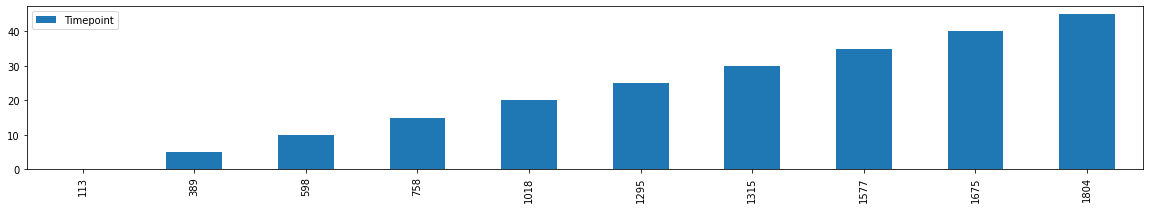

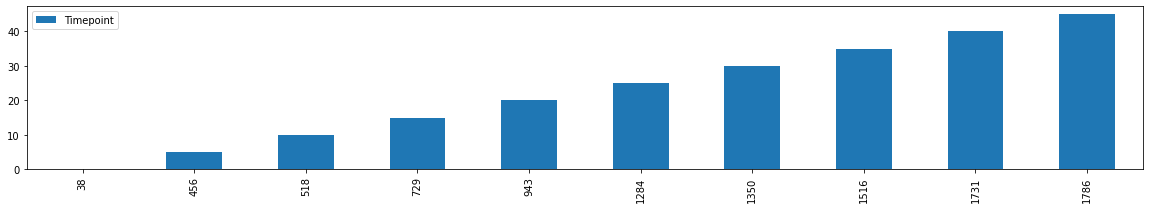

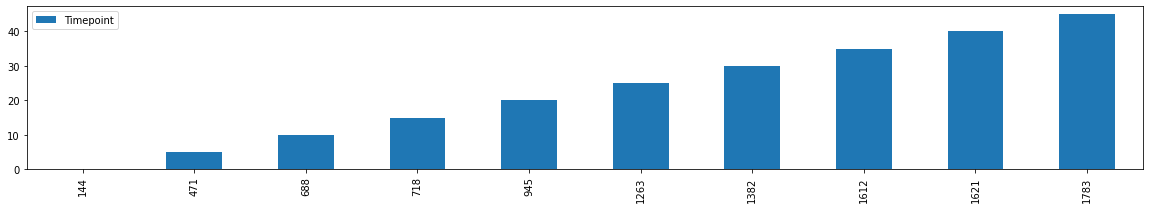

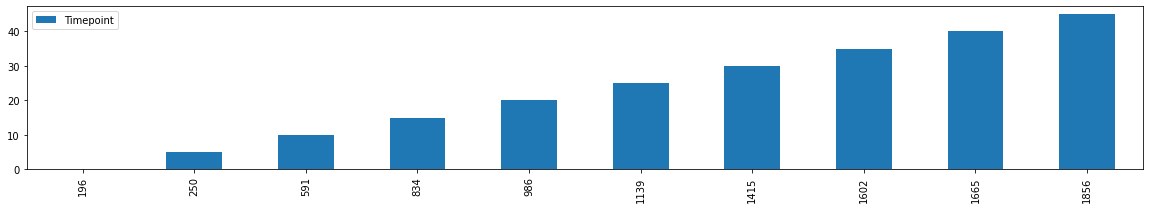

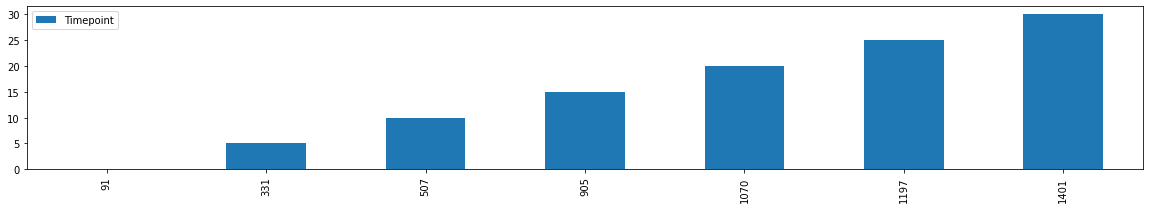

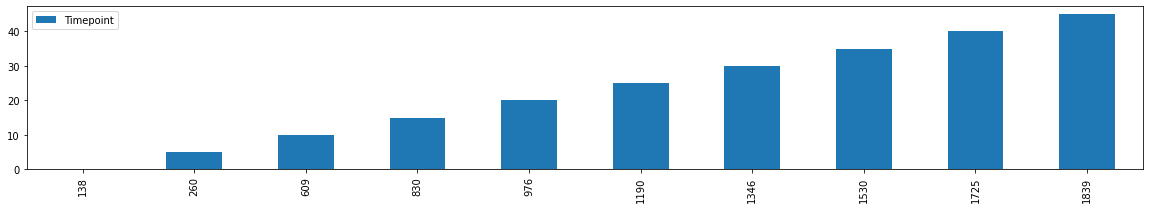

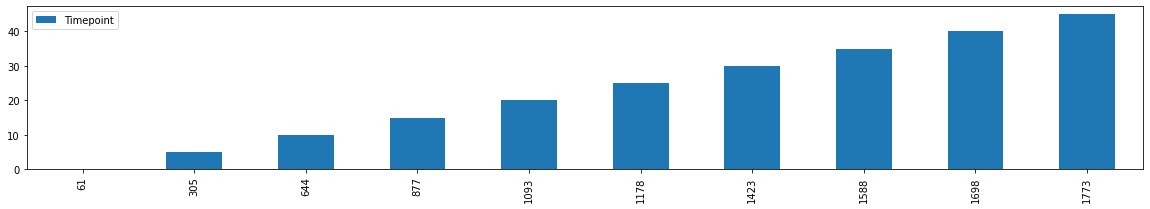

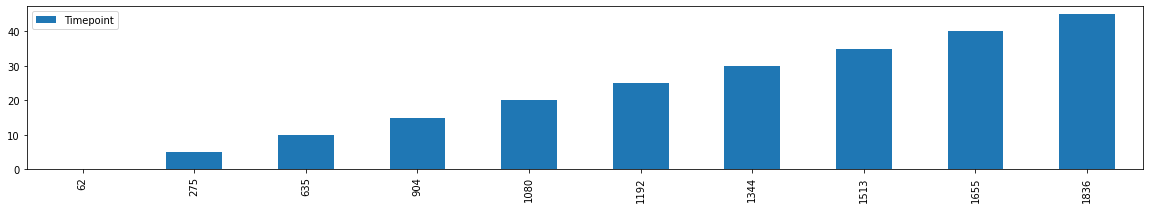

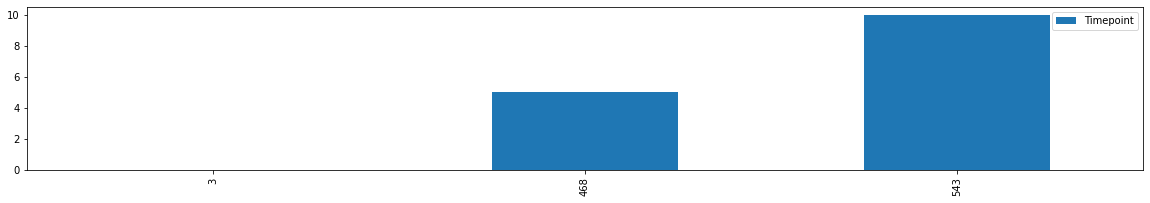

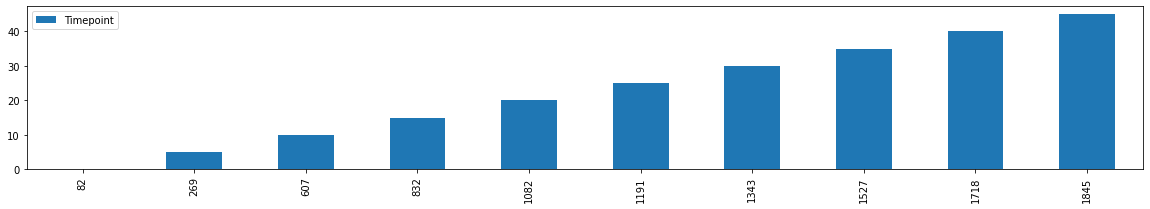

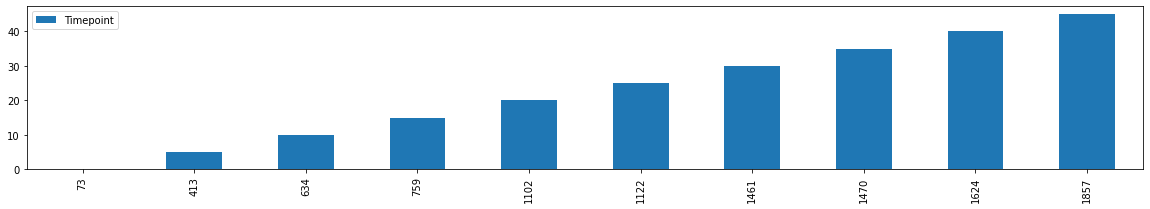

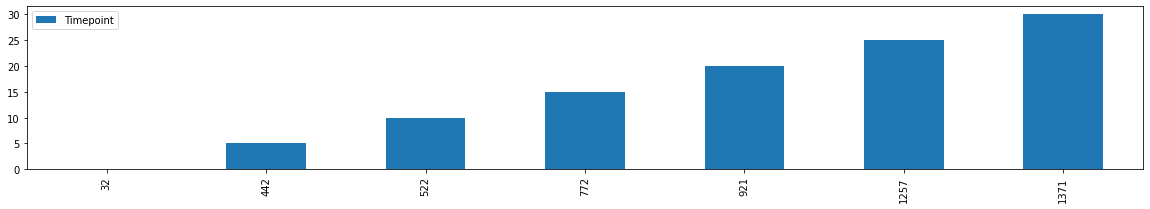

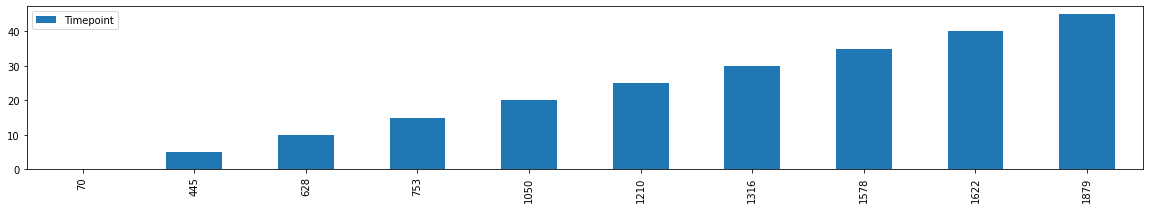

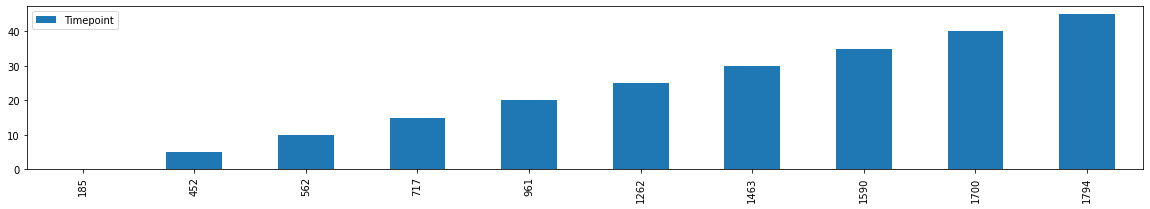

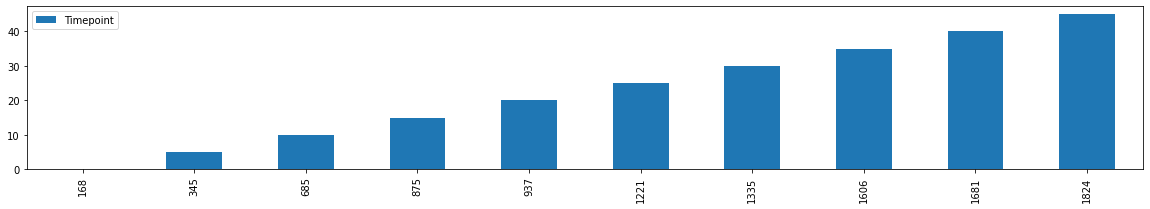

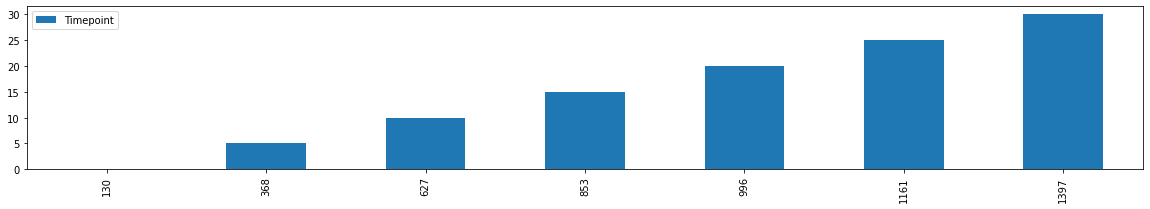

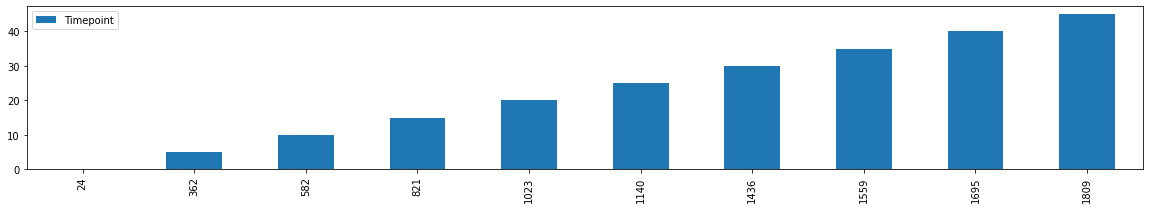

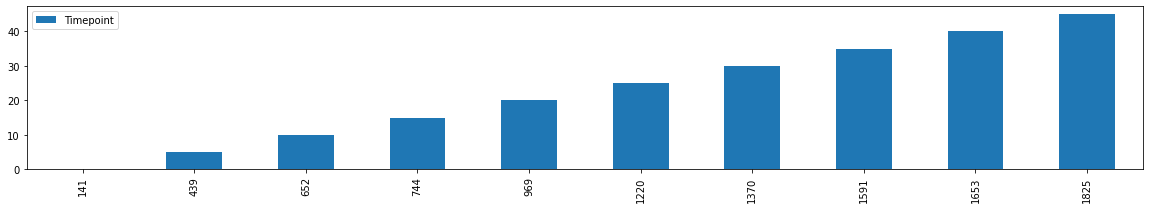

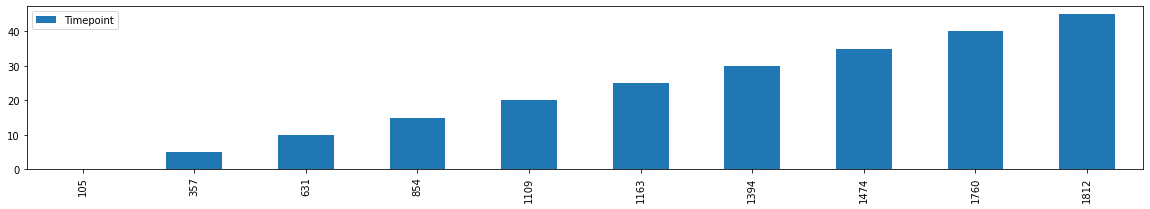

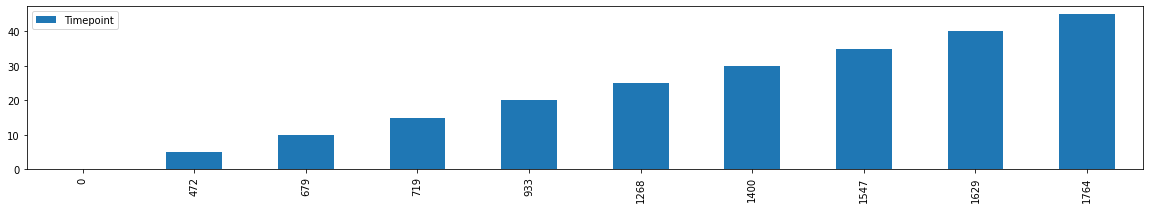

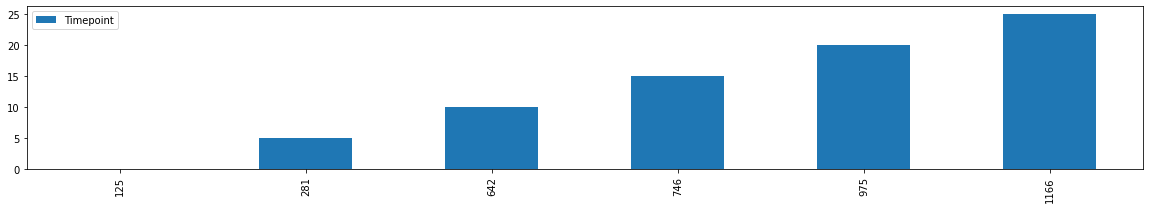

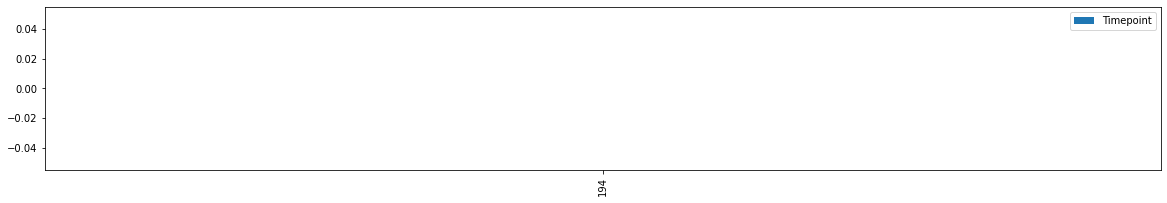

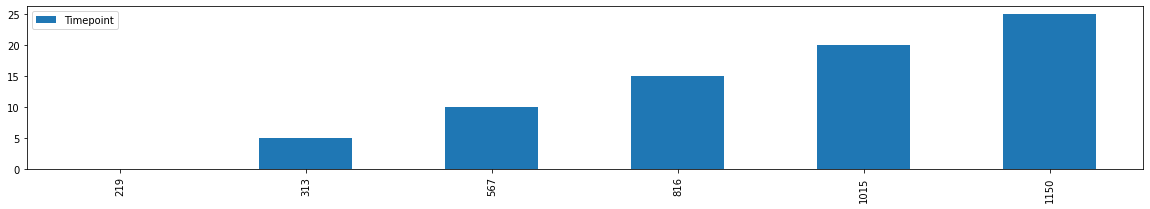

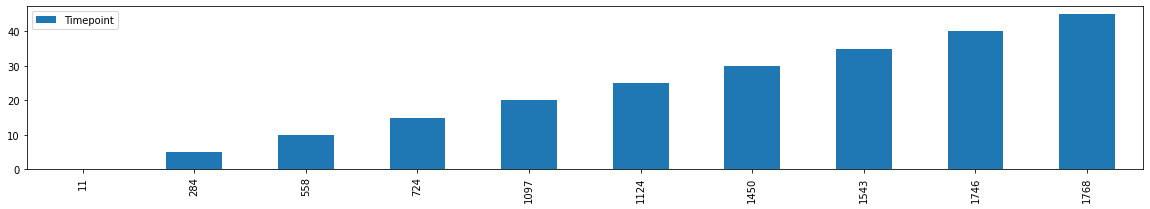

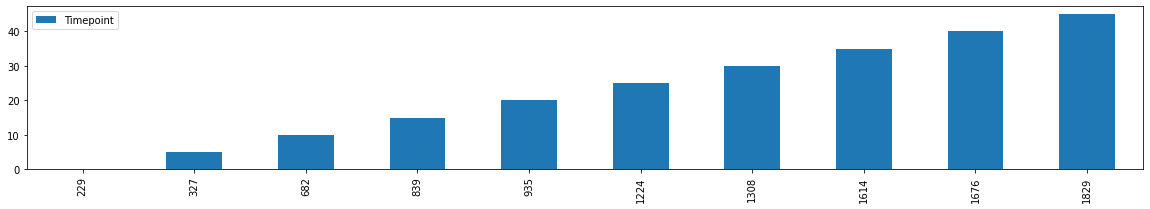

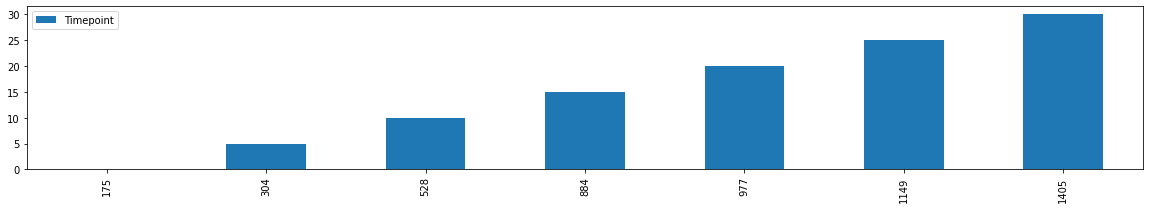

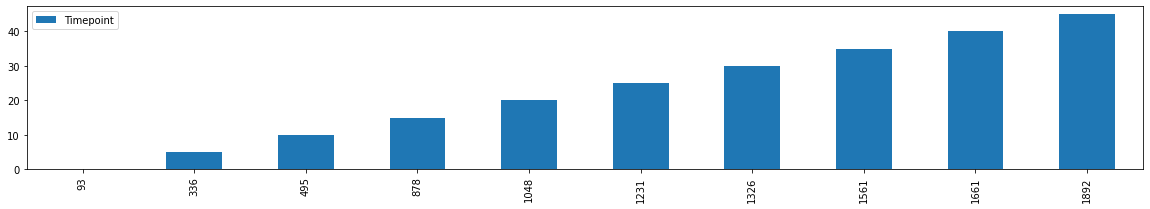

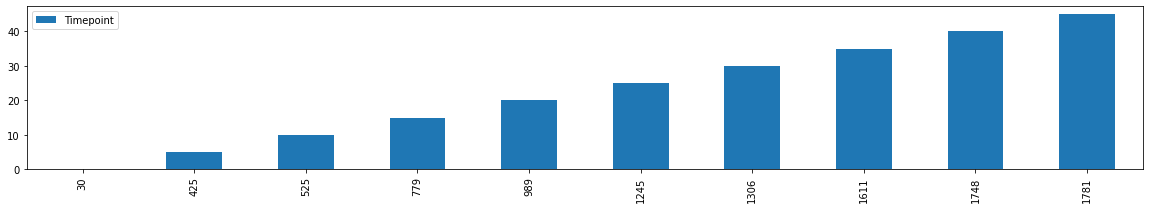

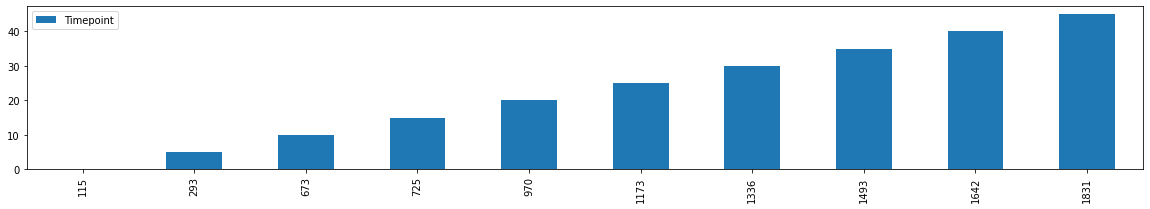

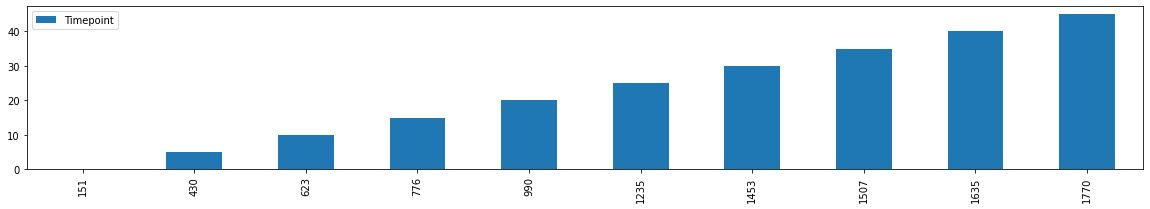

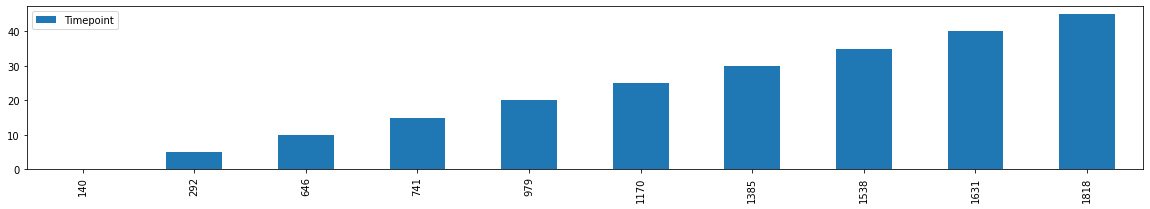

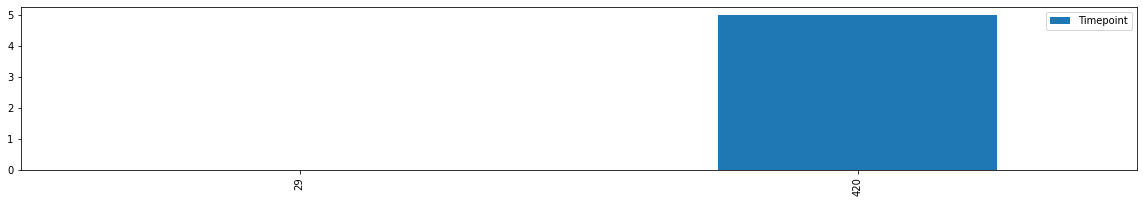

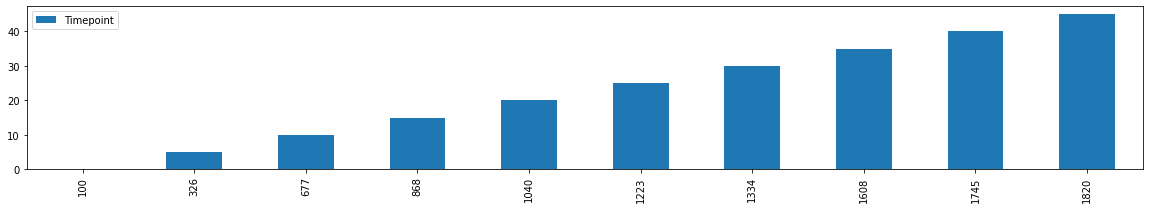

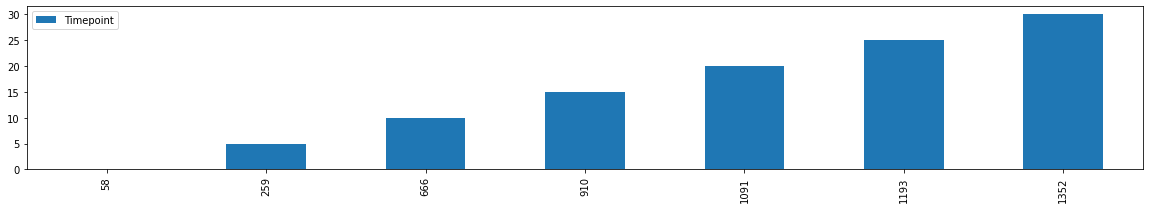

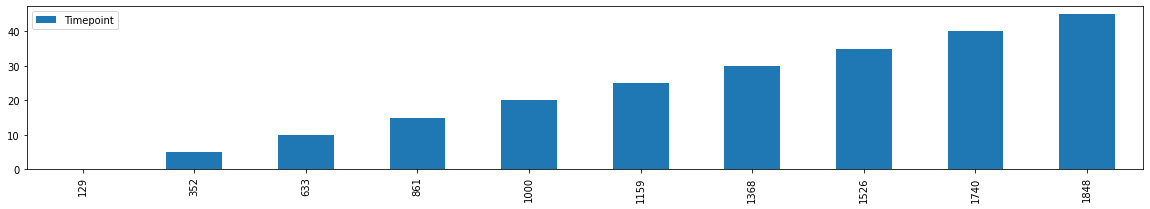

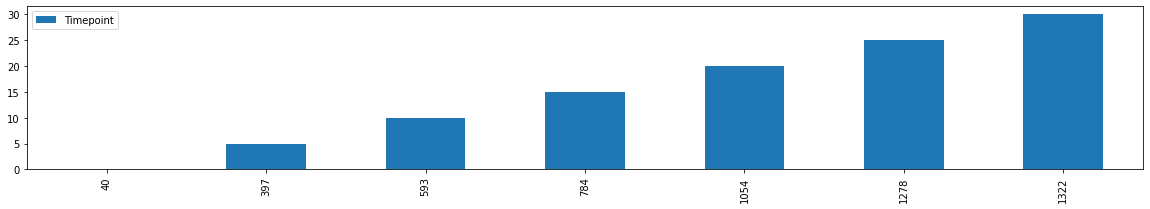

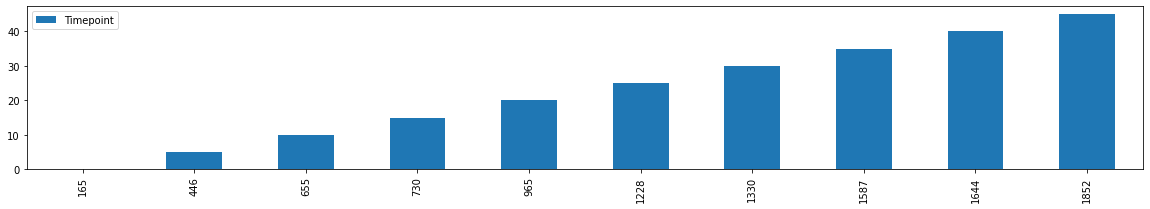

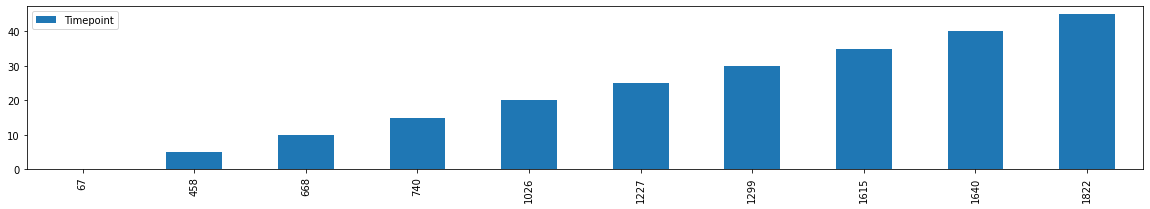

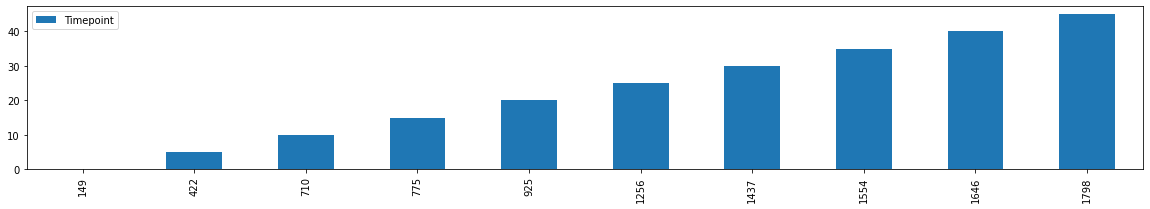

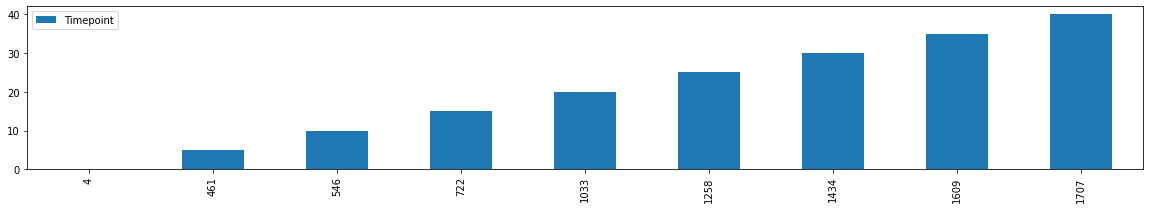

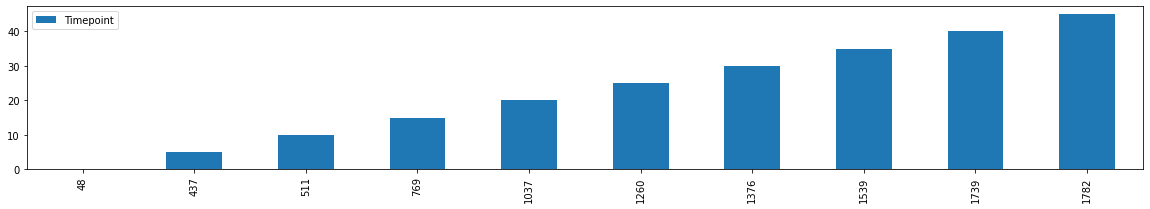

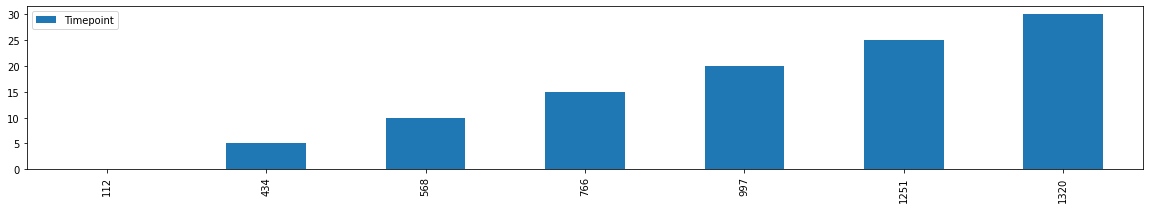

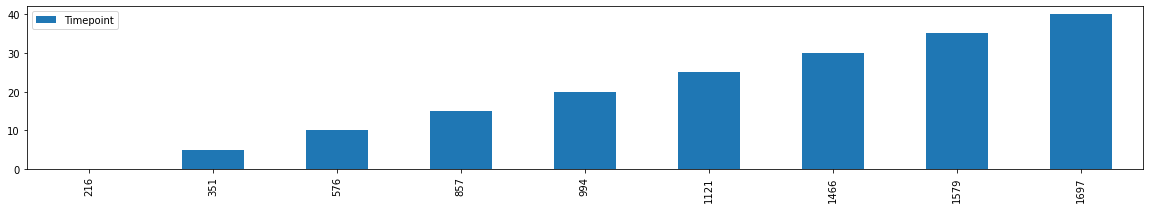

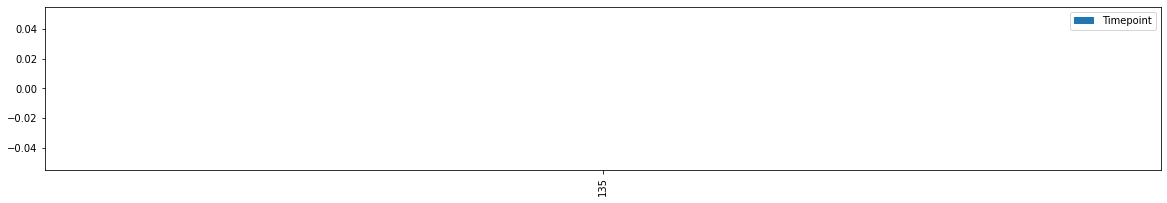

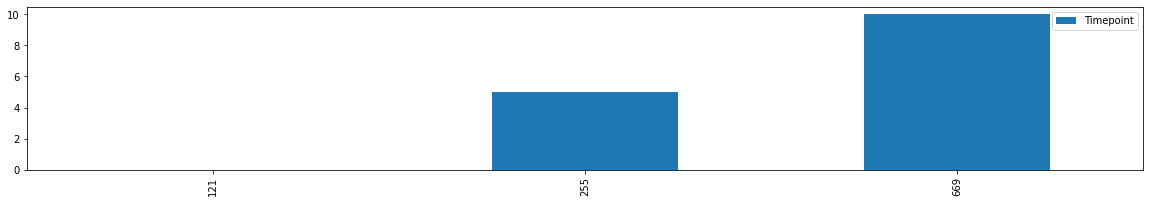

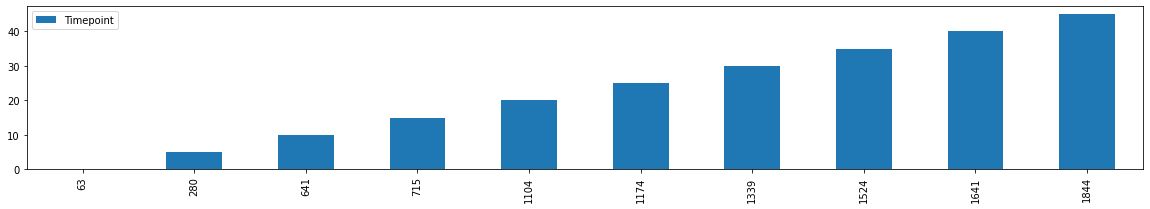

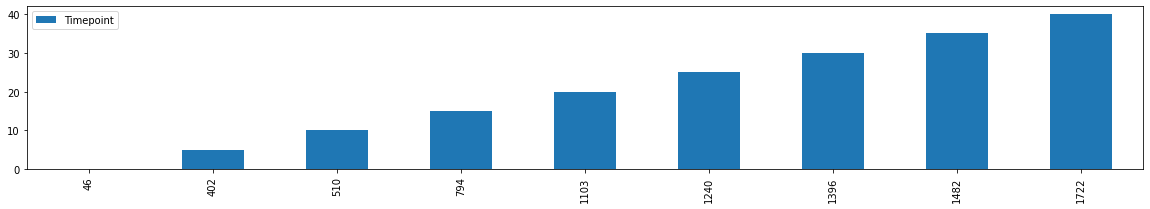

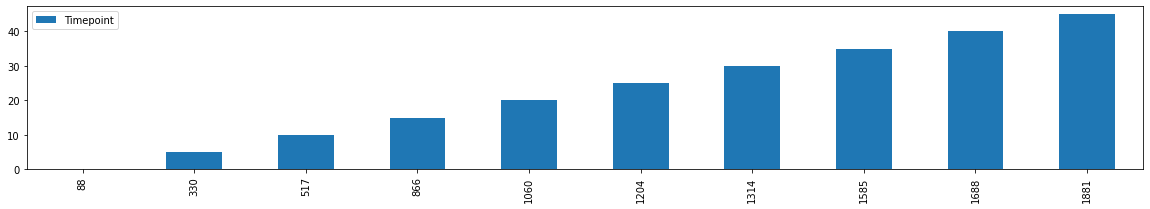

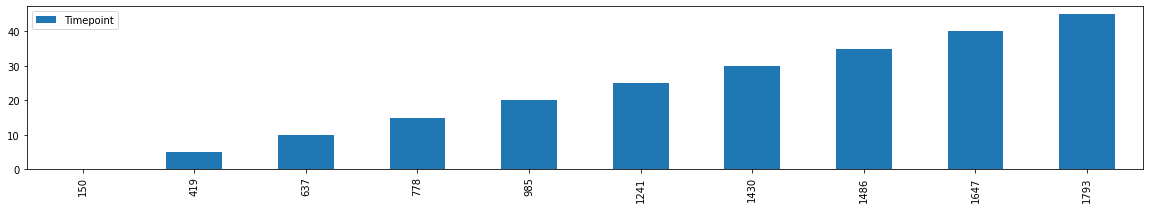

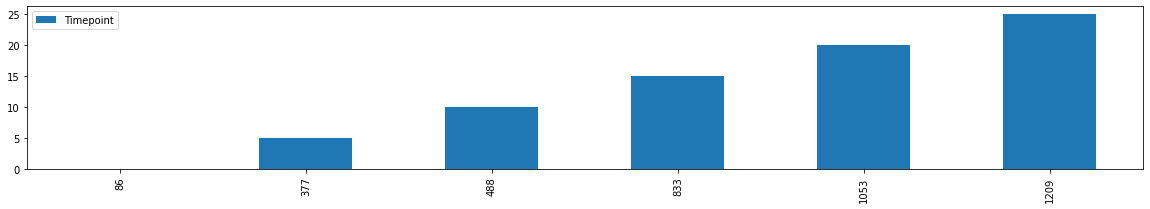

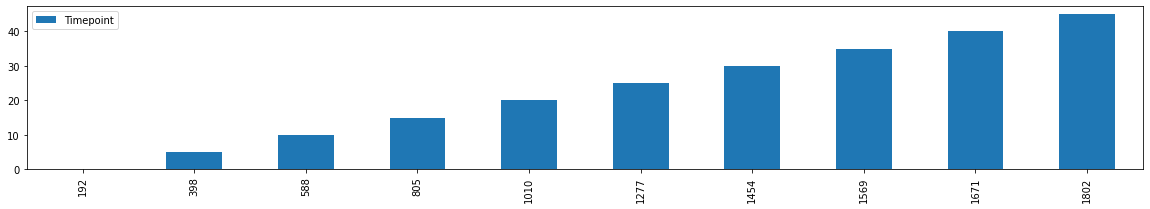

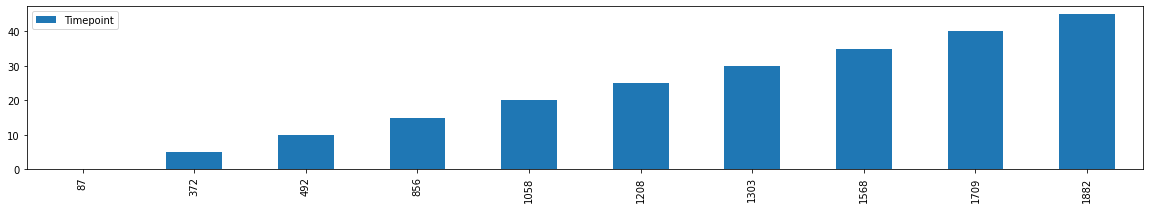

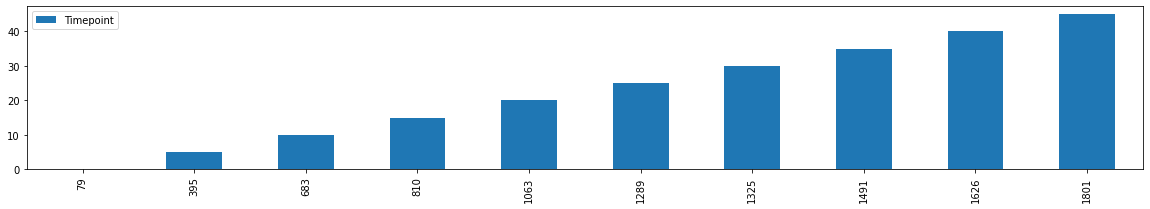

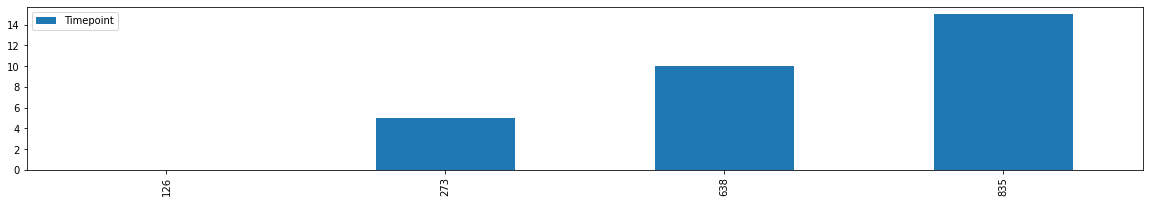

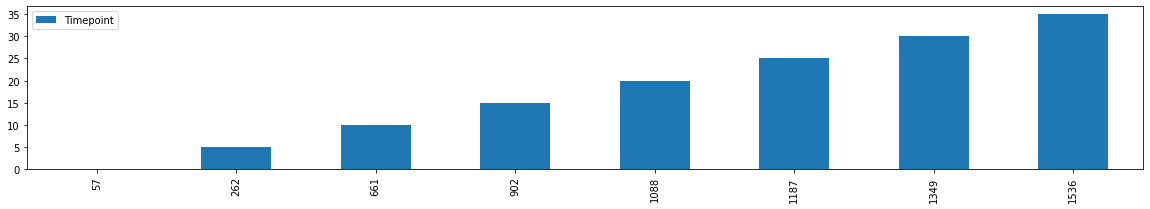

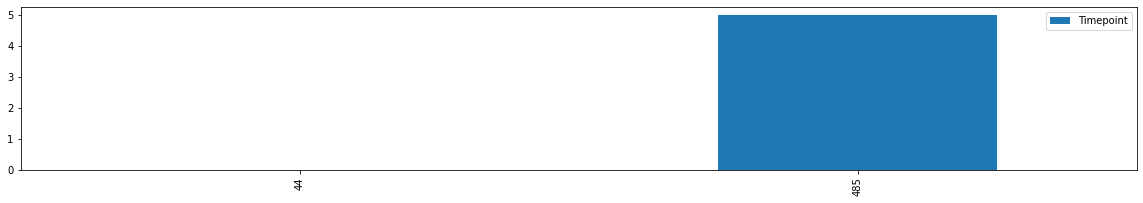

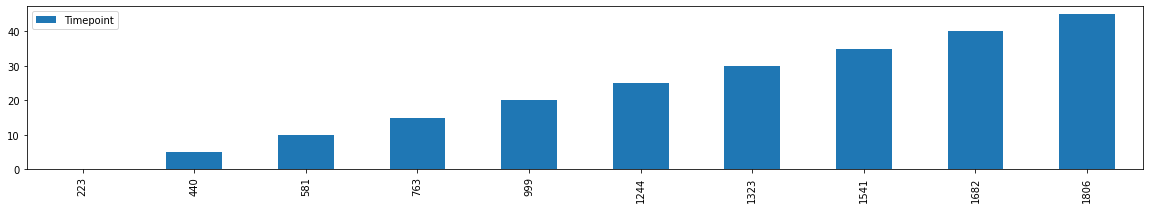

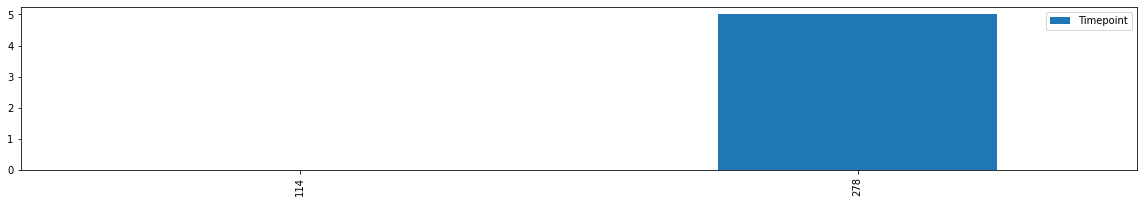

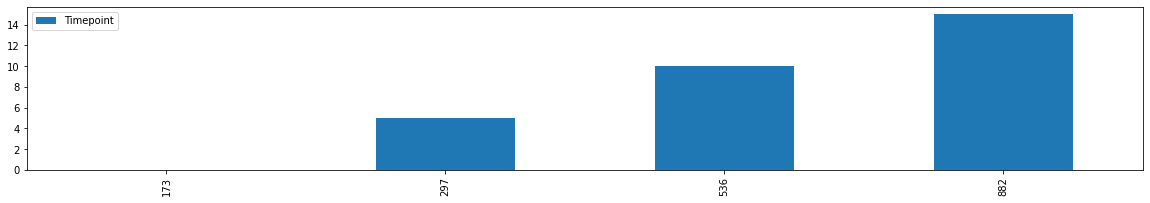

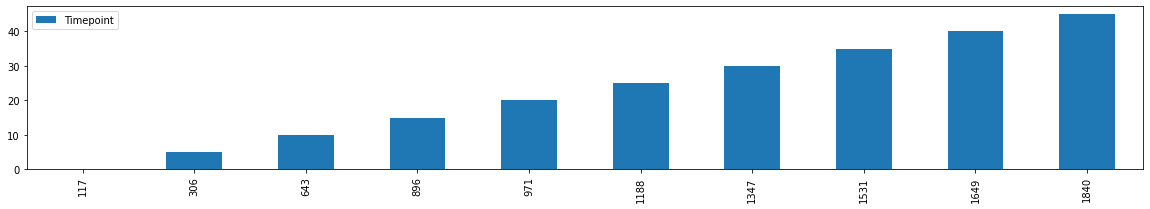

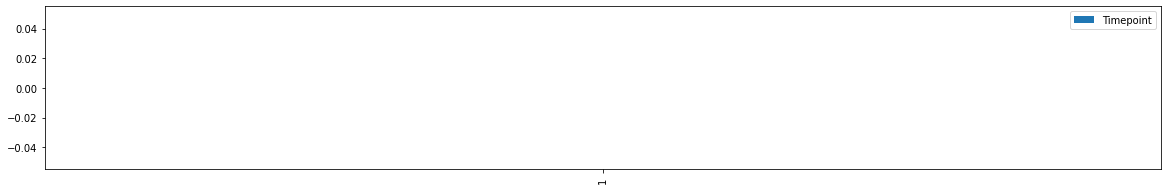

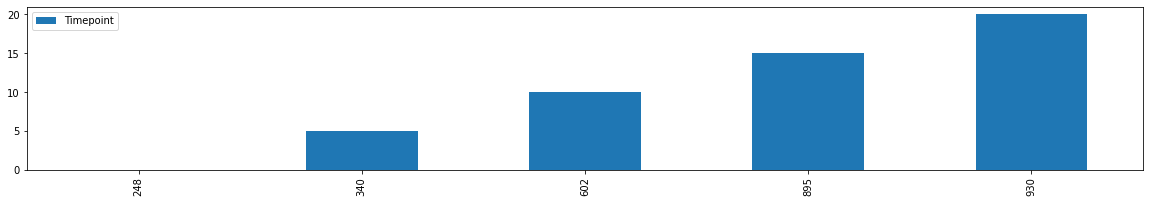

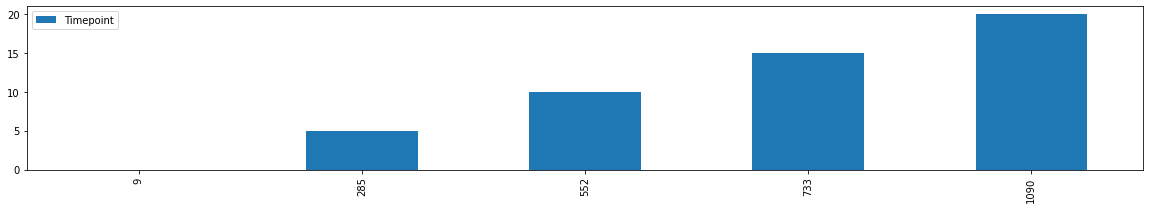

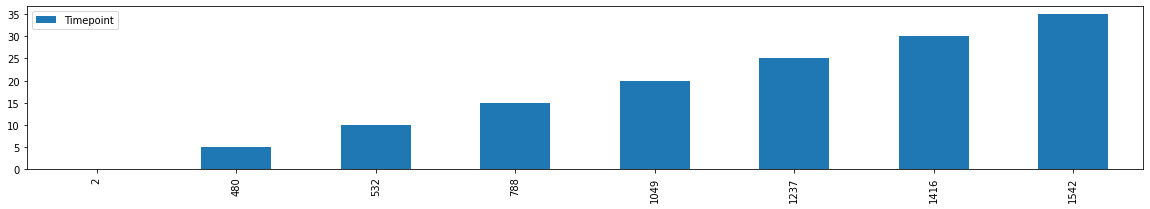

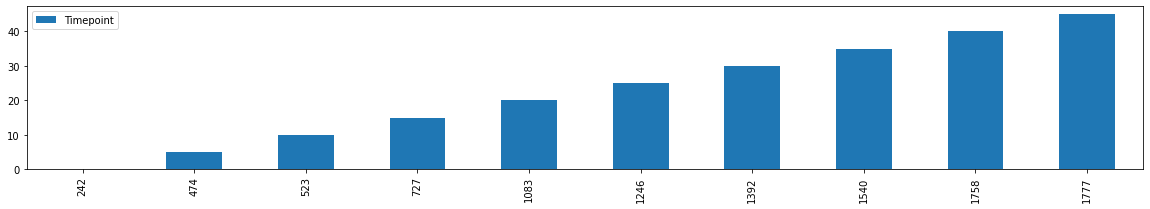

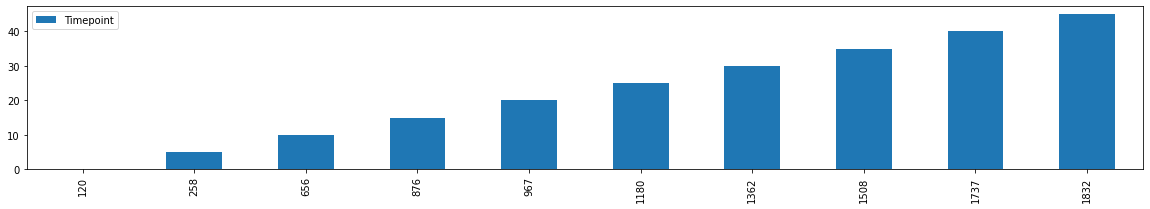

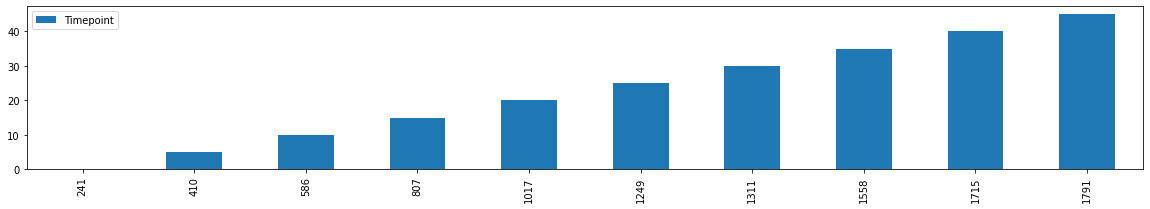

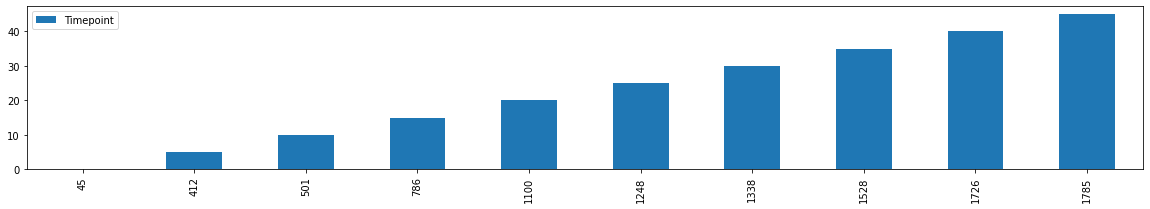

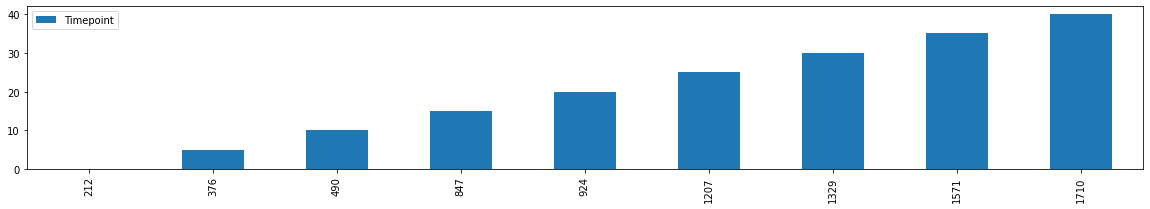

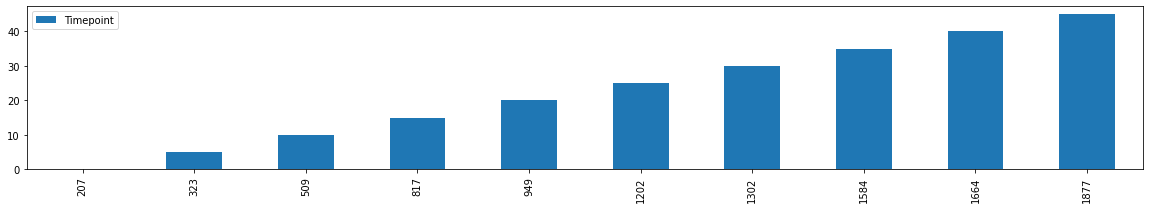

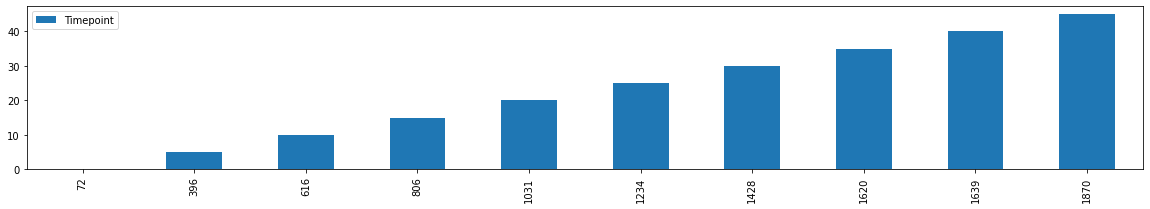

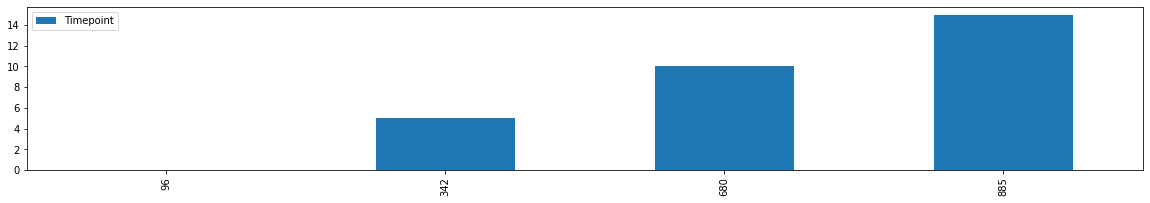

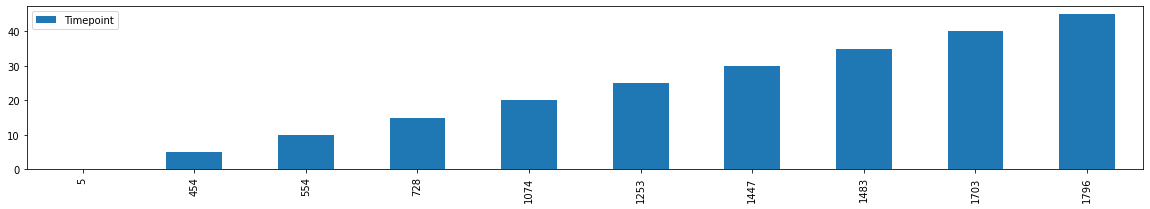

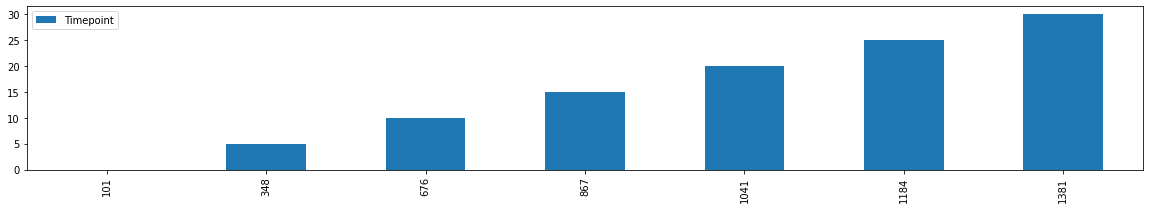

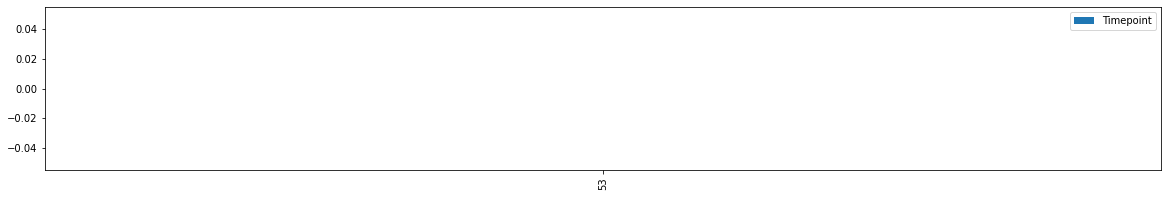

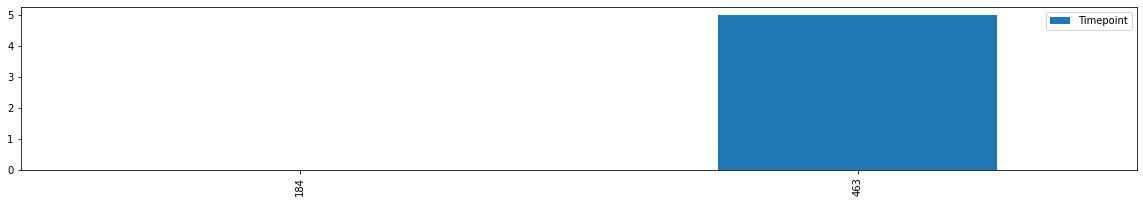

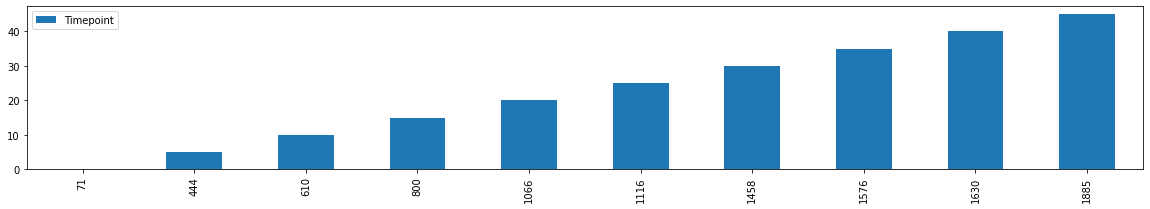

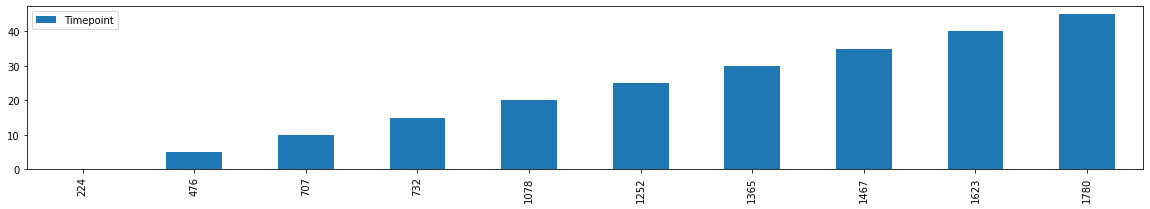

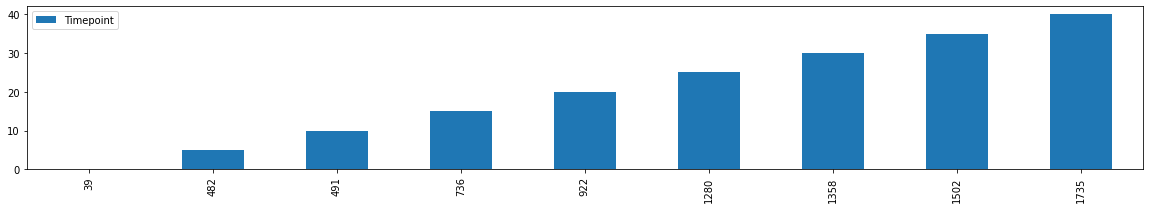

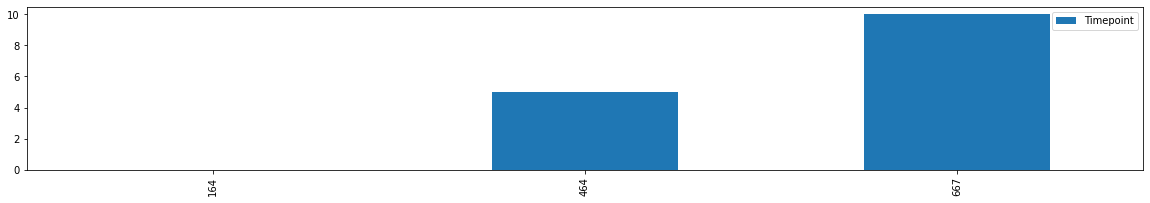

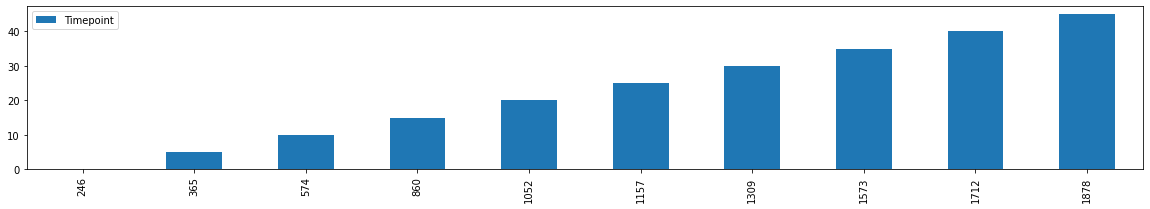

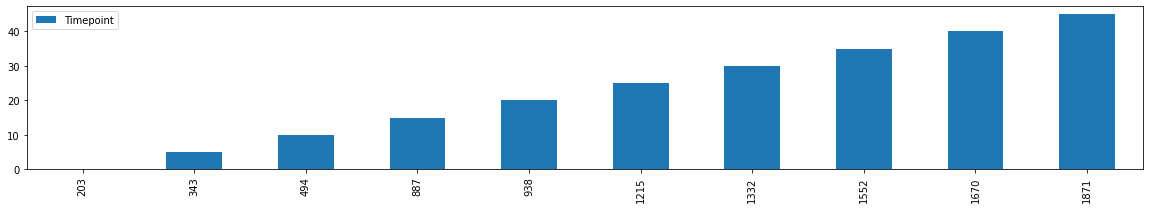

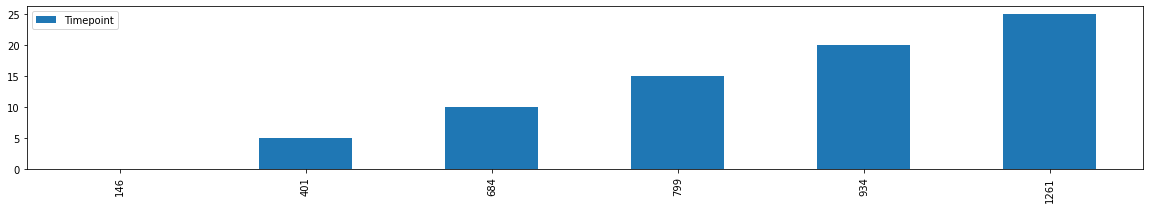

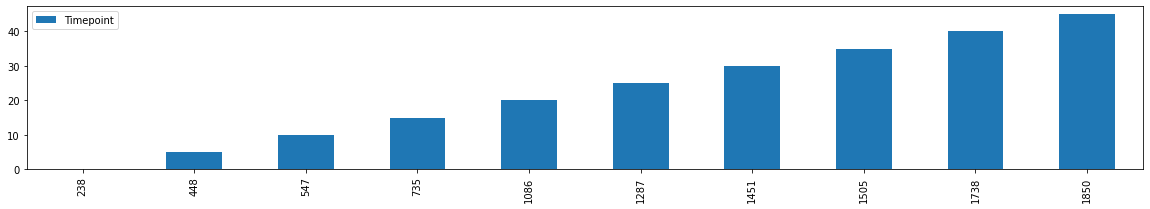

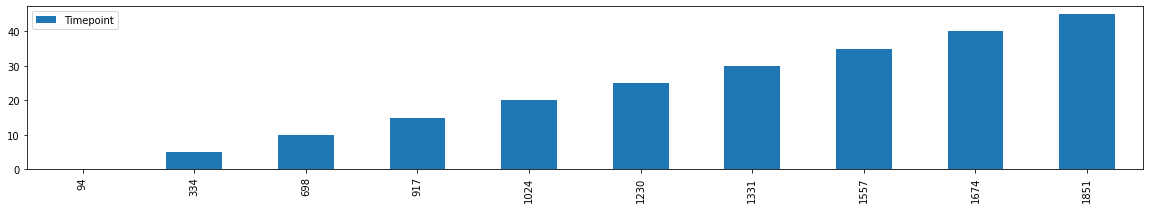

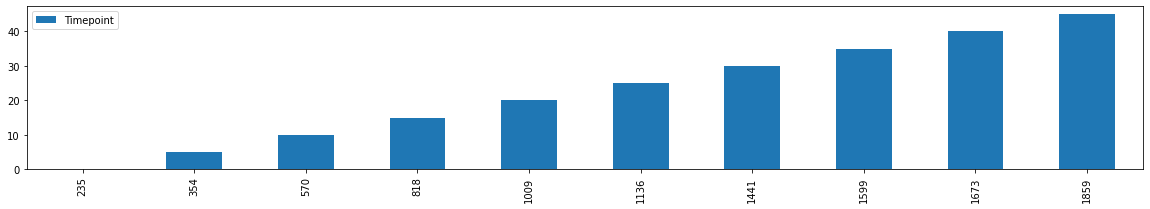

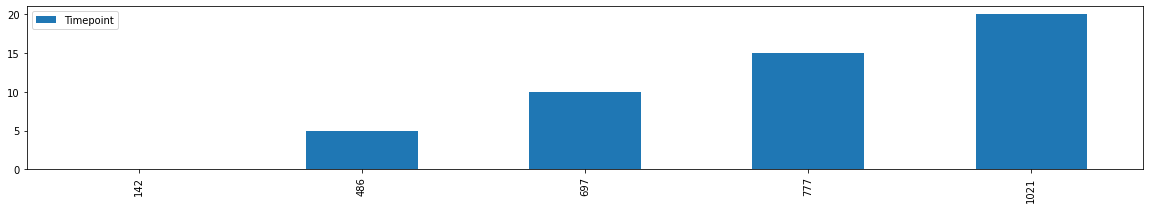

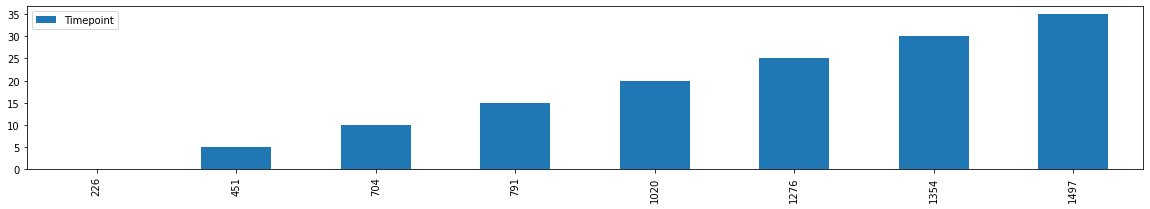

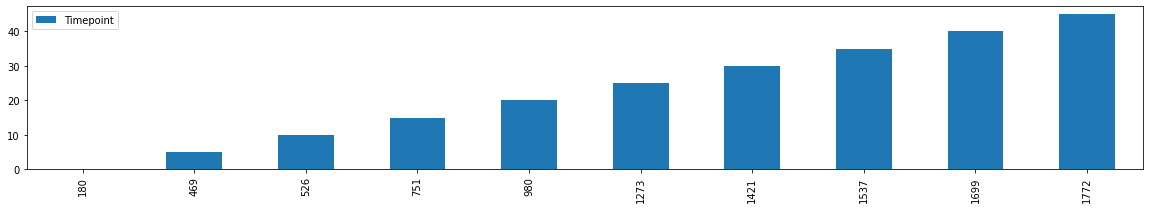

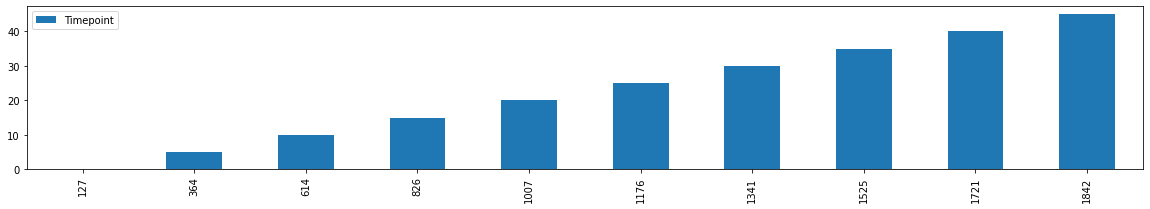

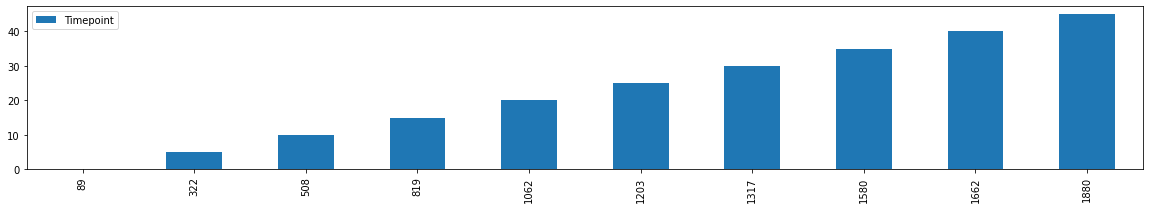

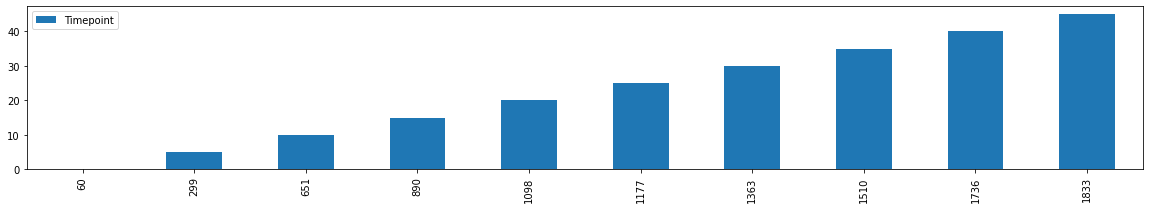

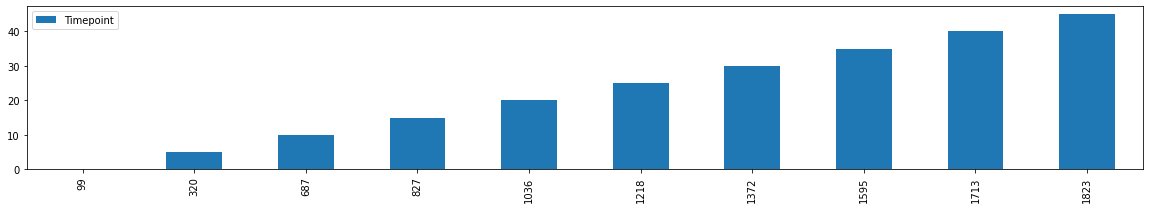

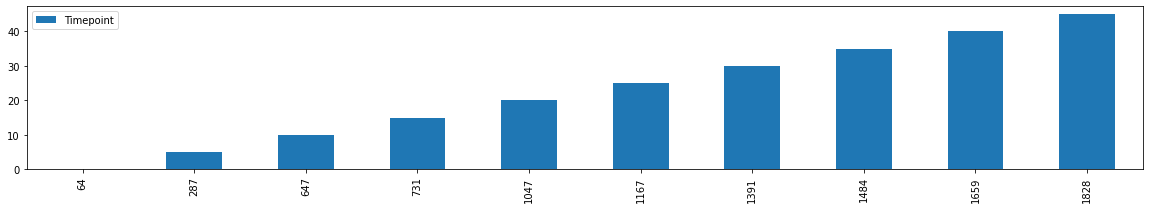

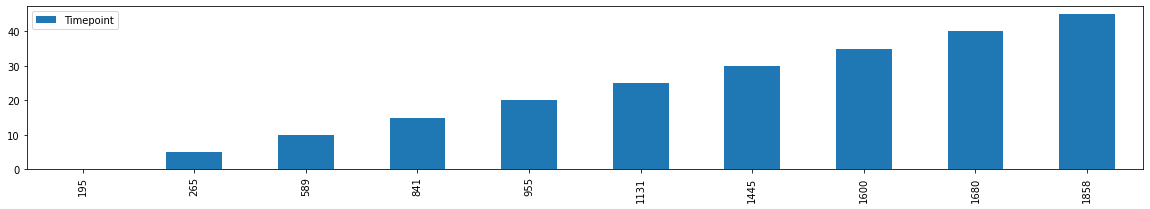

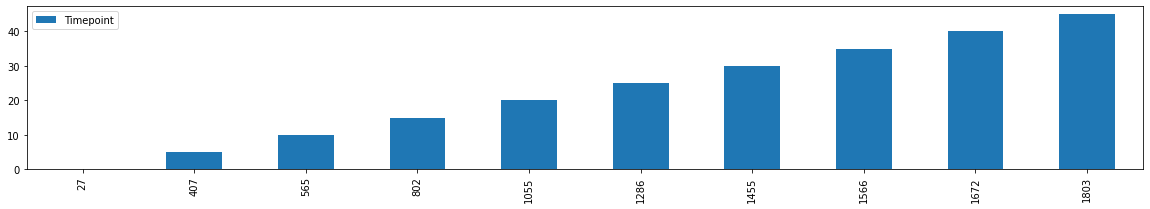

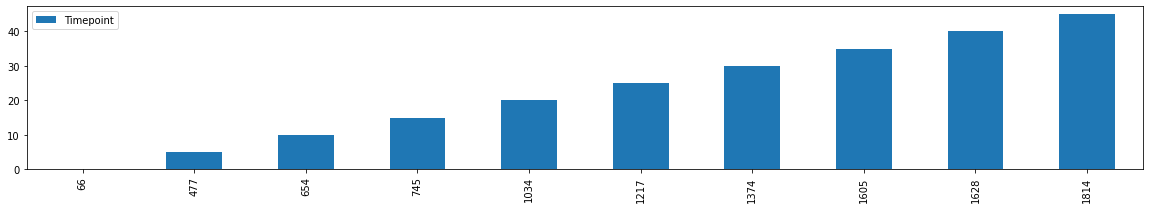

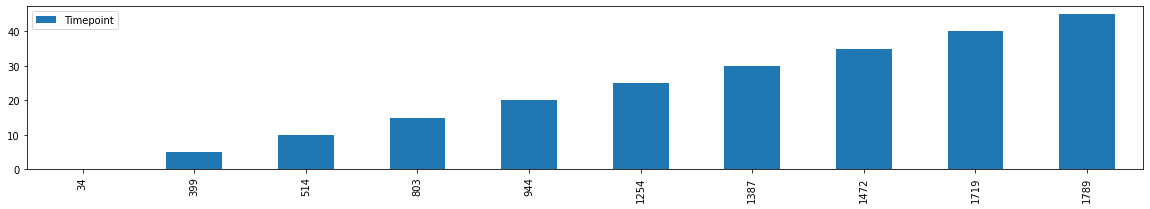

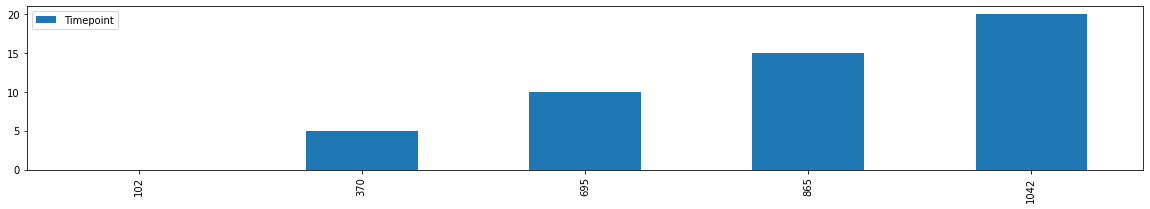

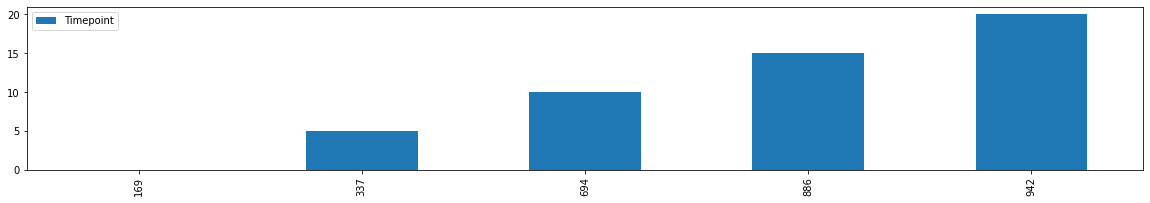

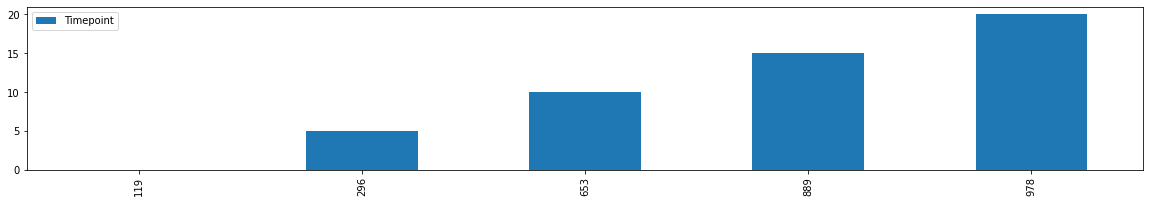

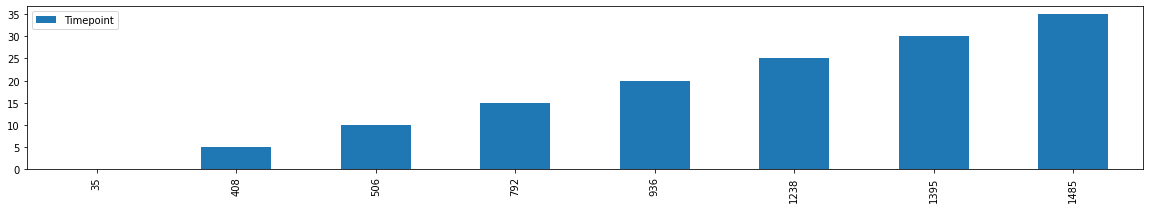

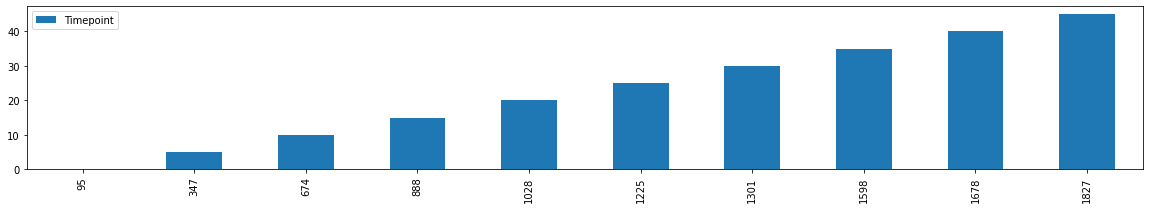

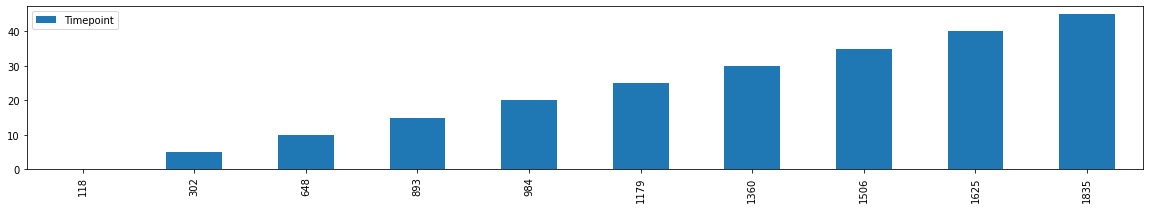

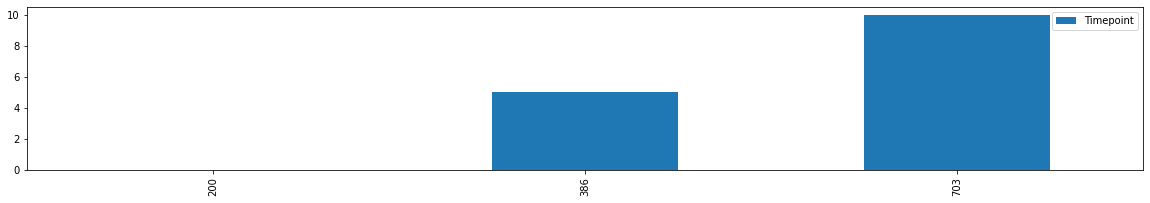

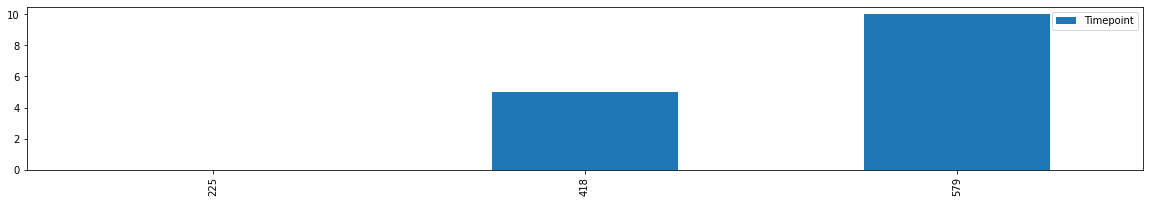

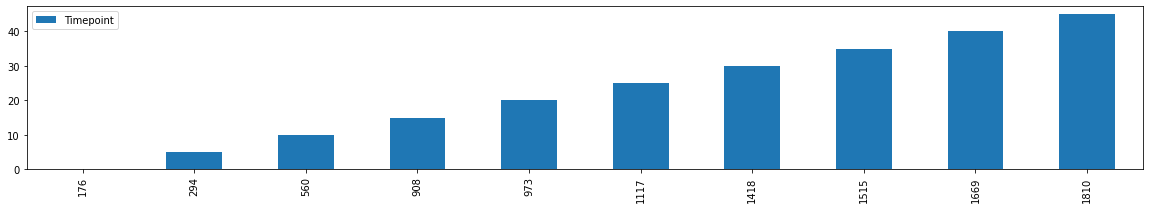

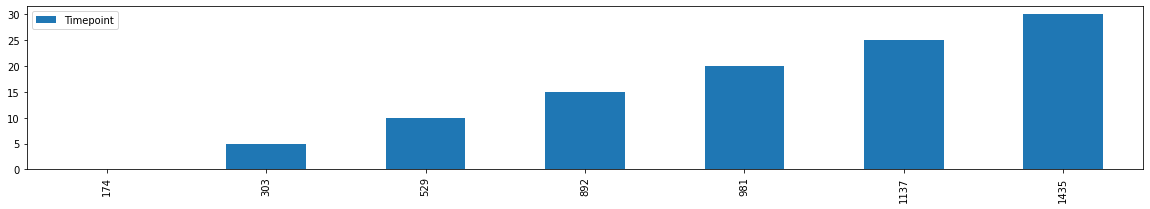

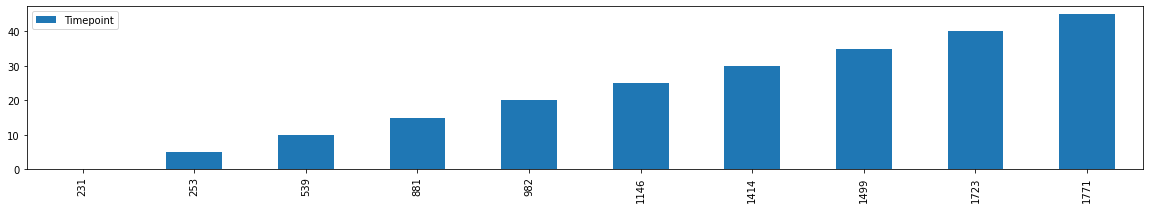

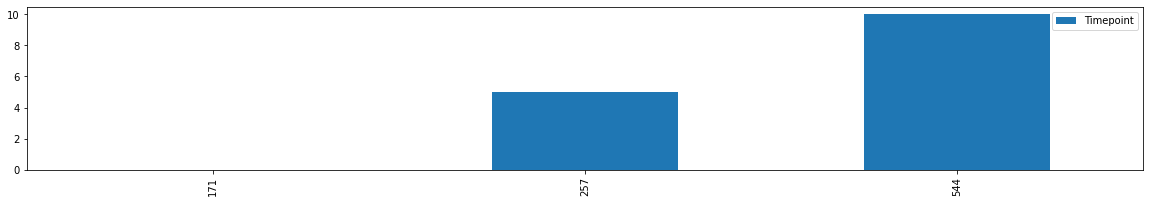

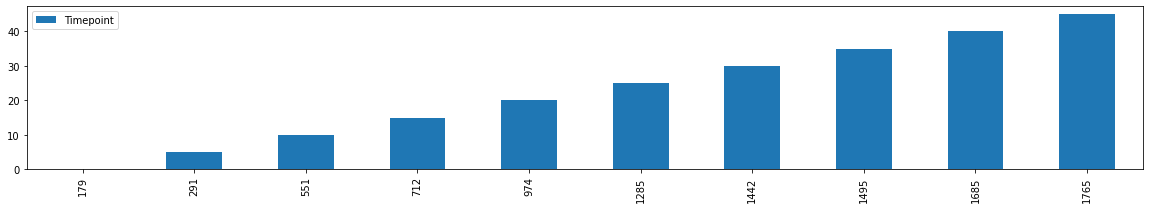

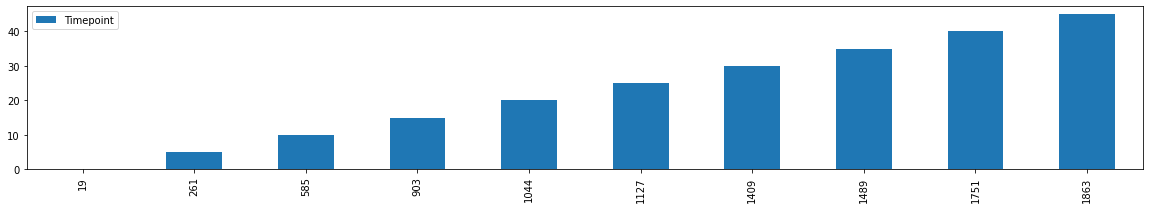

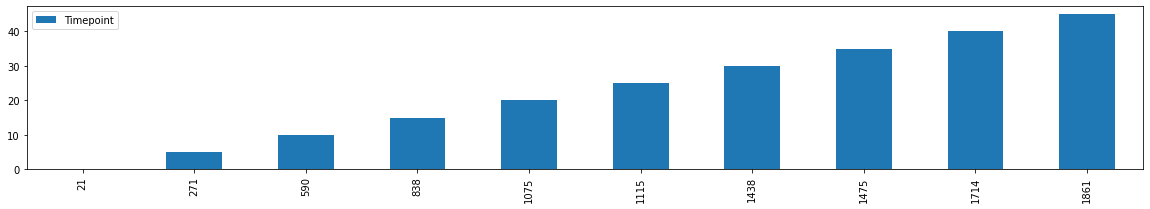

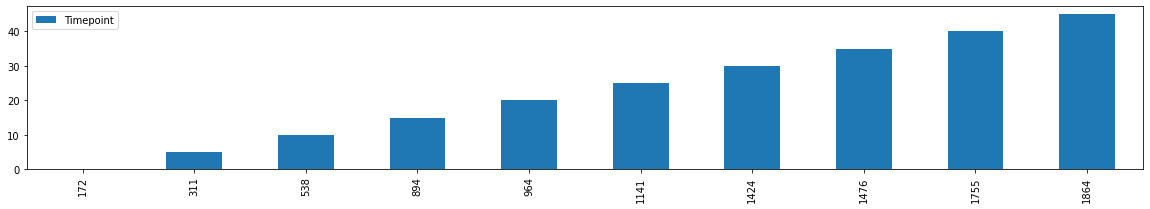

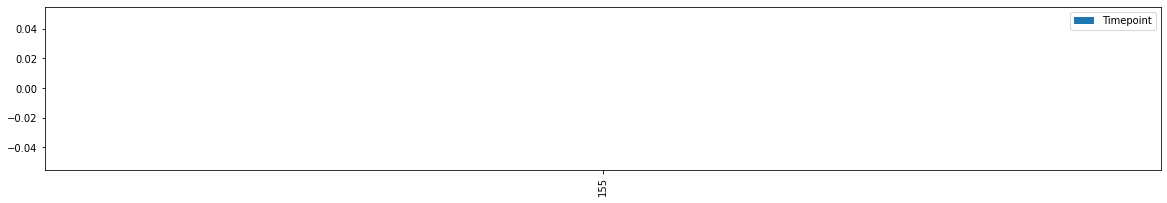

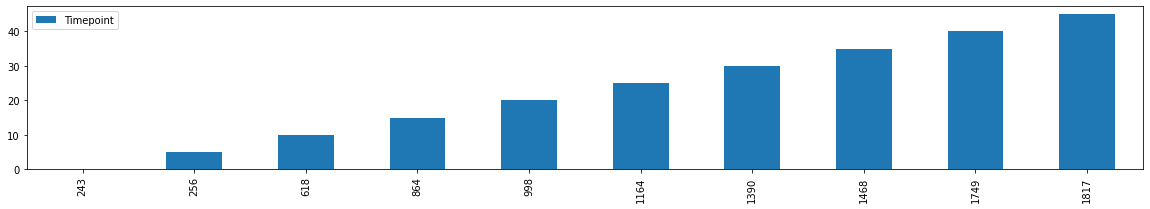

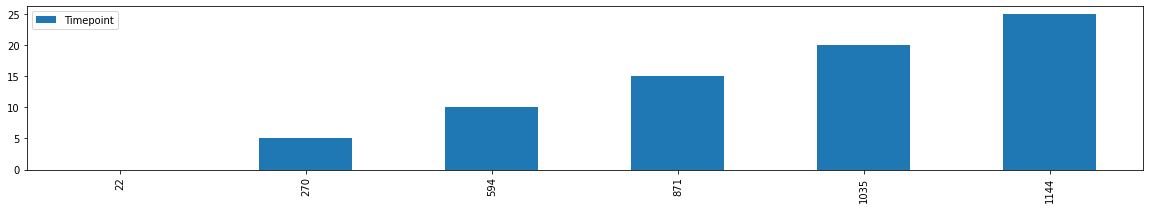

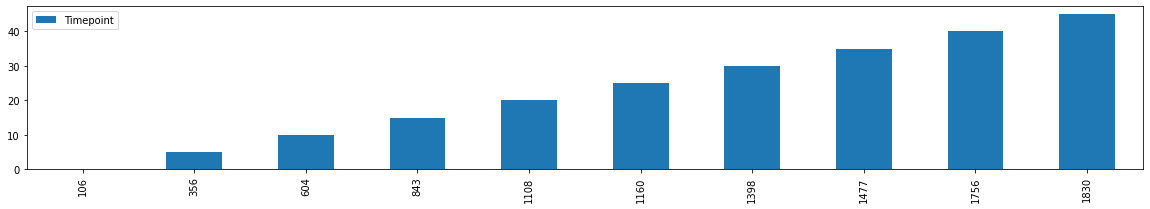

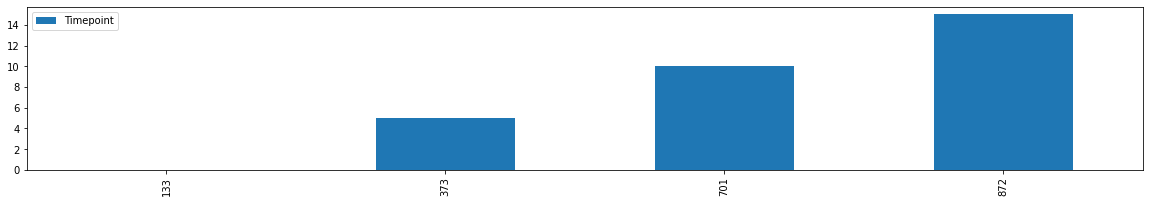

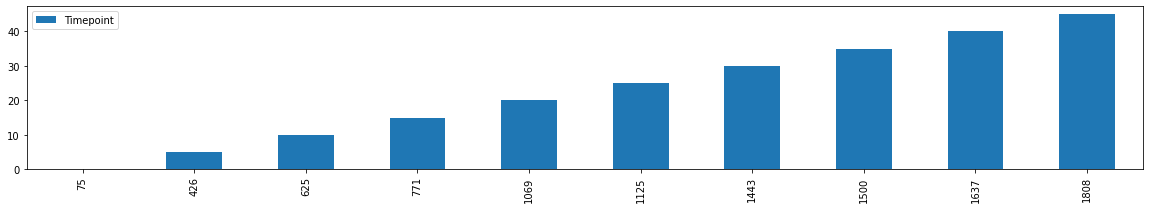

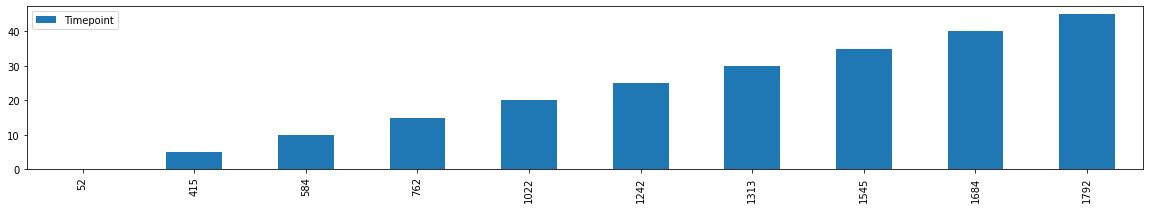

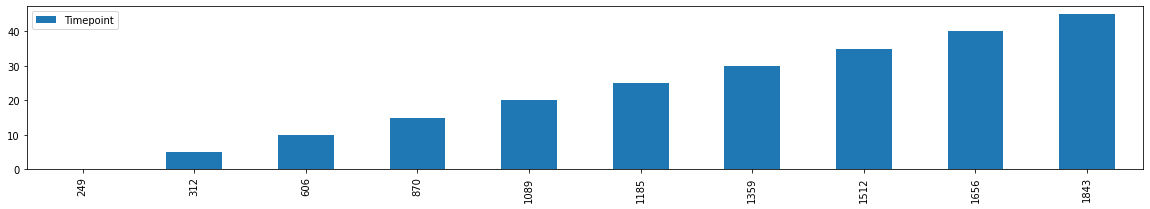

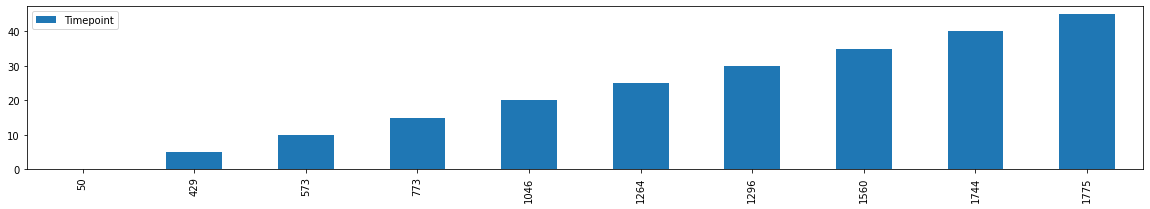

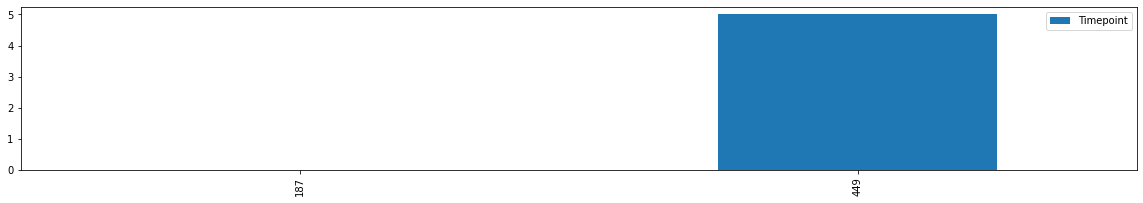

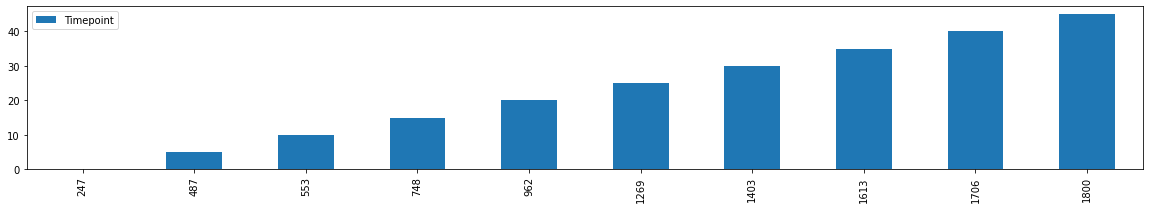

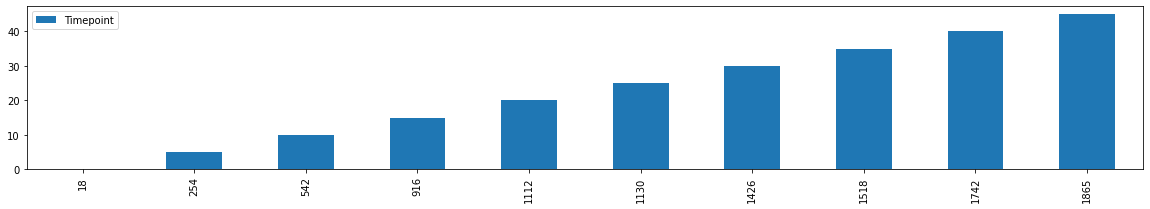

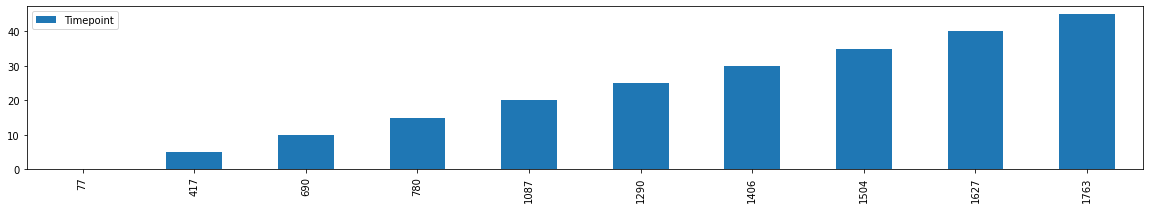

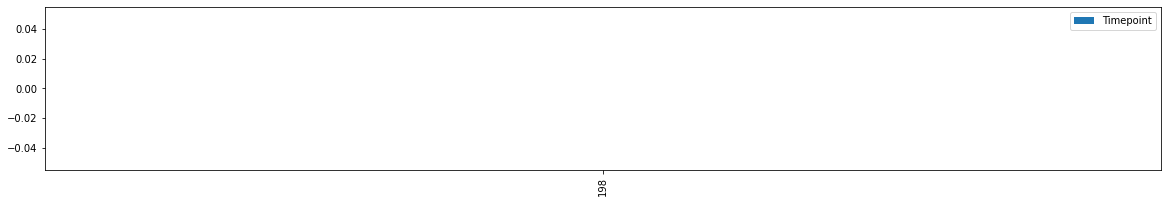

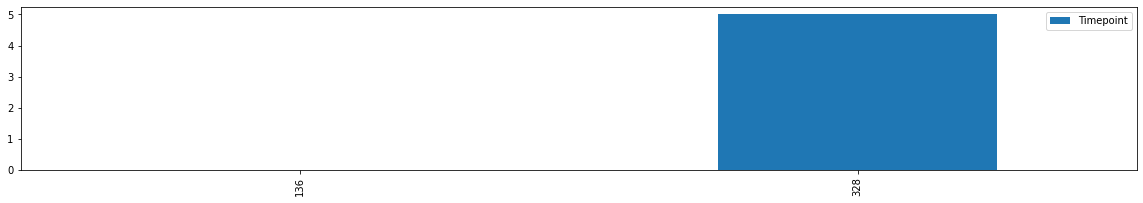

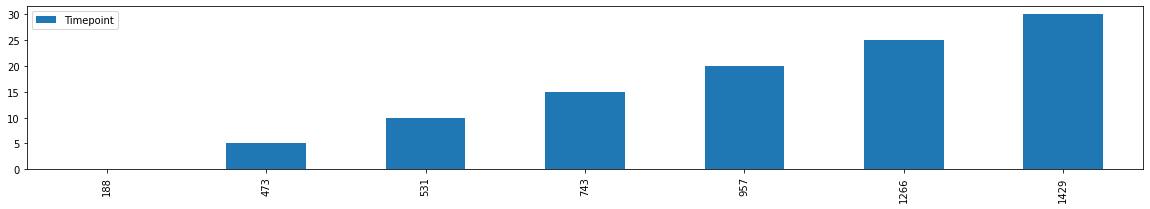

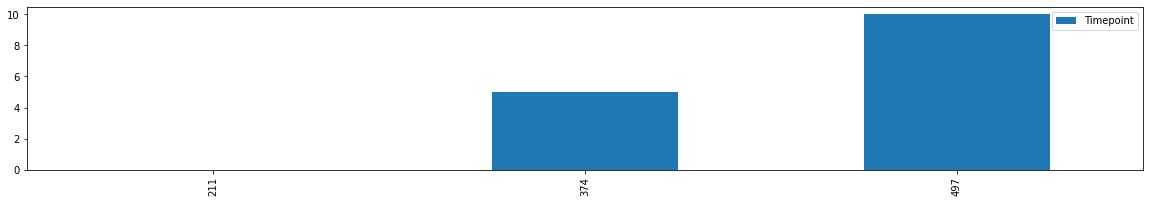

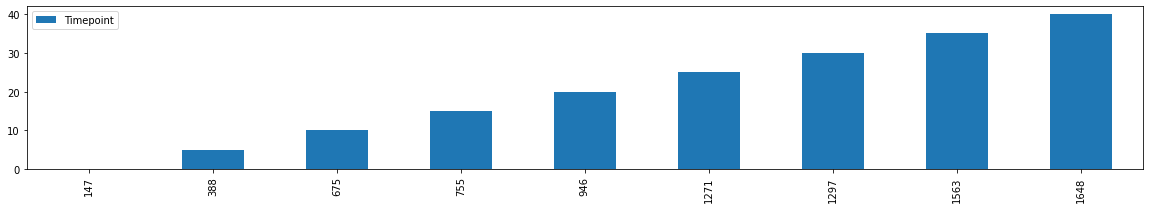

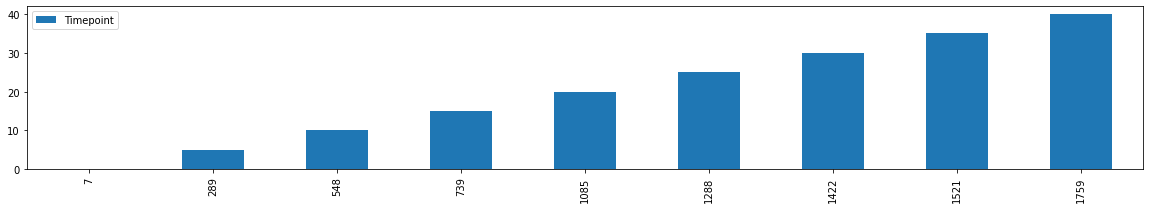

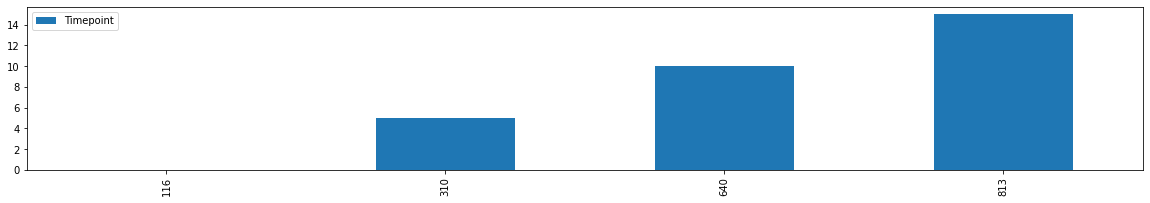

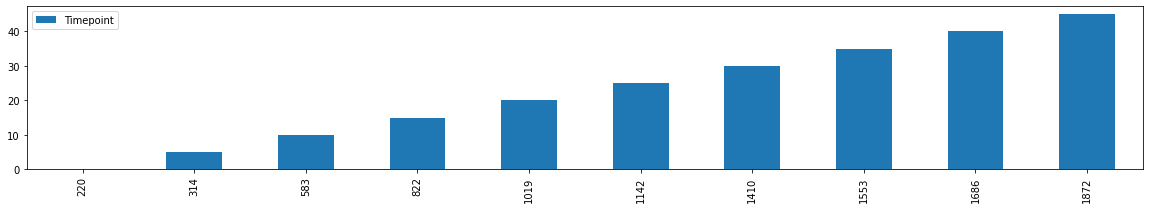

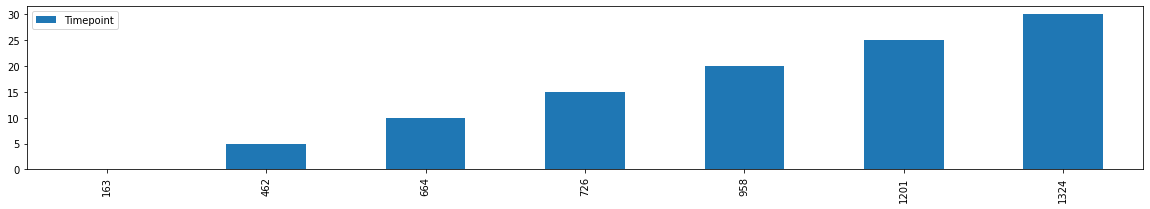

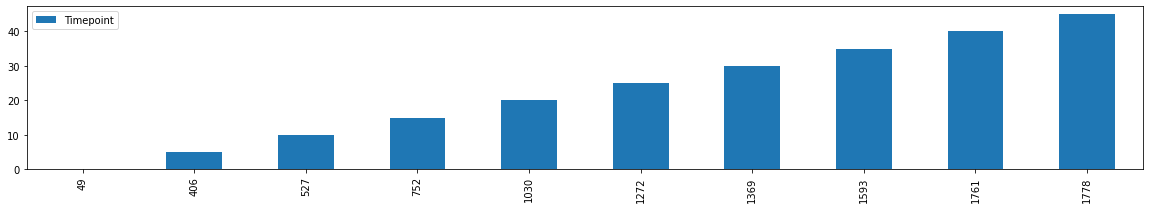

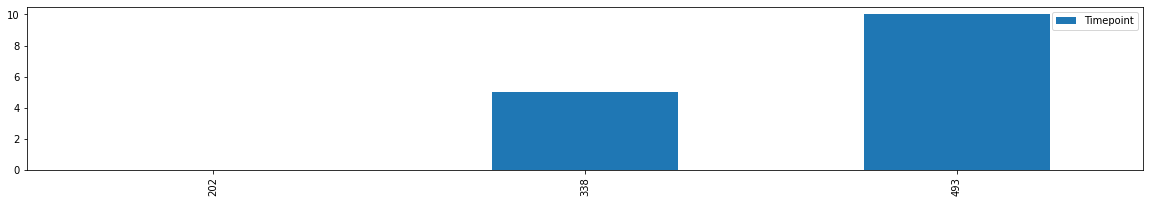

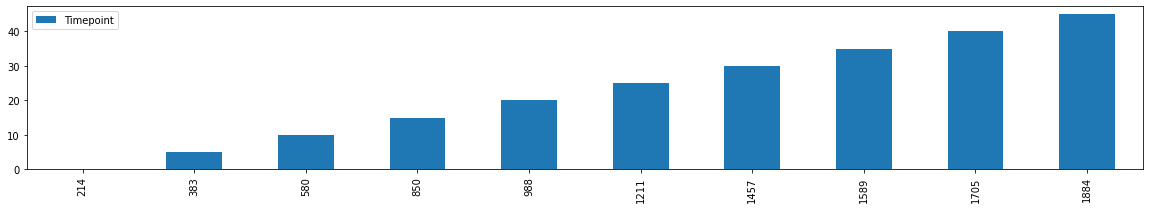

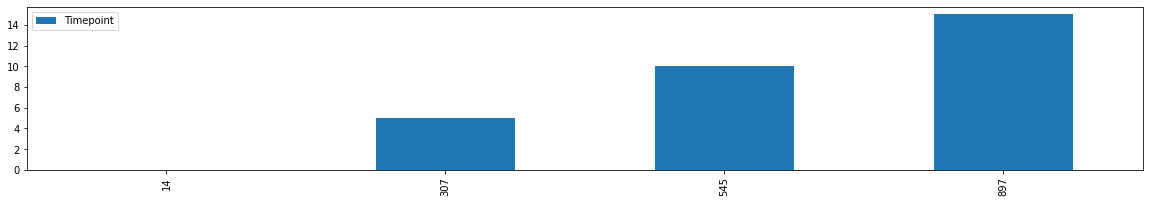

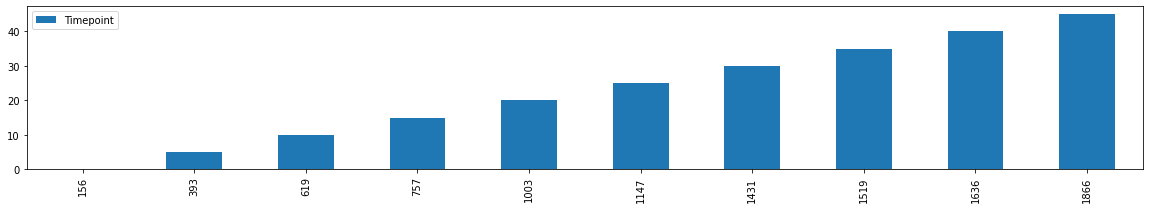

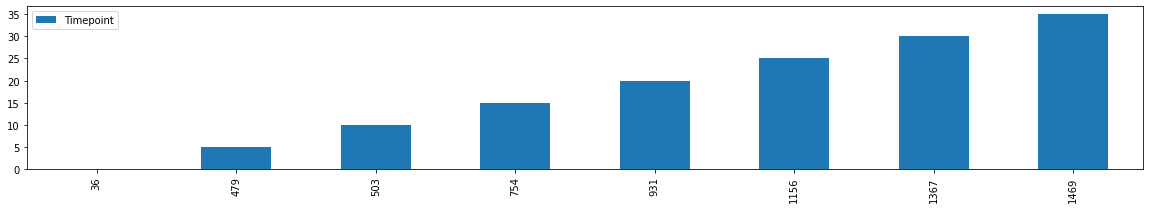

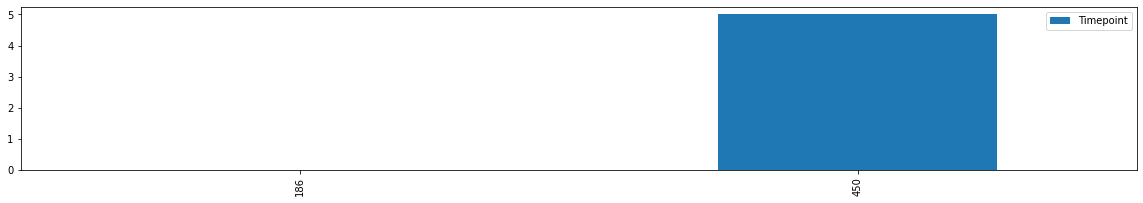

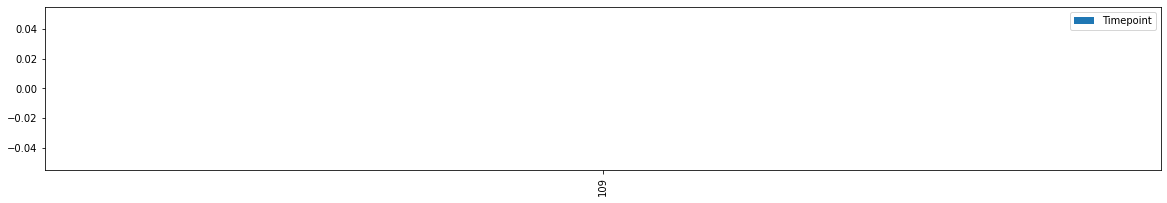

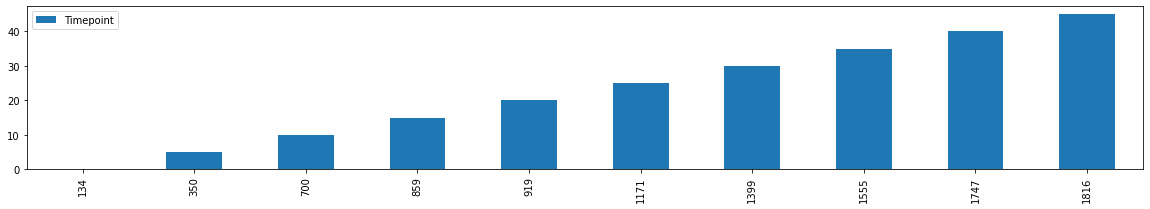

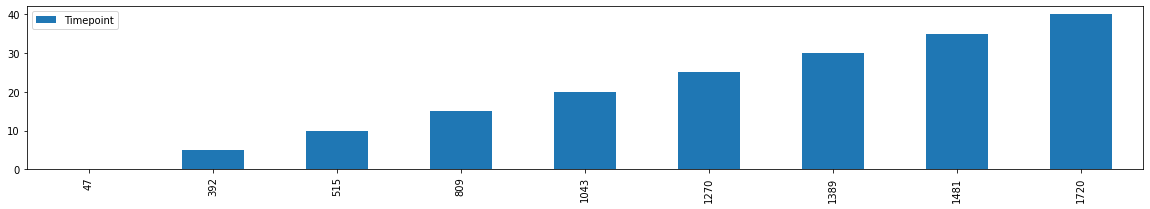

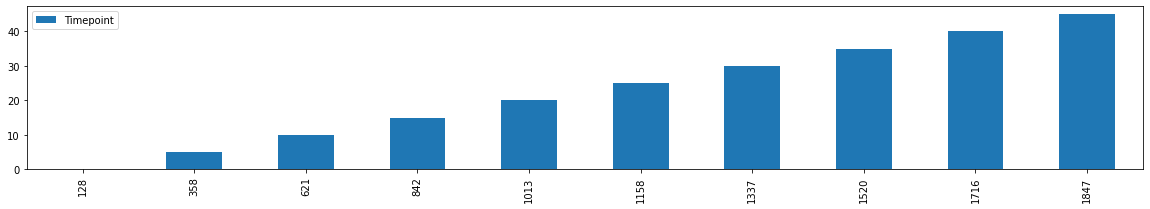

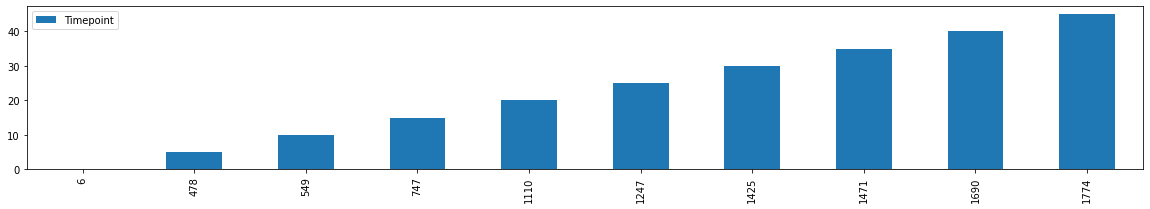

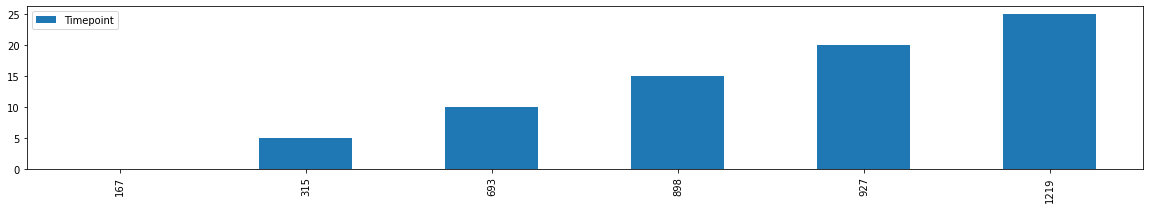

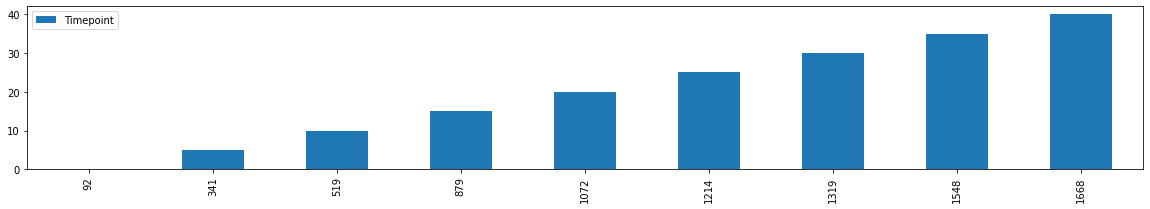

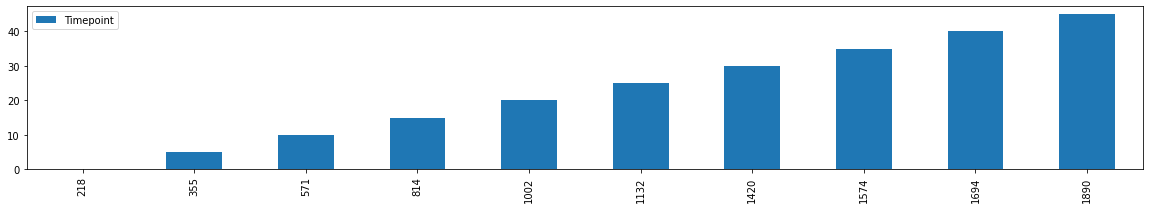

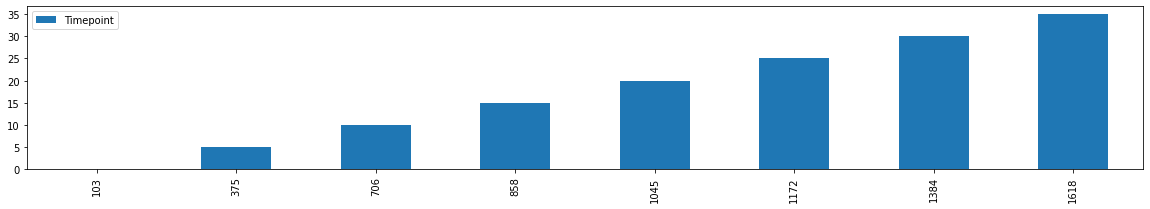

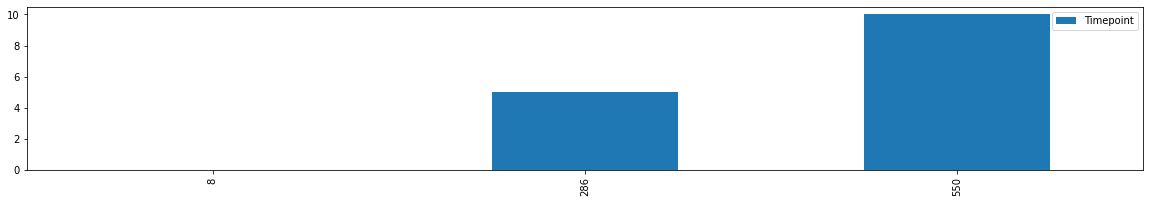

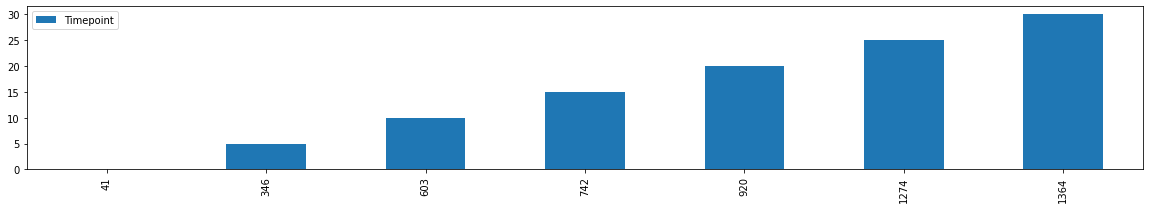

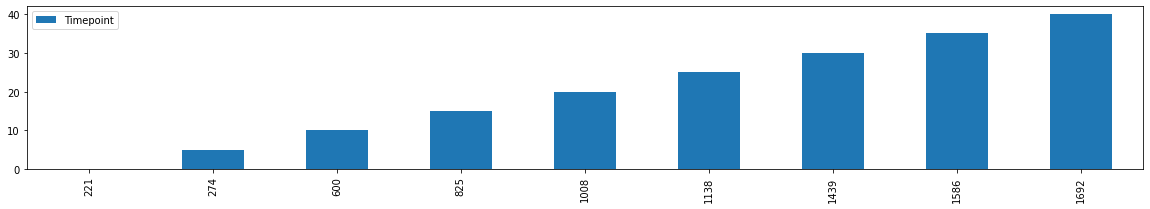

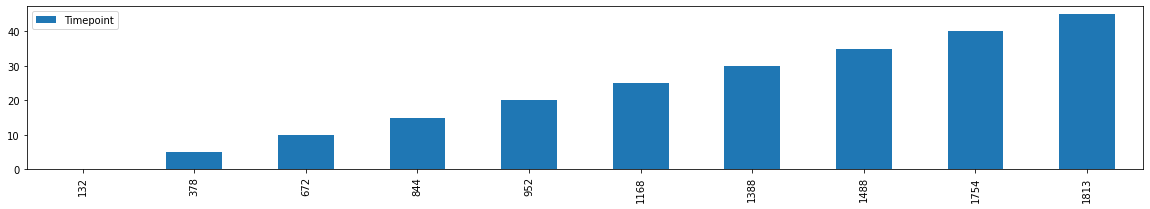

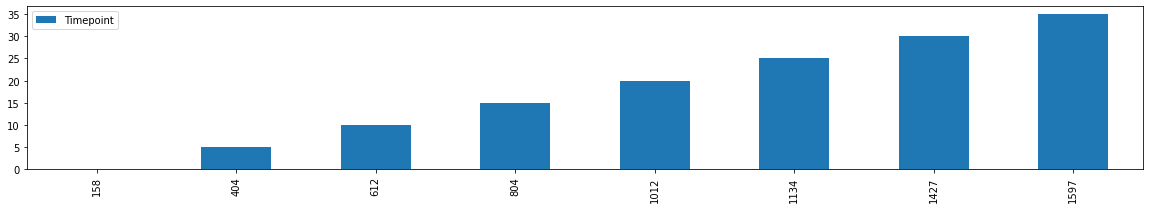

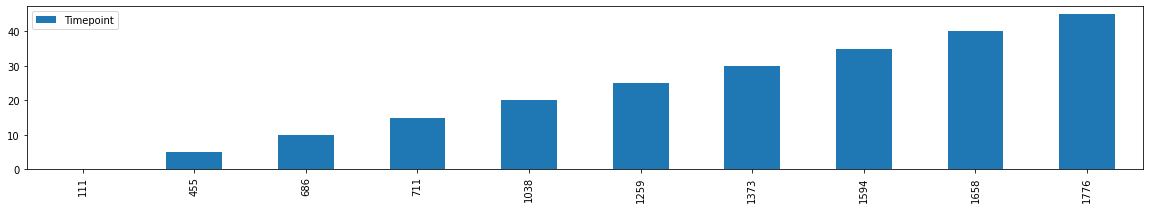

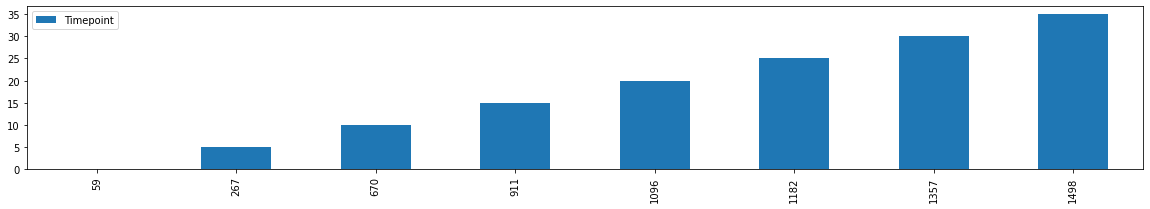

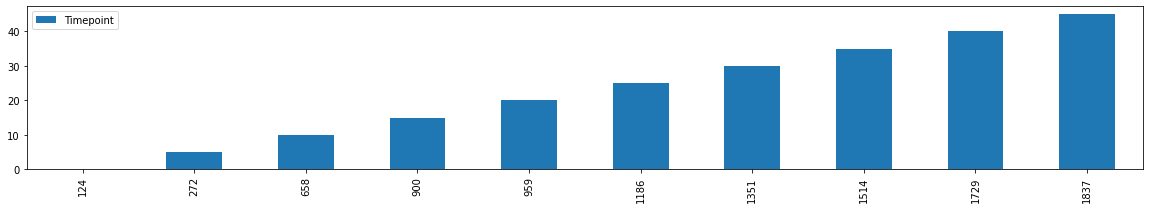

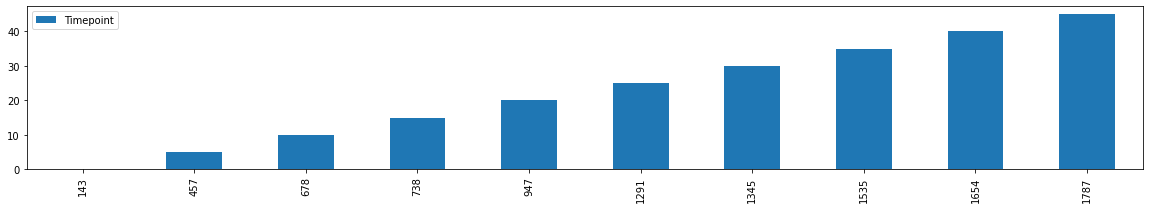

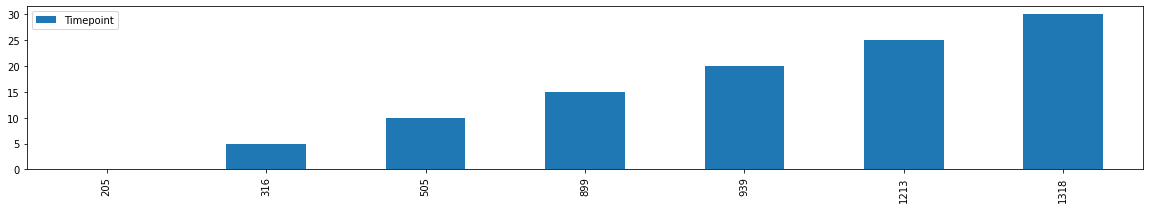

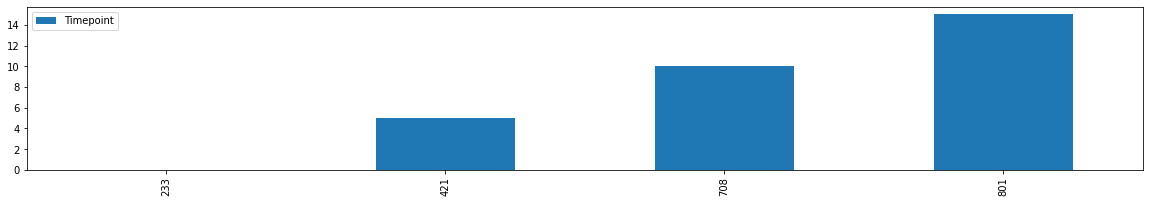

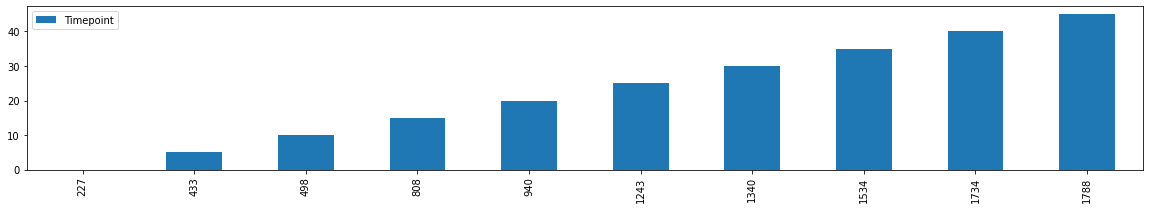

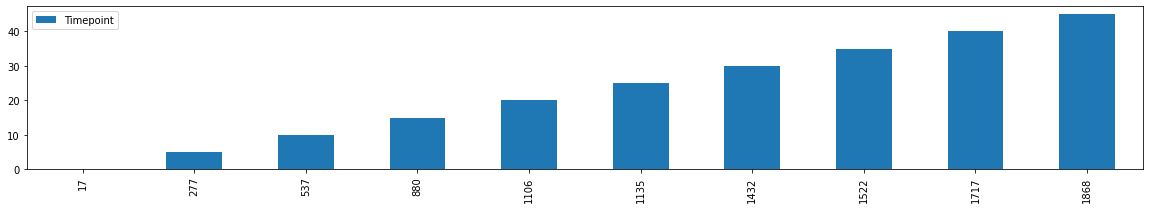

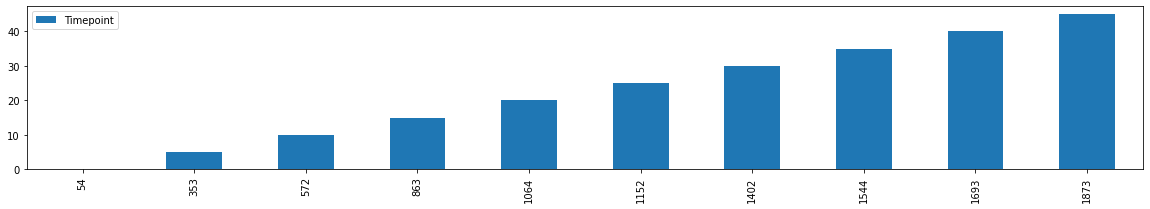

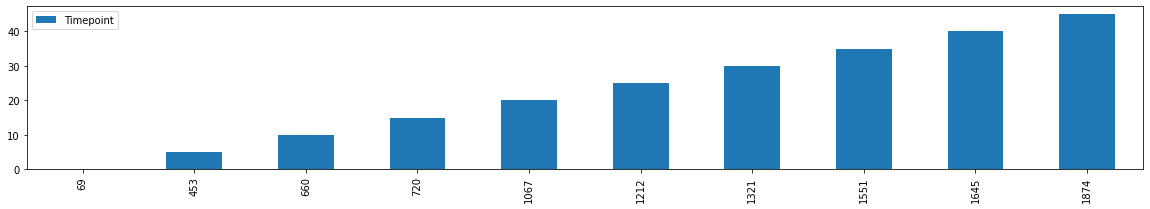

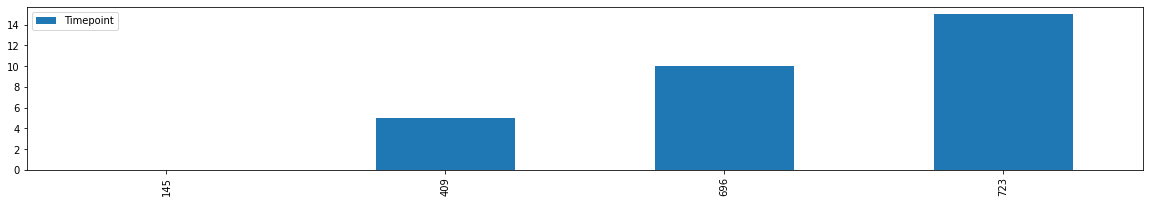

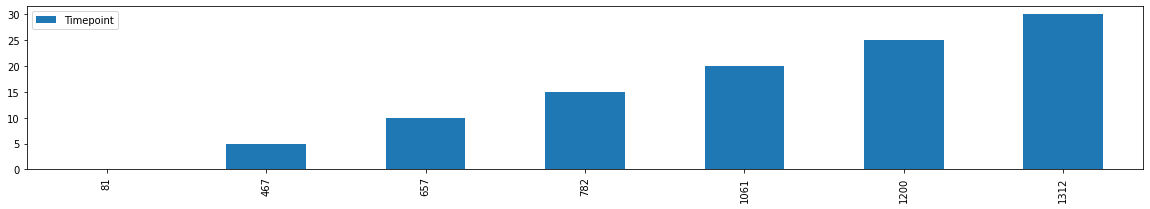

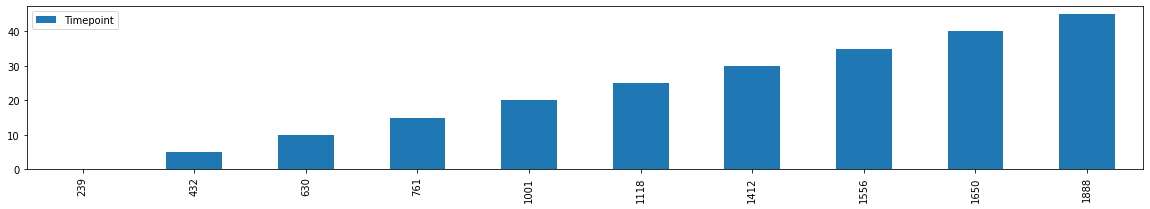

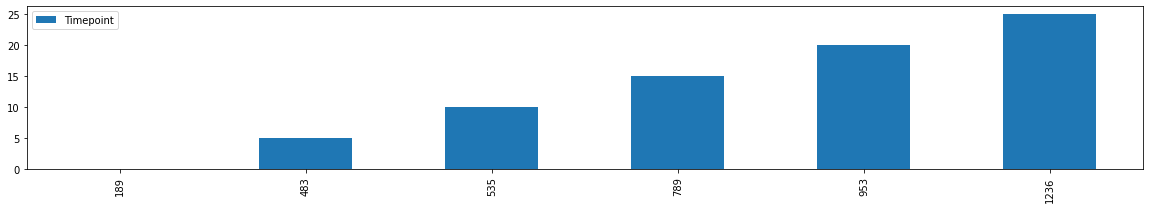

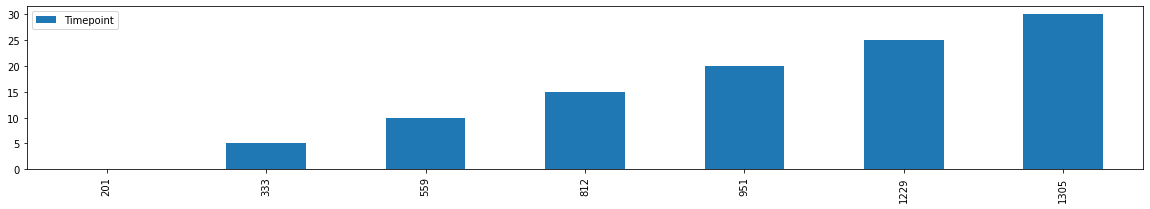

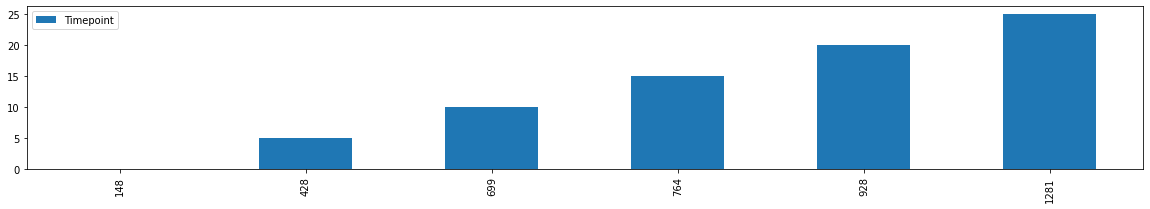

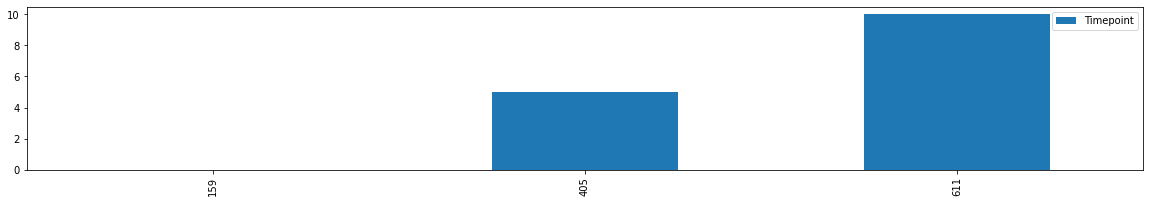

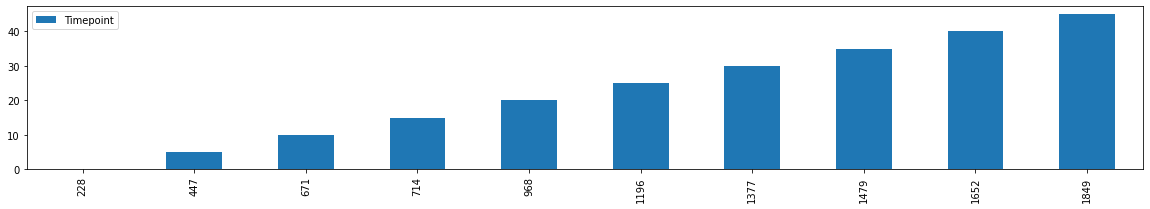

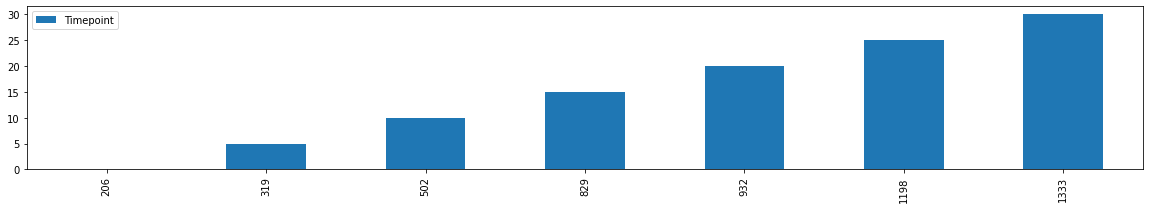

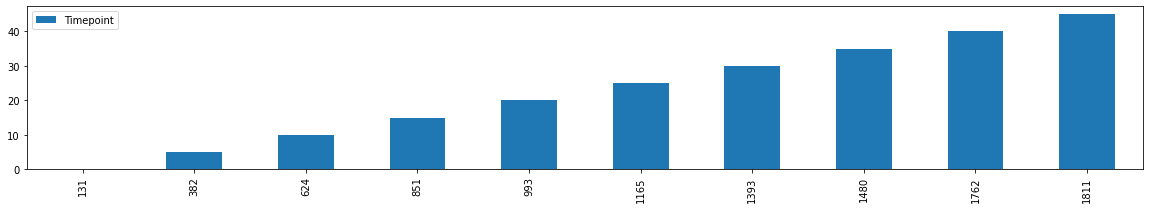

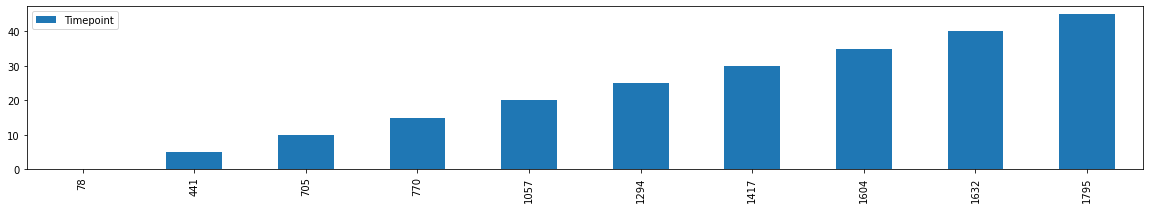

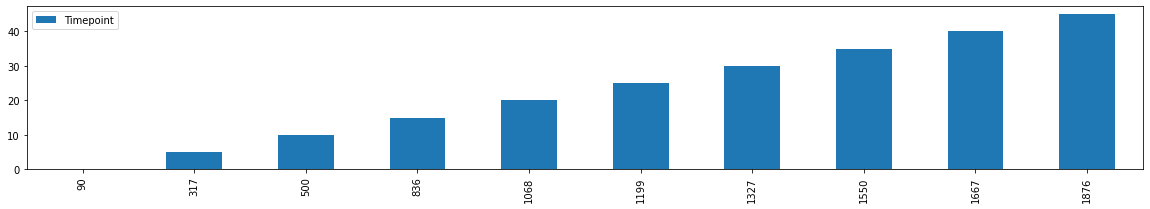

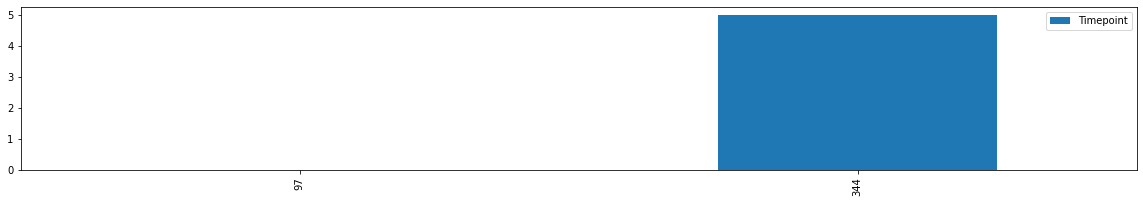

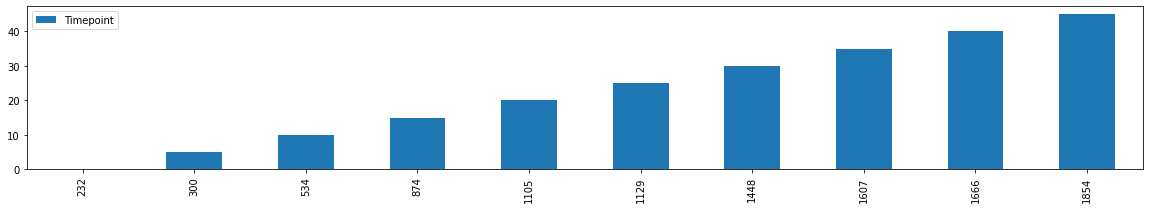

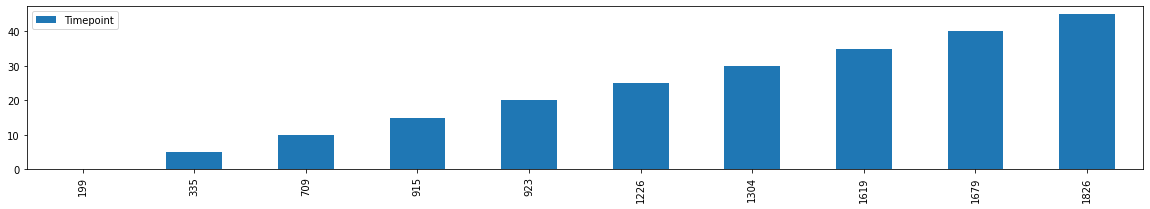

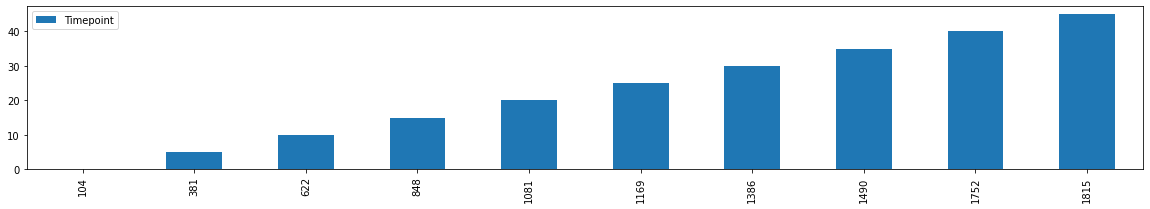

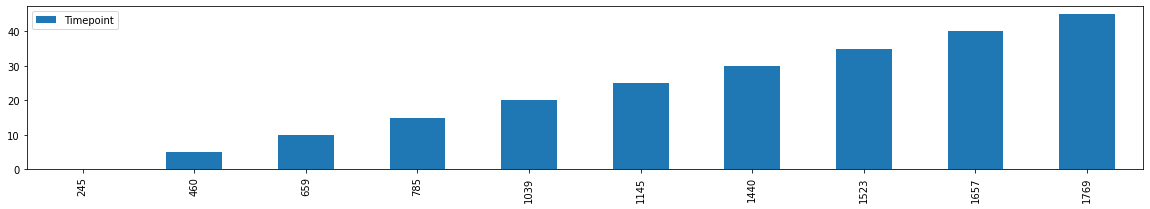

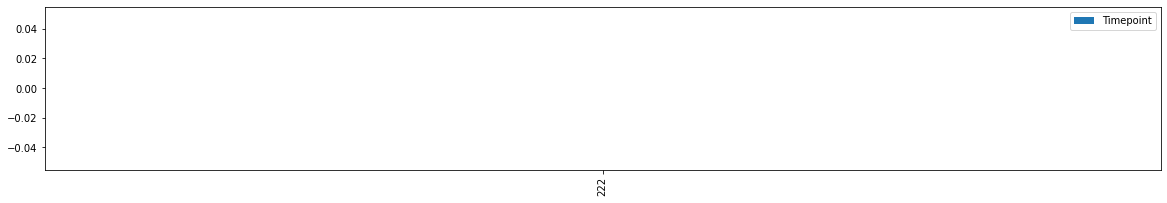

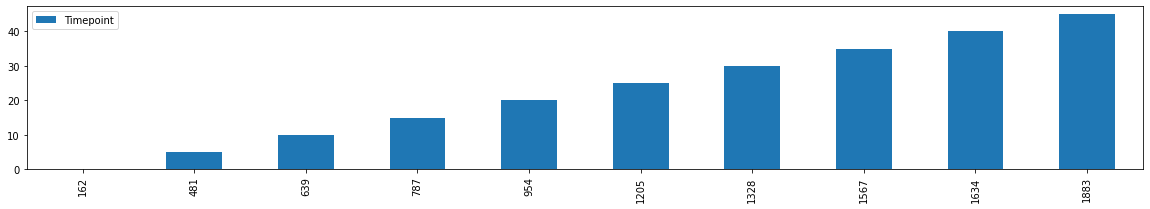

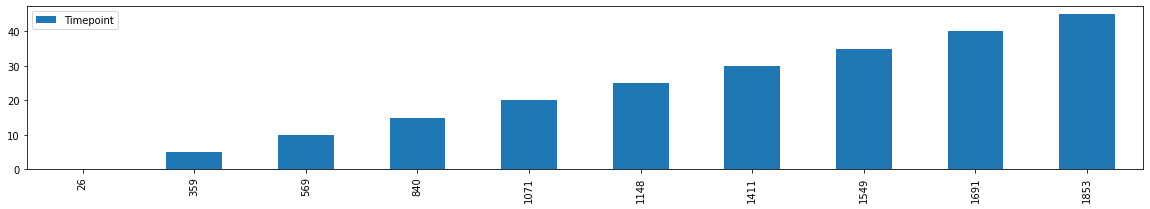

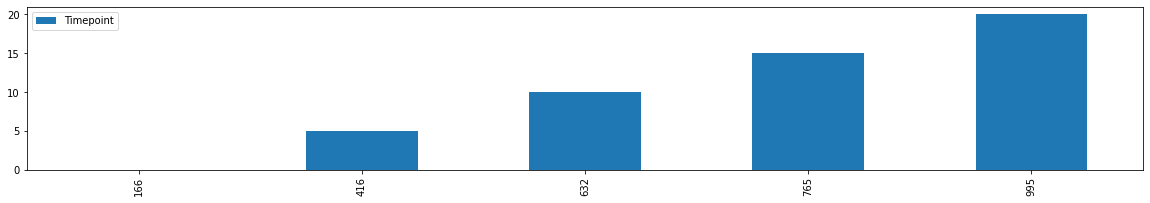

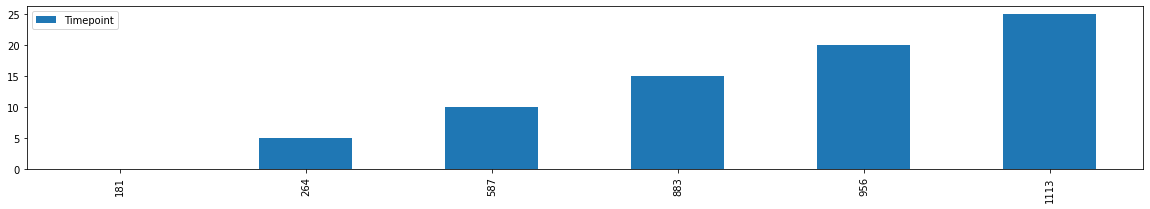

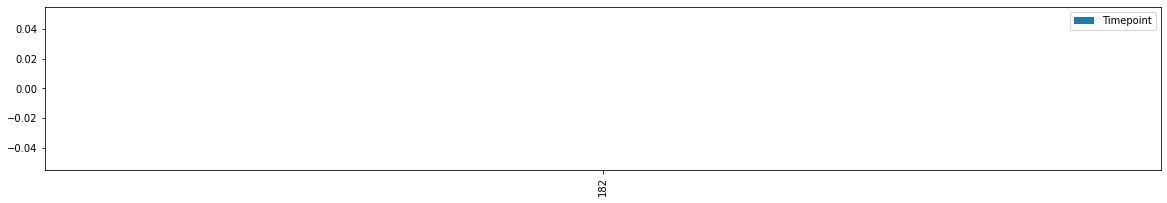

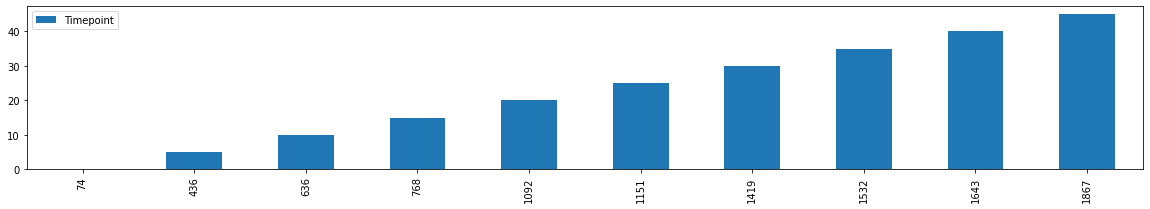

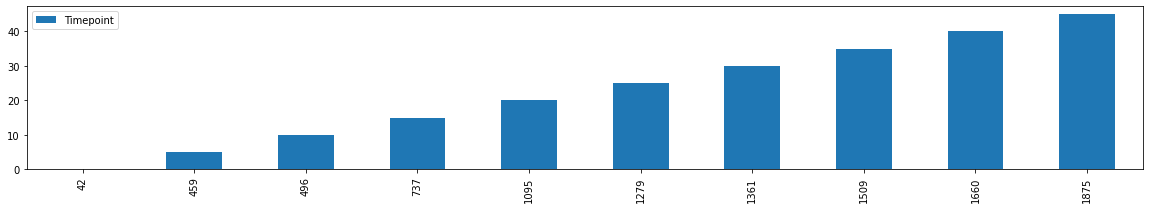

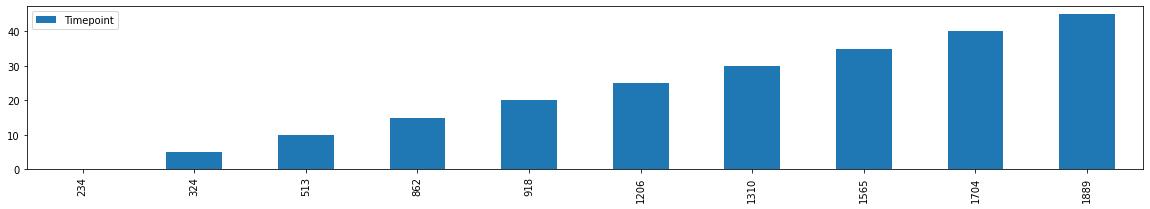

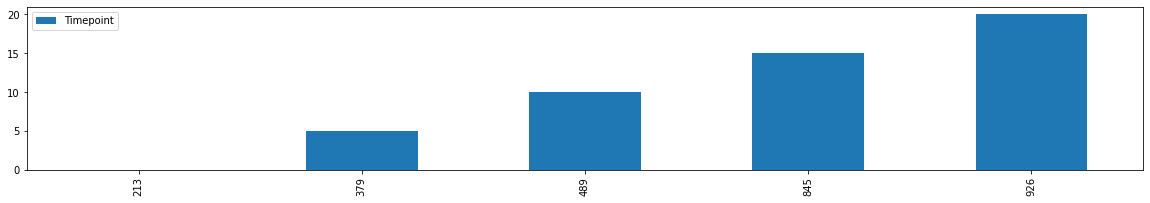

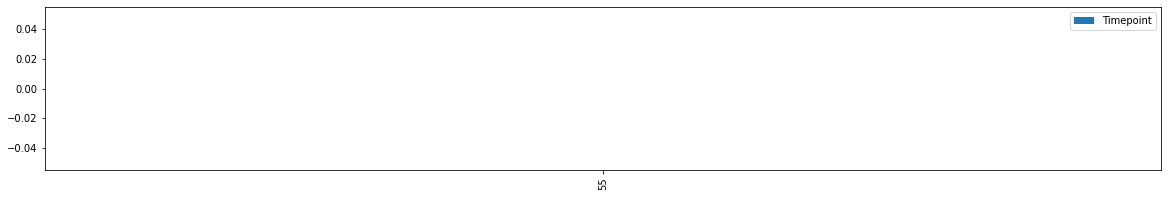

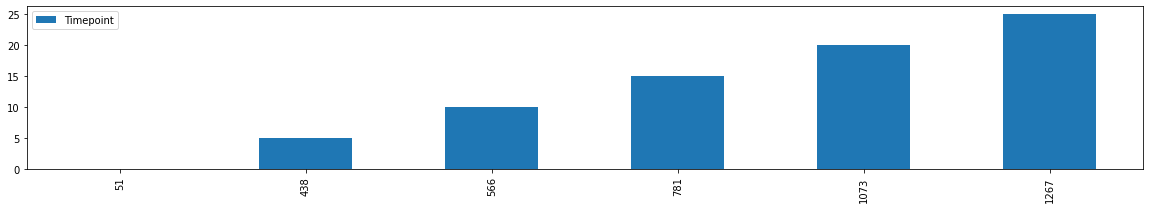

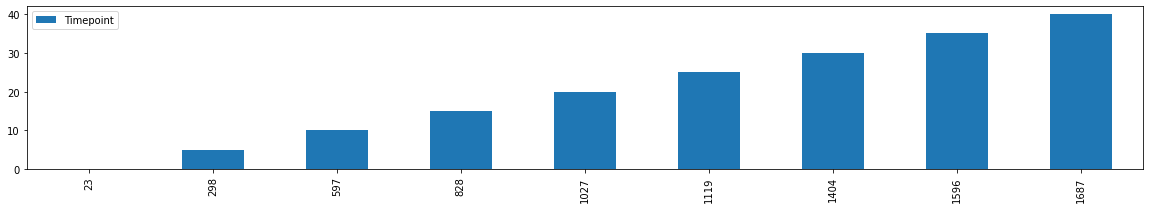

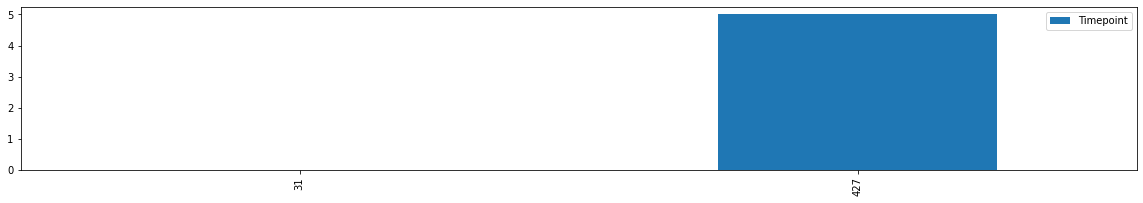

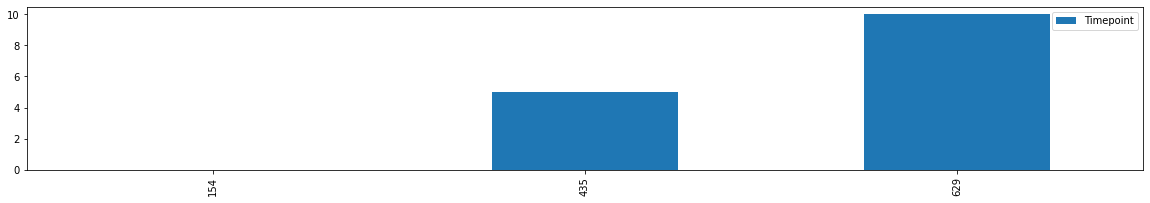

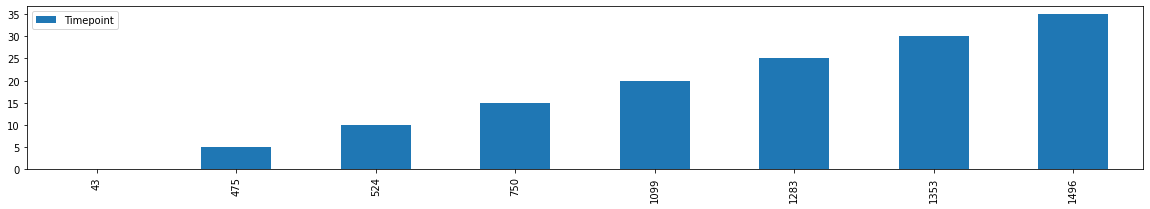

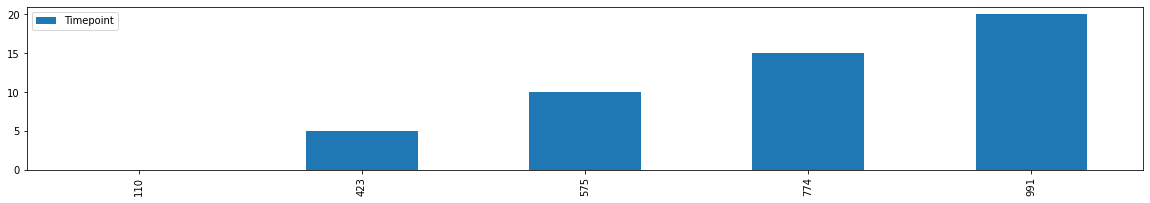

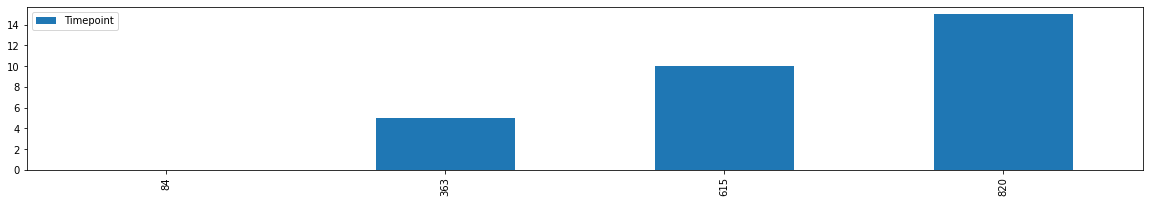

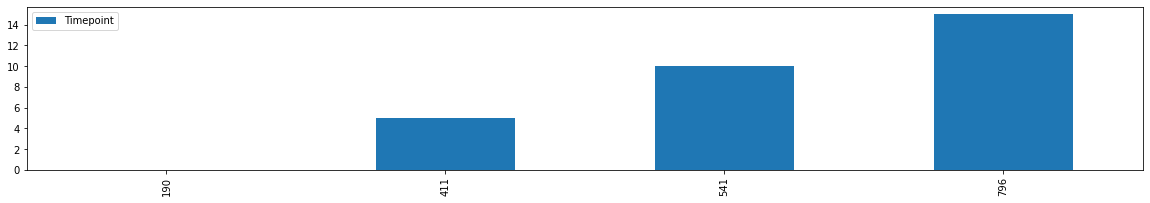

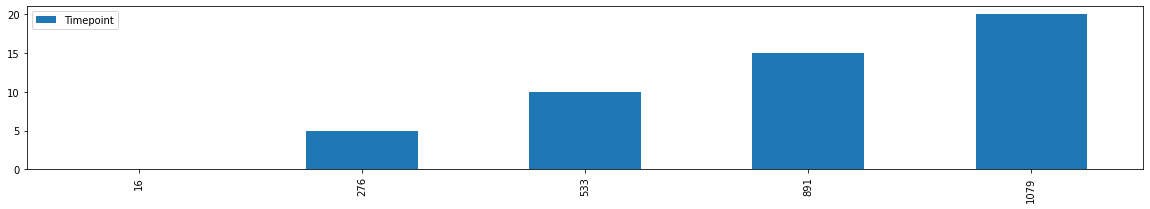

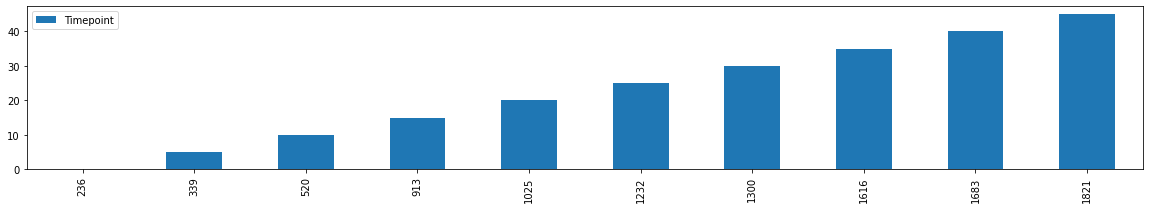

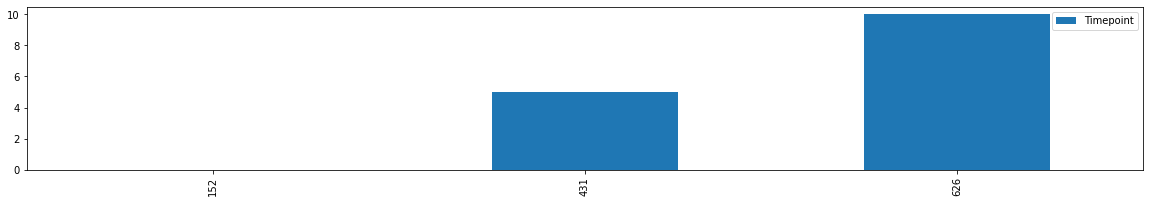

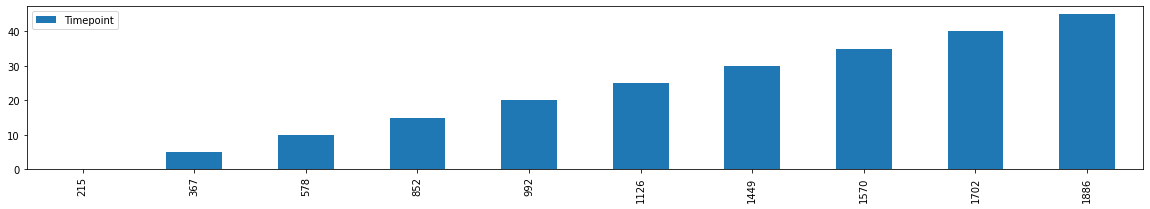

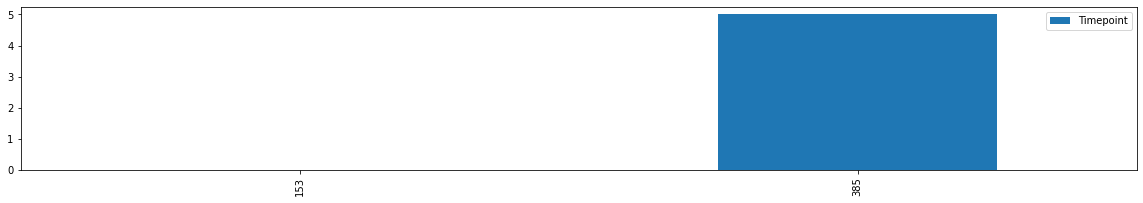

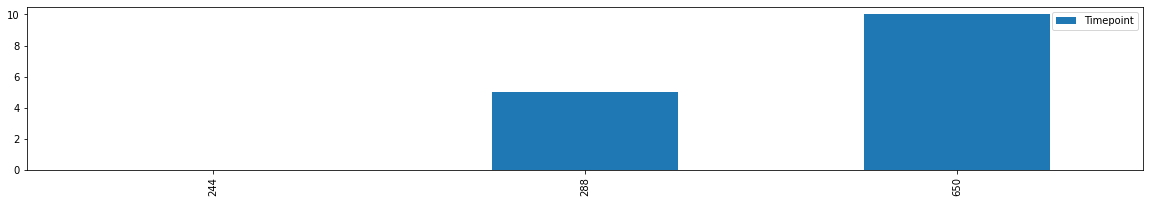

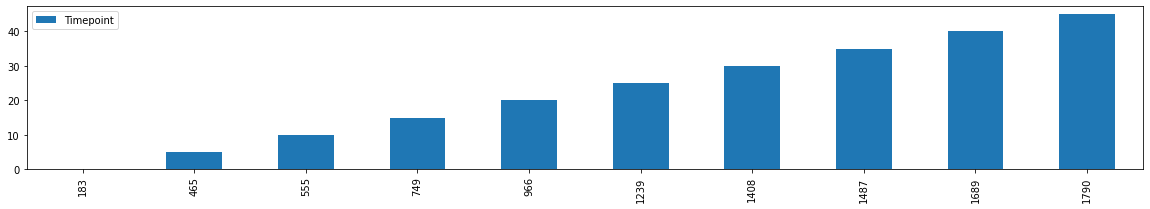

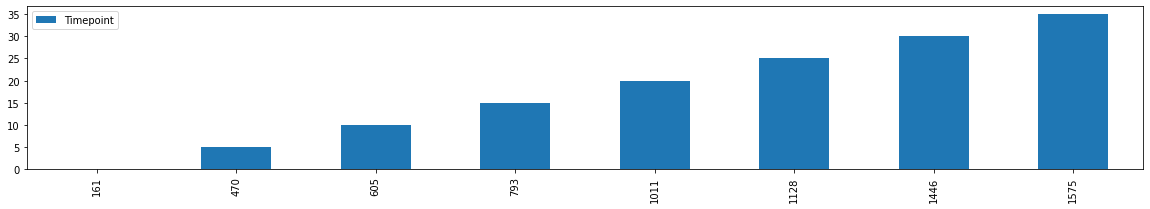

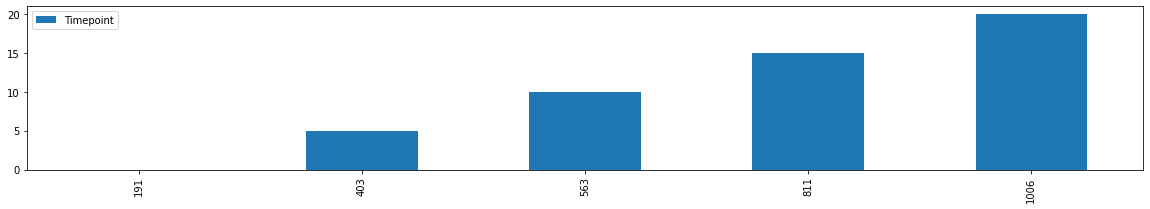

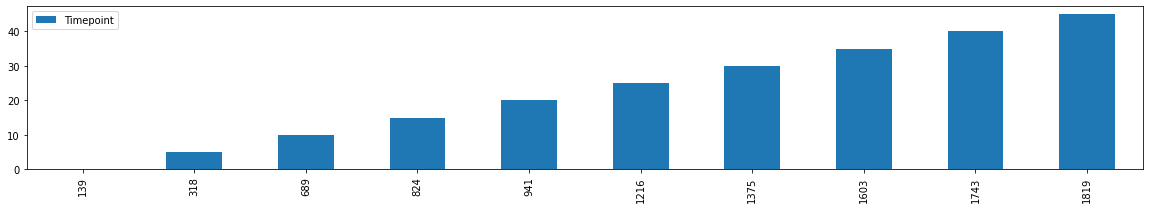

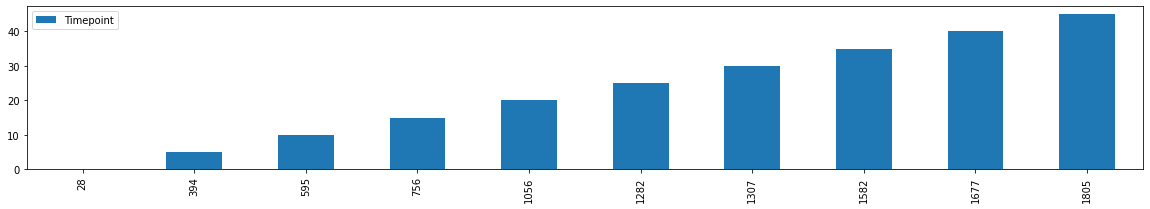

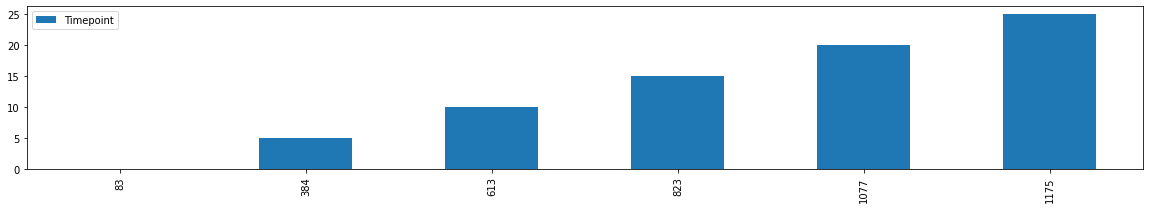

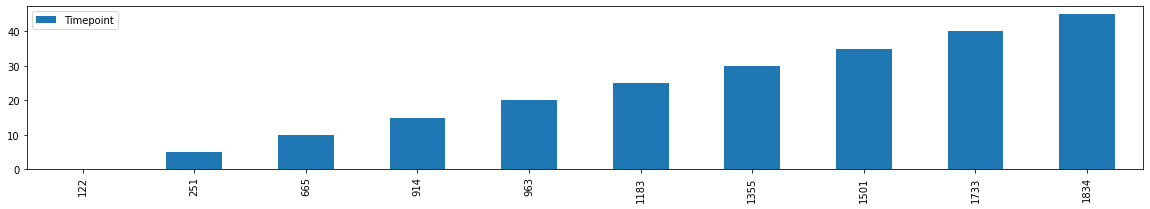

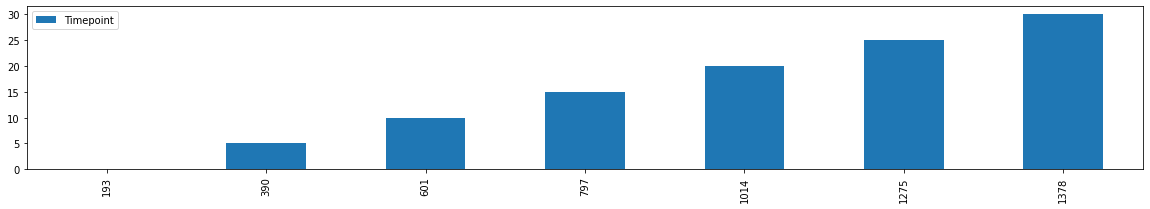

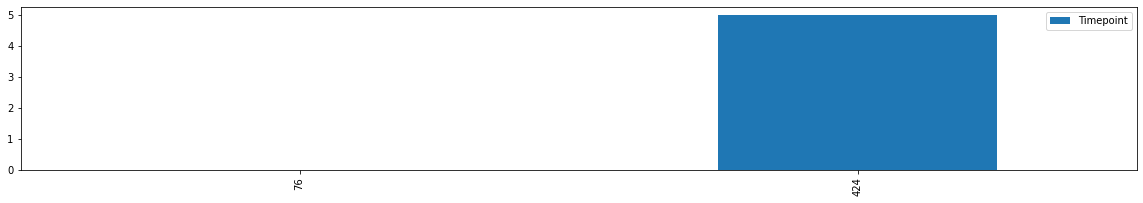

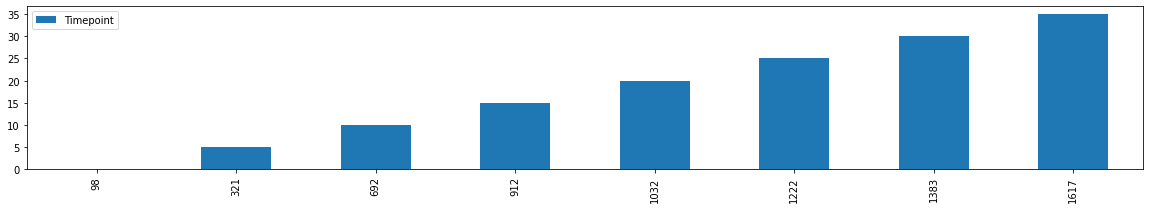

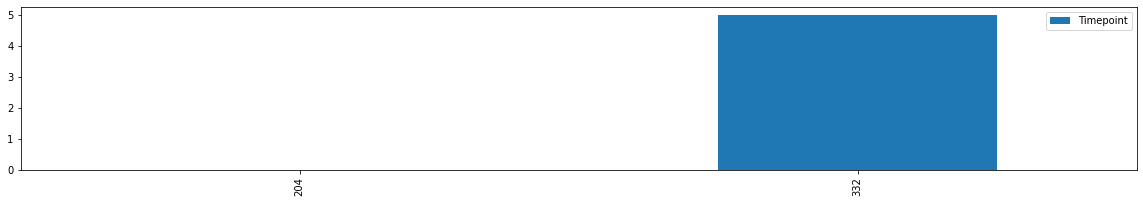

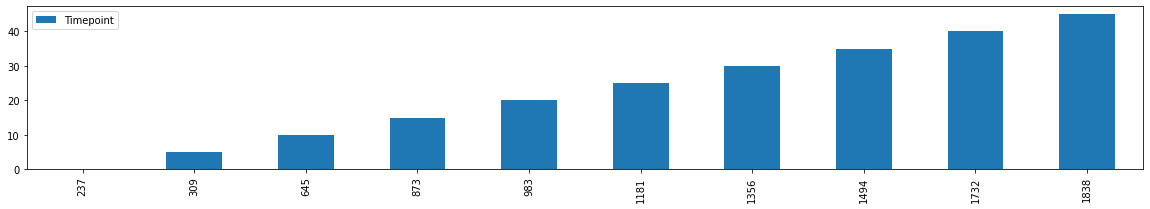

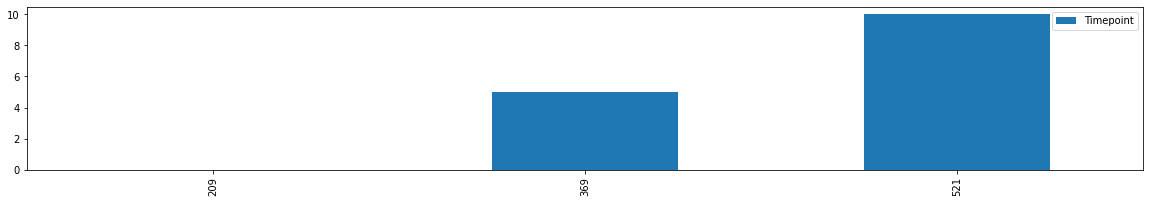

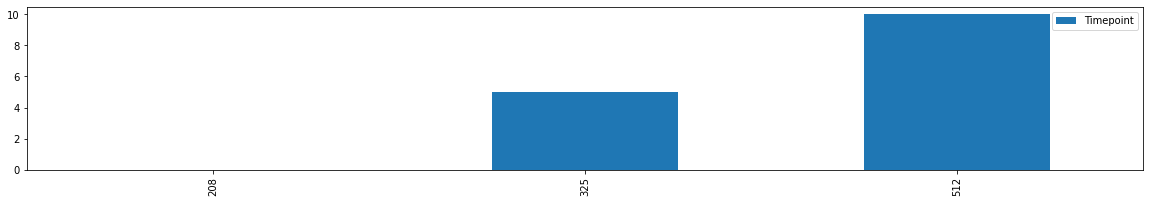

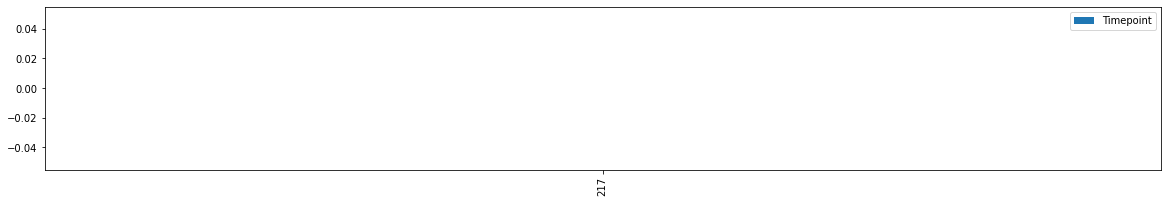

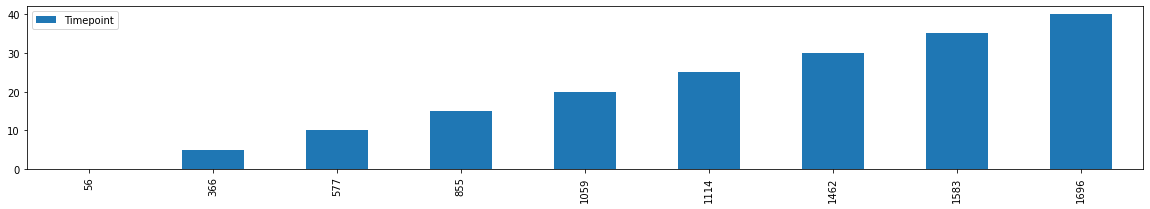

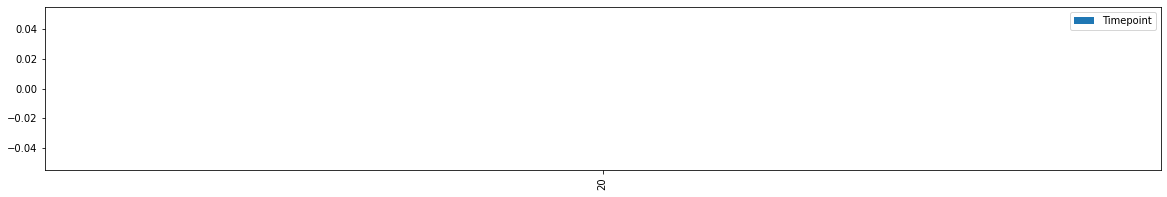

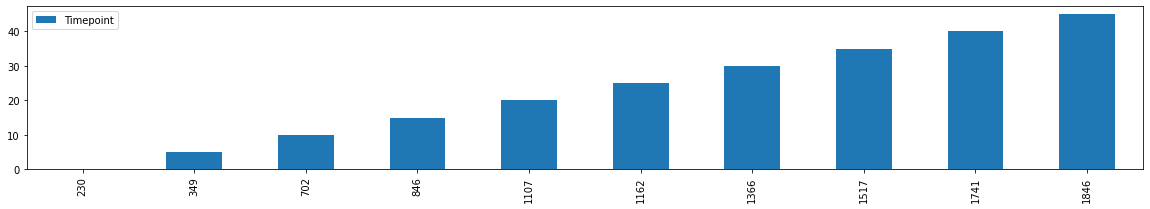

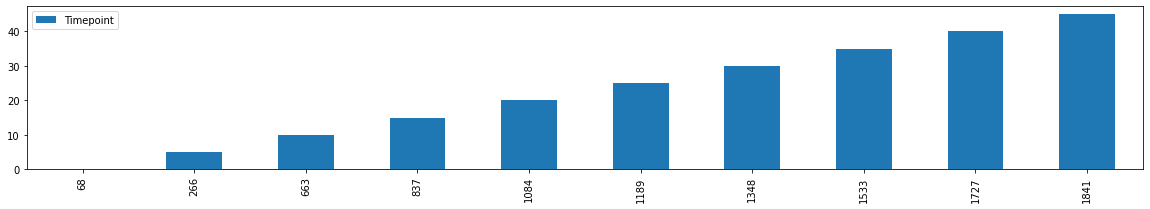

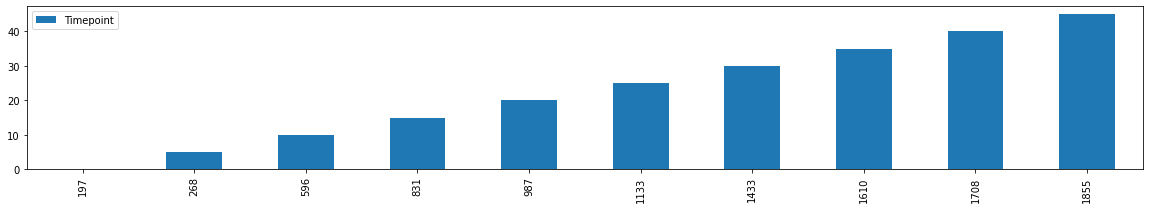

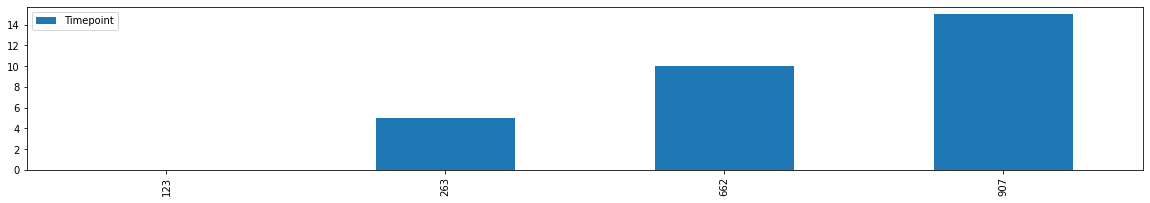

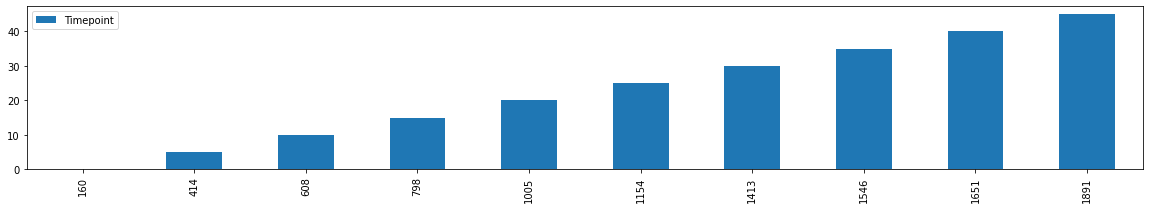

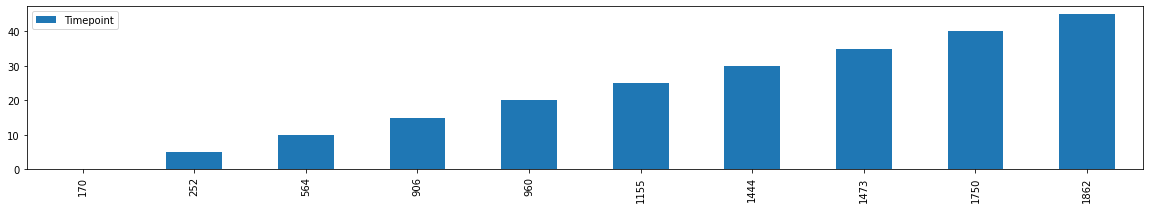

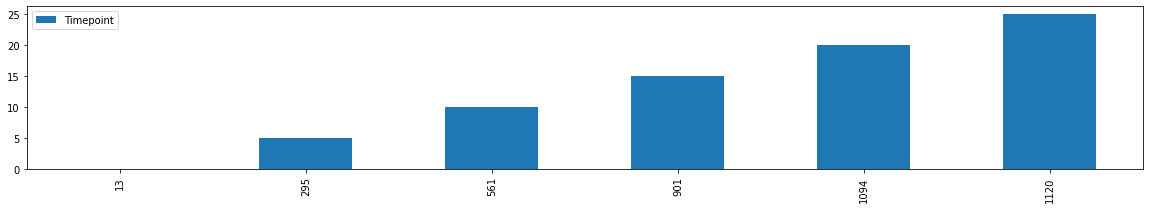

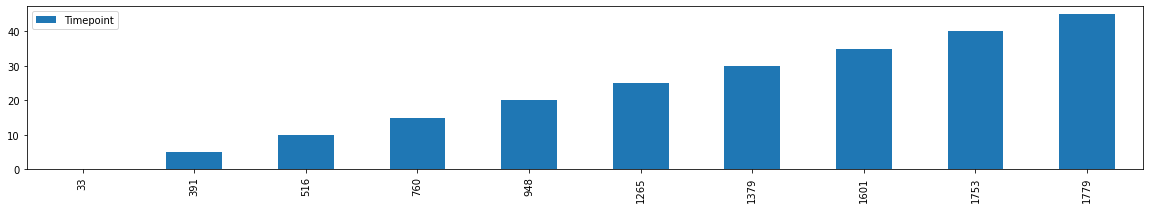

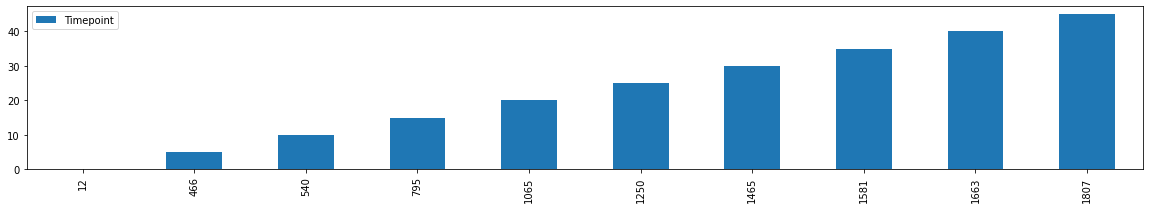

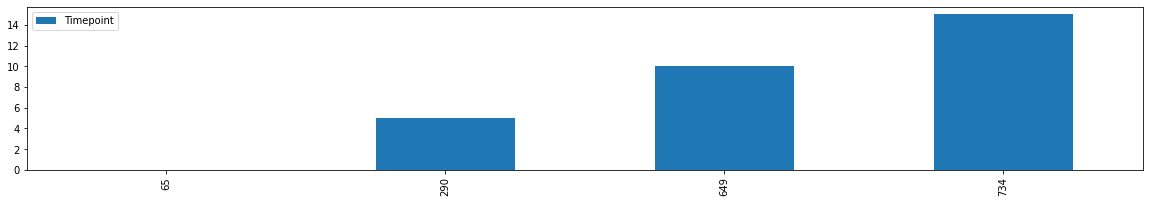

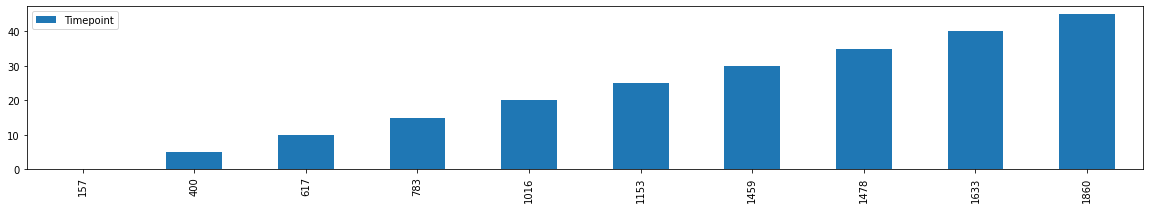

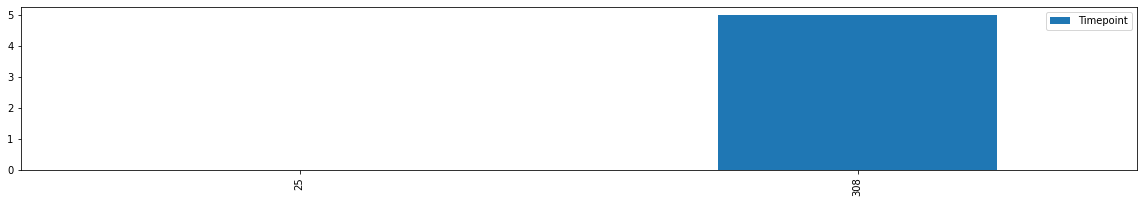

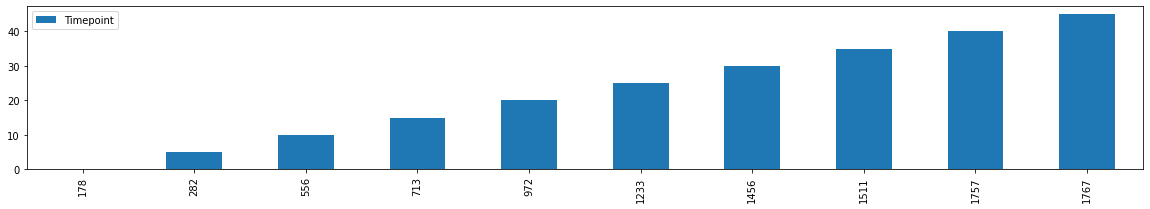

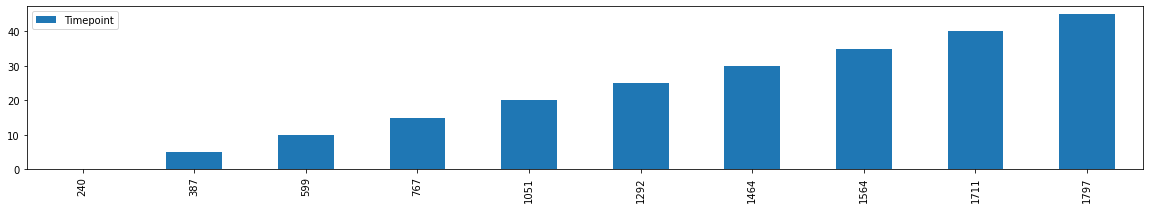

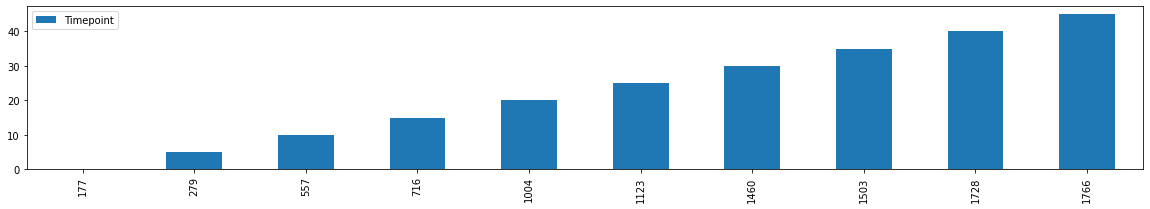

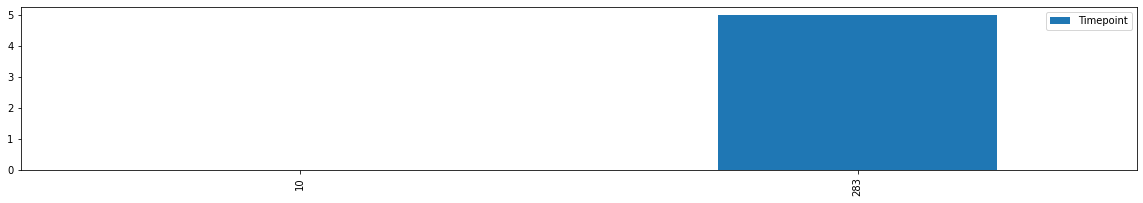

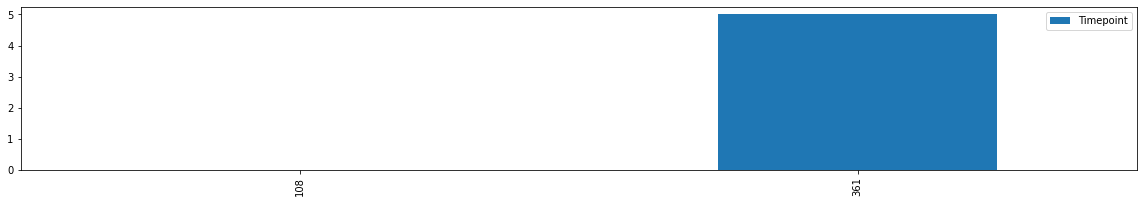

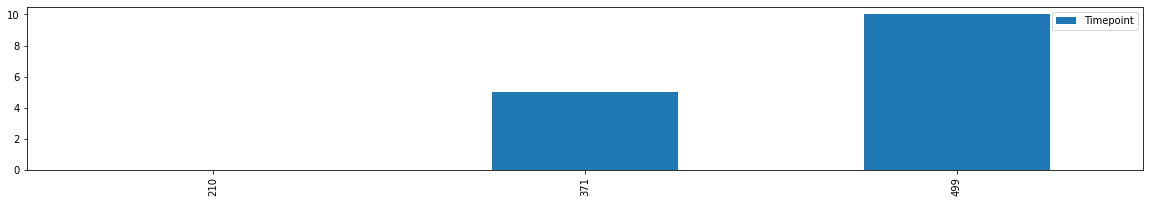

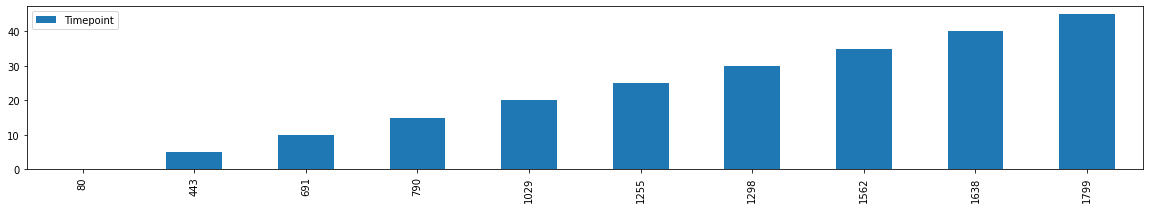

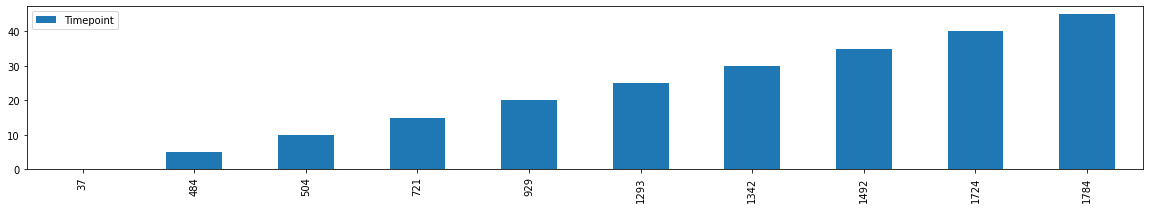

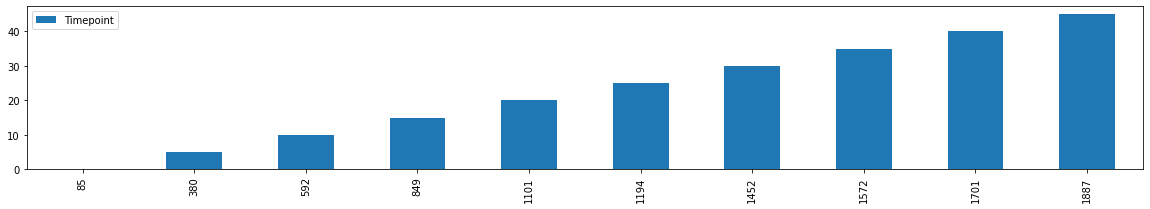

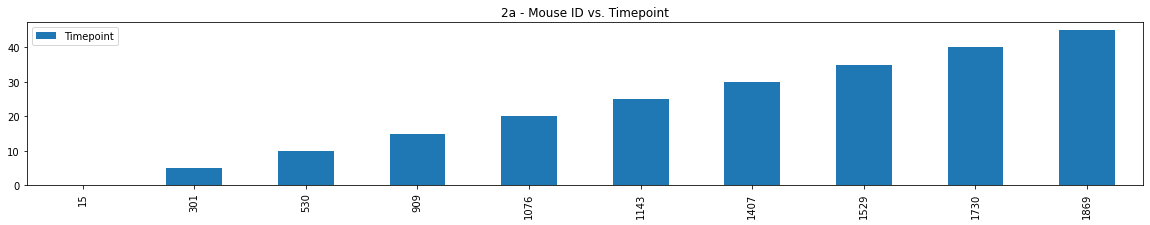

In [74]:
plot2a_mice_tp = plot1_mice_tp.groupby("Mouse ID")

plot2a_mice_tp.plot(kind="bar", figsize=(20,3))
plt.title("2a - Mouse ID vs. Timepoint")
plt.show()

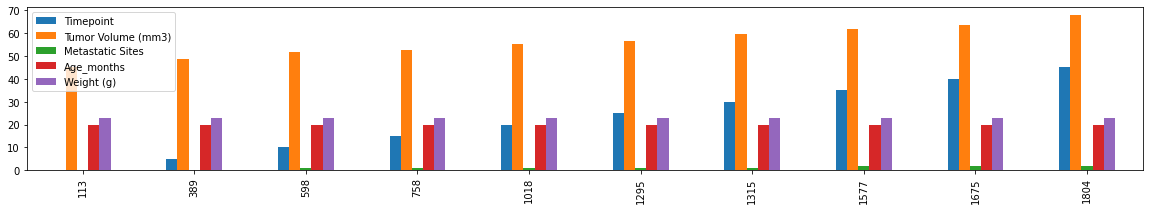

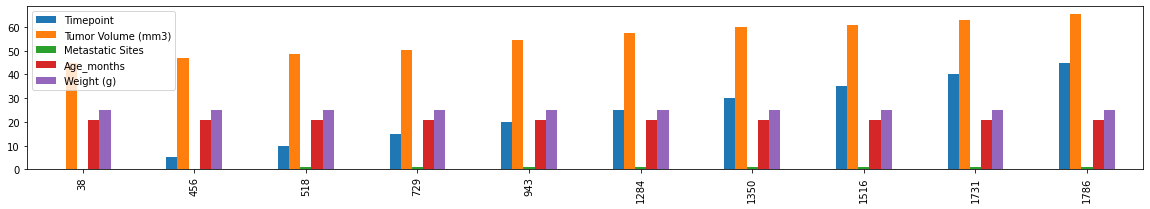

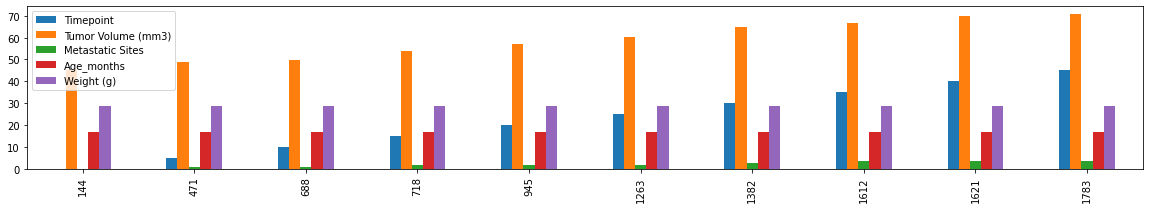

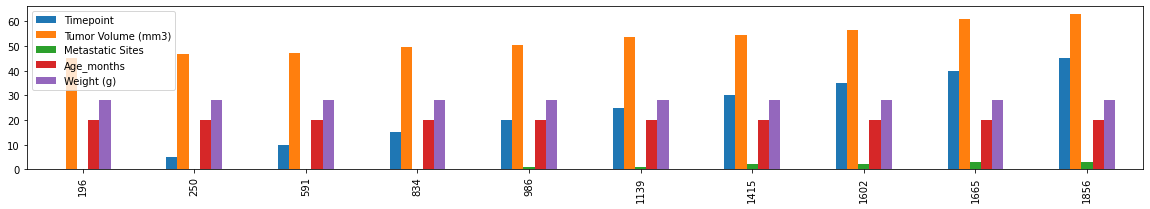

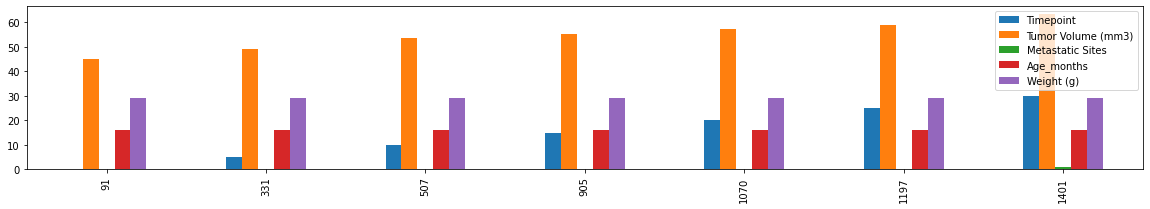

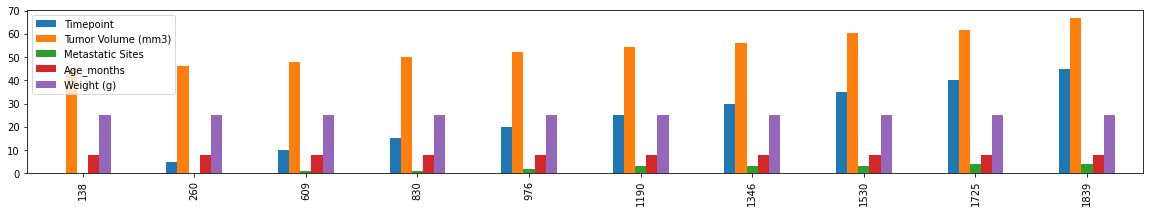

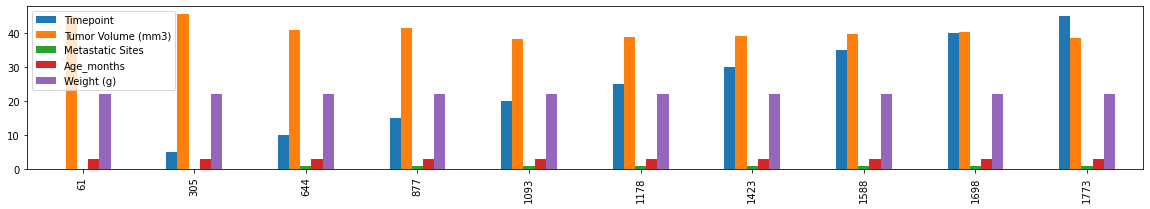

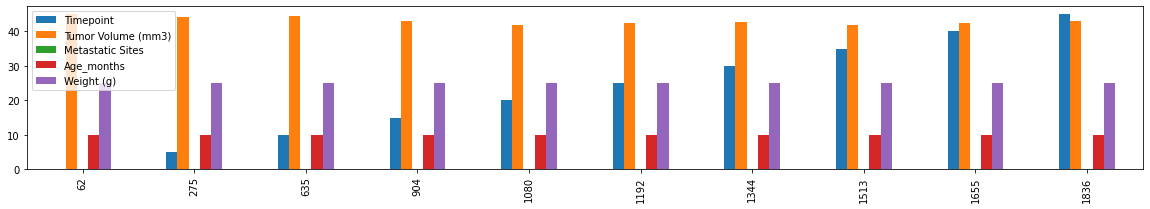

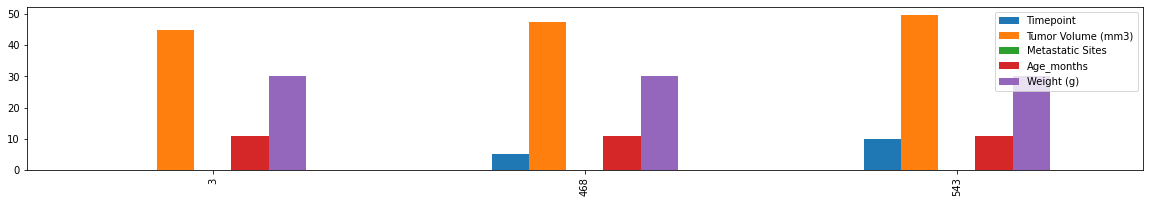

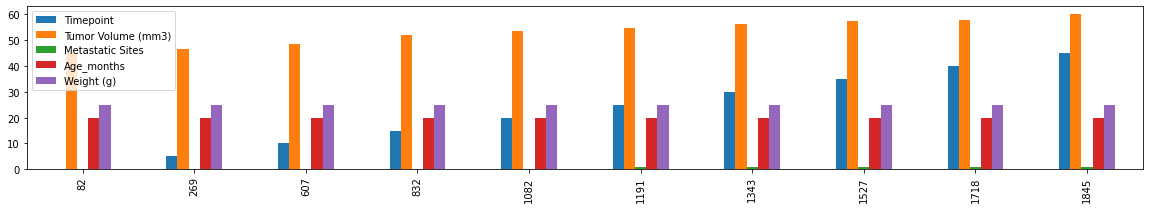

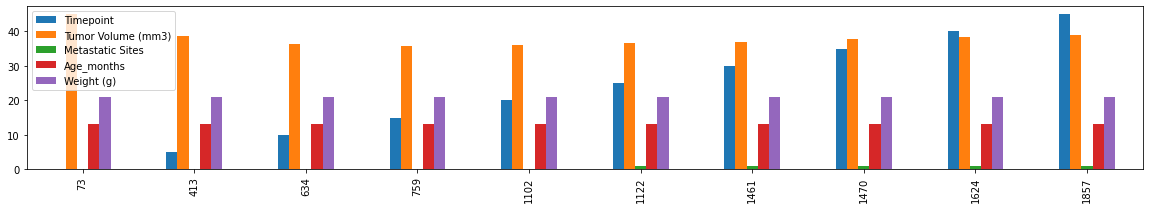

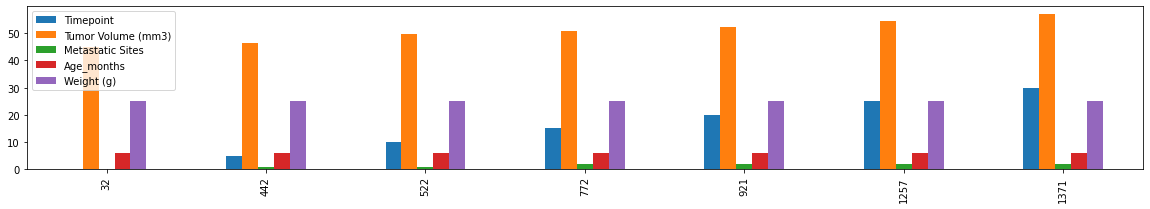

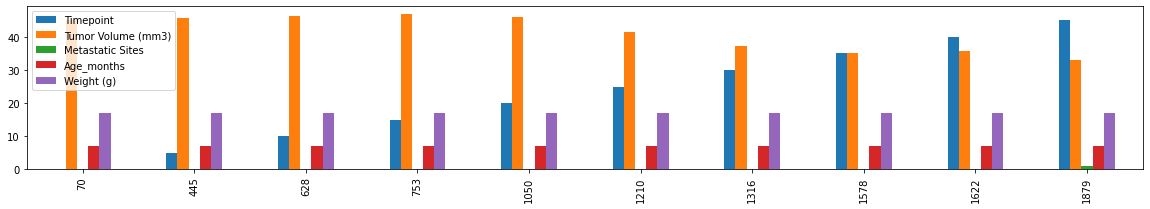

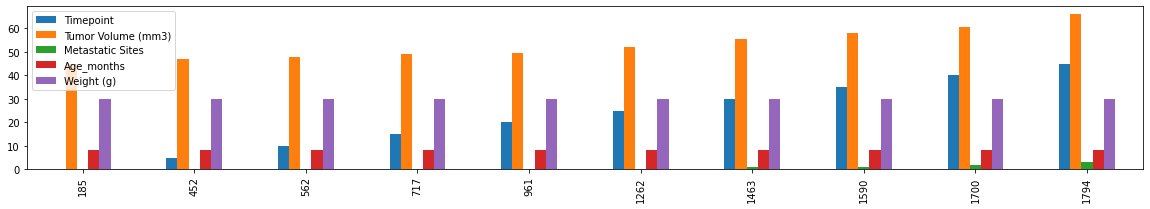

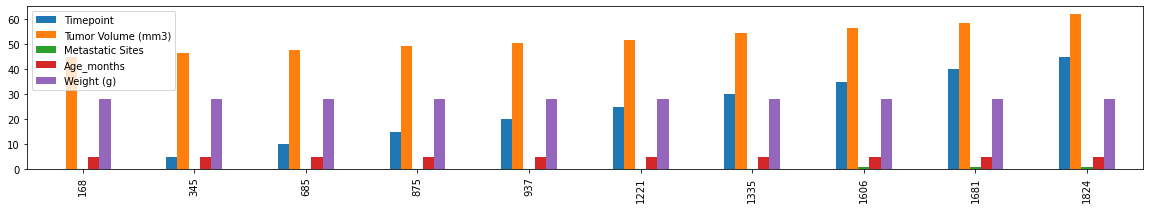

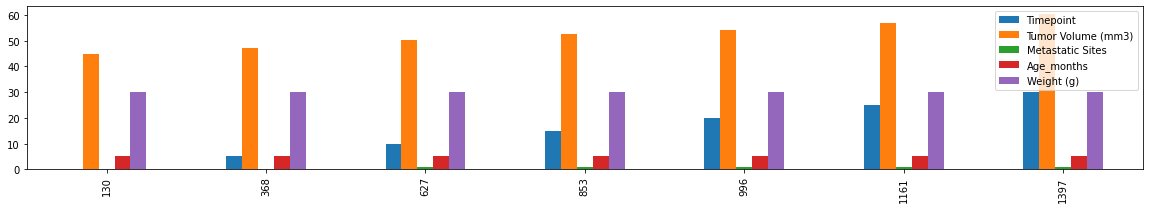

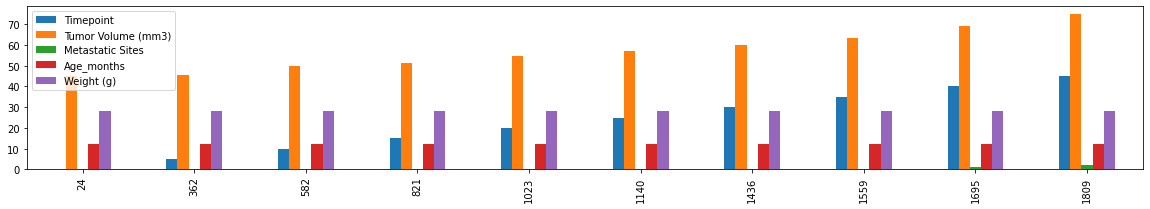

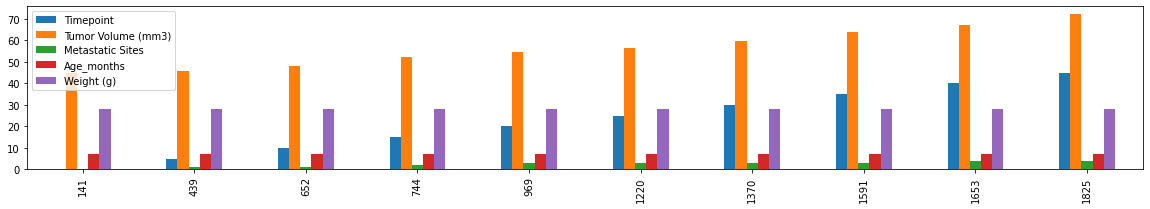

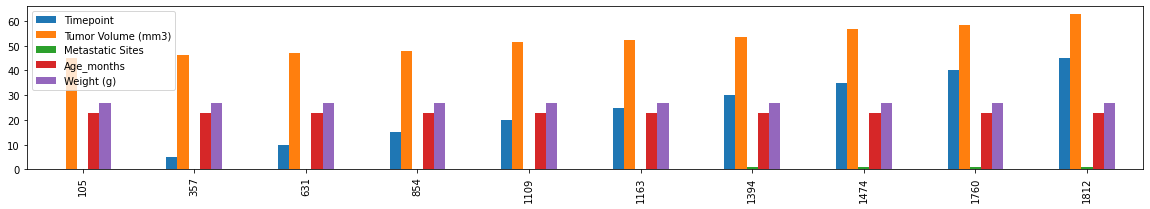

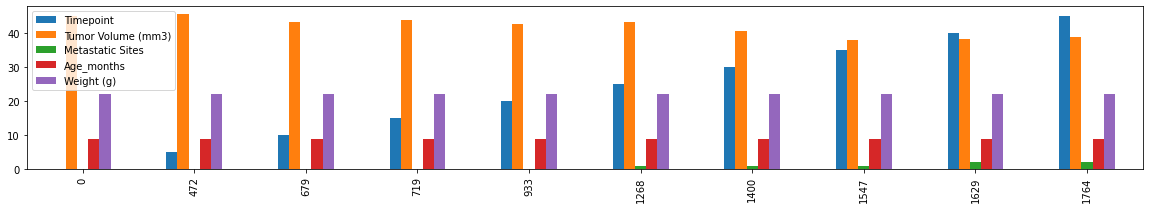

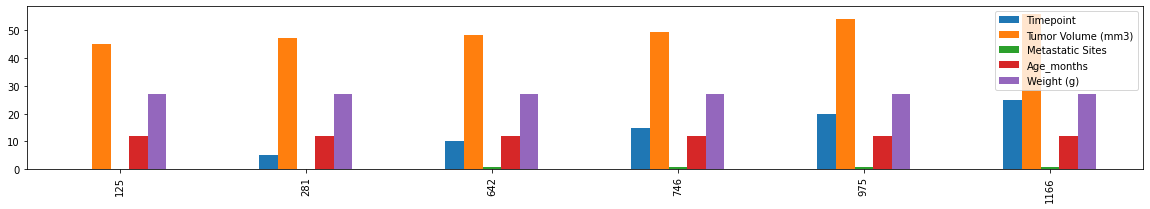

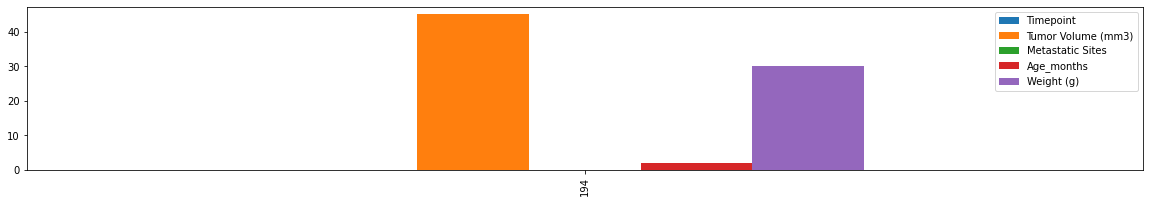

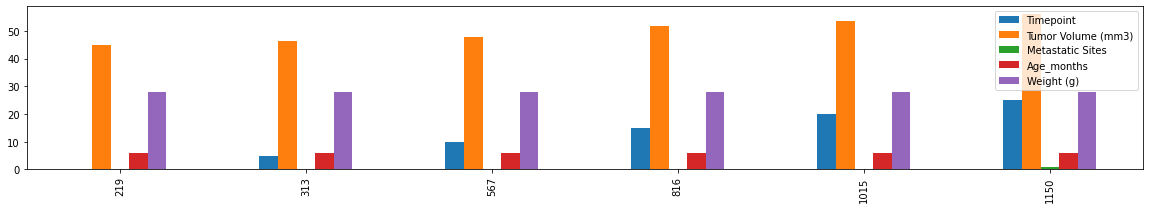

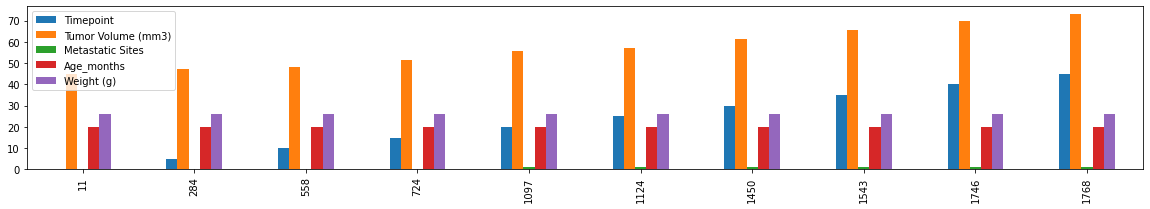

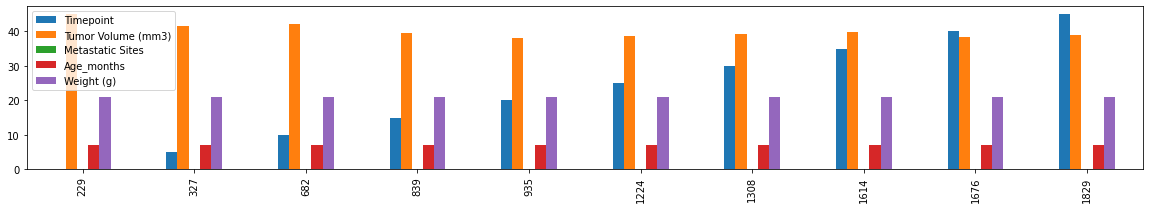

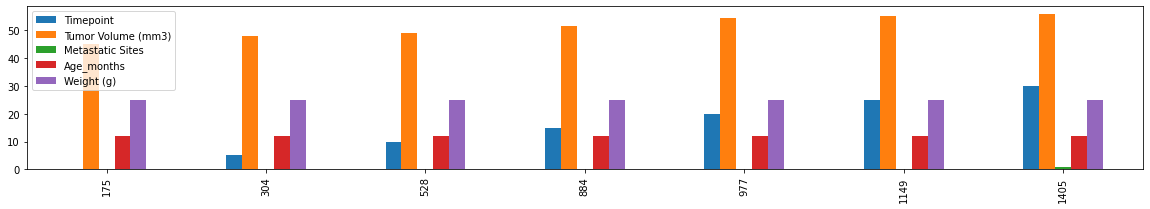

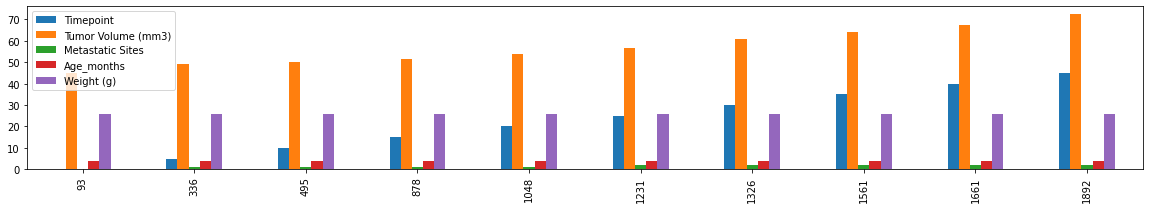

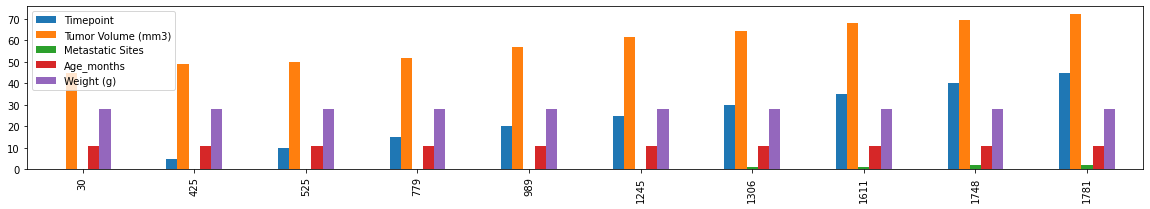

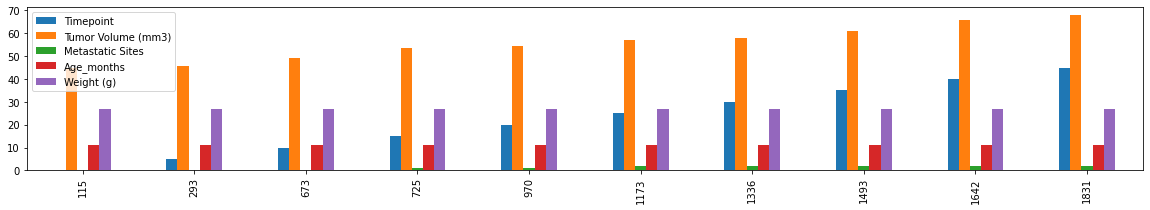

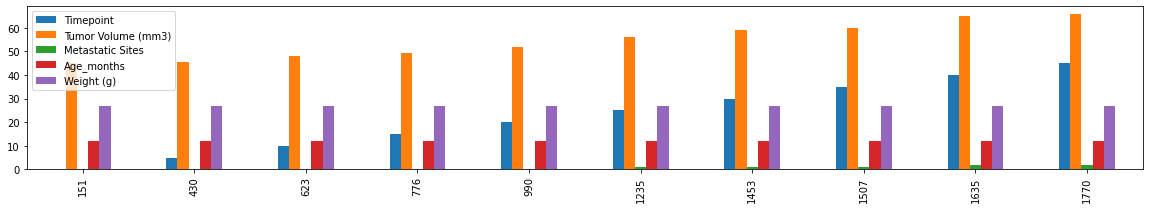

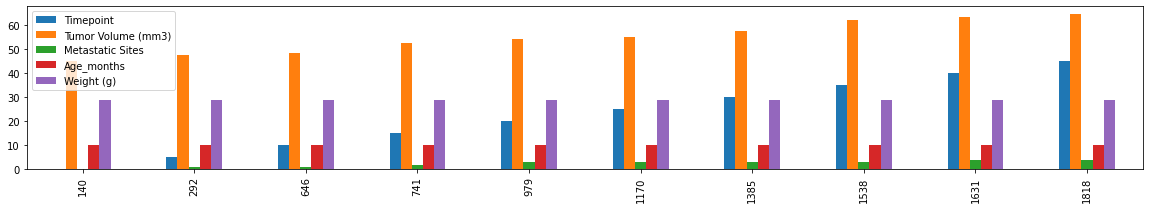

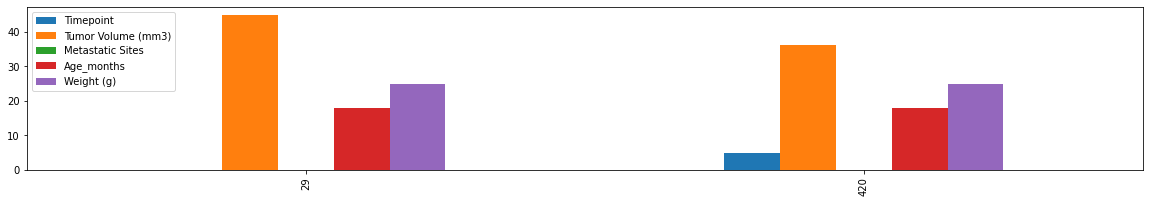

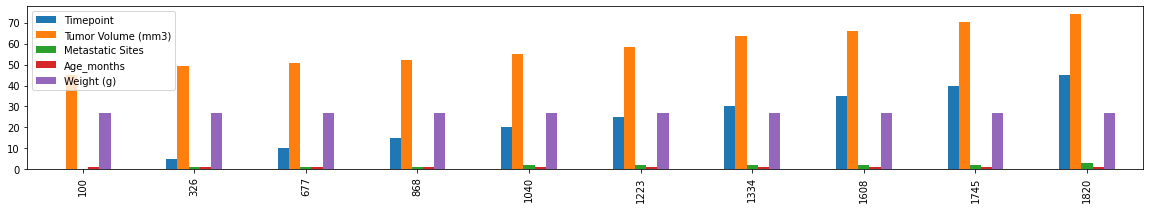

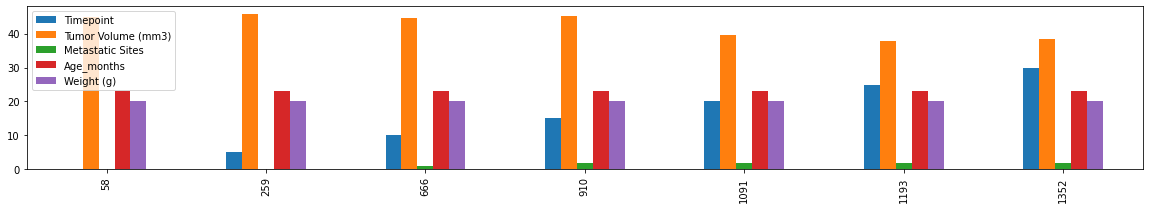

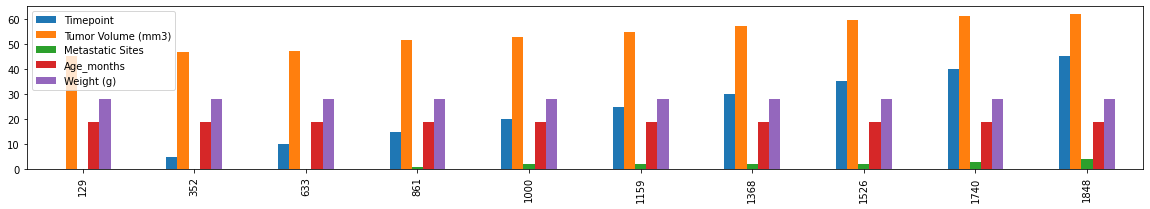

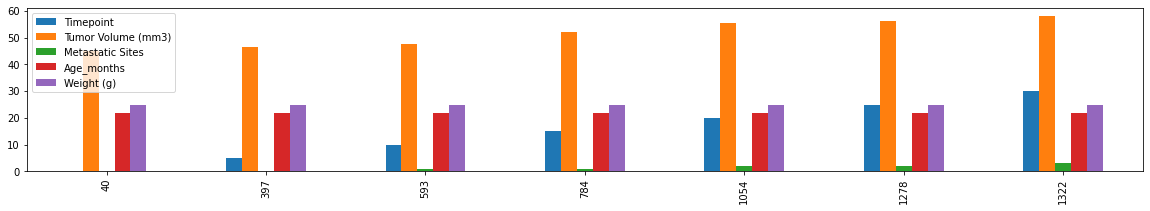

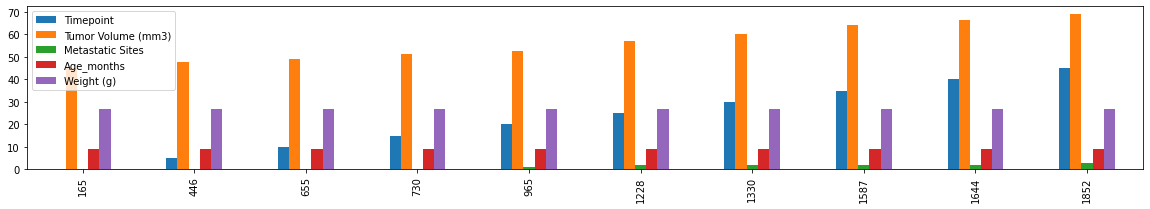

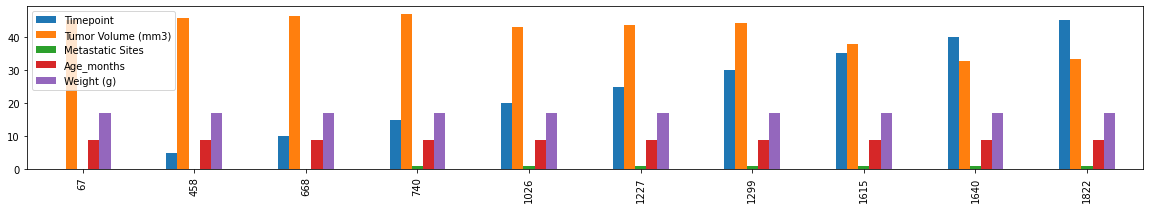

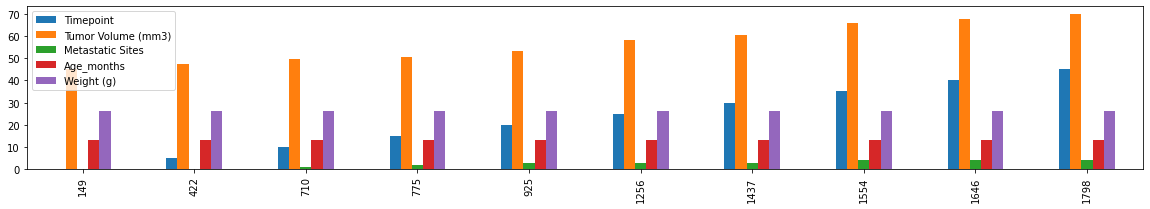

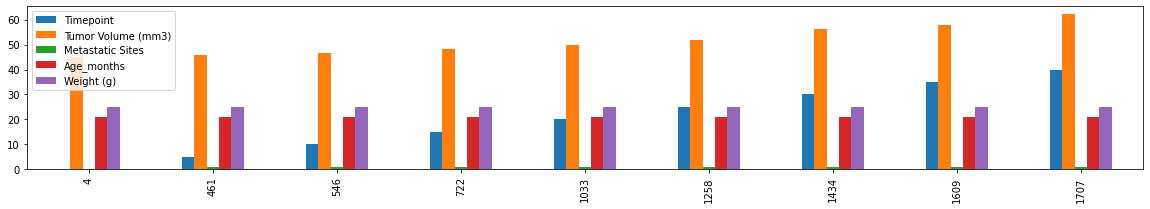

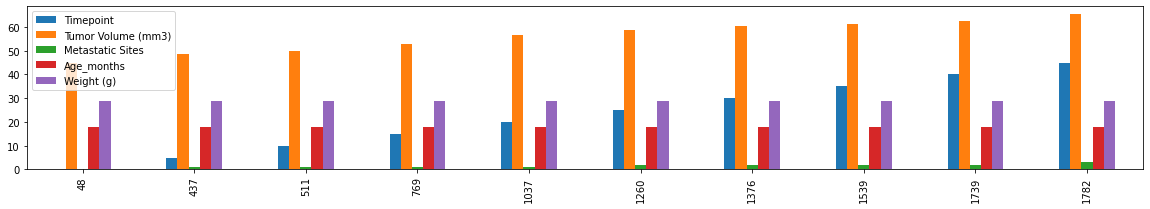

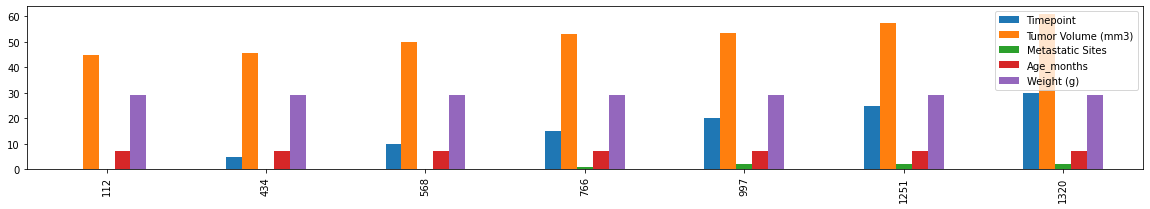

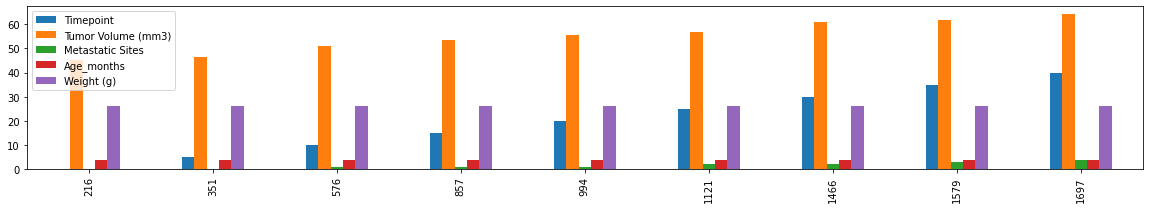

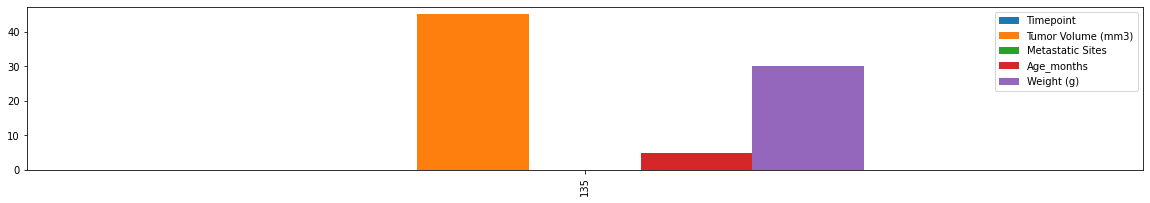

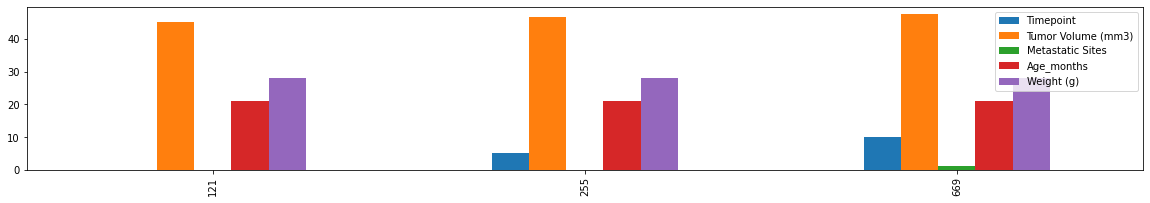

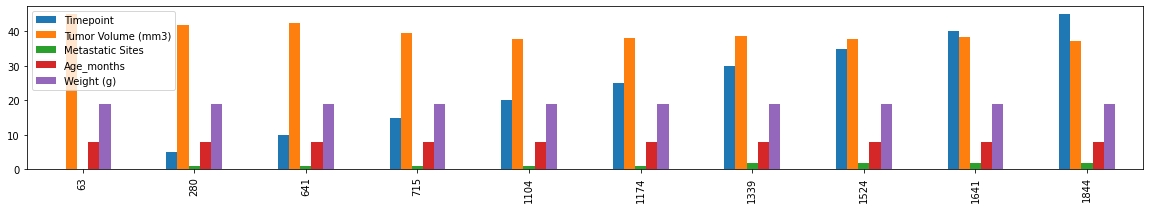

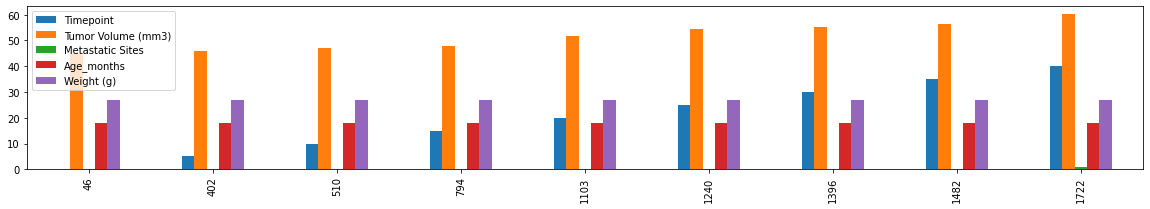

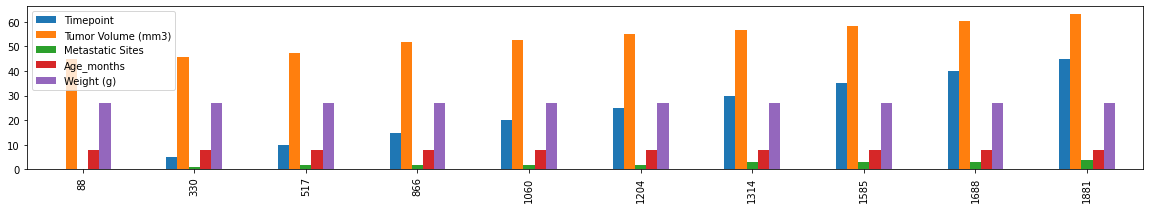

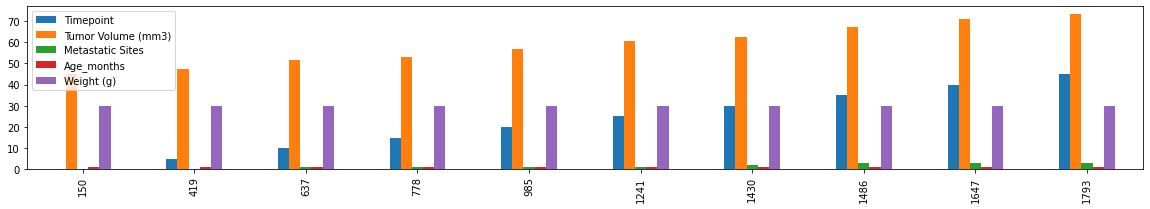

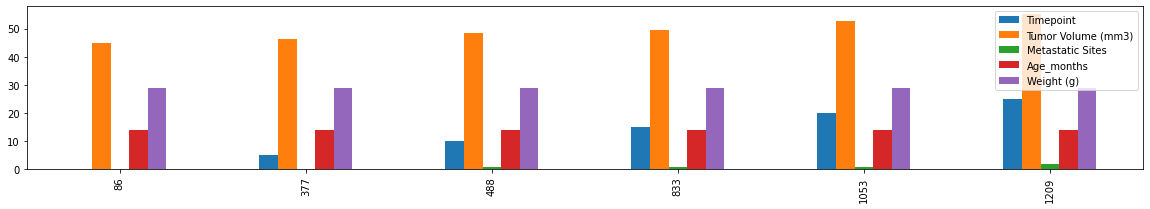

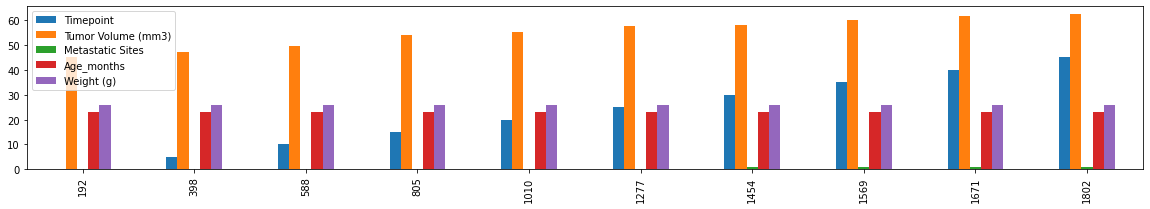

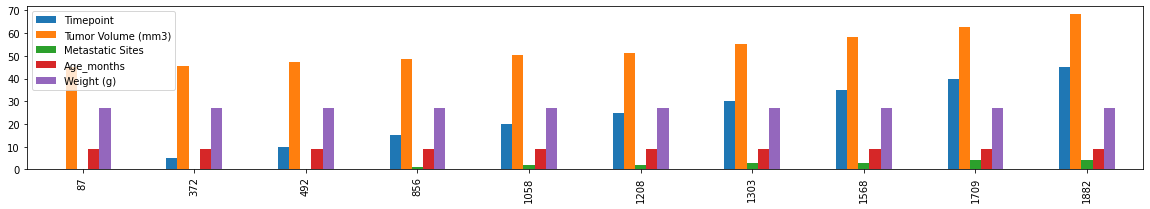

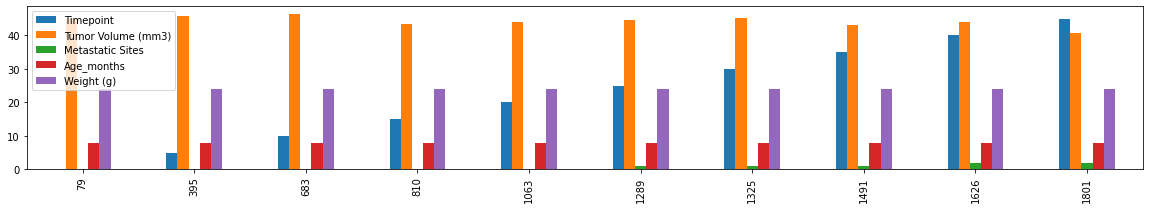

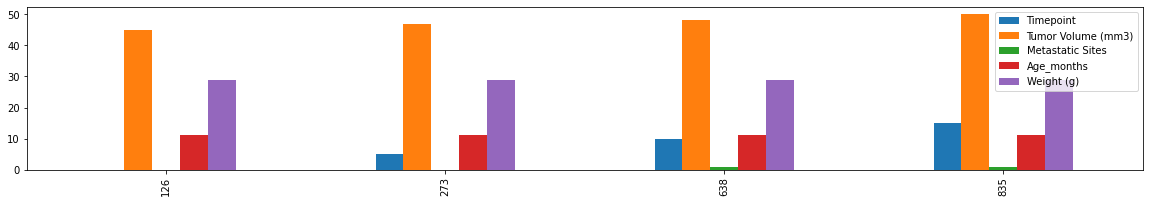

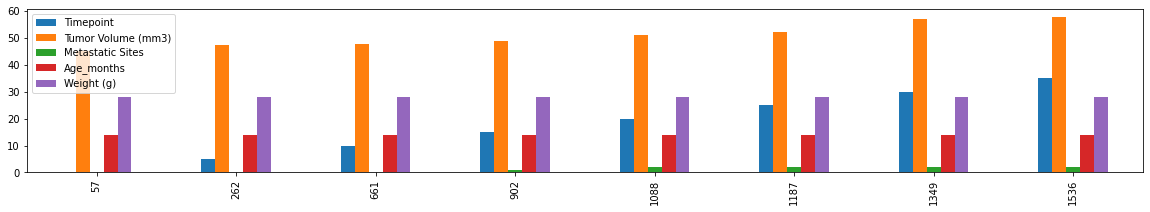

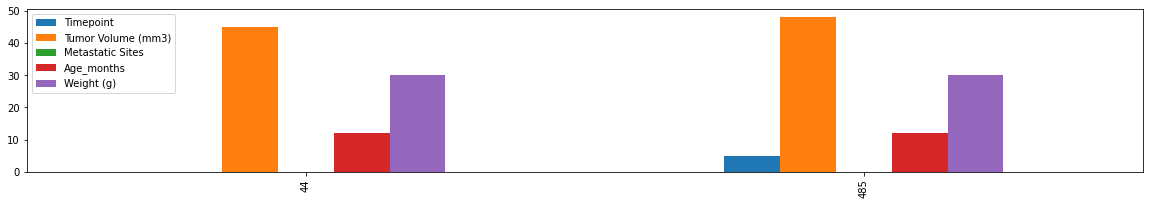

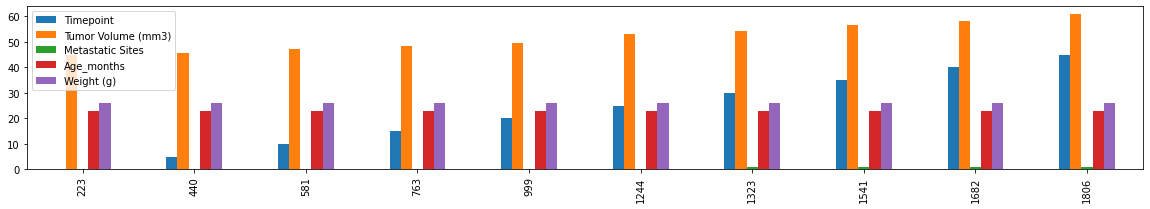

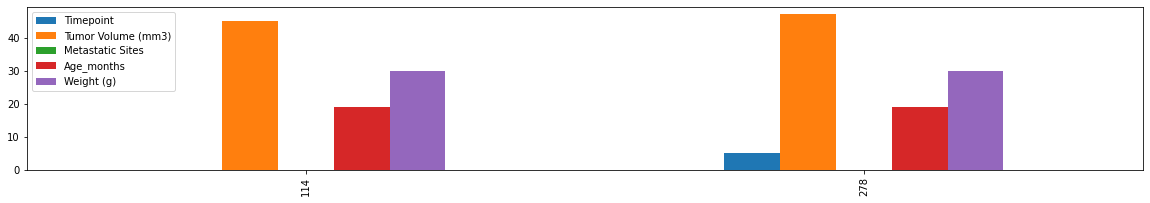

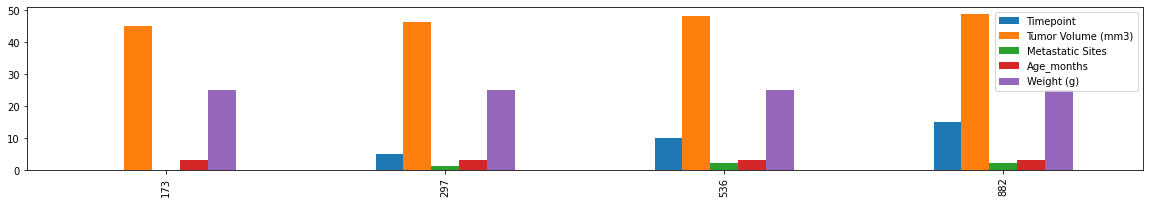

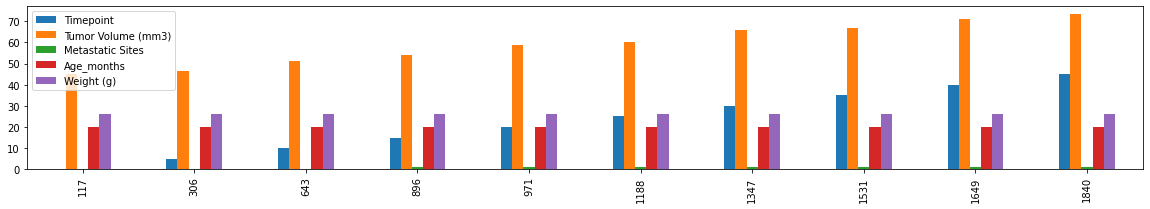

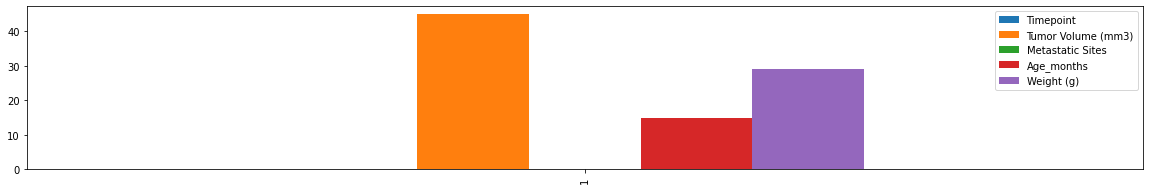

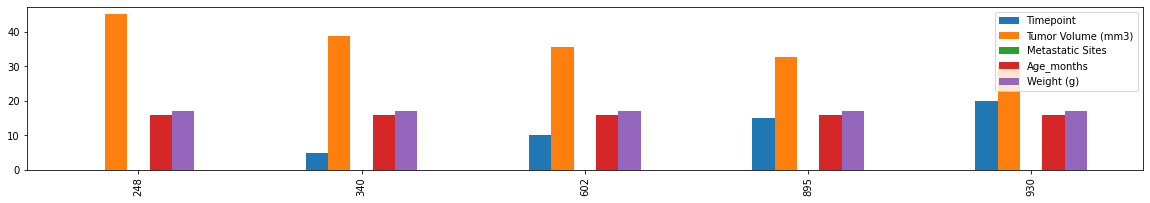

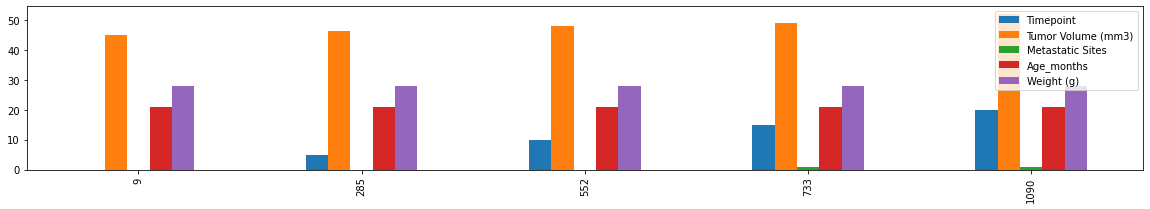

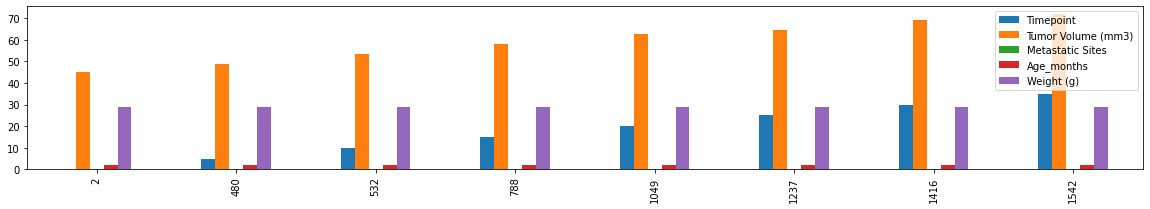

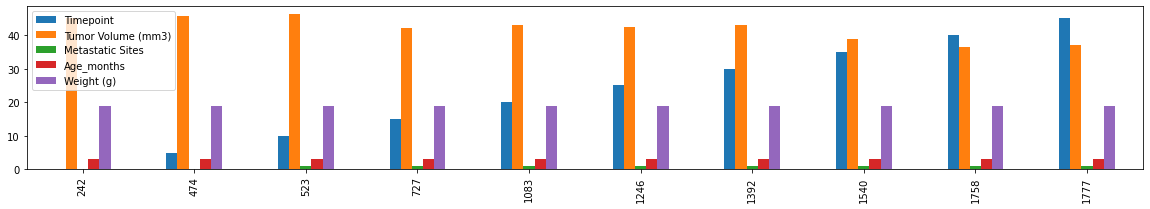

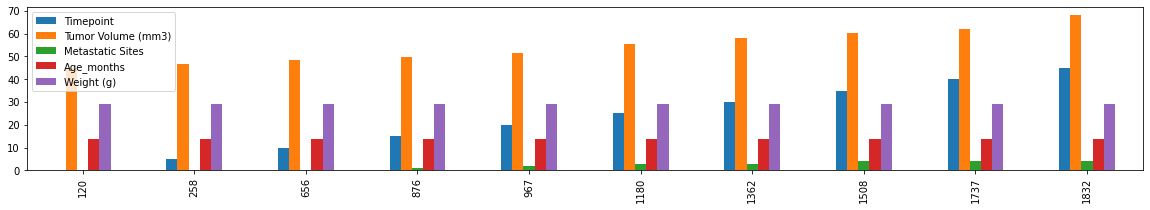

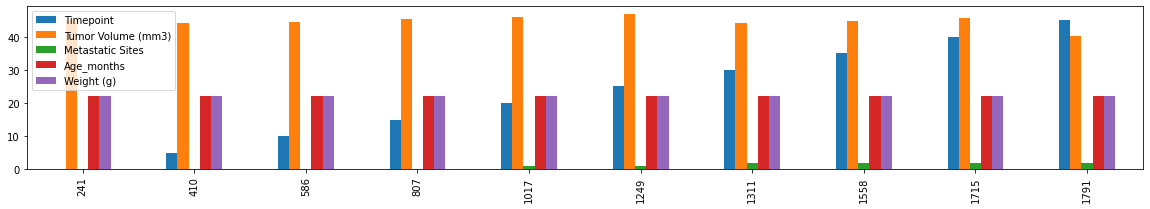

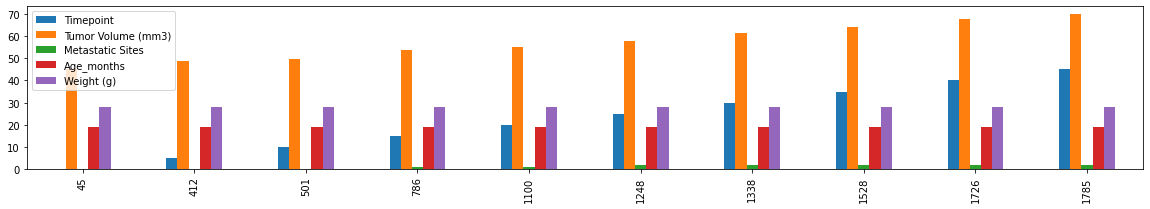

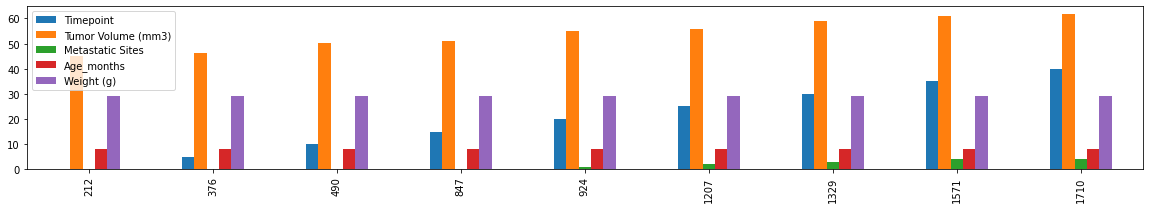

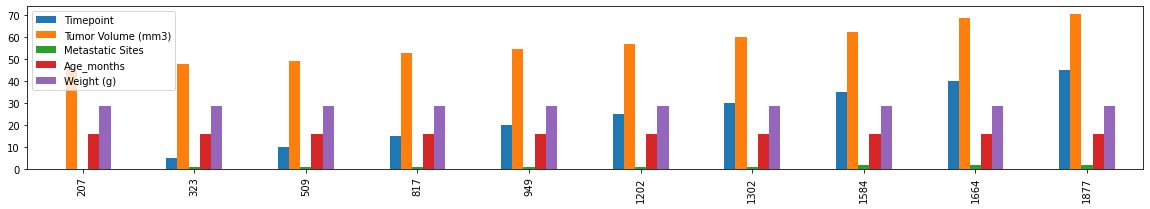

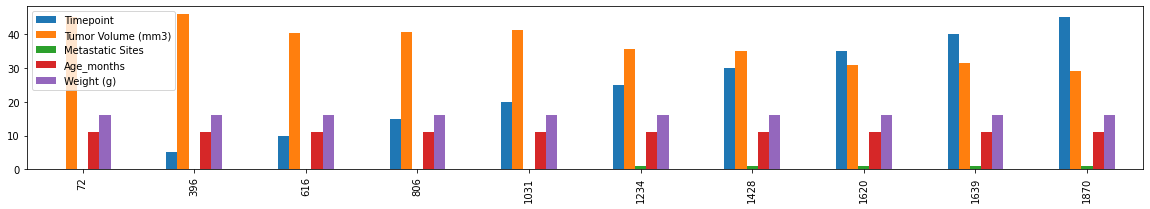

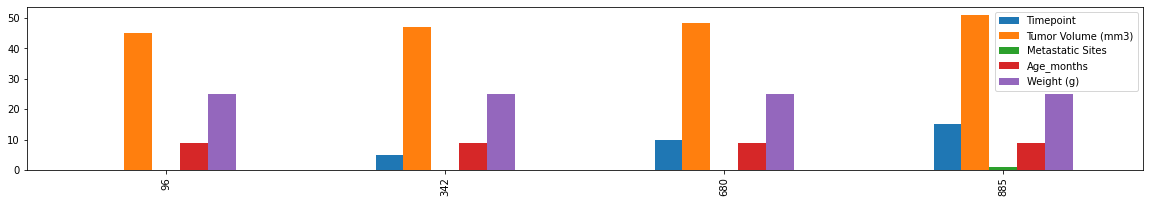

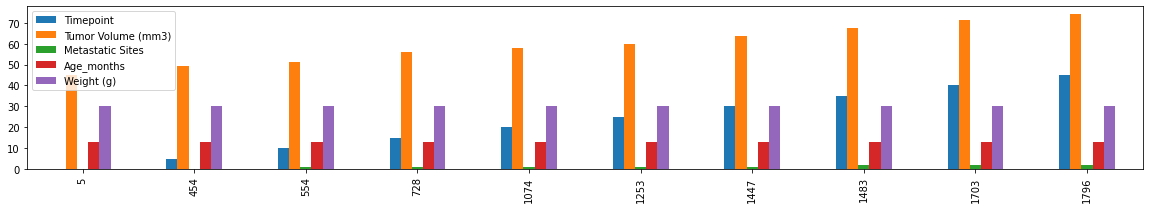

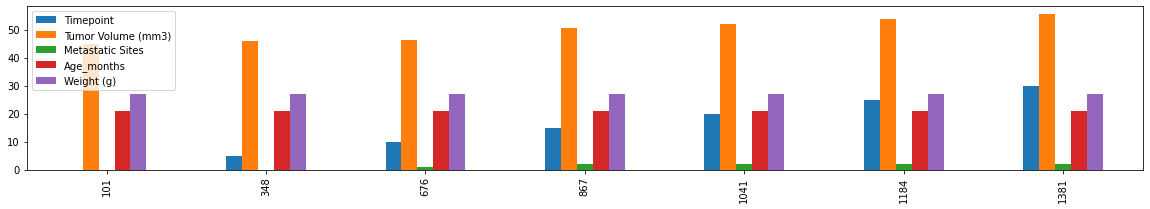

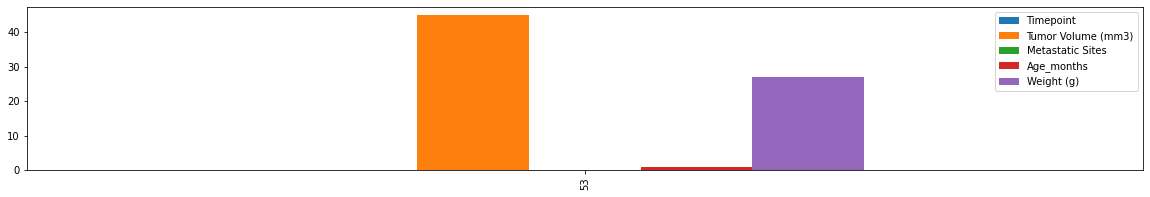

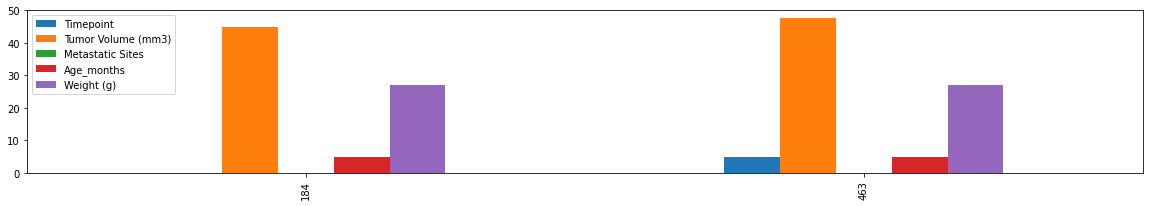

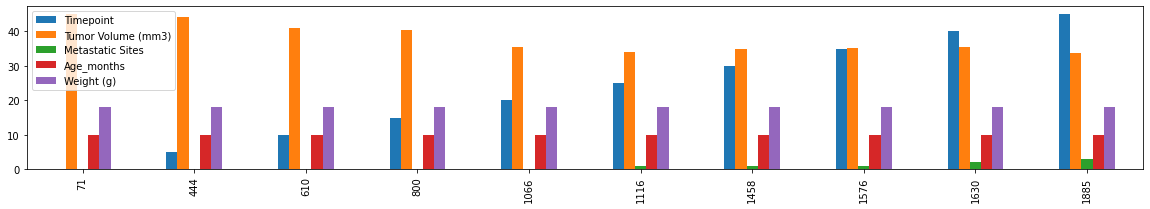

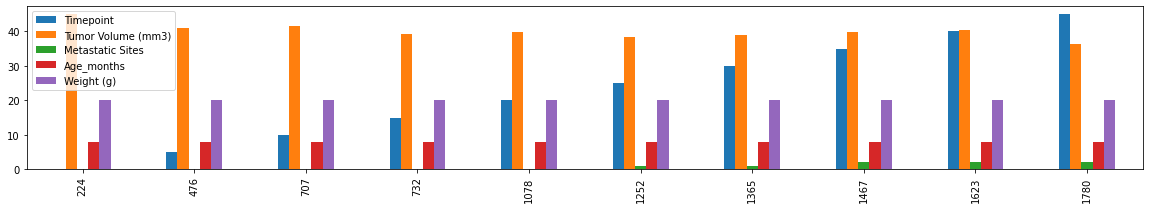

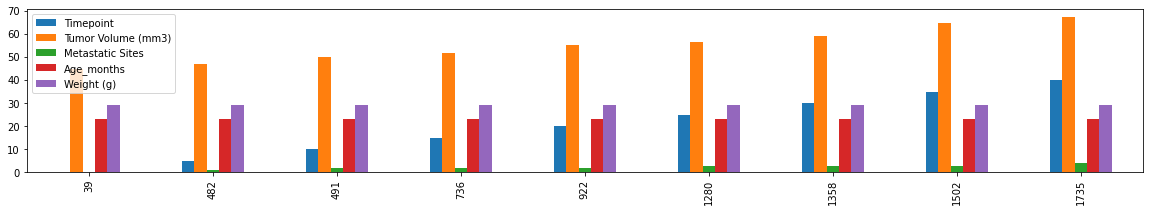

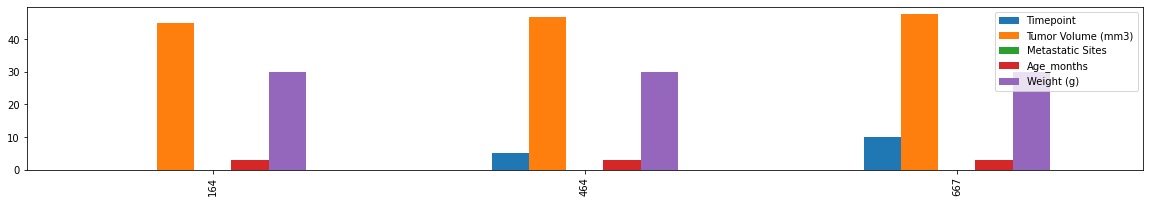

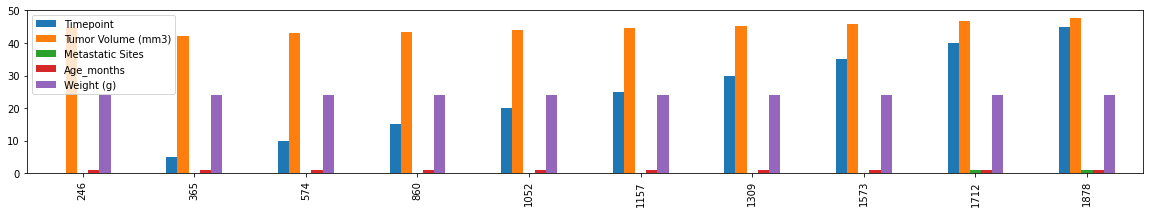

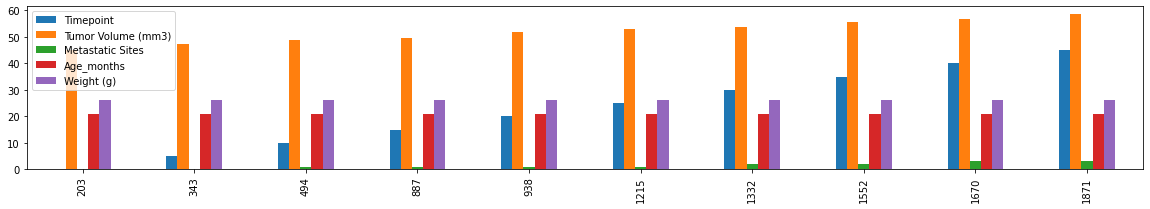

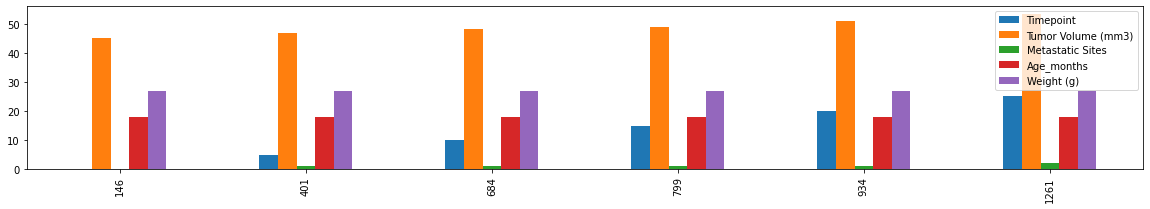

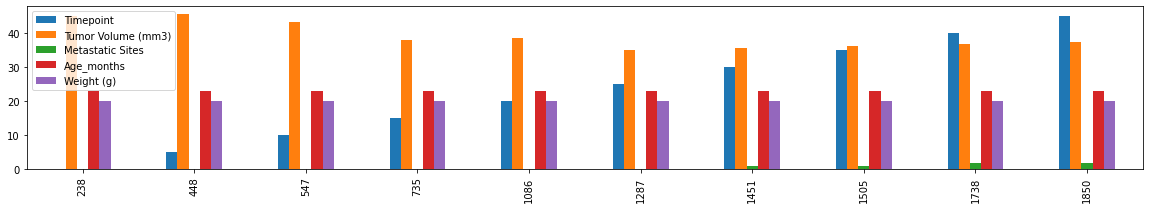

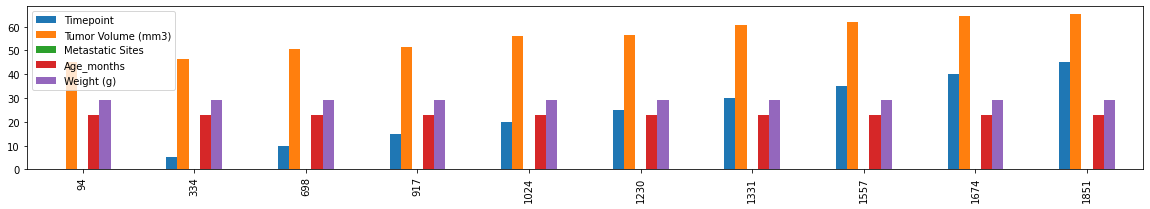

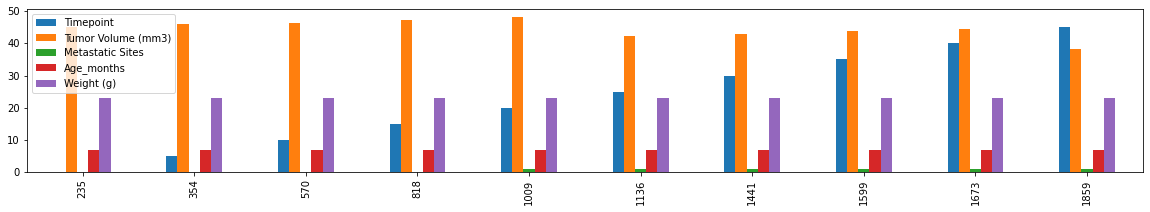

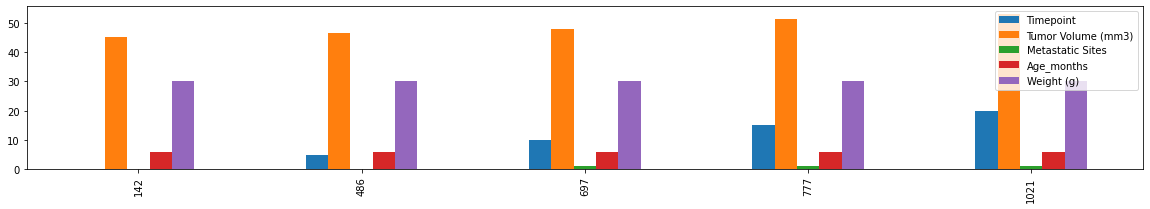

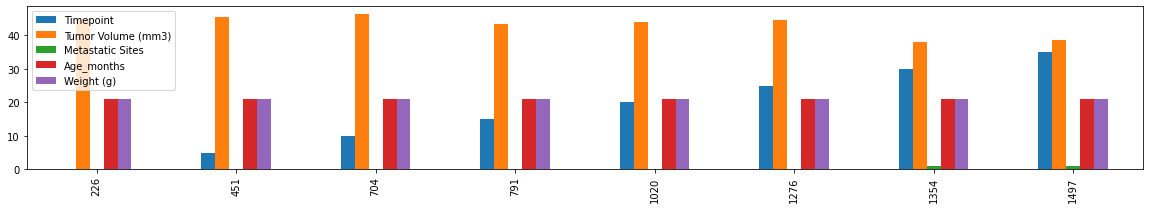

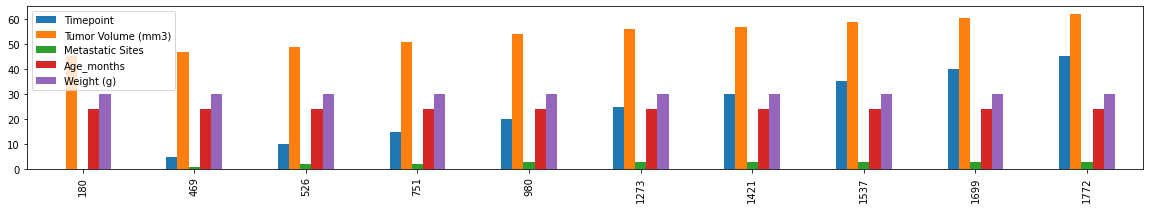

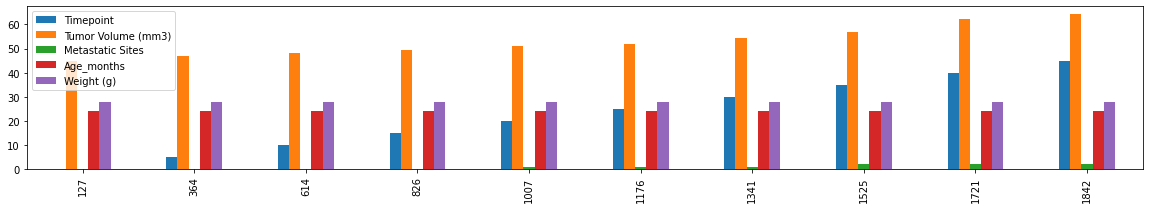

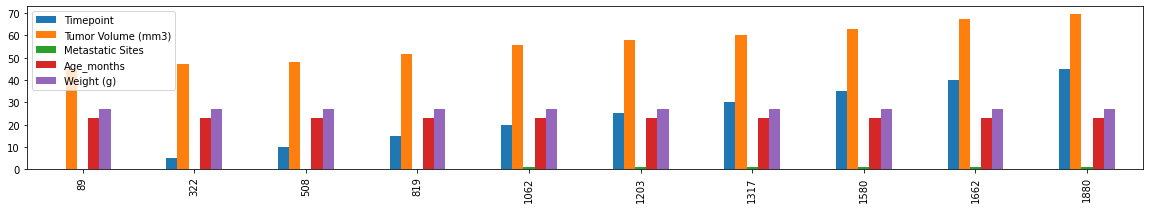

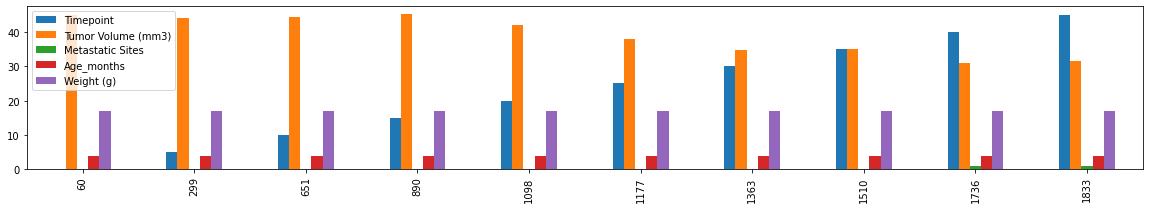

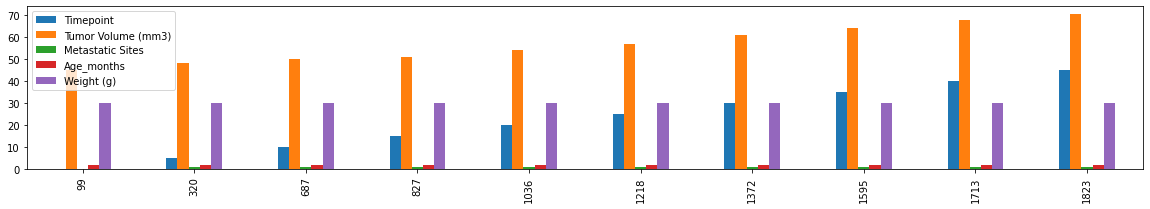

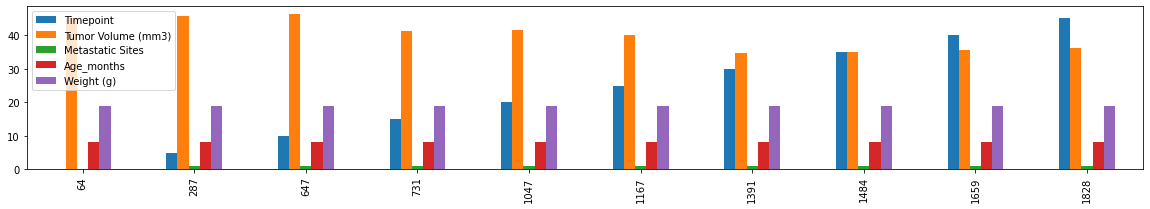

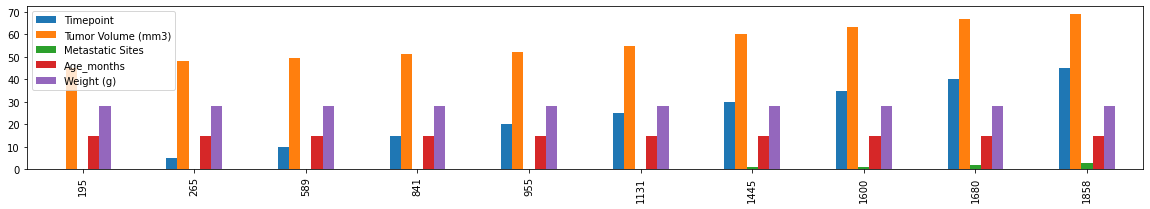

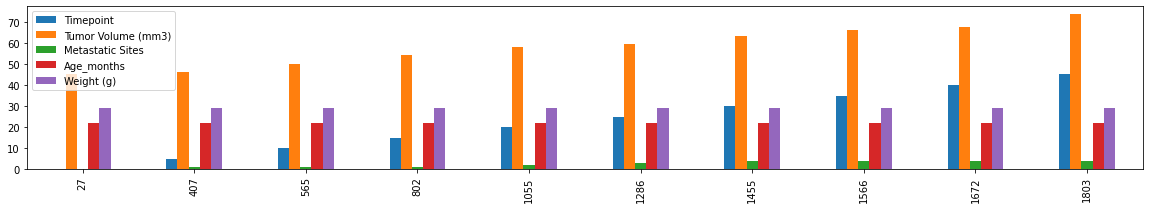

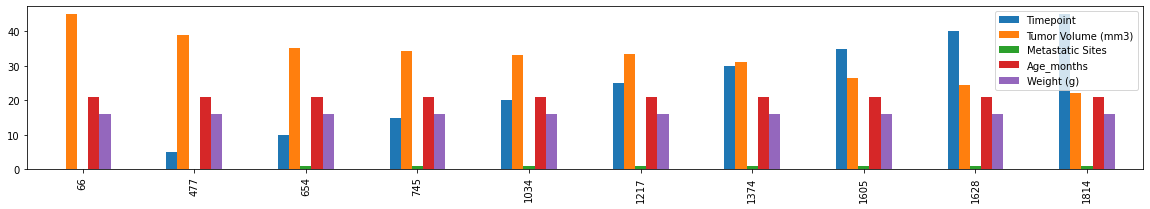

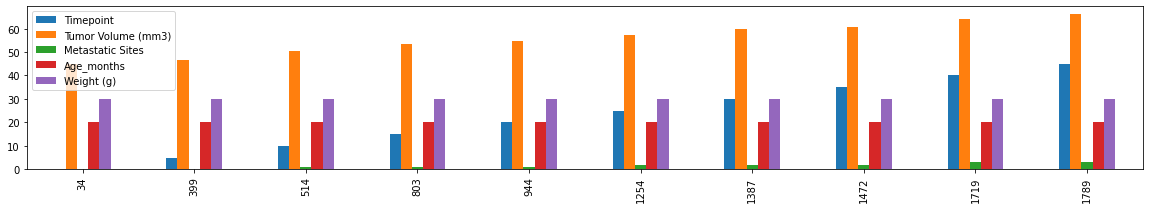

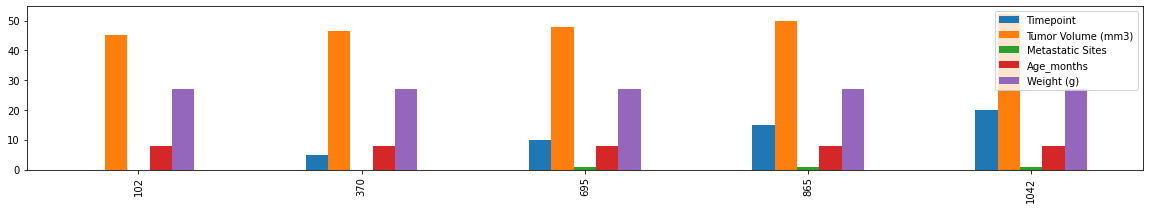

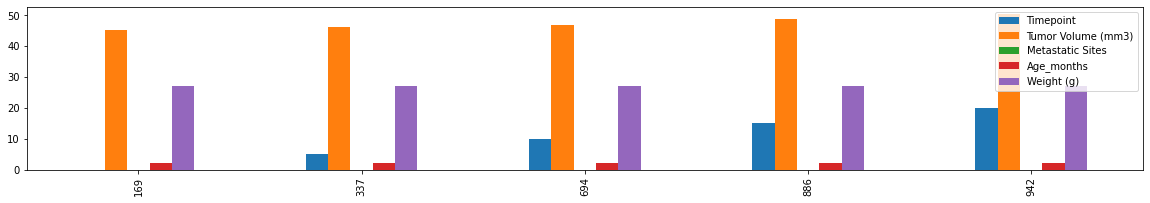

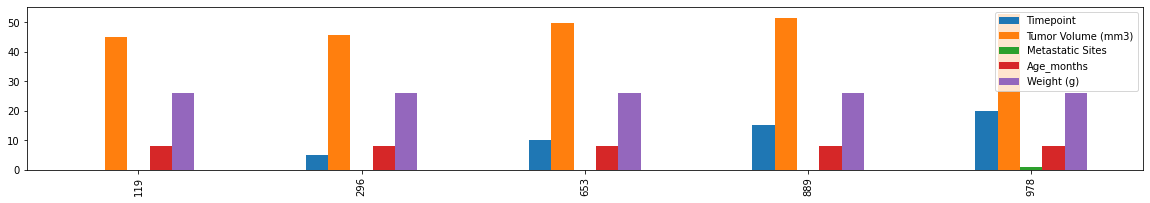

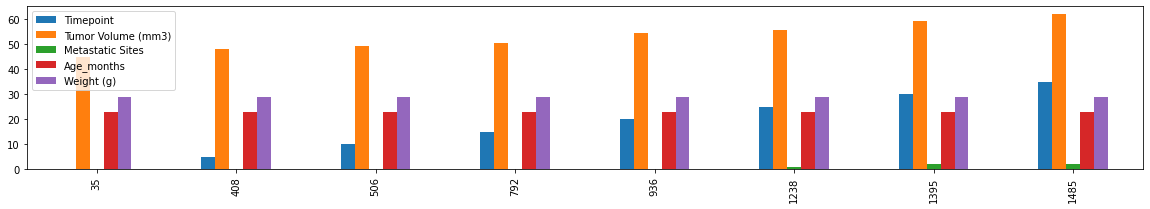

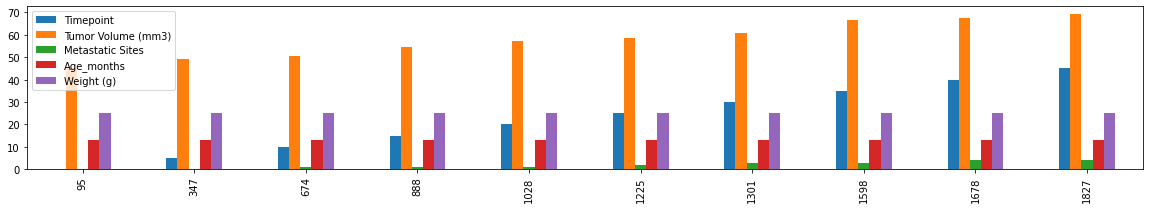

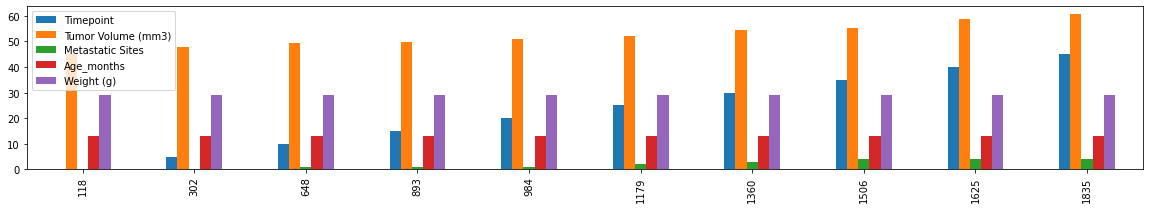

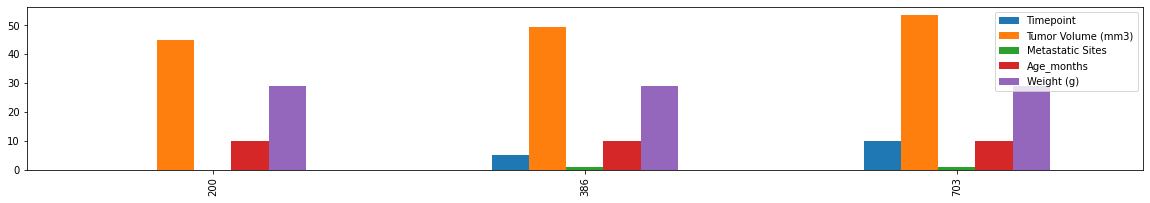

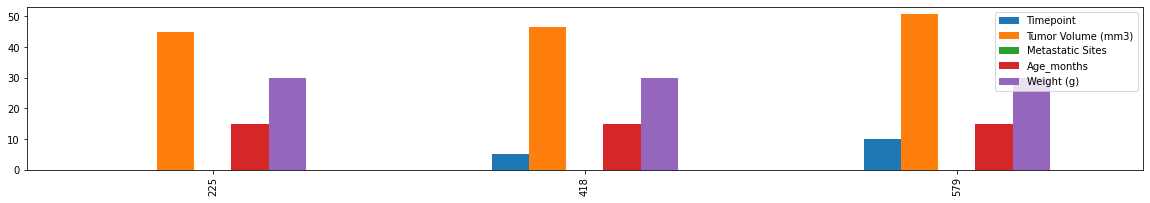

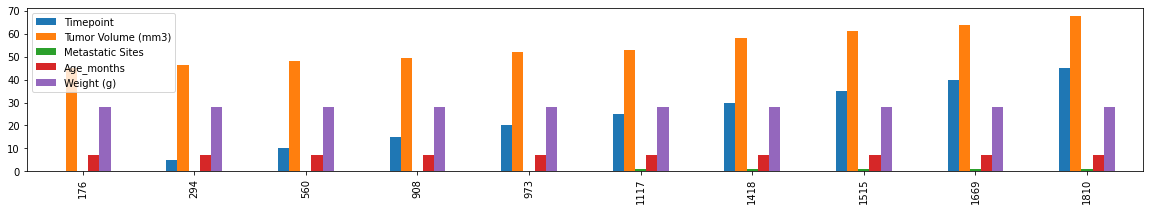

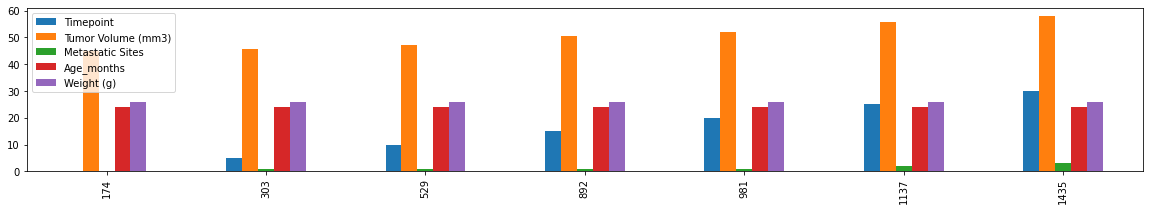

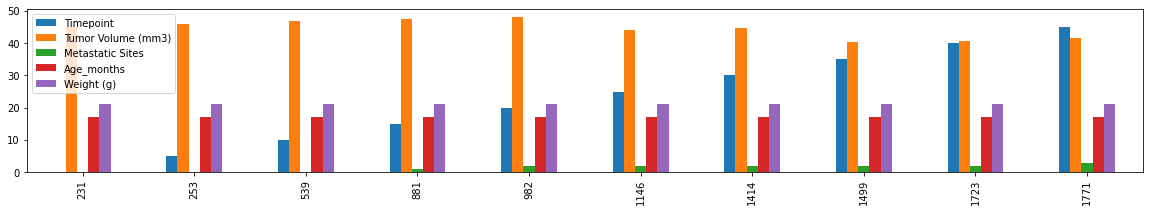

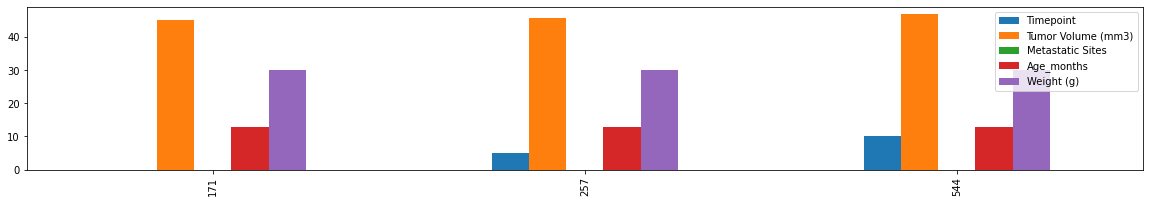

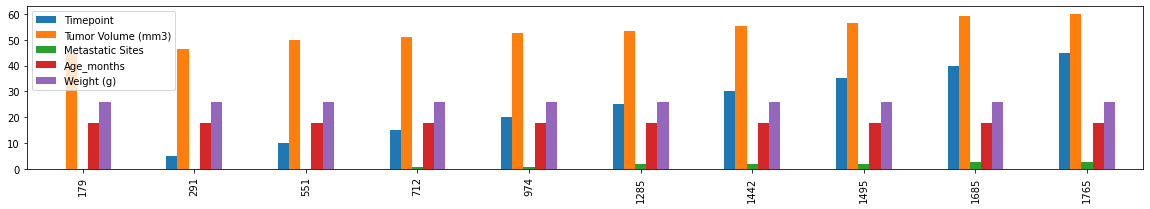

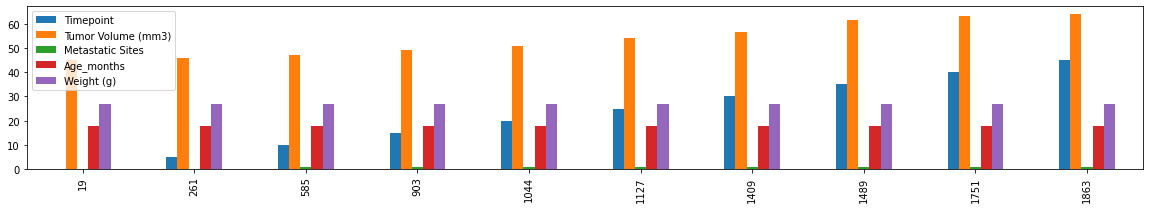

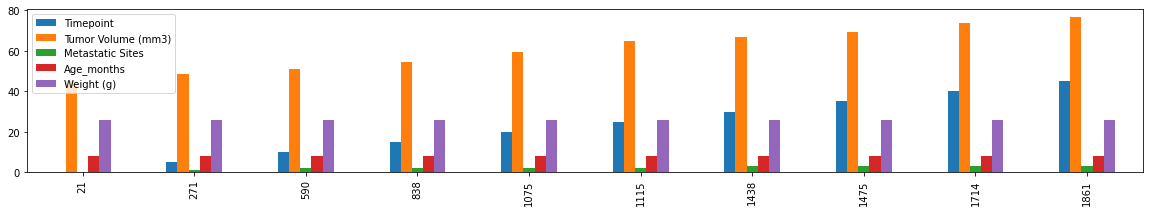

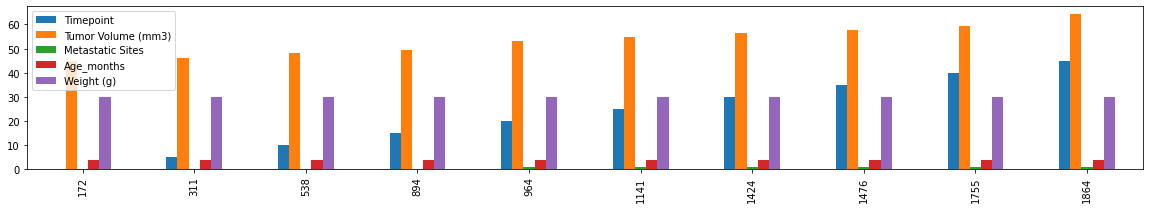

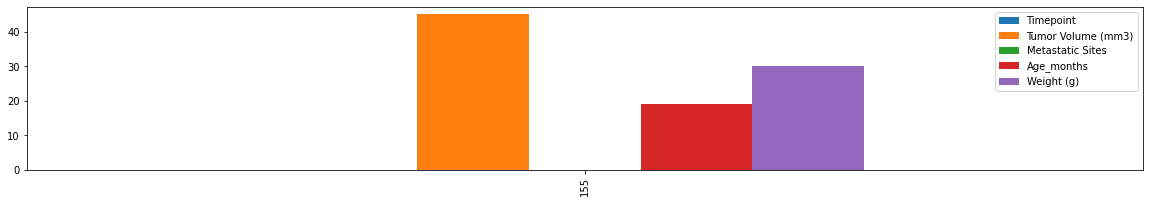

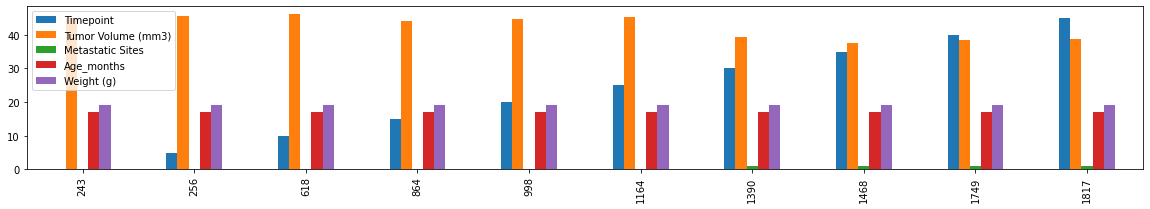

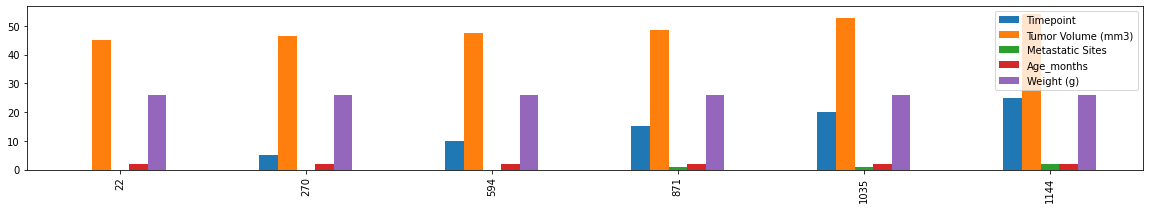

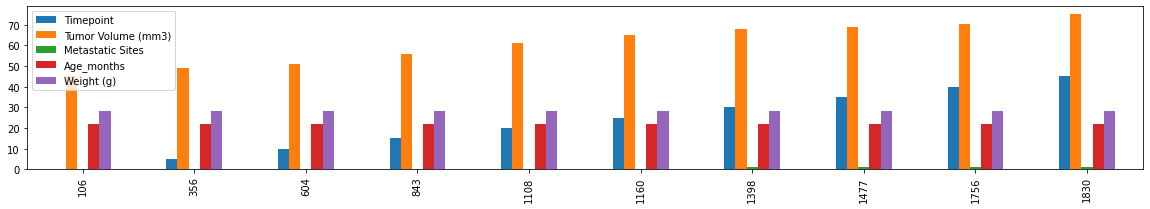

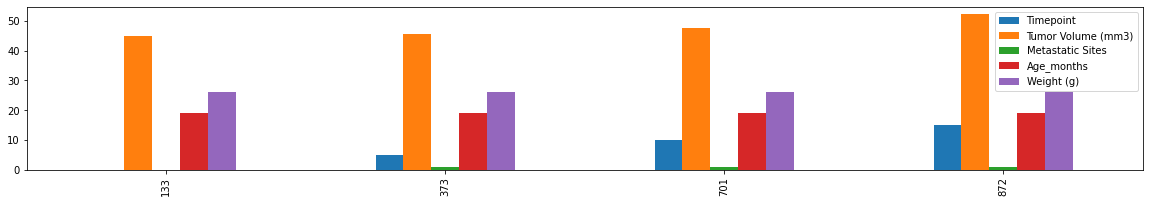

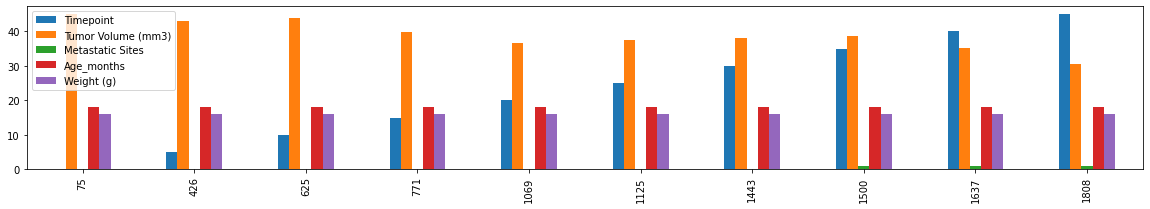

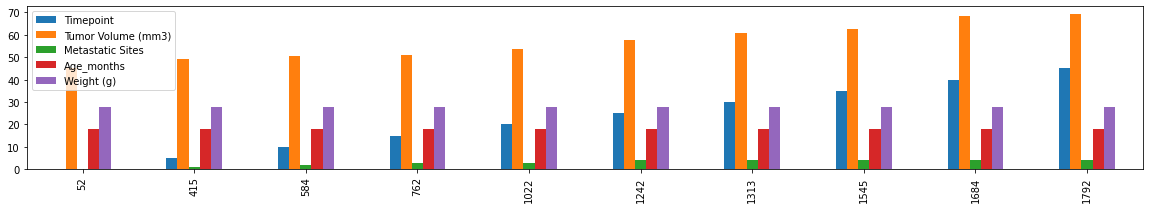

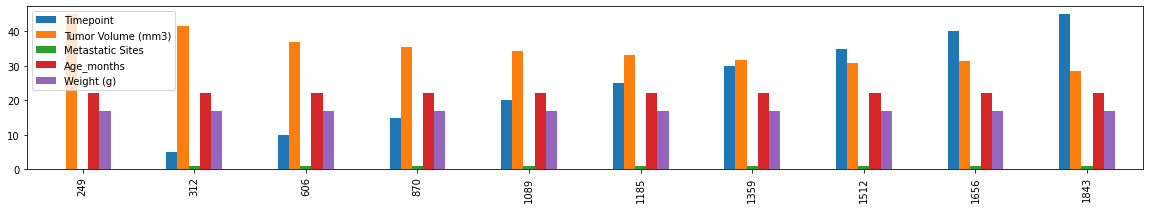

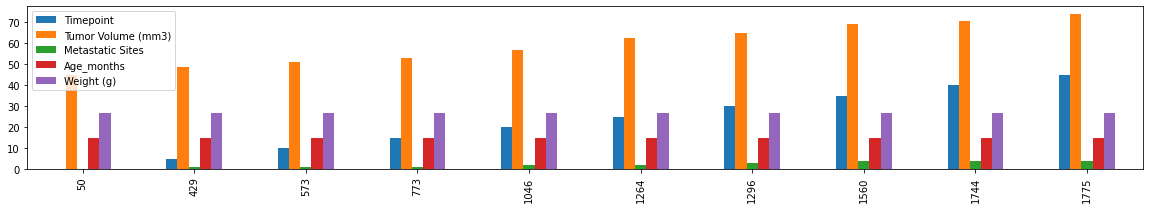

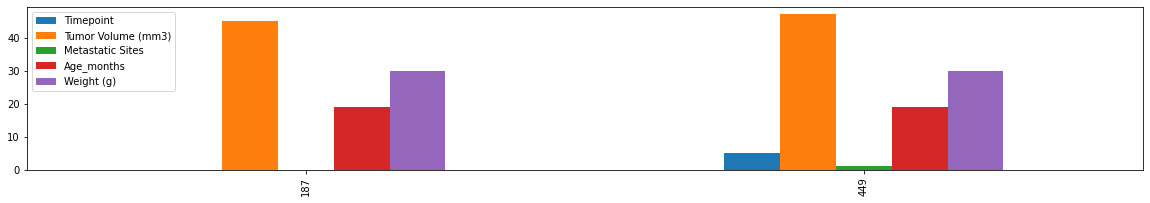

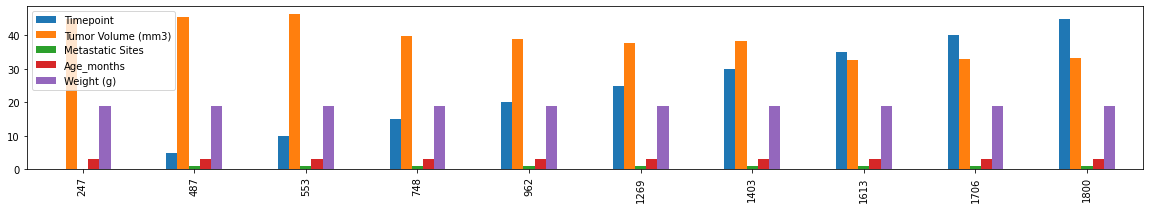

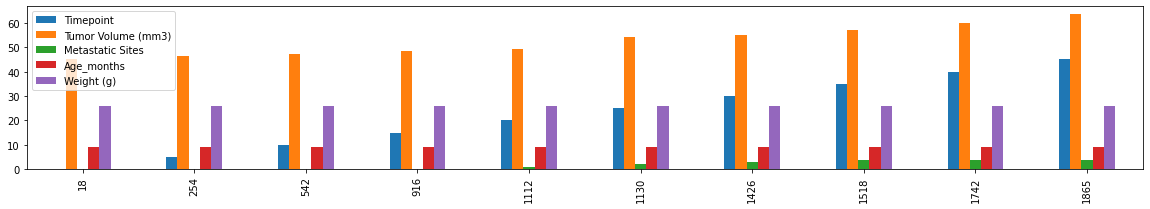

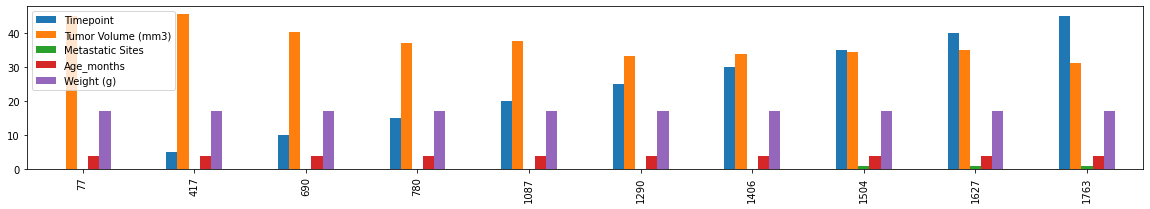

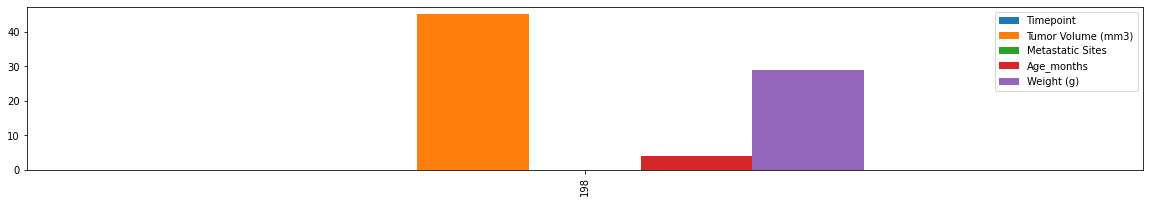

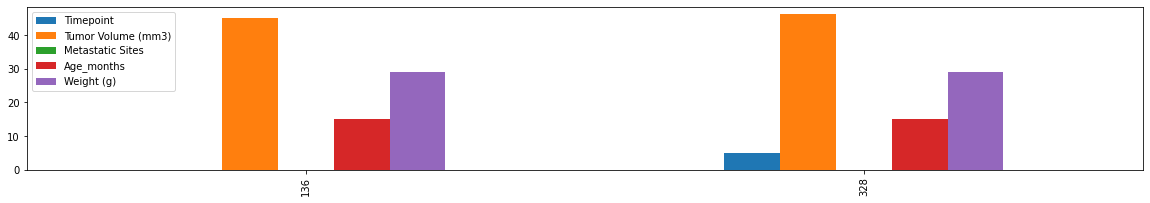

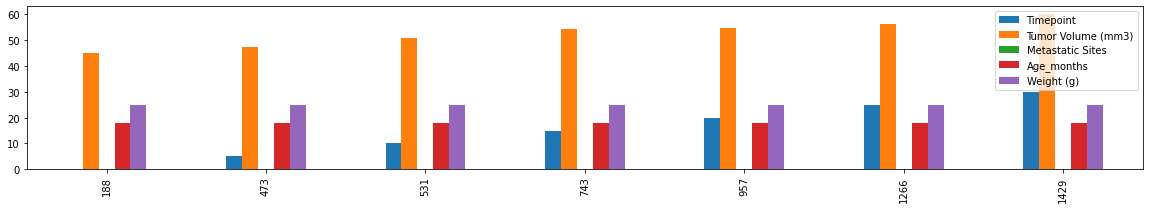

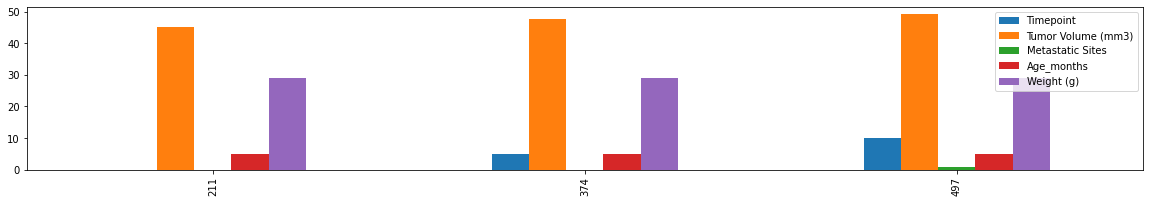

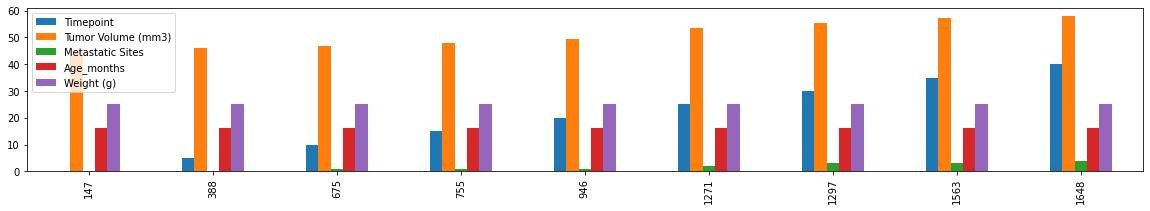

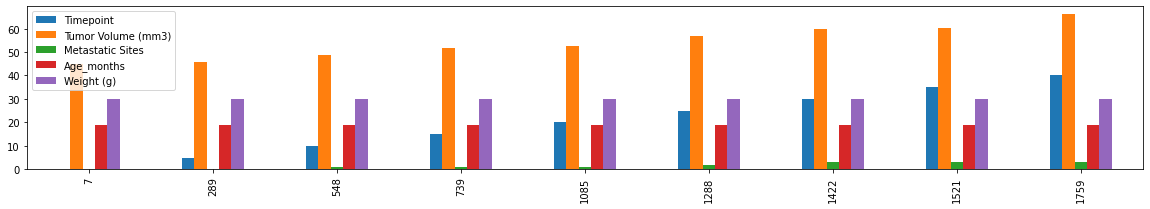

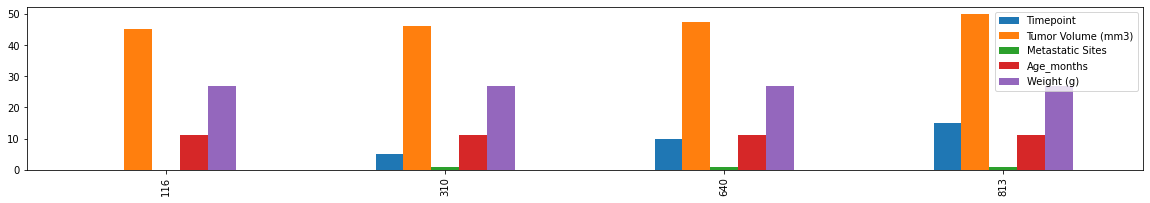

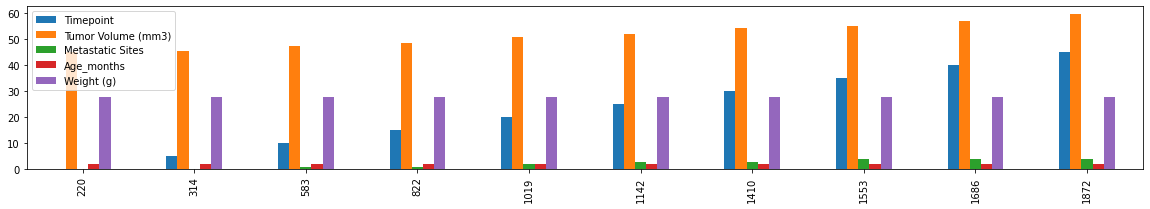

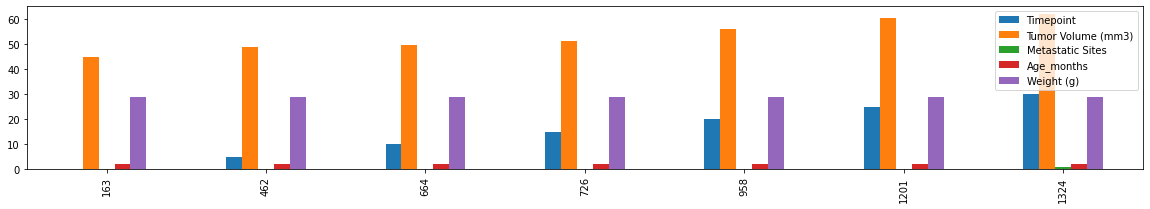

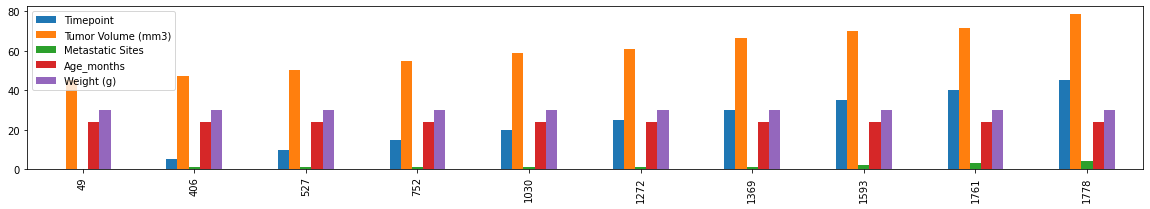

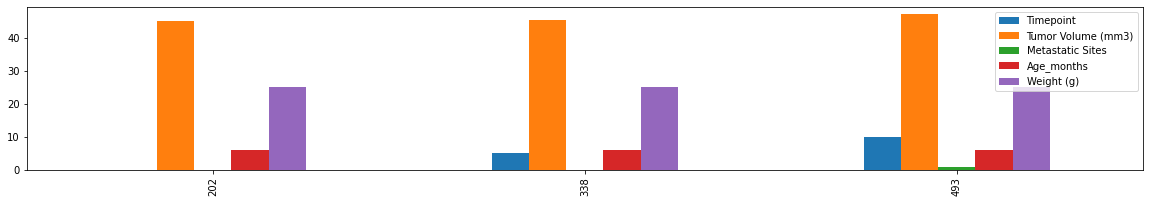

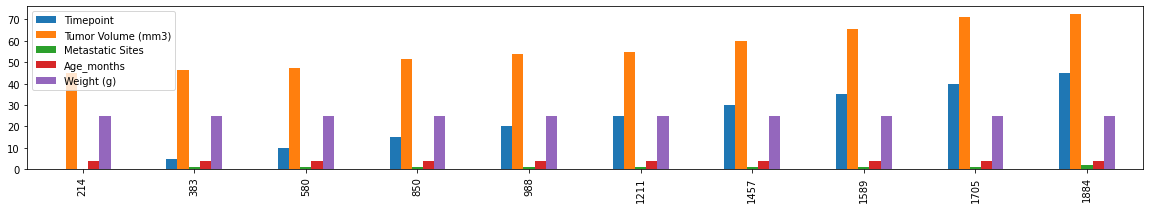

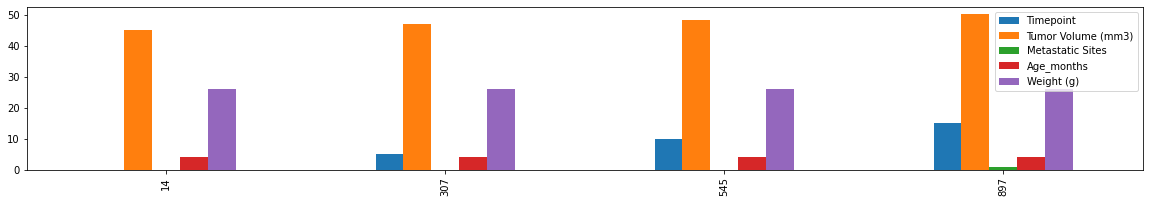

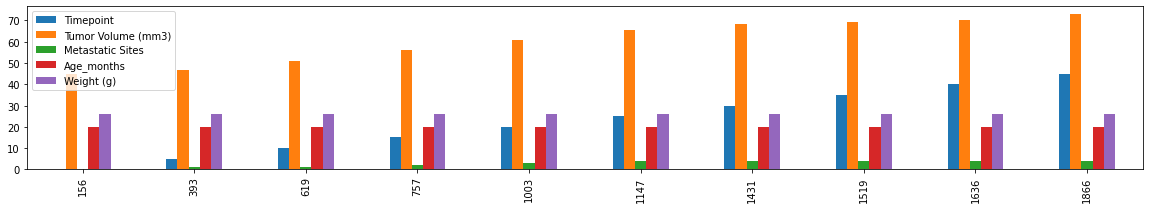

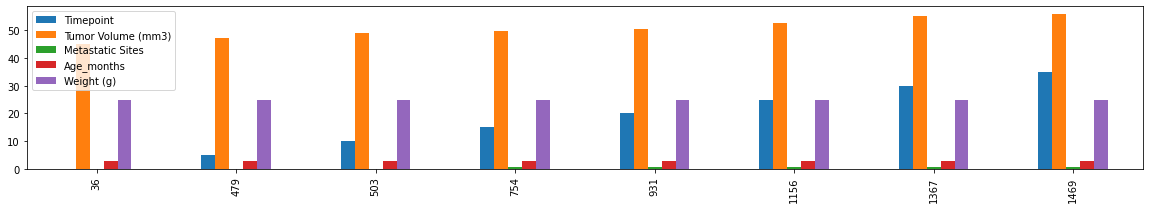

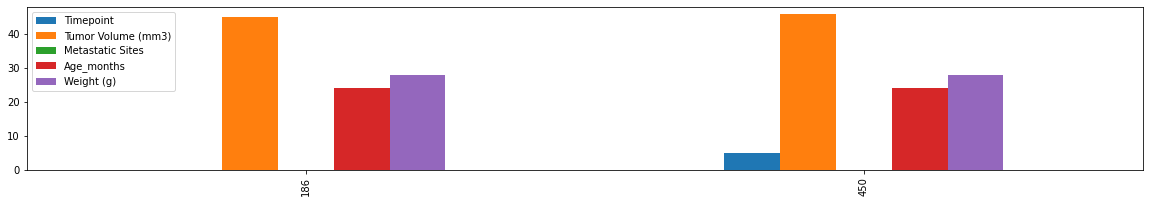

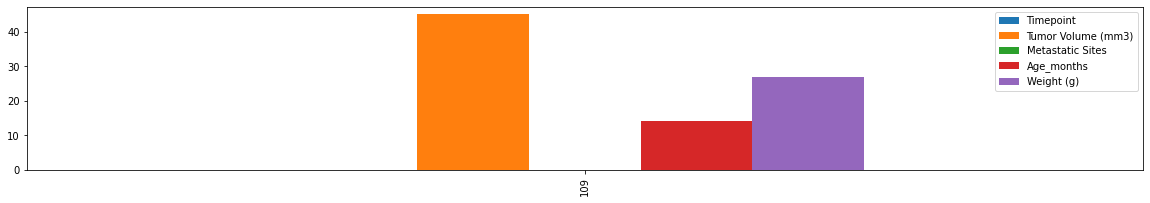

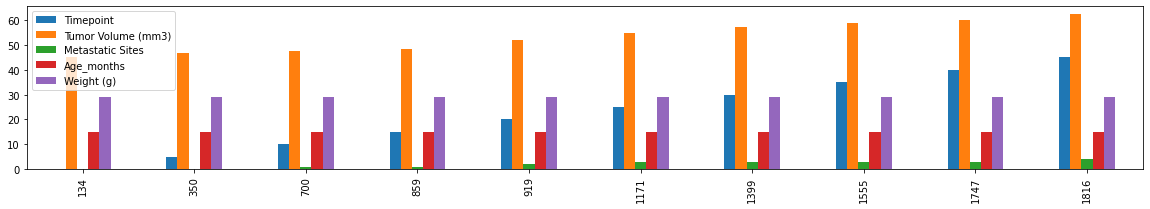

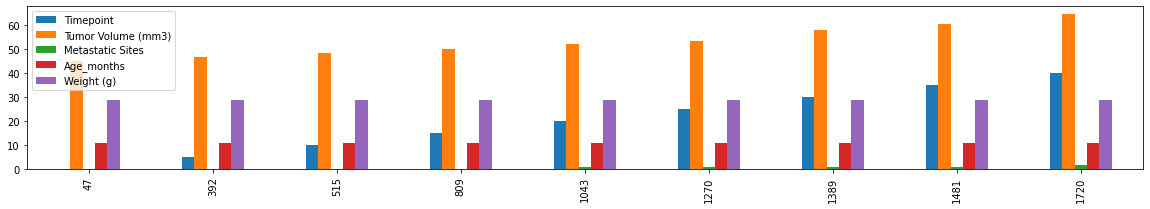

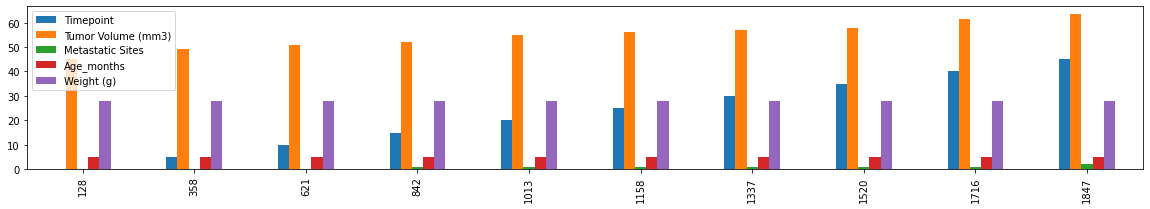

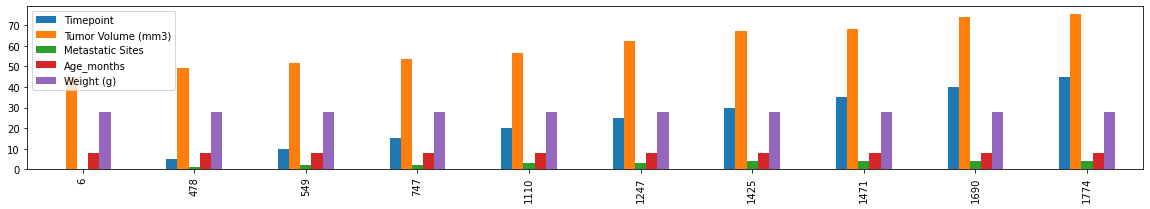

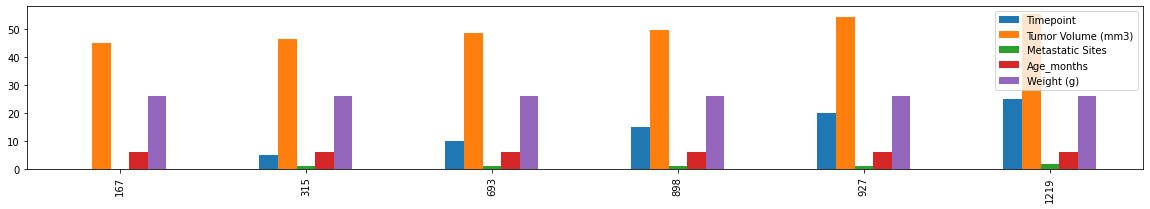

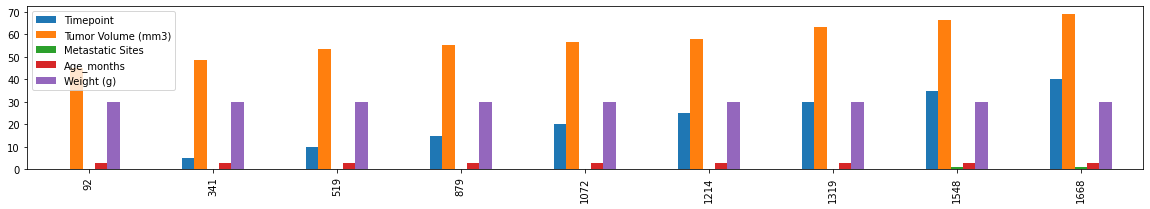

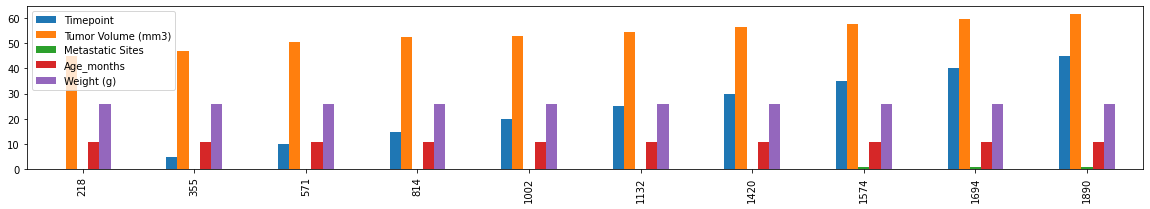

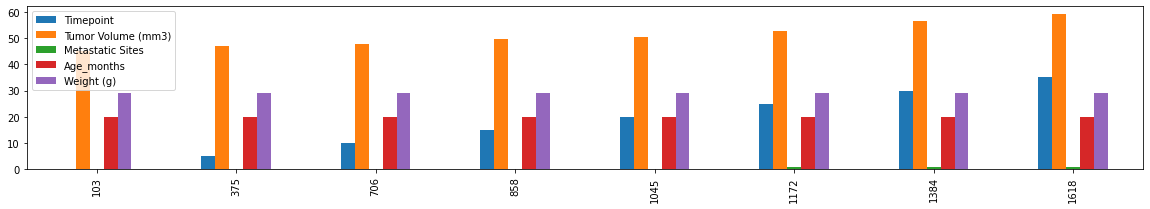

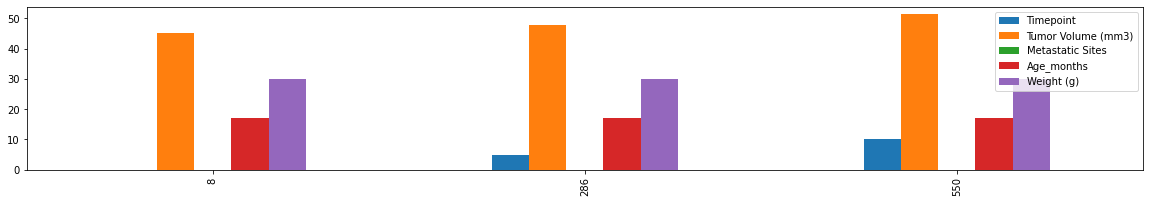

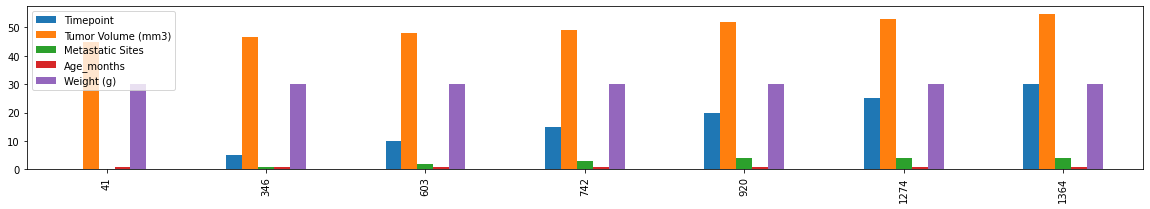

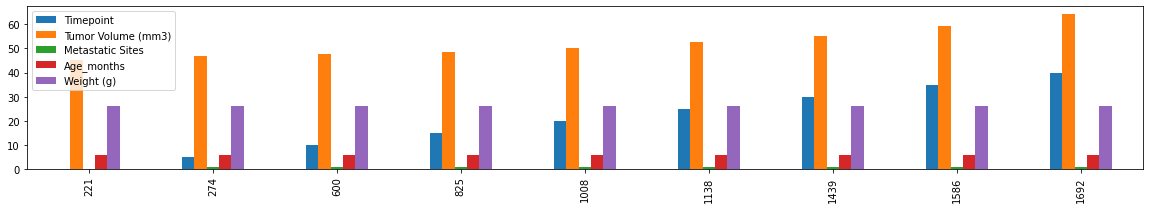

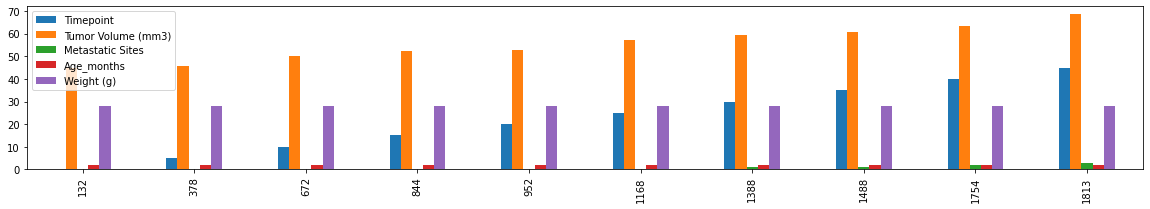

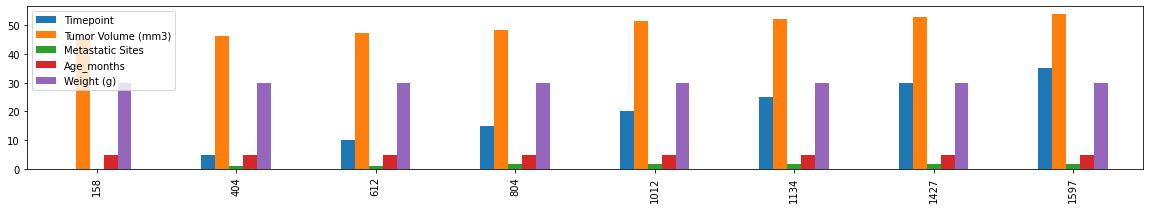

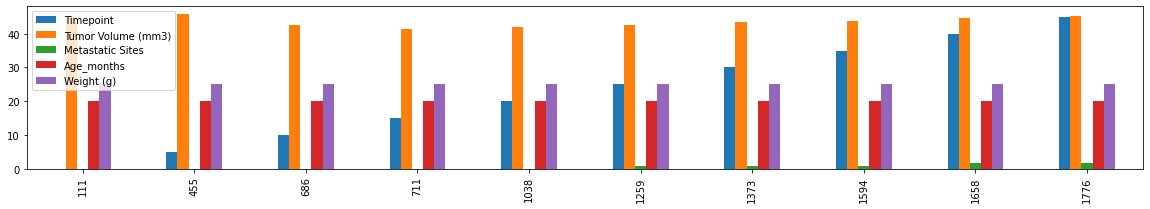

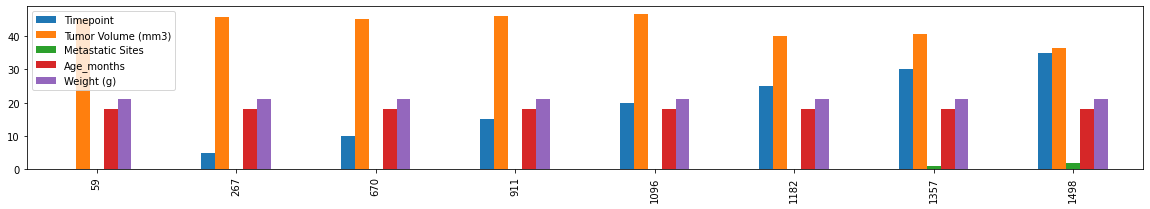

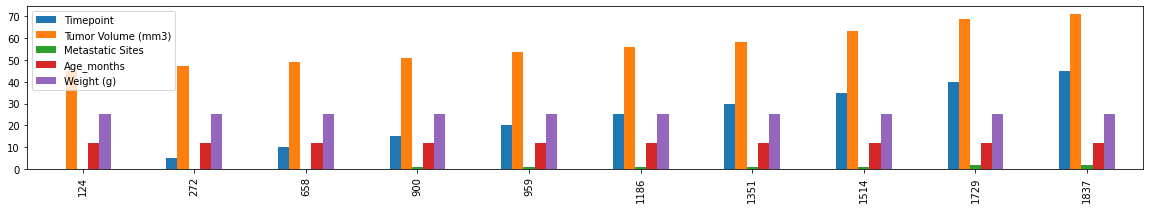

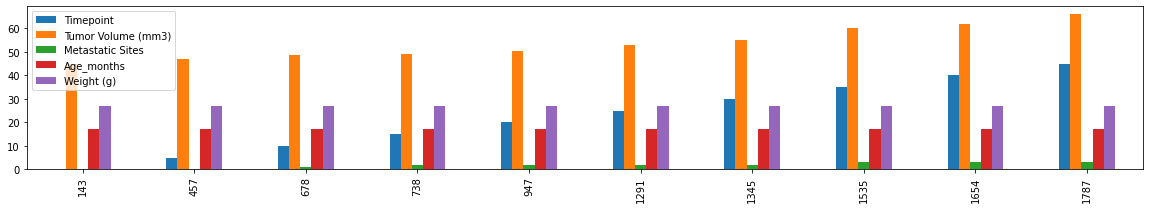

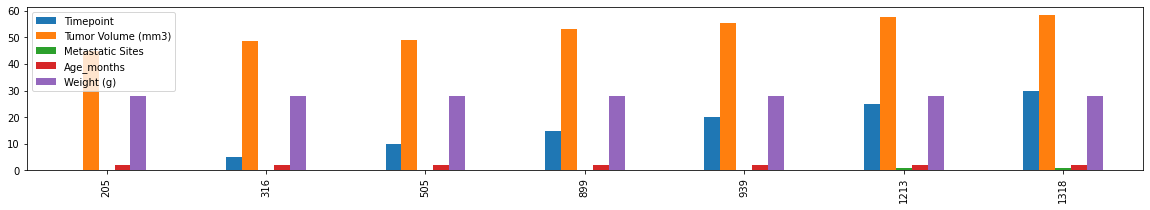

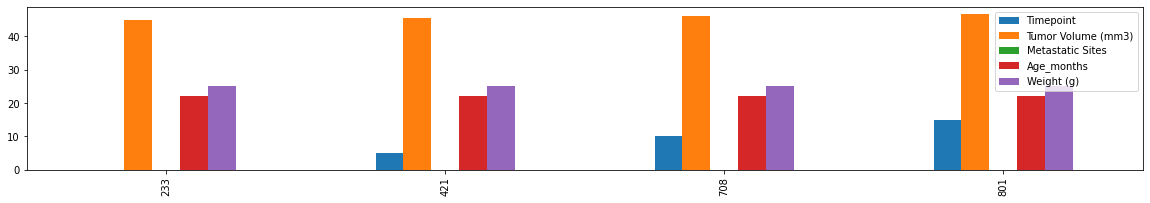

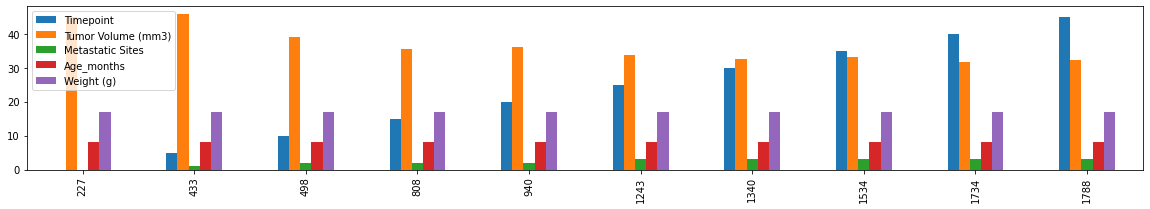

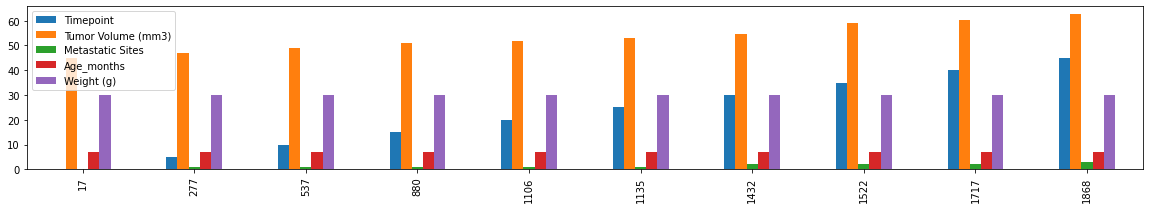

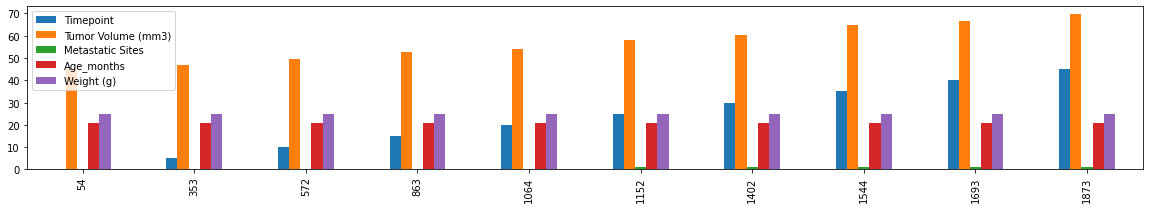

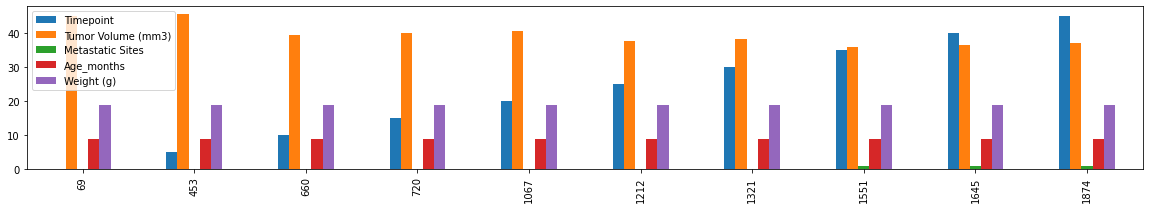

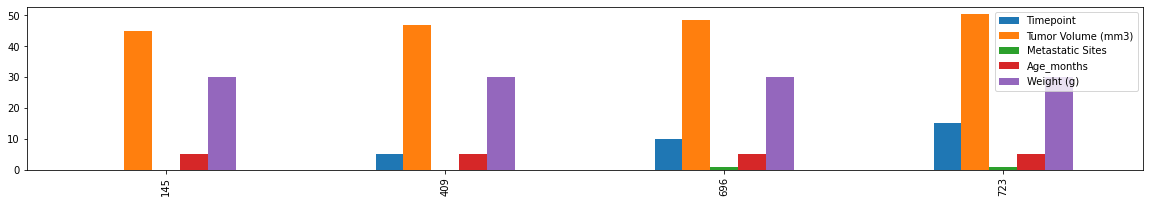

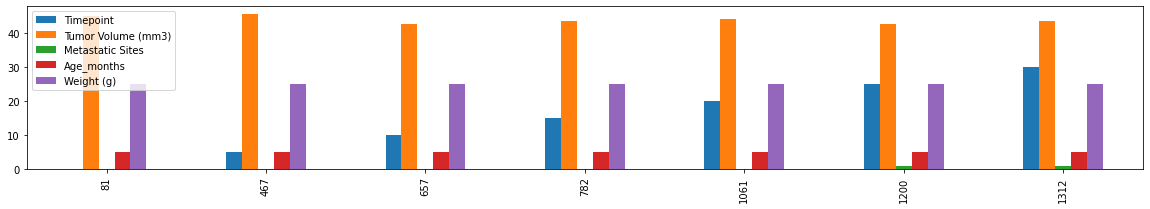

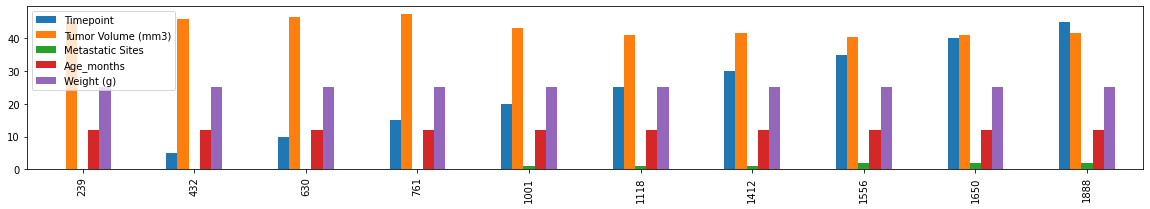

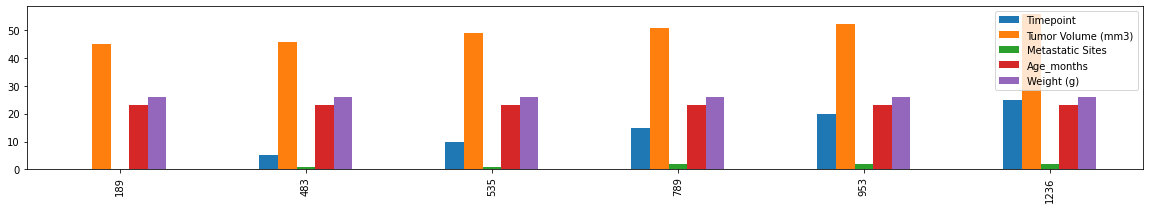

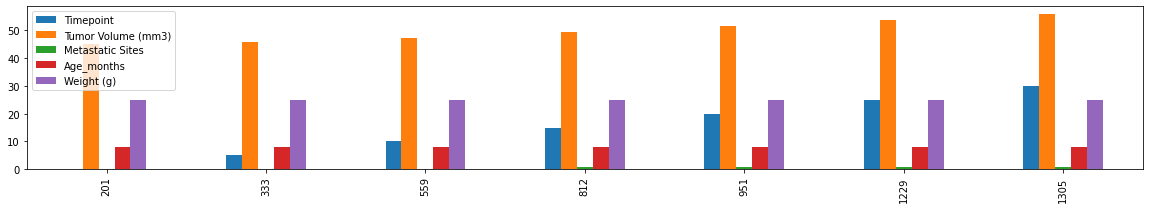

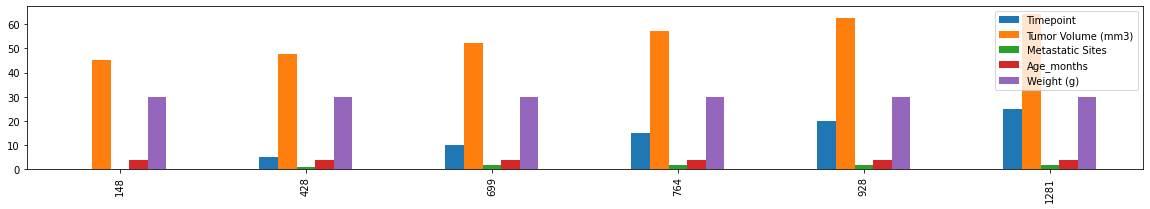

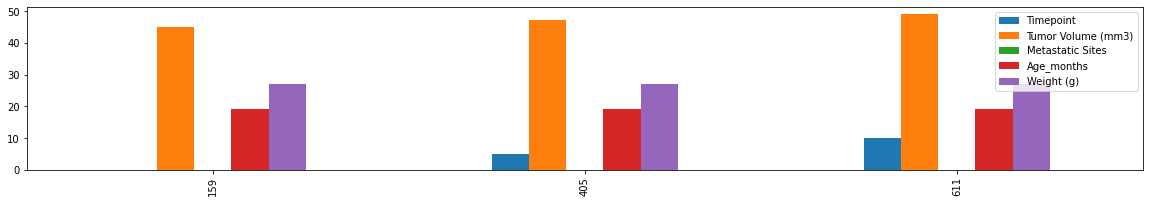

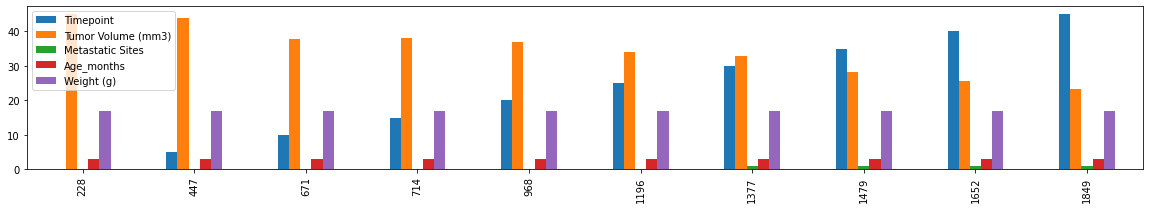

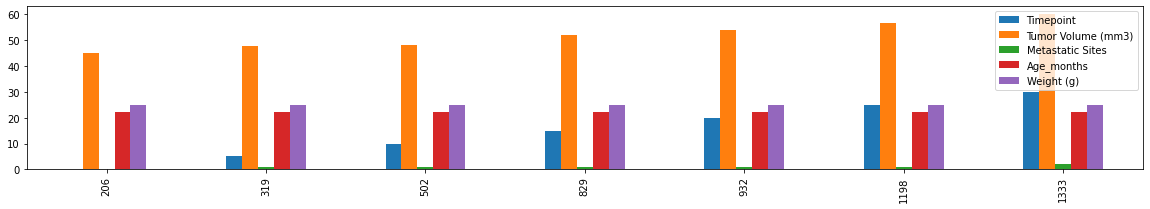

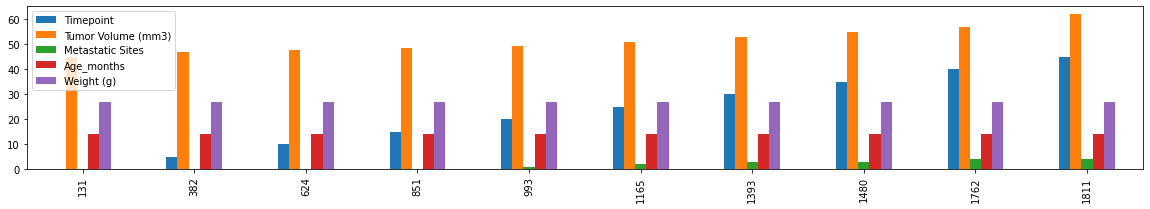

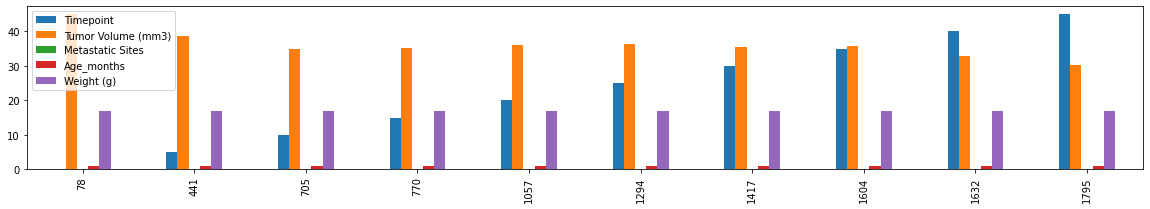

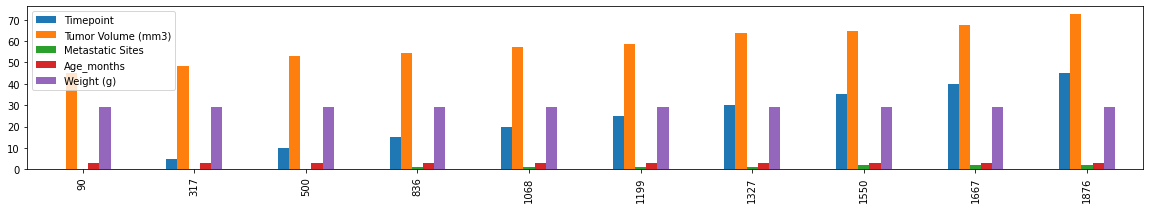

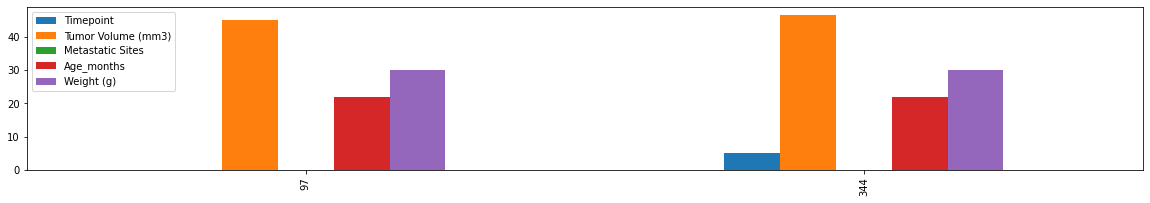

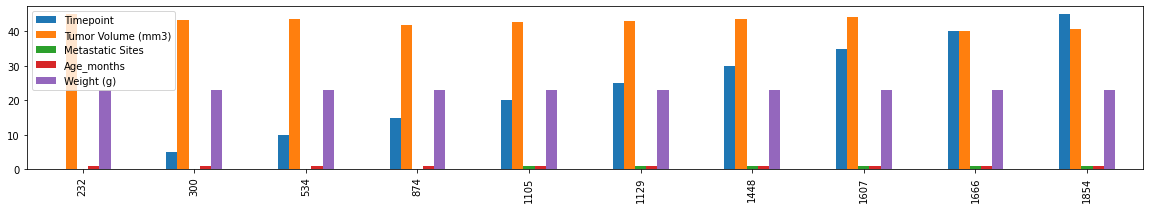

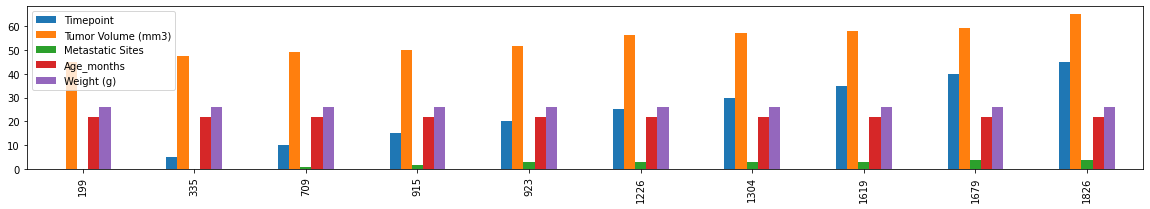

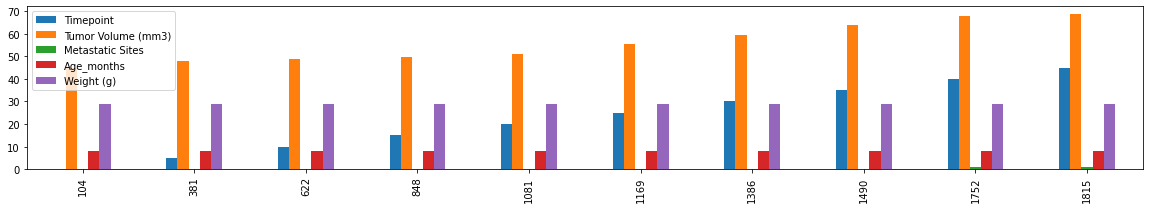

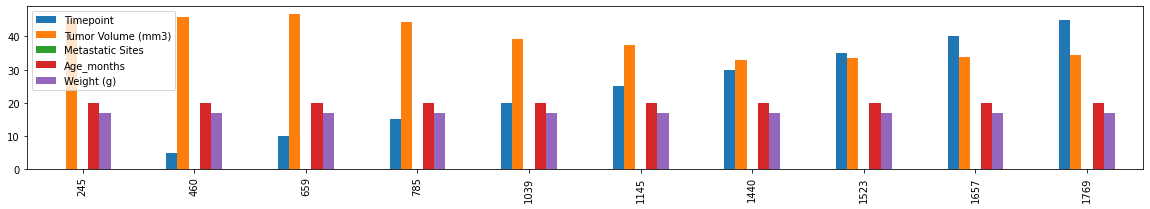

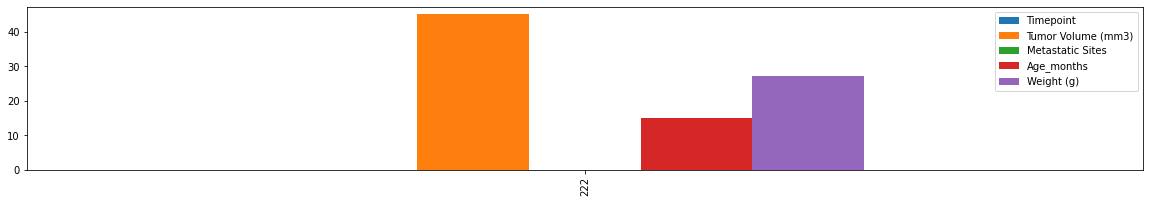

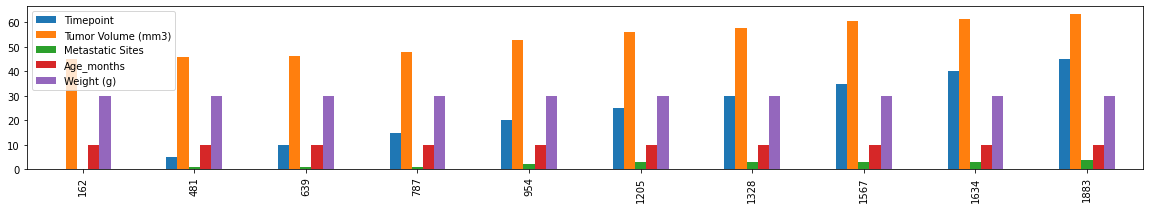

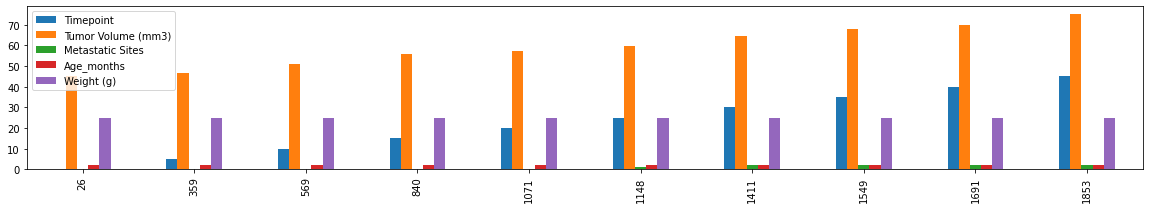

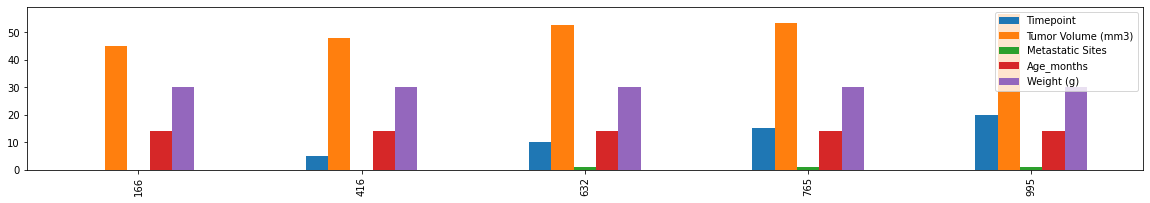

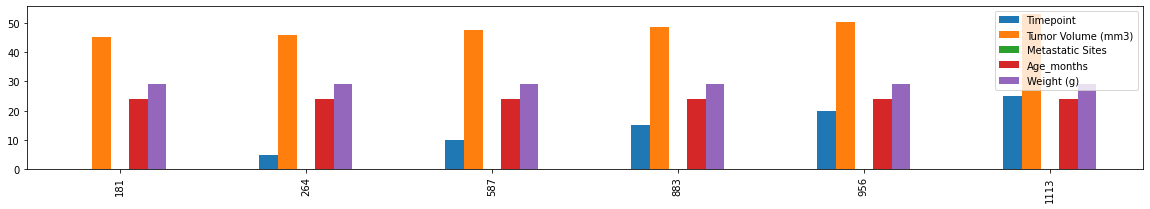

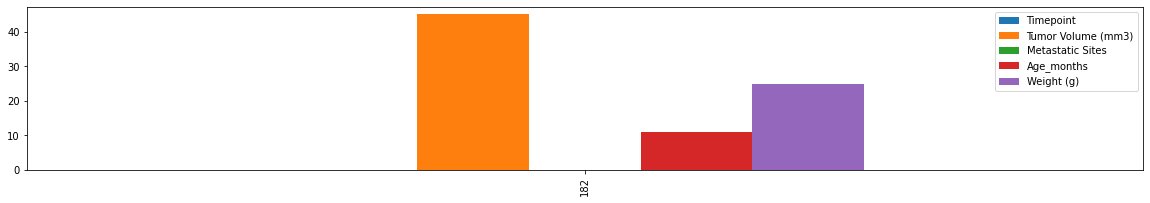

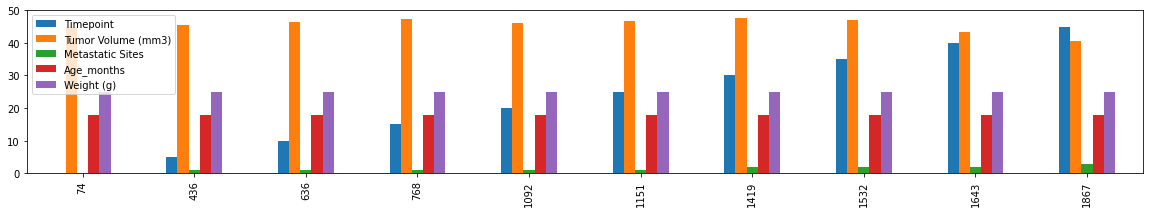

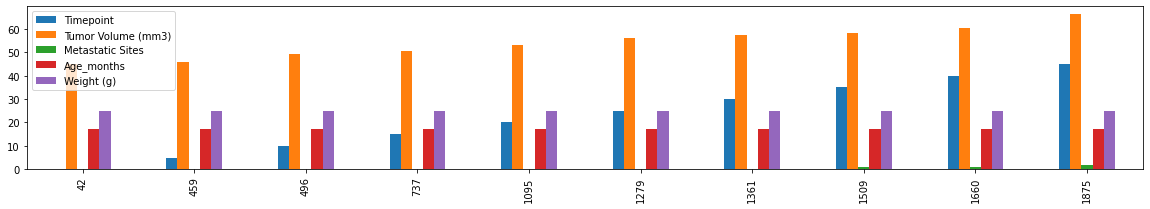

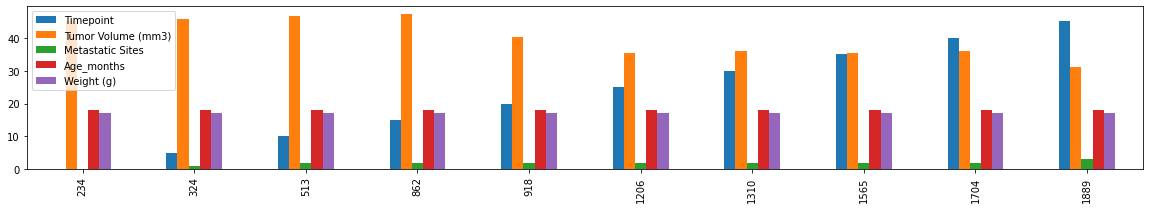

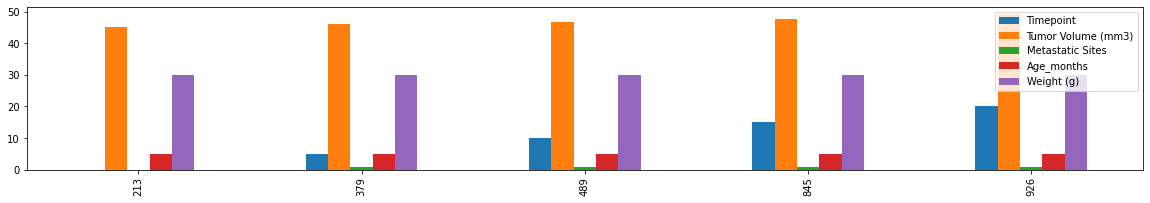

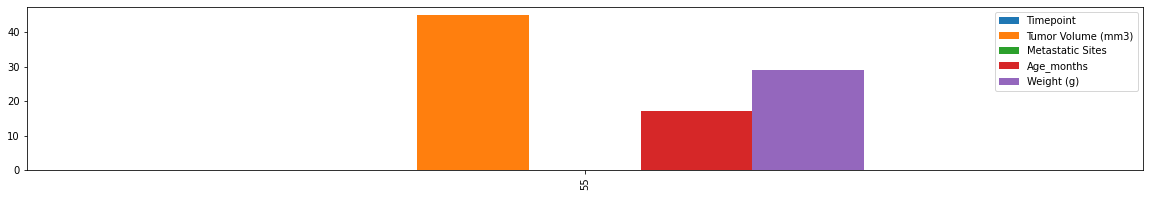

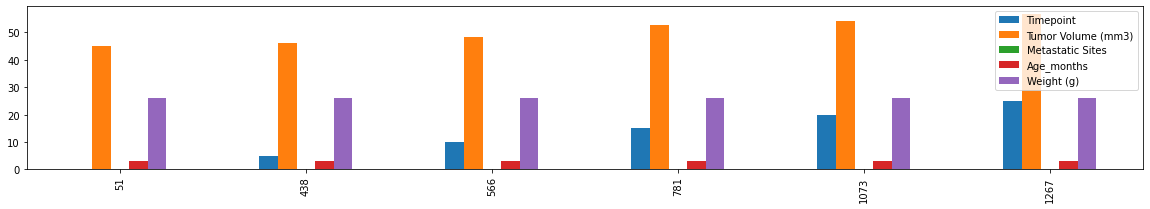

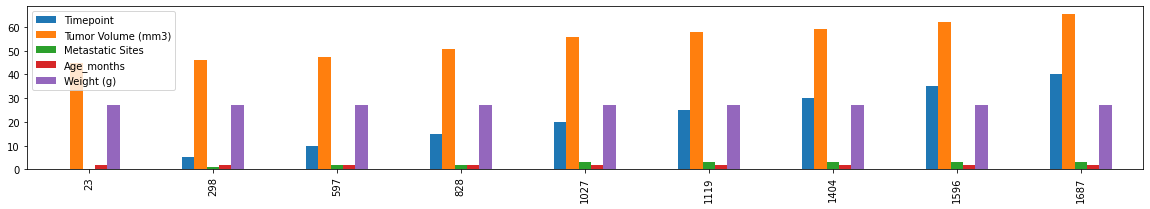

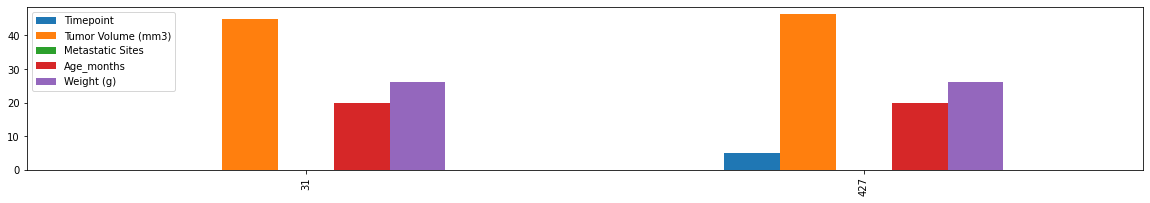

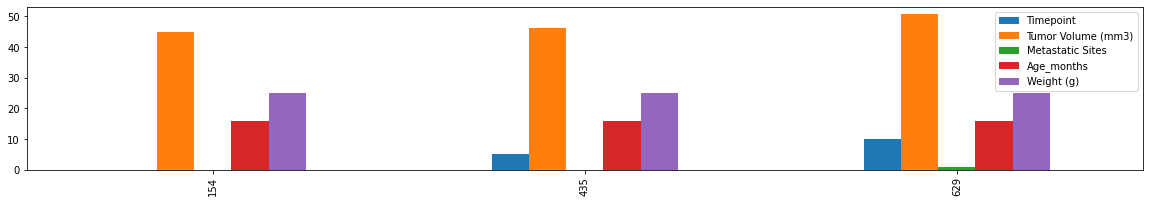

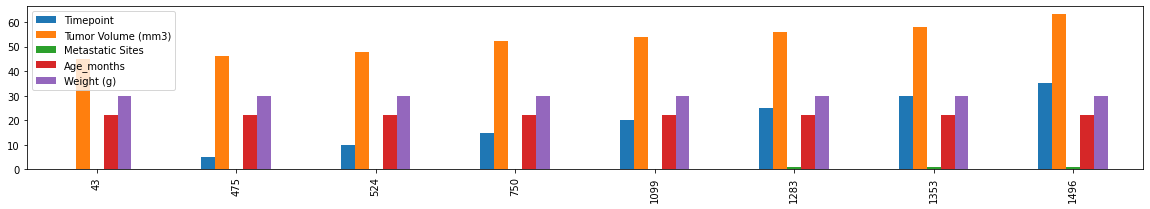

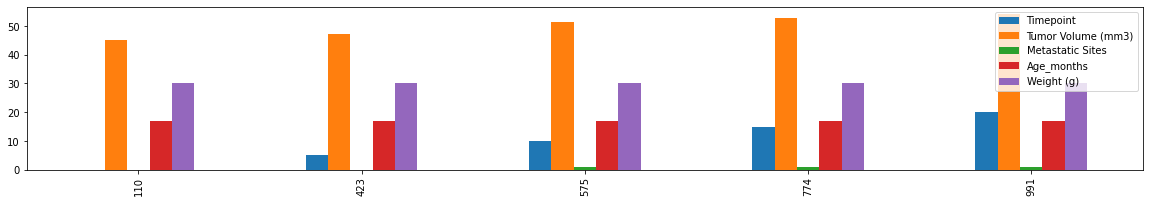

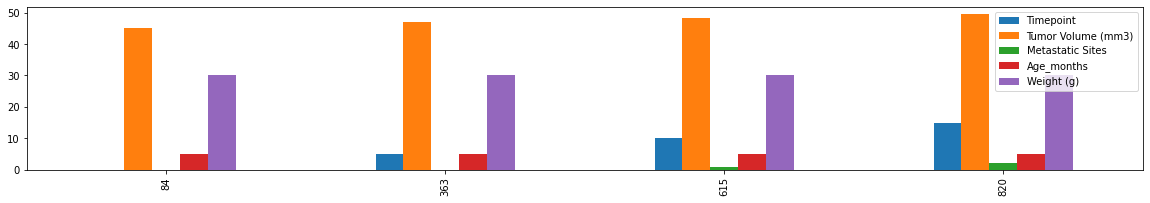

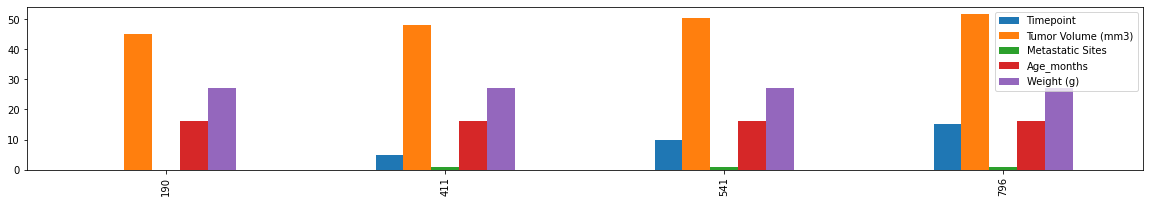

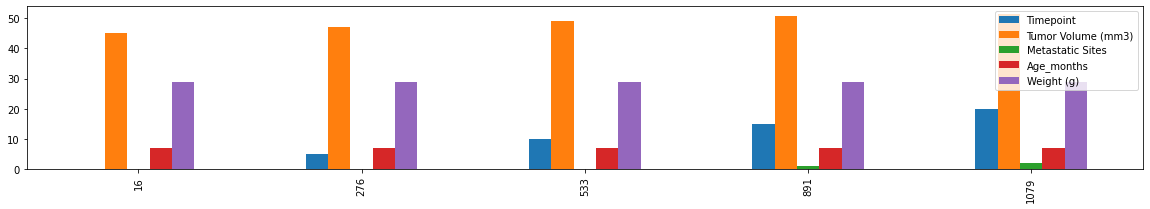

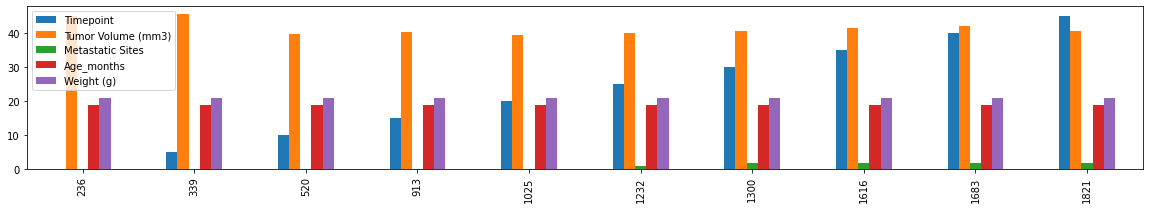

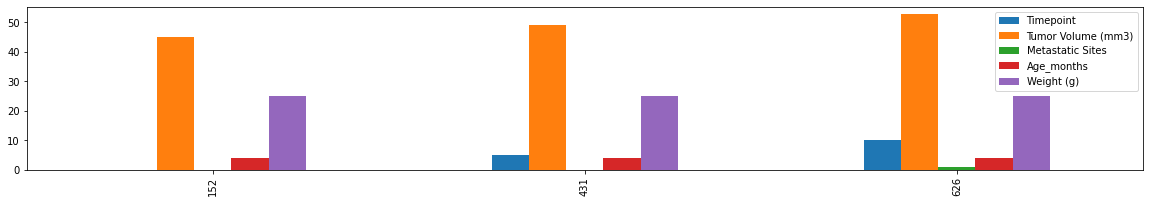

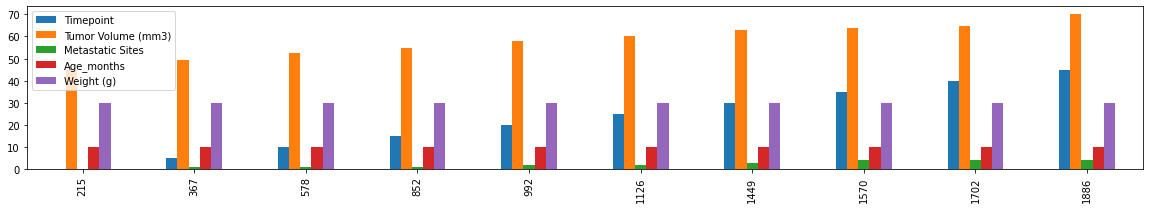

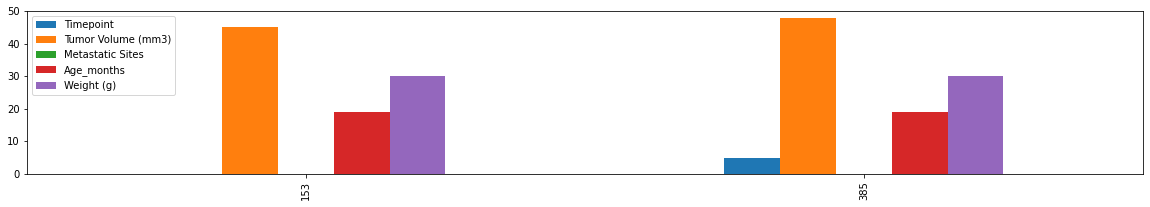

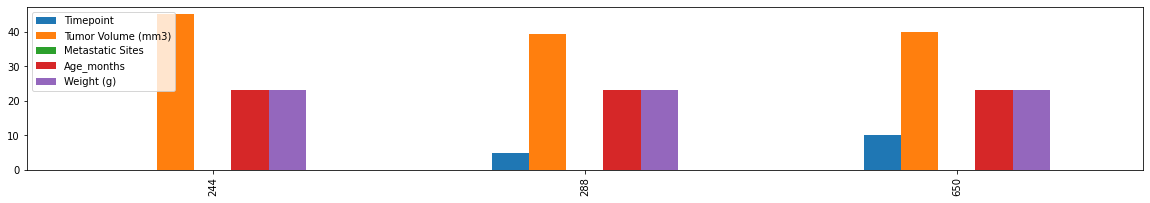

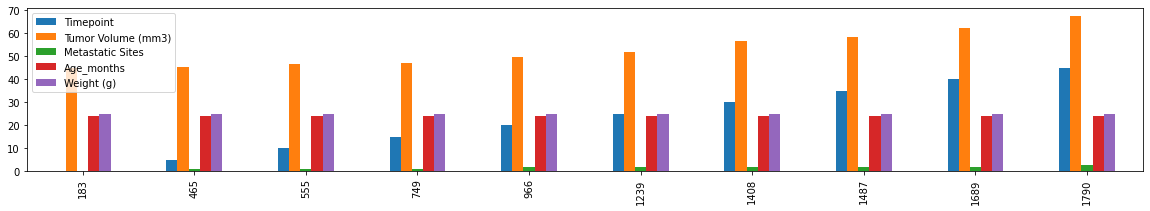

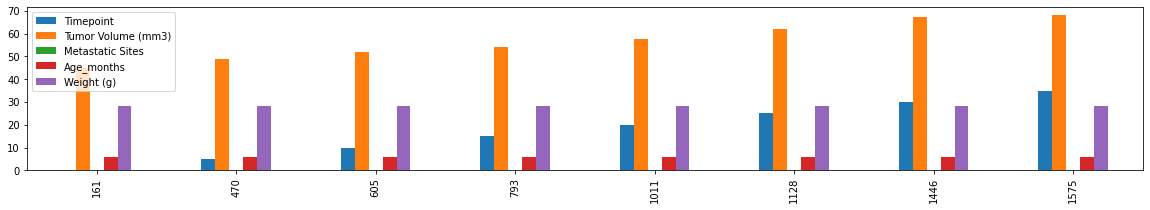

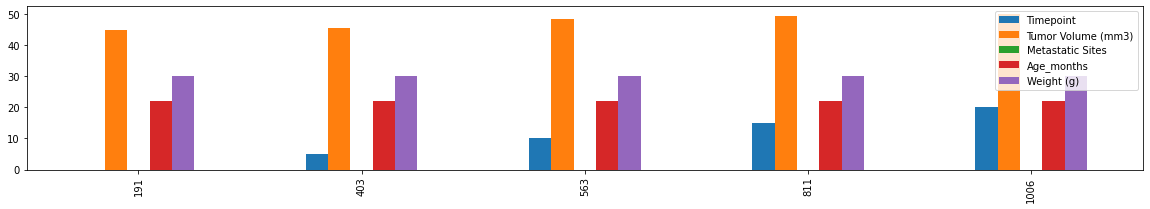

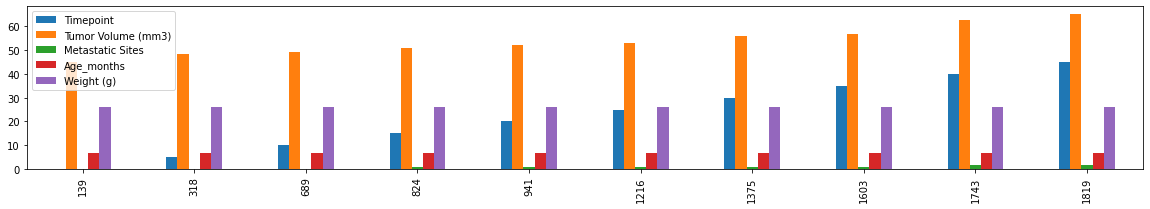

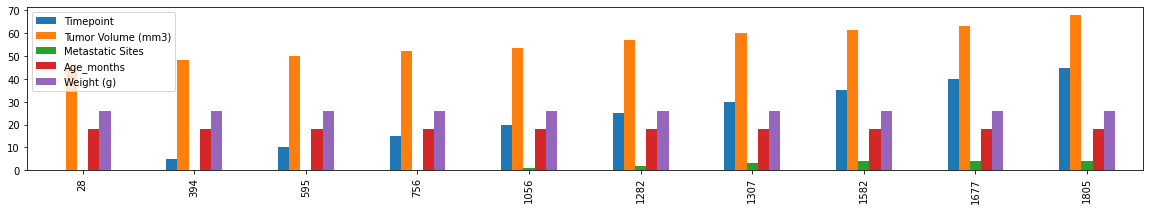

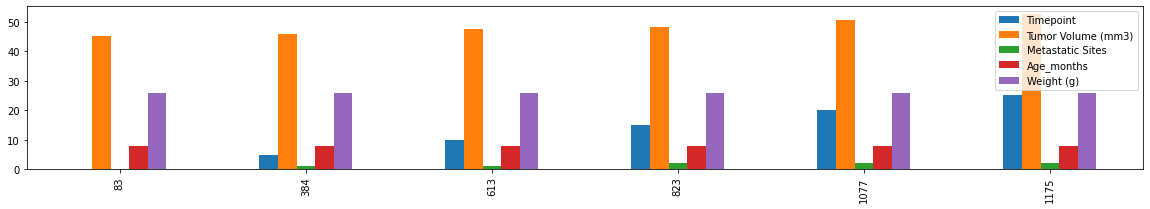

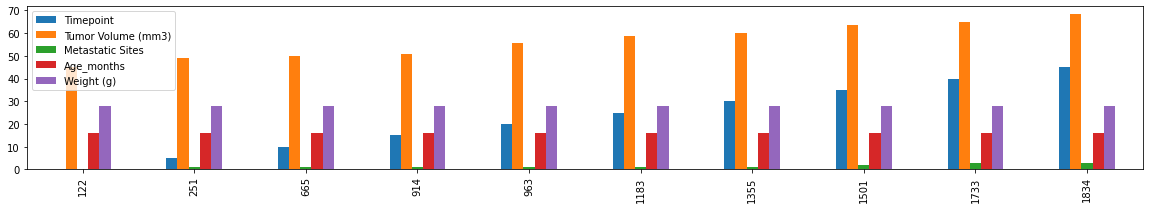

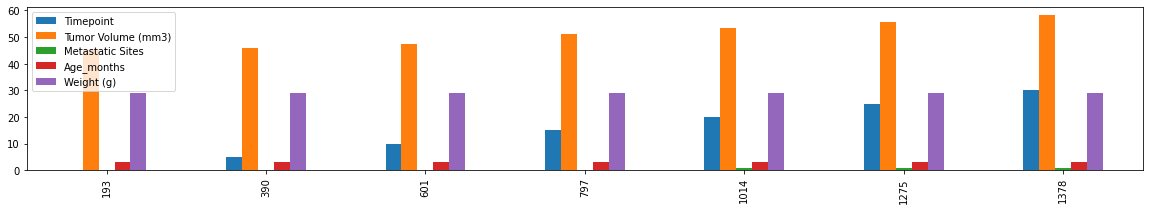

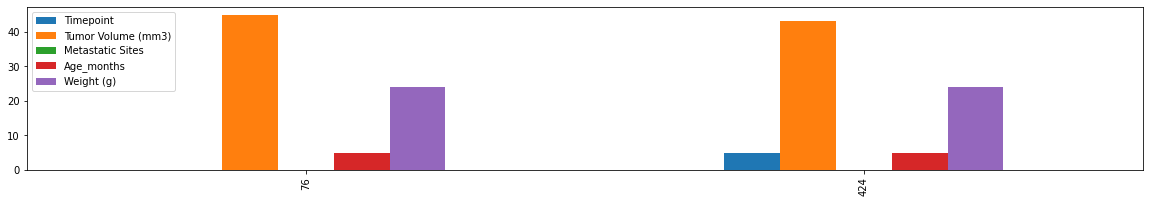

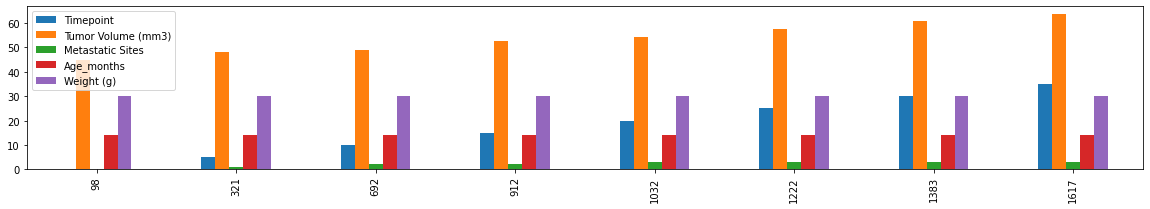

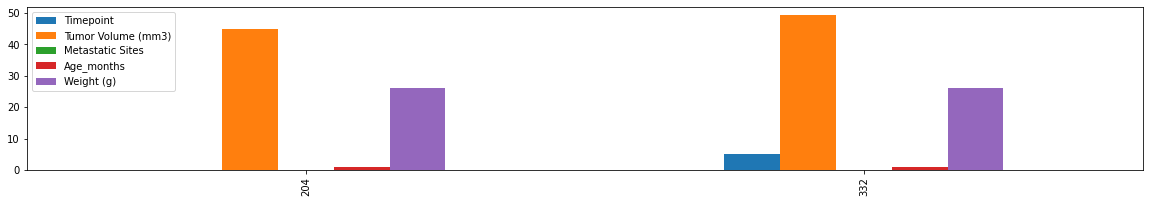

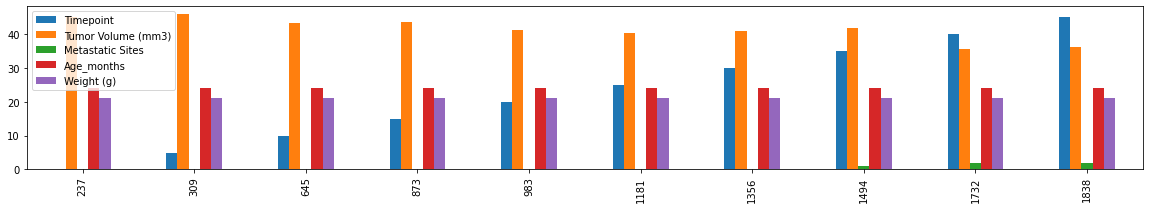

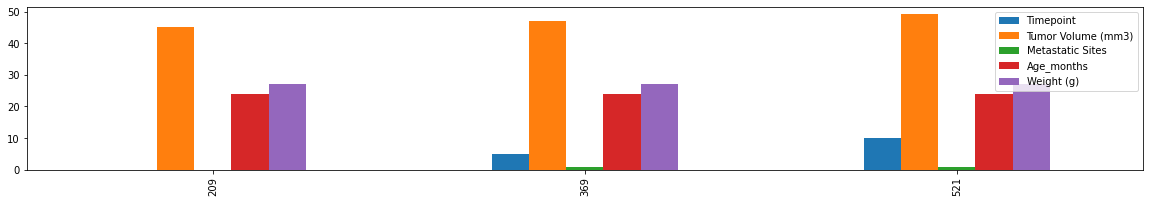

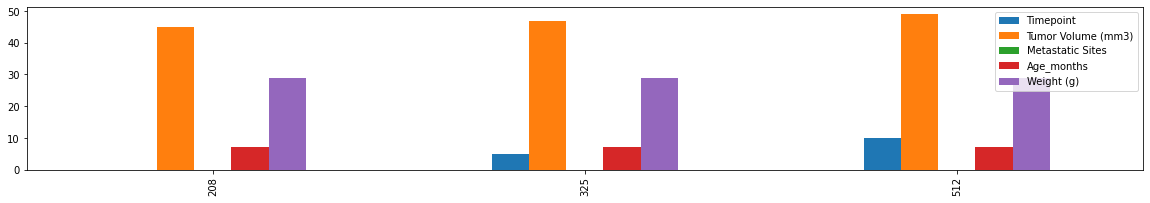

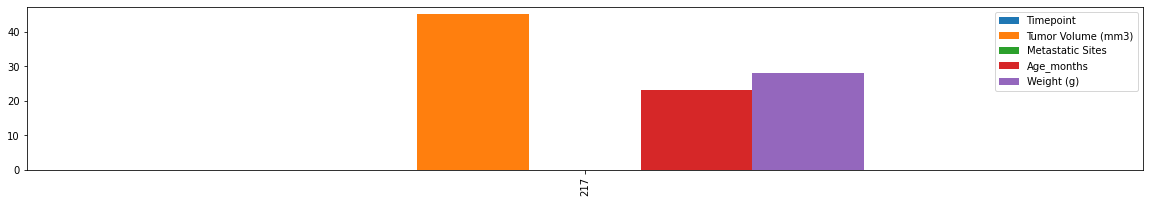

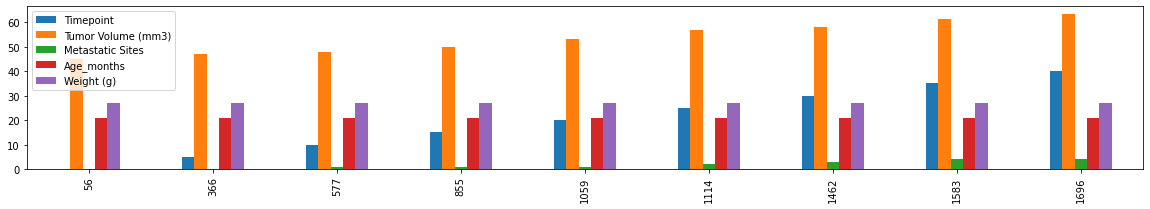

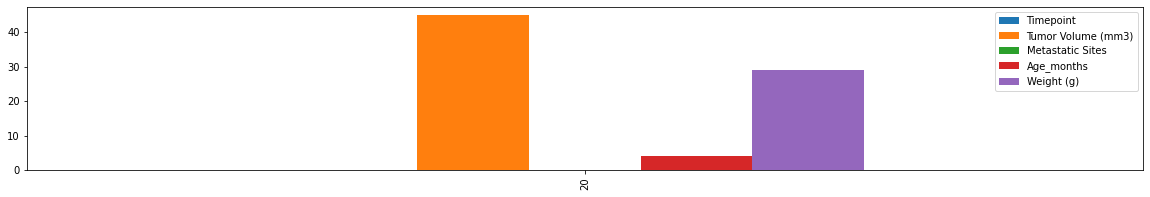

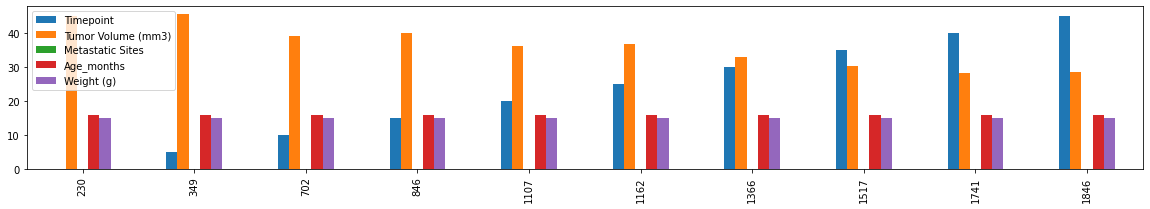

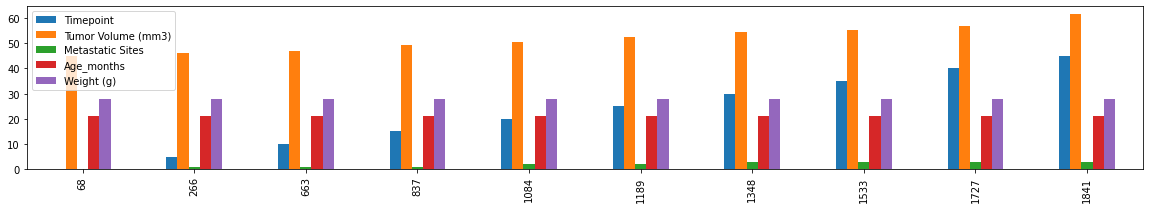

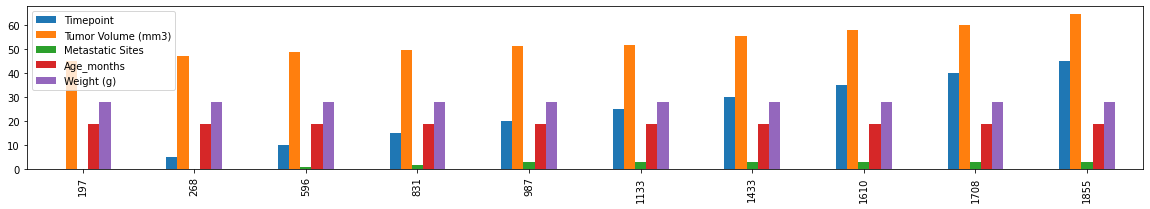

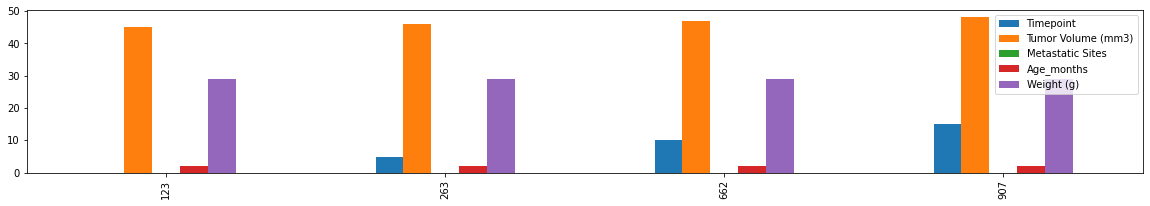

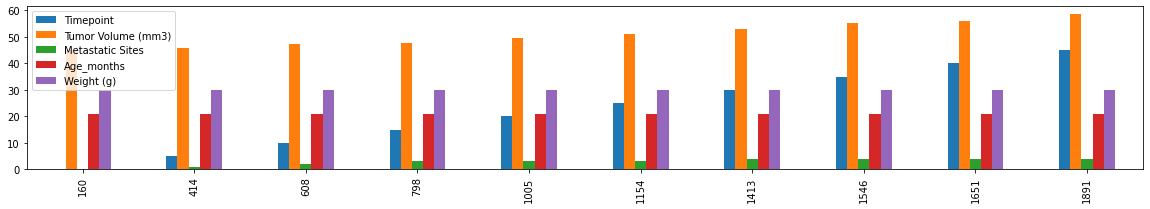

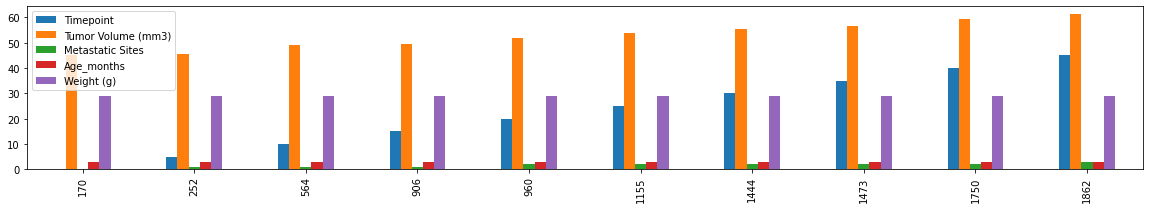

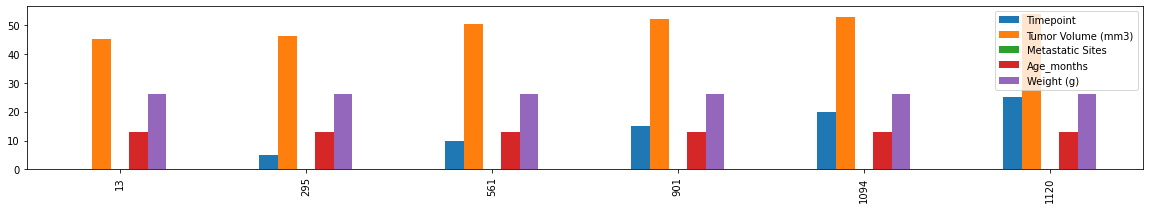

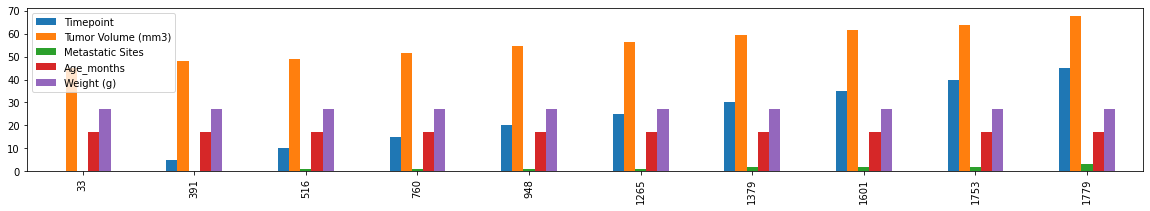

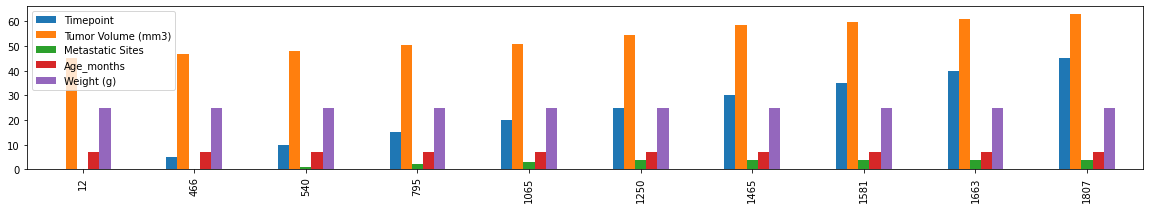

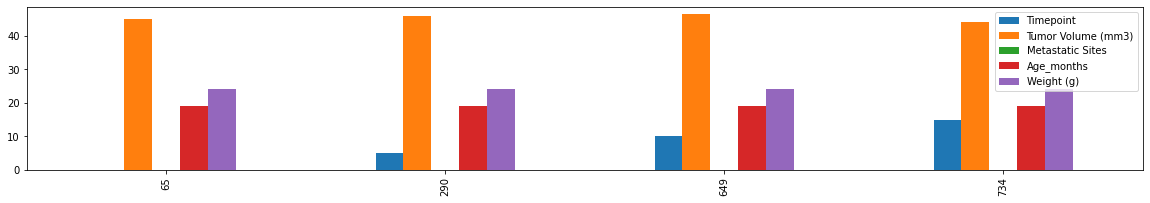

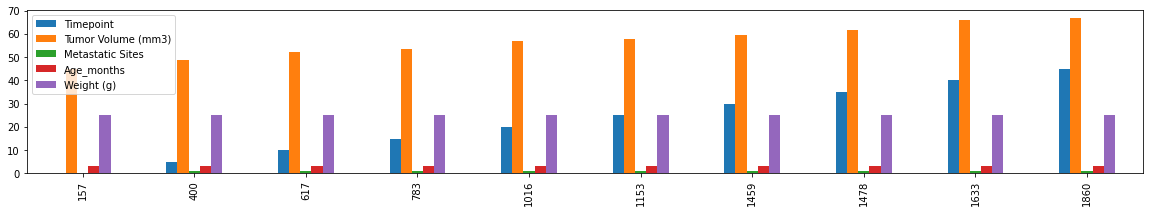

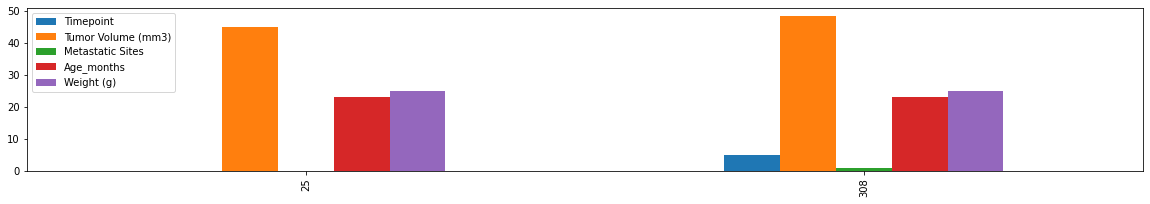

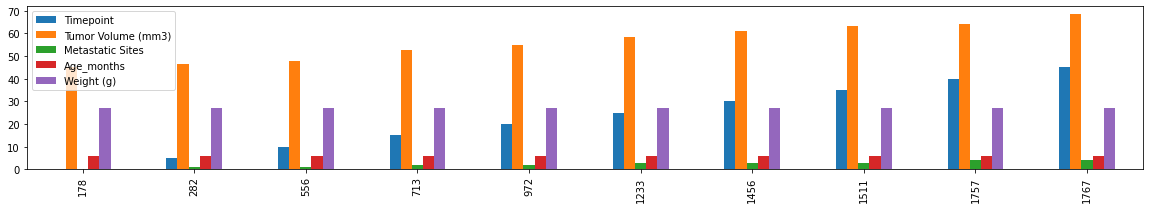

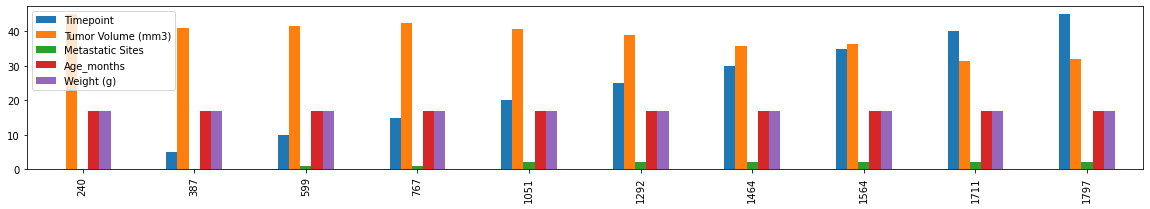

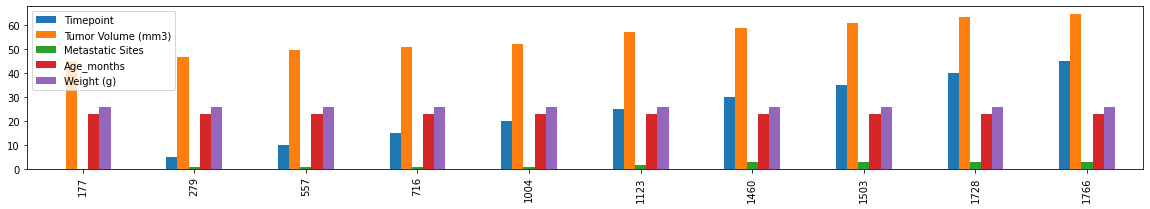

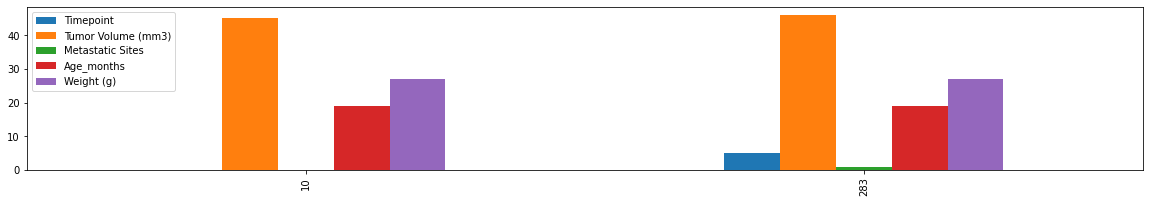

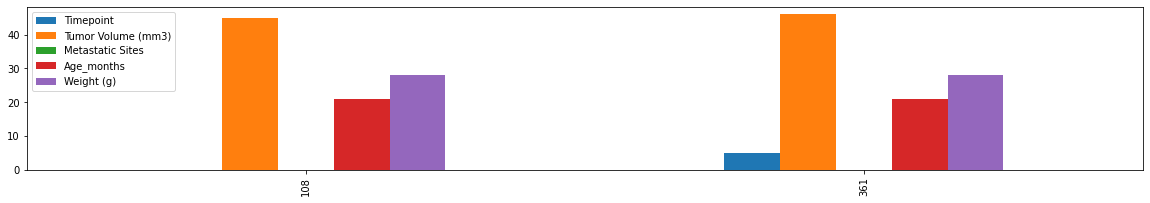

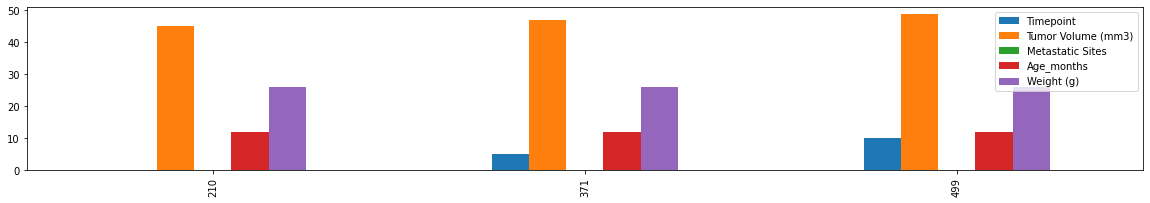

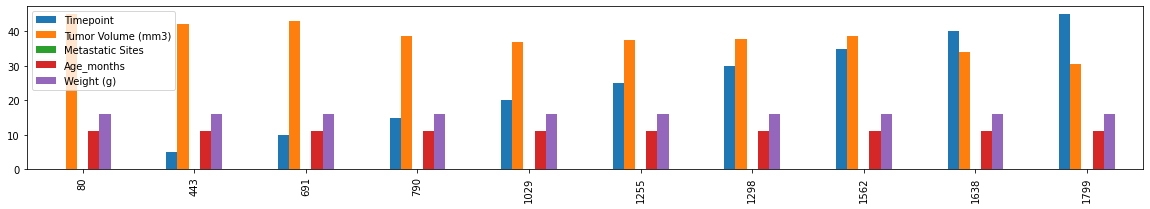

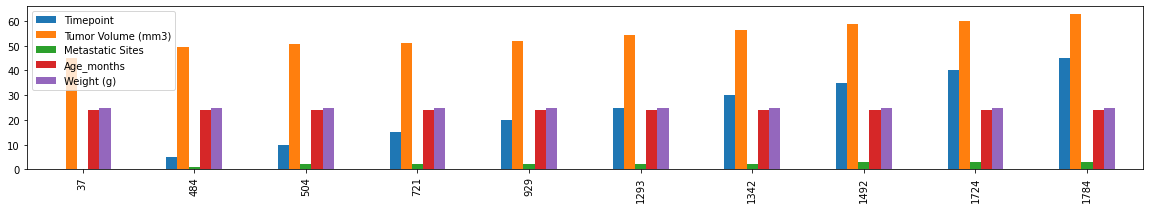

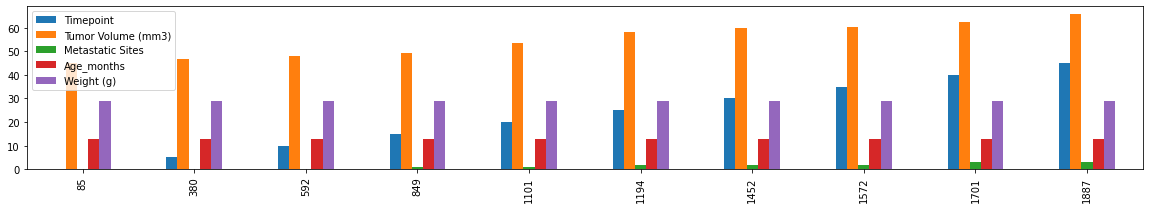

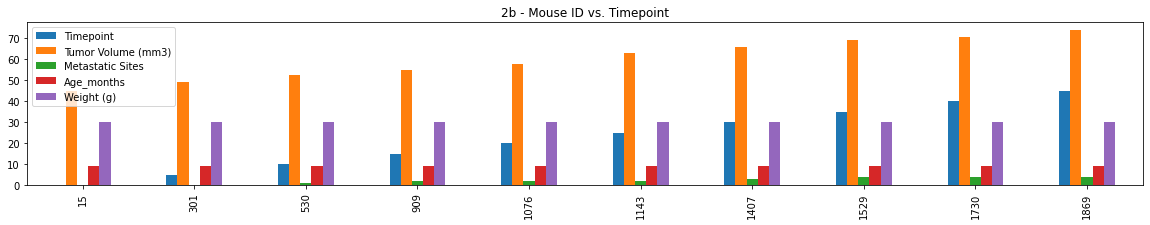

In [75]:
plot2b_mice_tp = clean_df.groupby("Mouse ID")

plot2b_mice_tp.plot(kind="bar", figsize=(20,3))
plt.title("2b - Mouse ID vs. Timepoint")
plt.show()

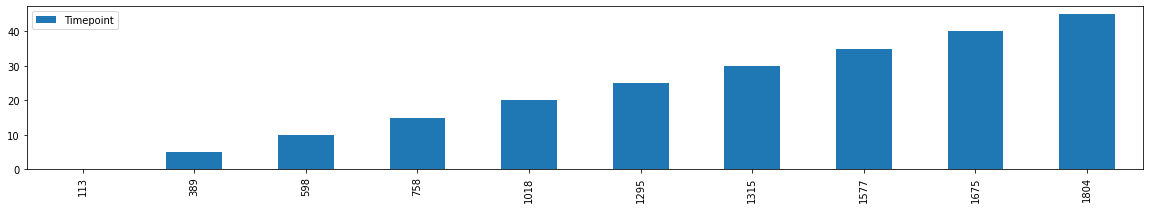

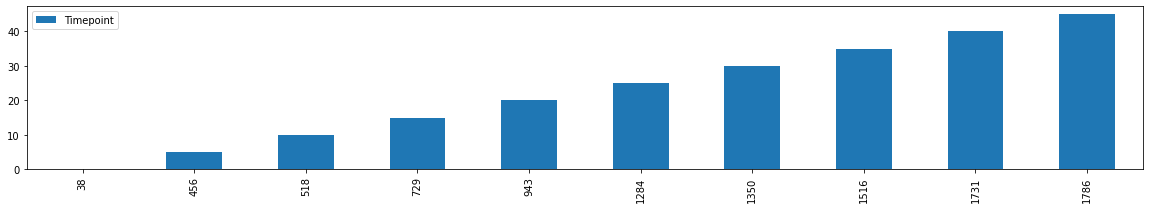

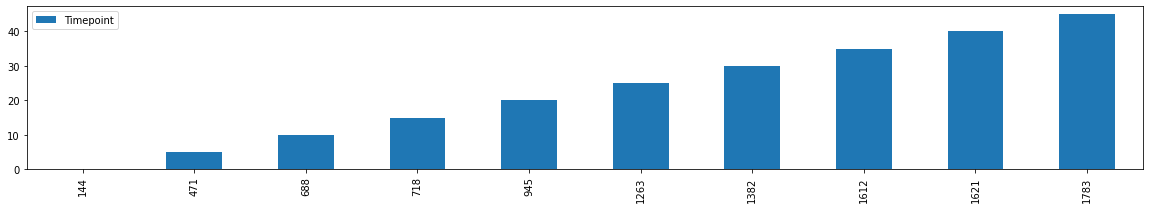

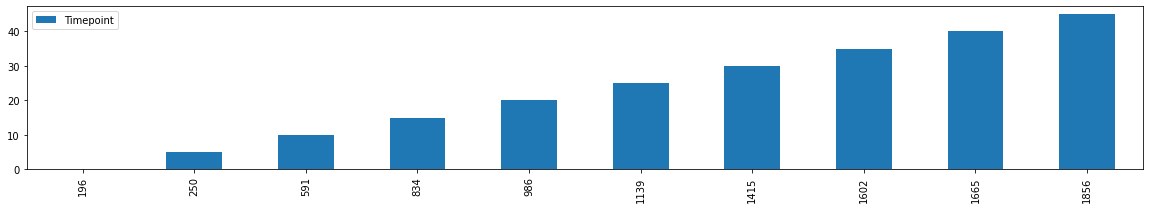

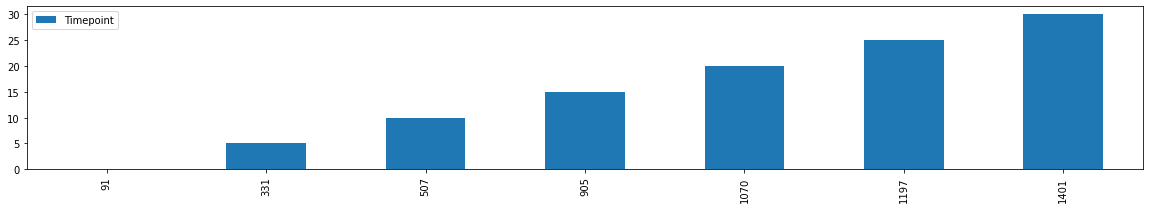

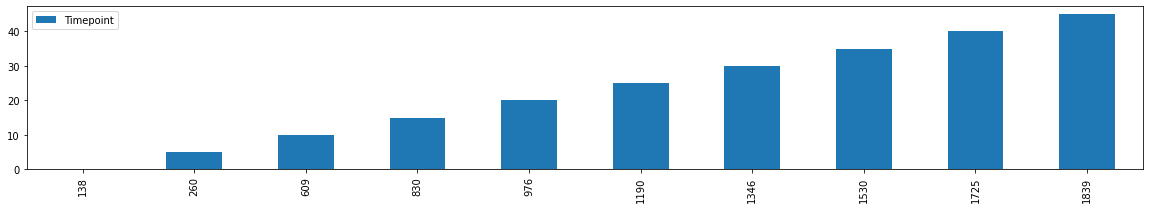

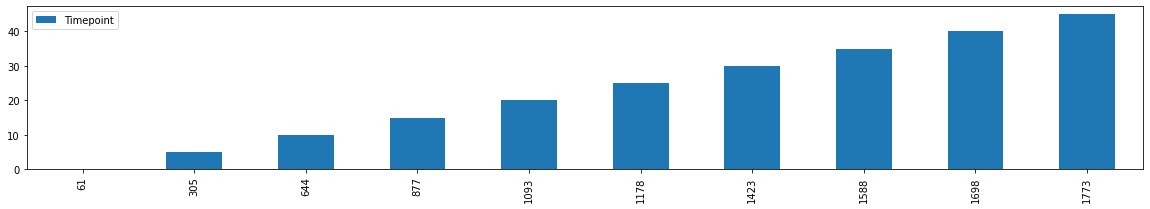

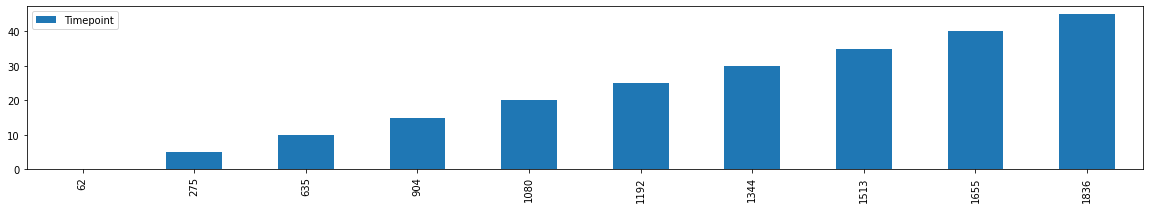

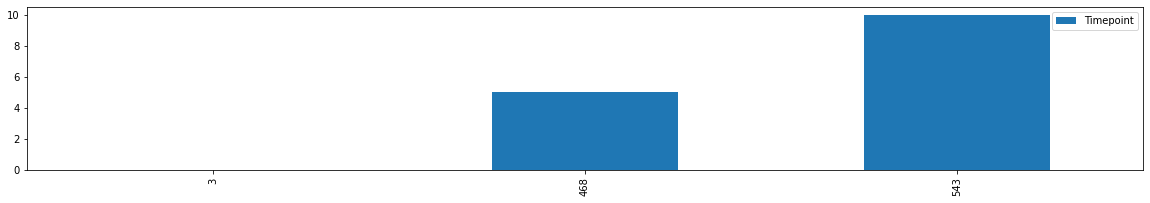

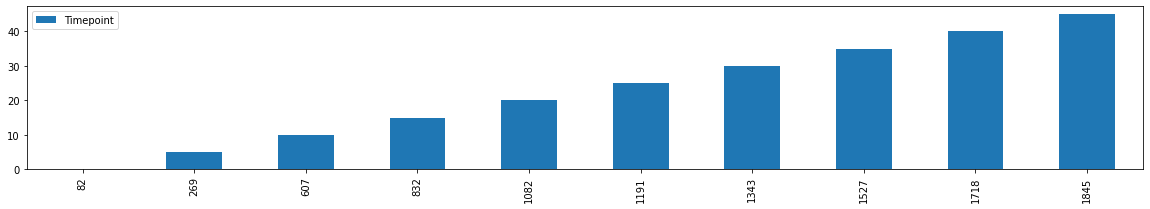

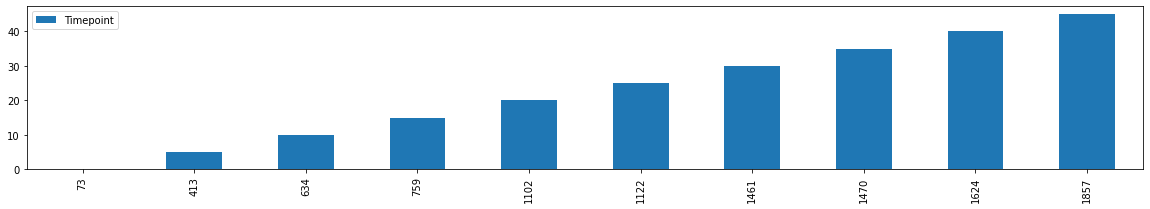

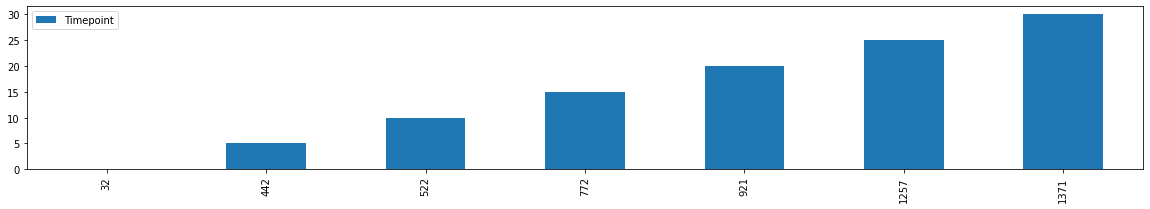

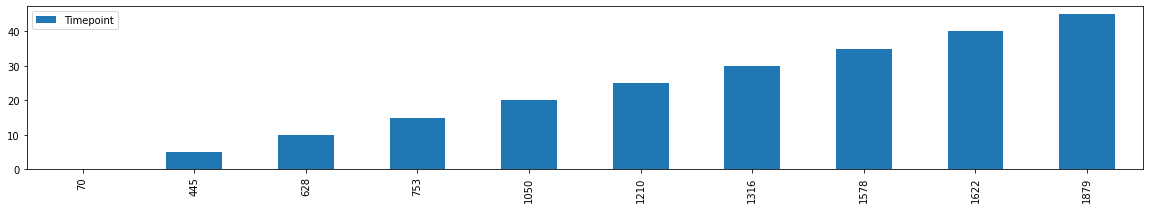

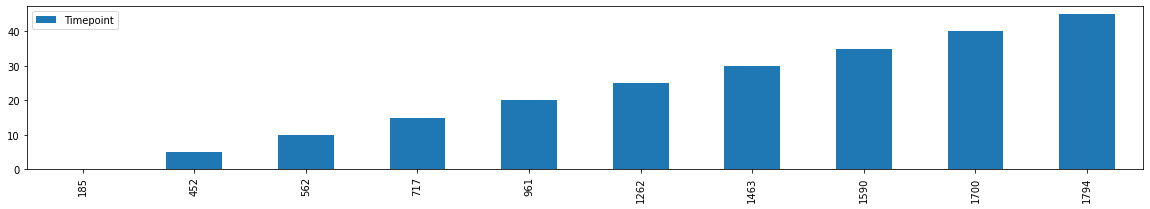

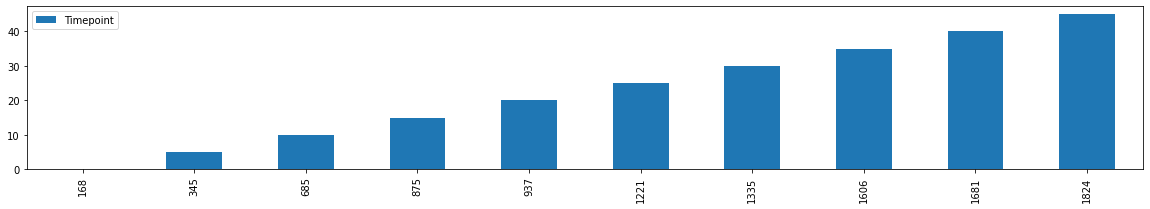

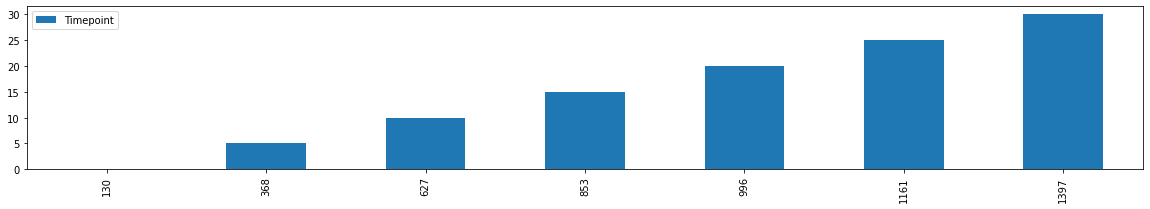

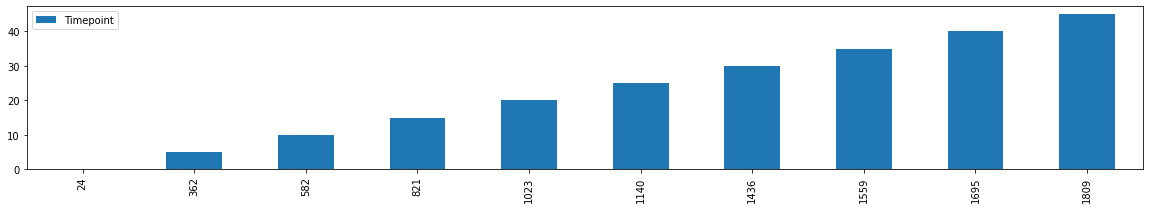

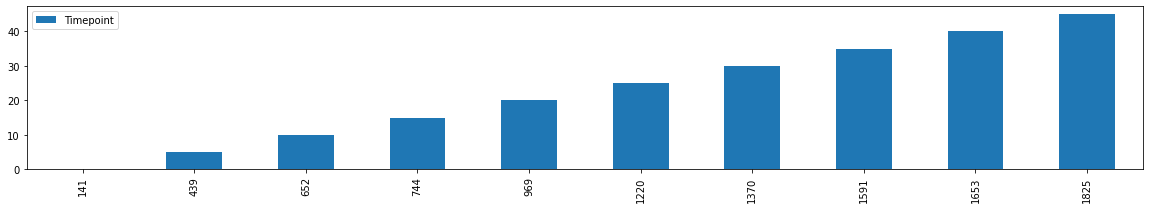

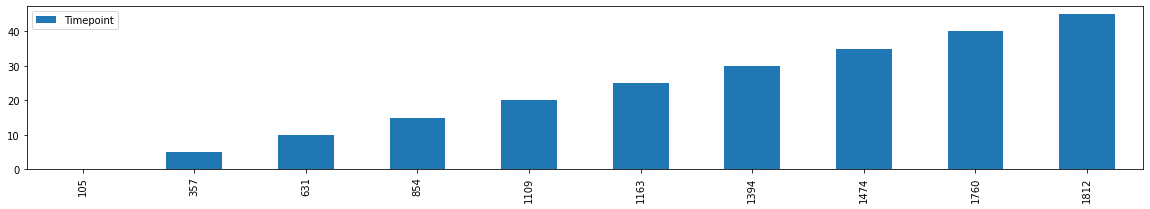

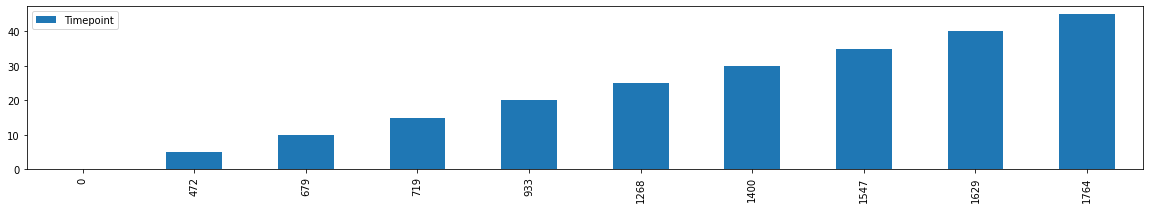

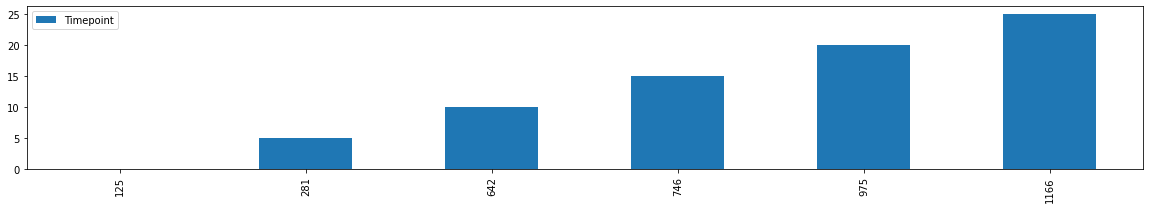

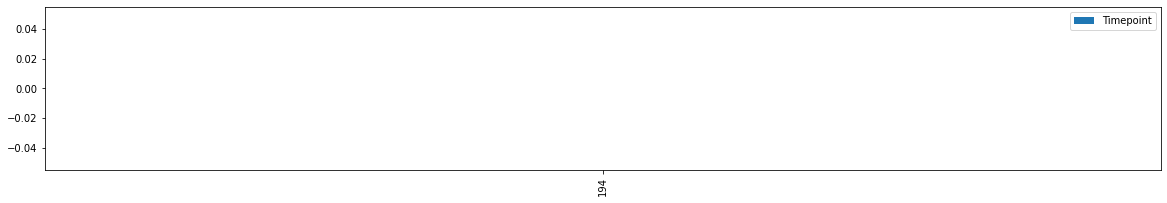

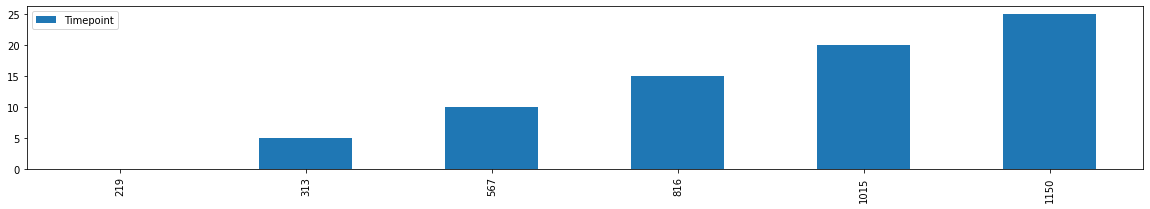

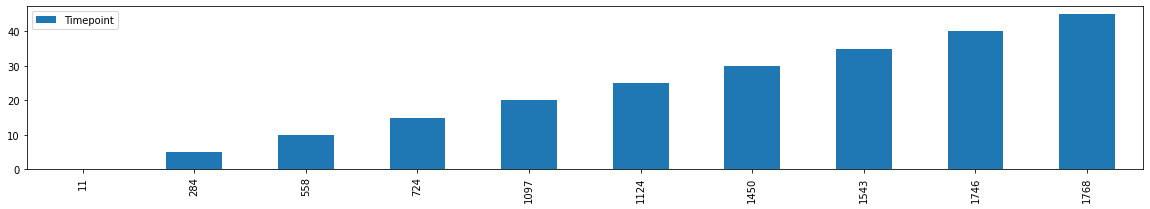

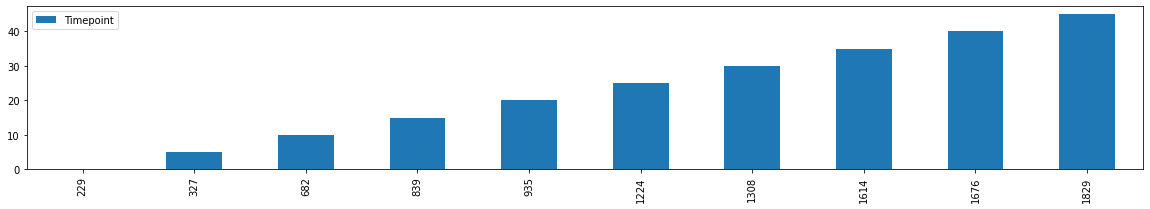

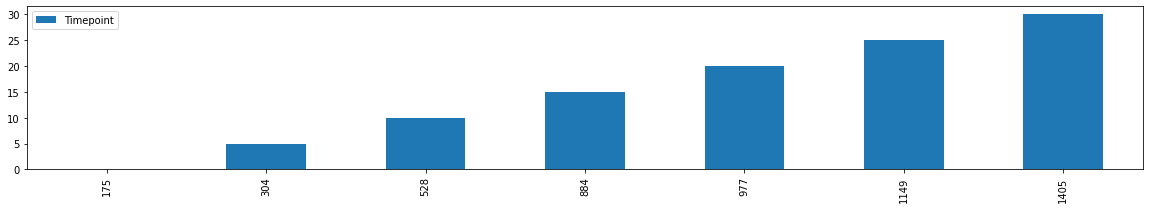

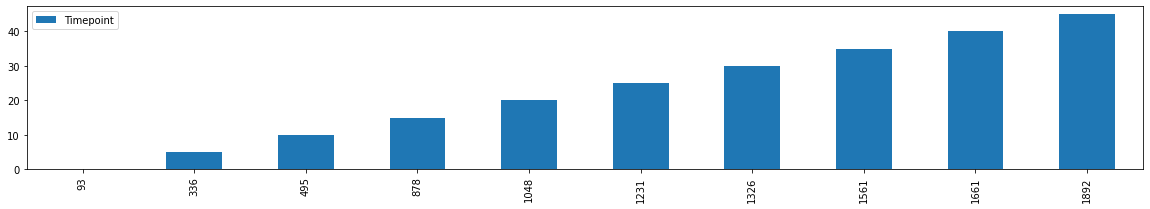

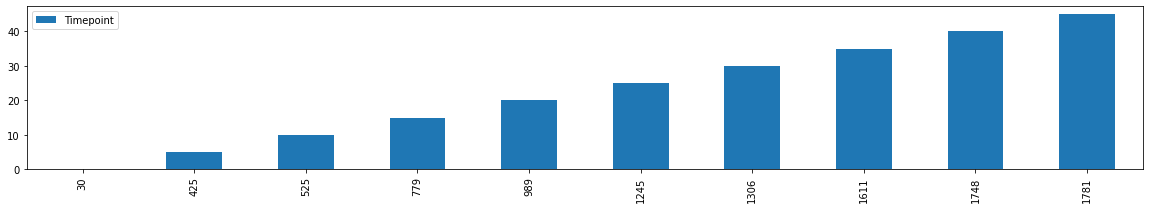

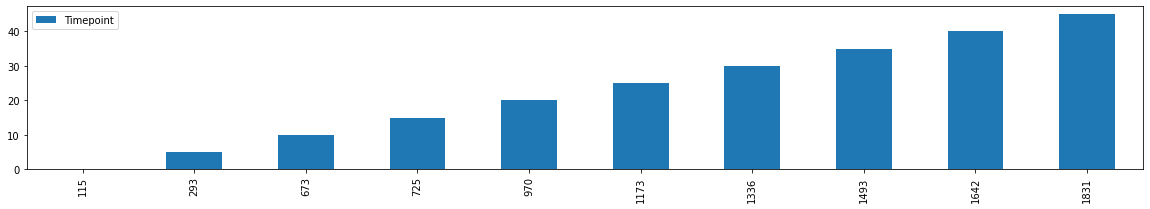

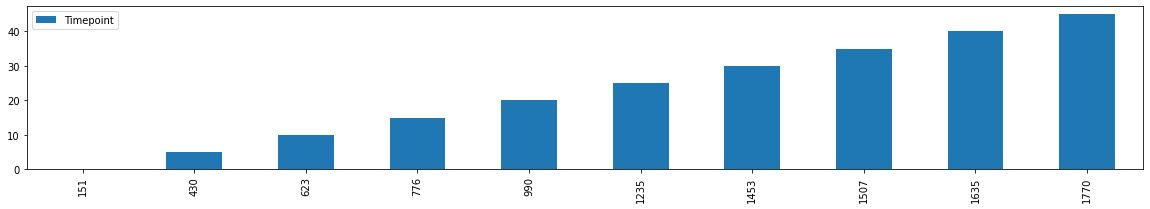

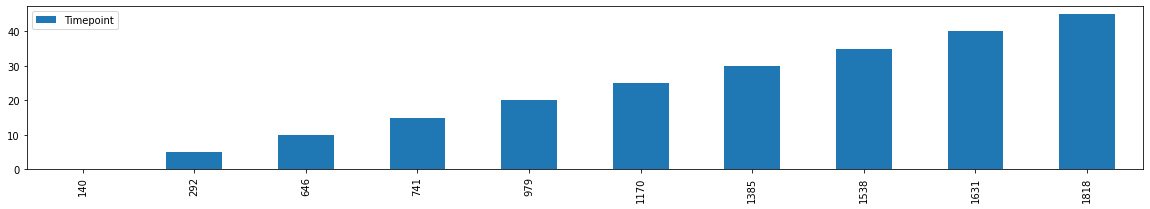

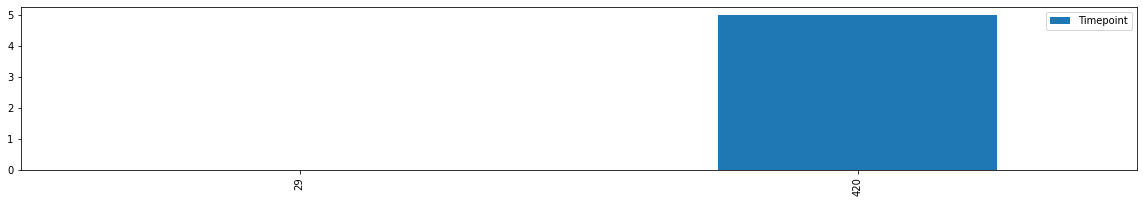

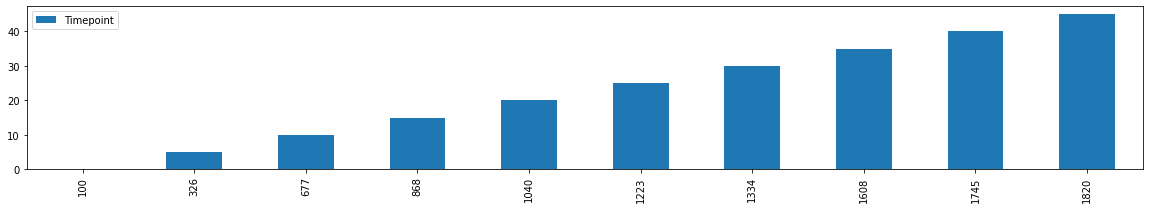

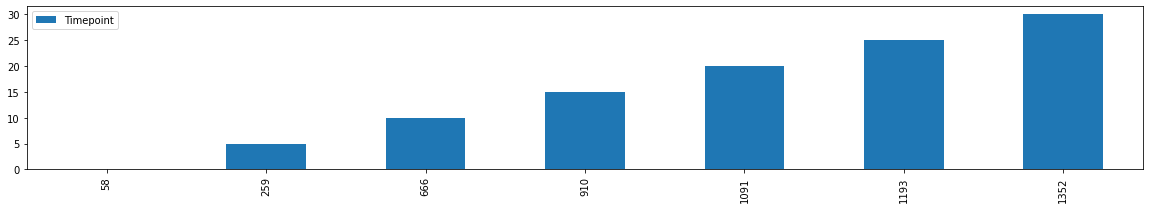

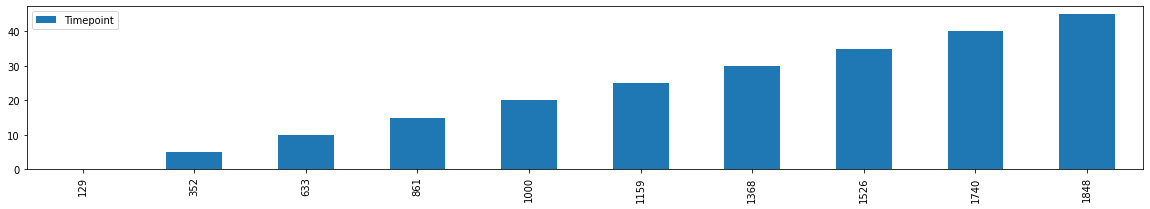

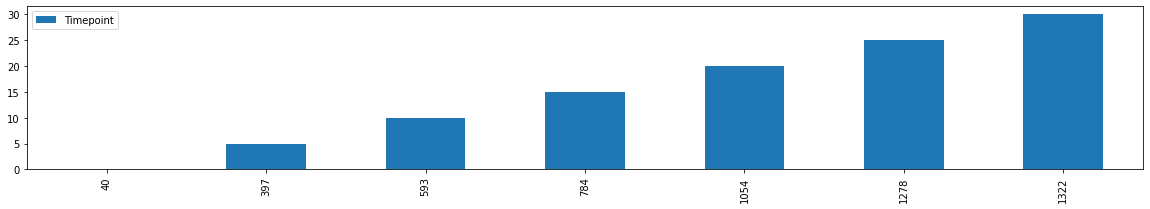

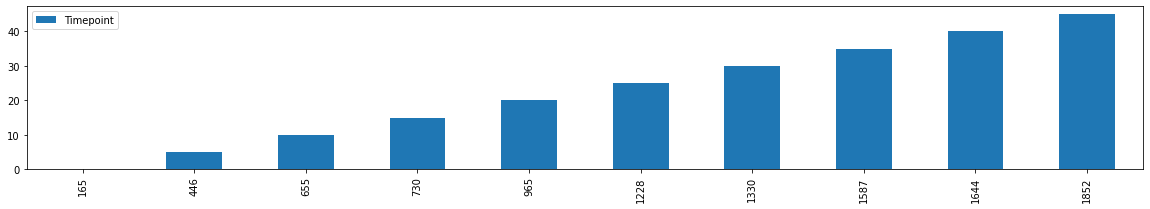

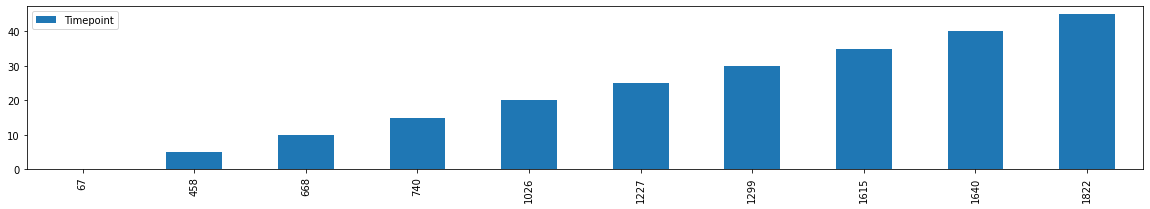

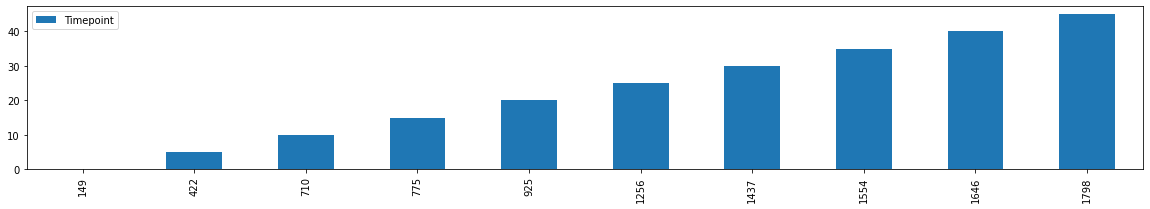

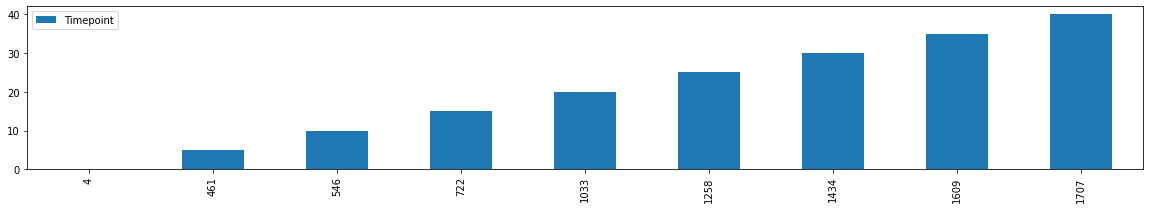

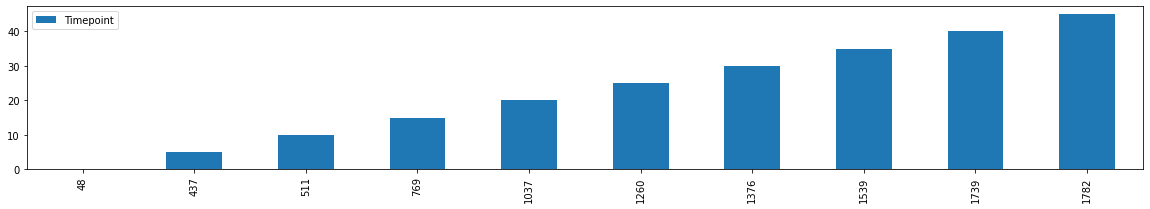

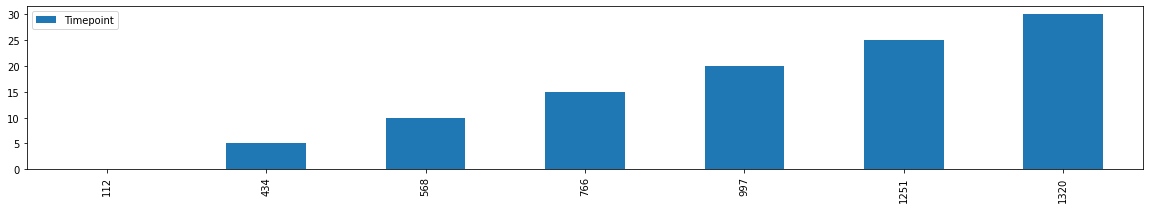

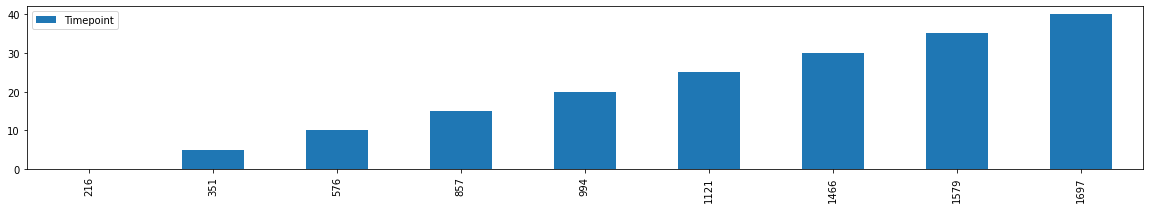

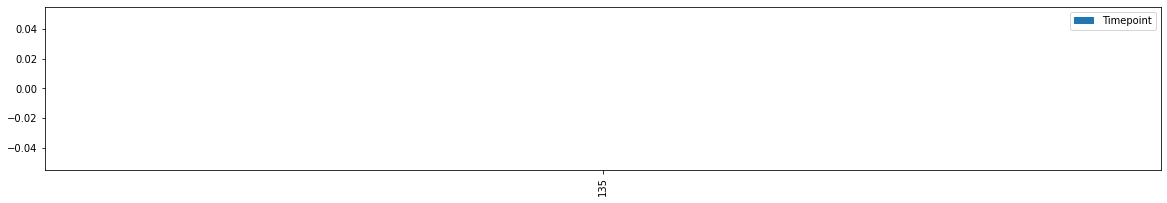

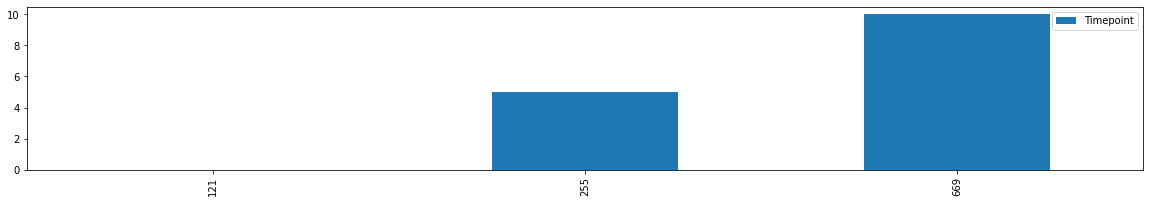

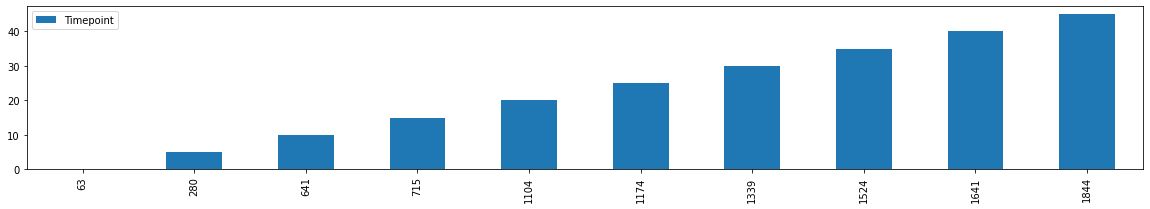

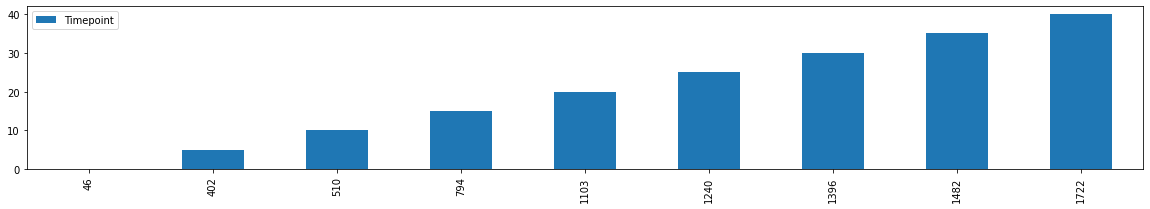

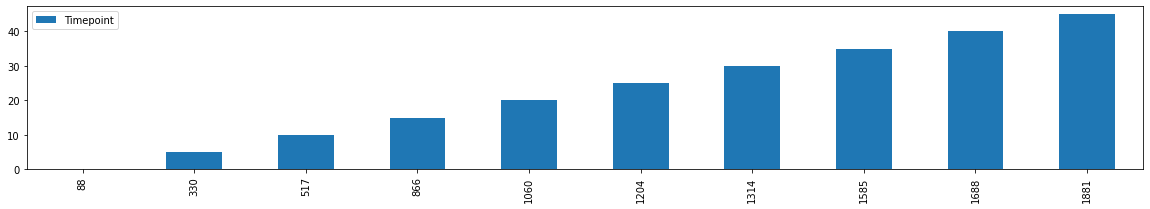

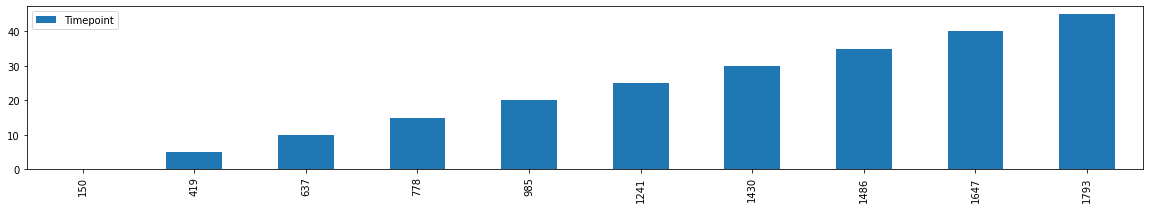

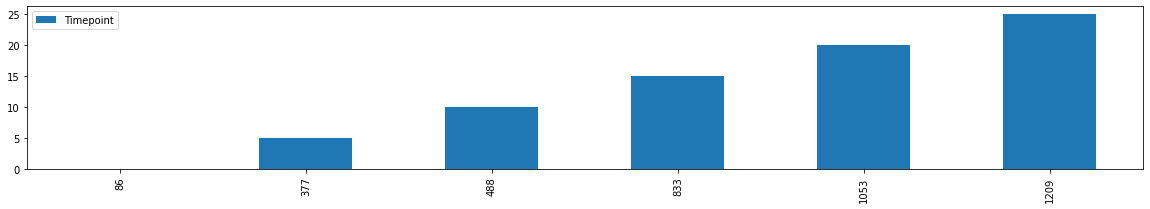

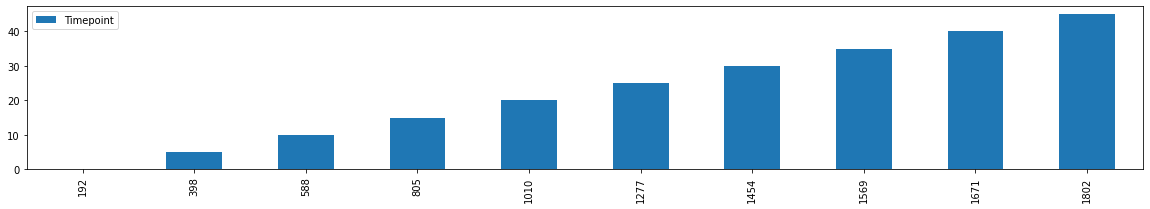

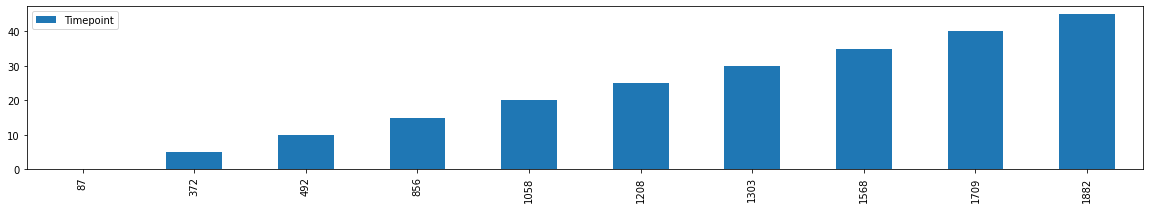

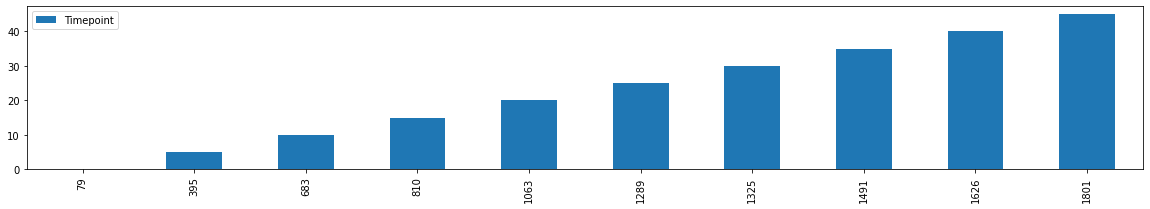

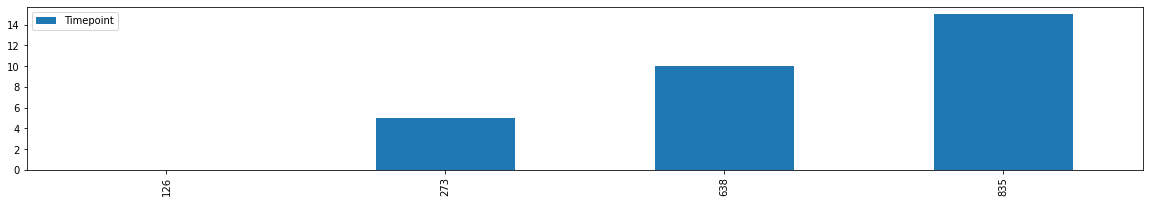

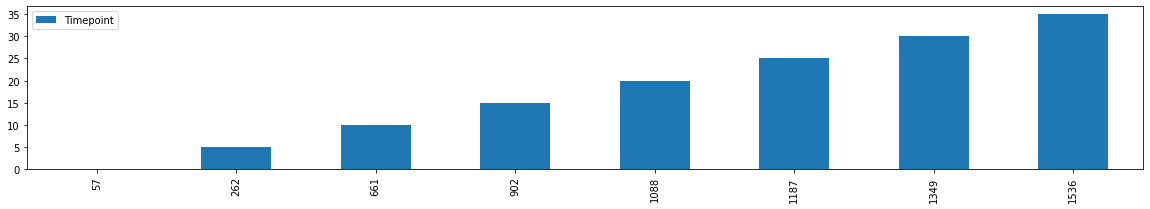

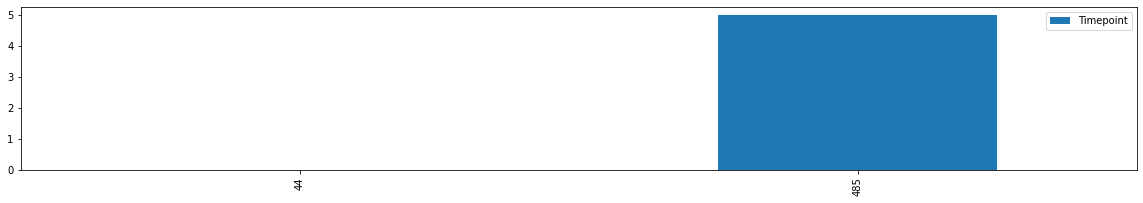

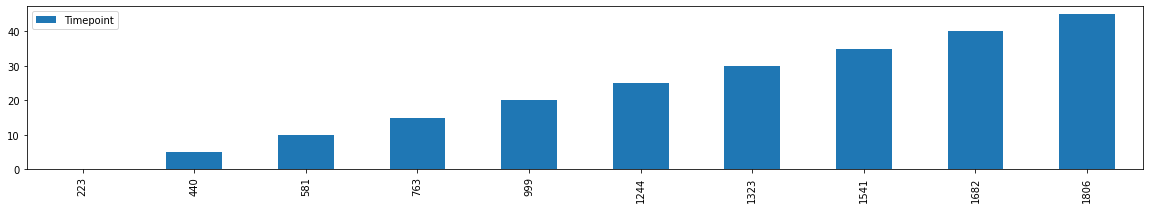

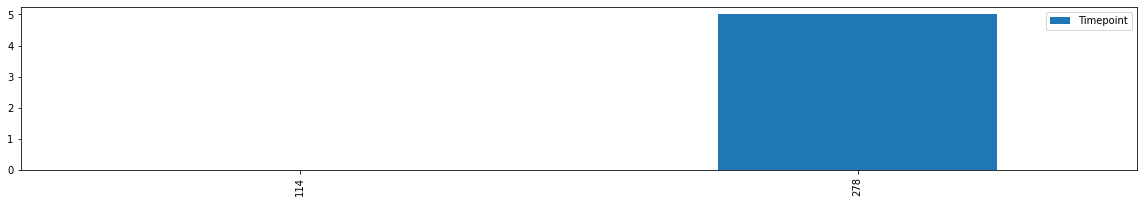

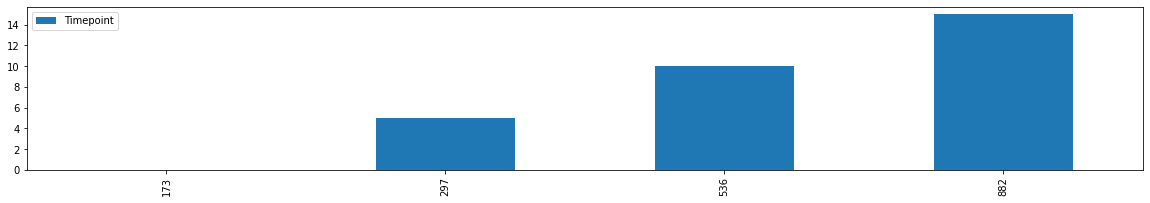

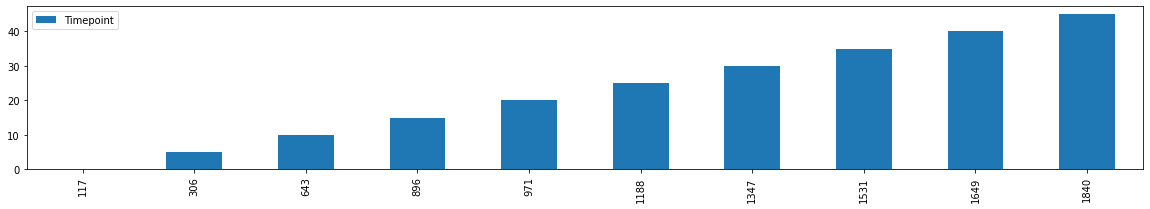

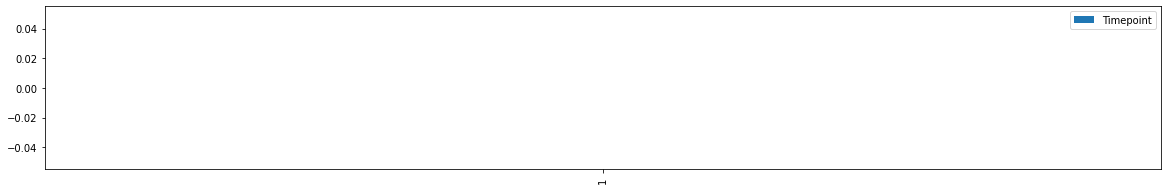

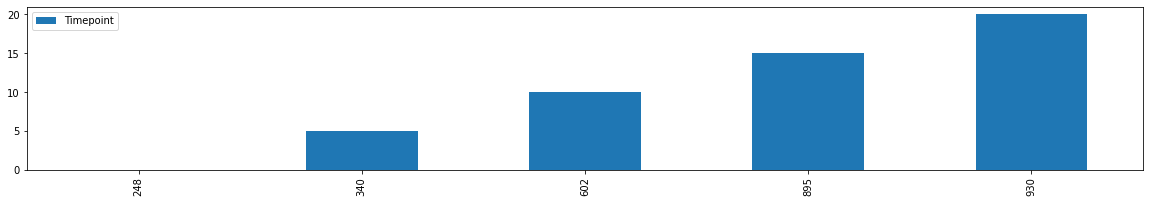

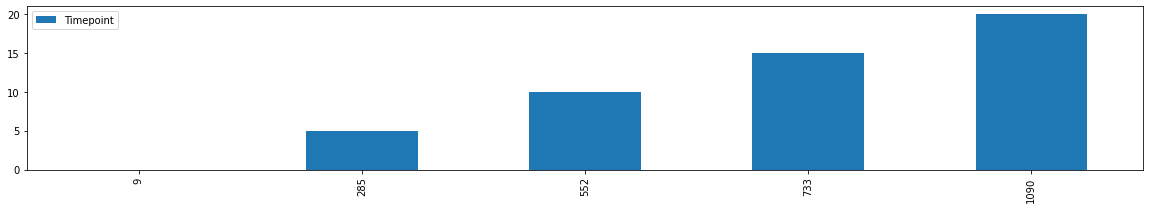

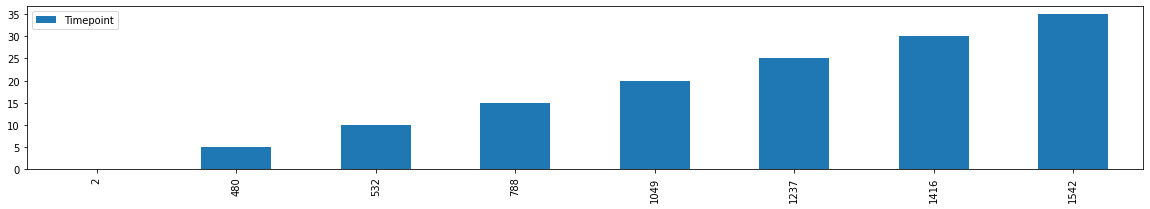

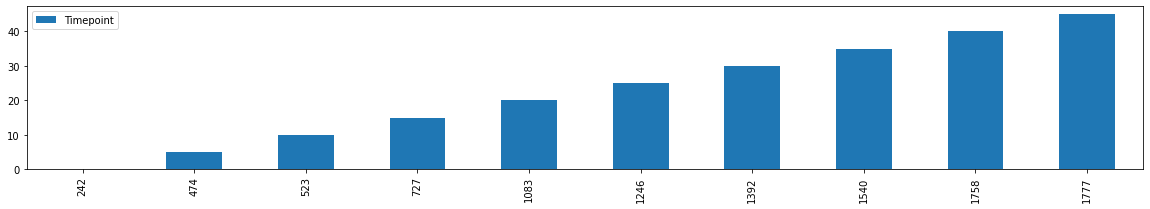

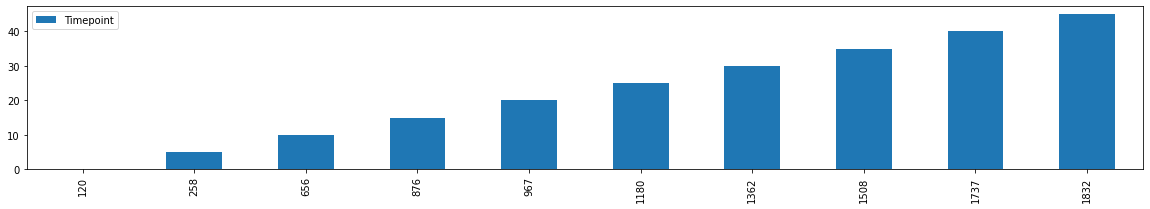

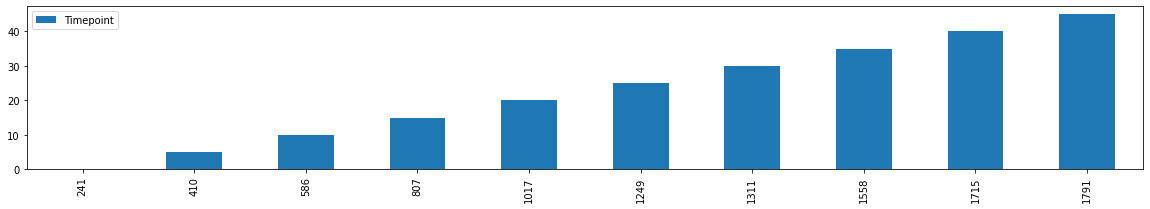

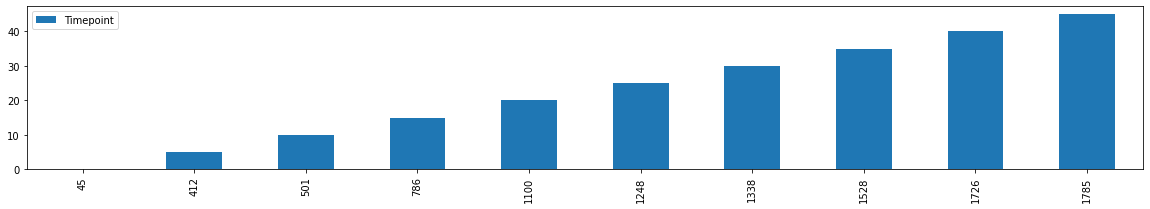

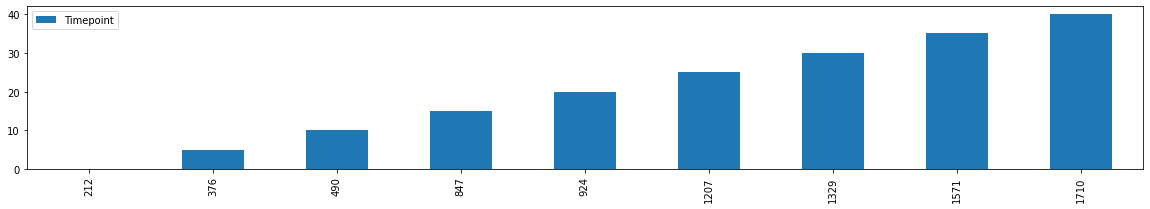

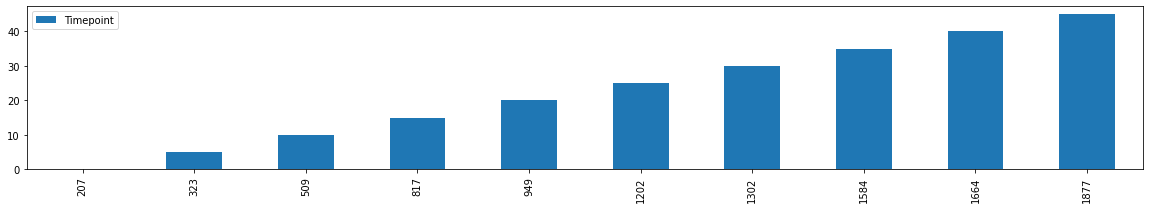

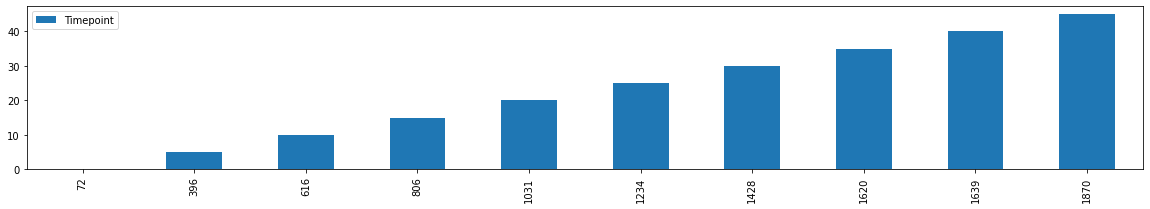

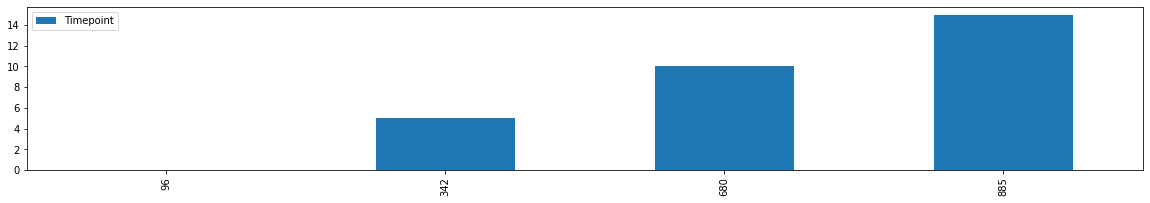

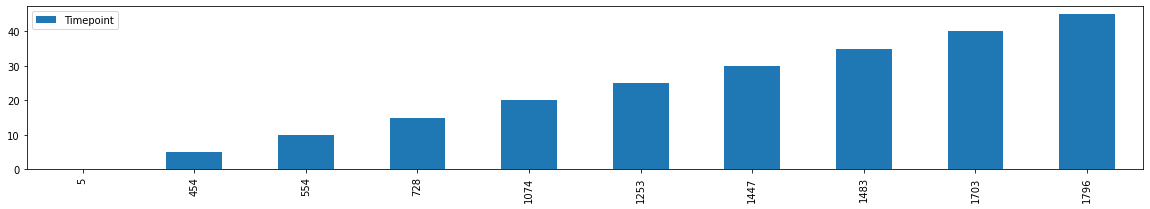

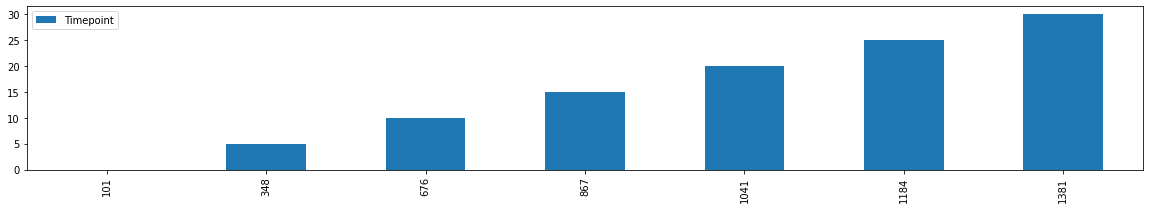

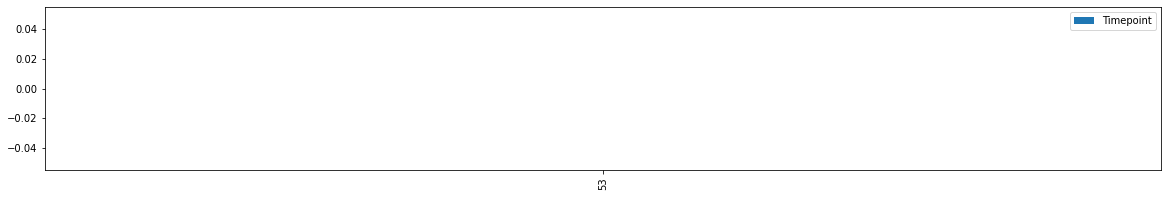

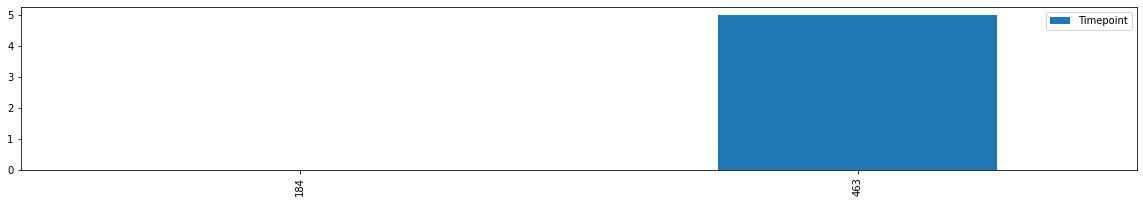

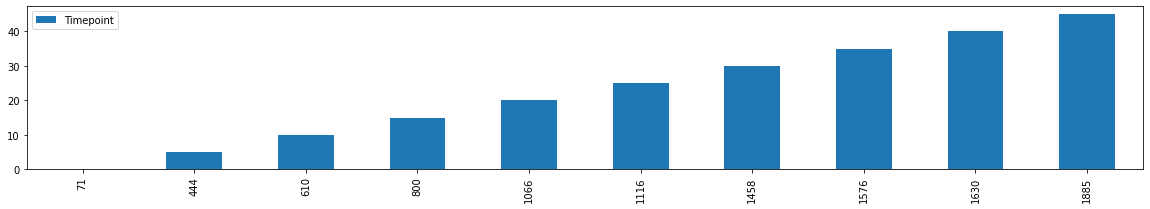

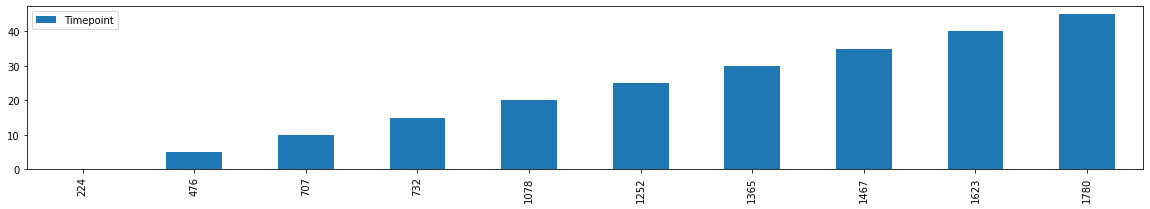

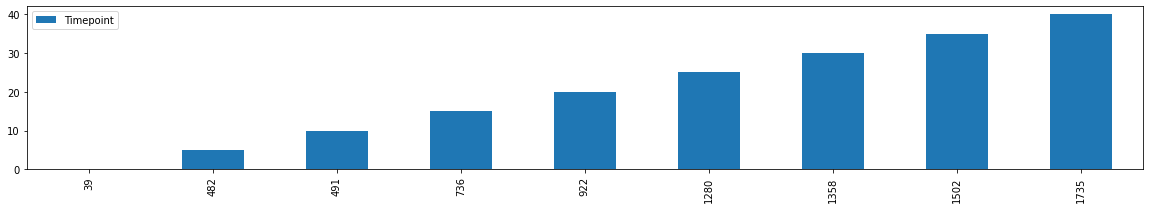

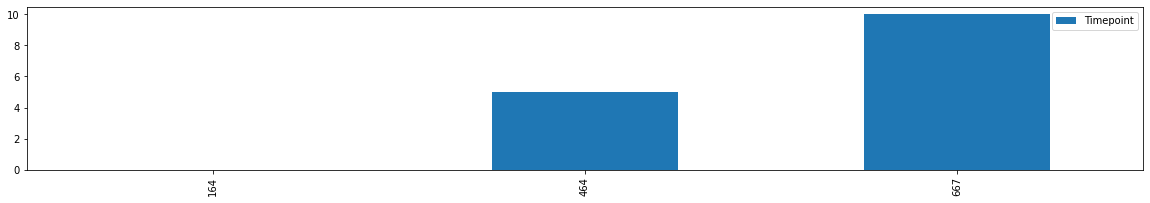

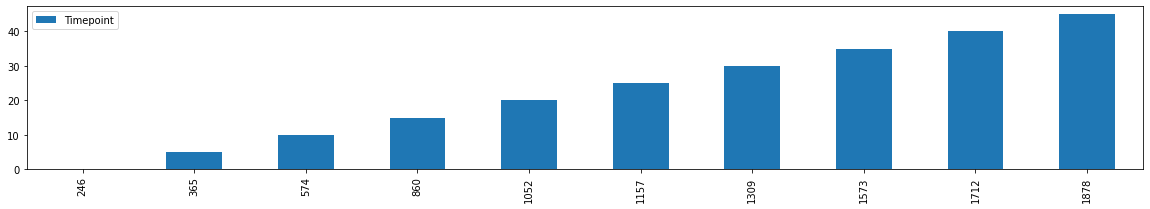

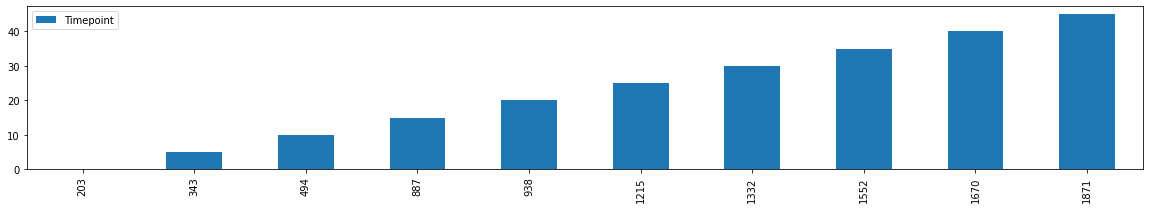

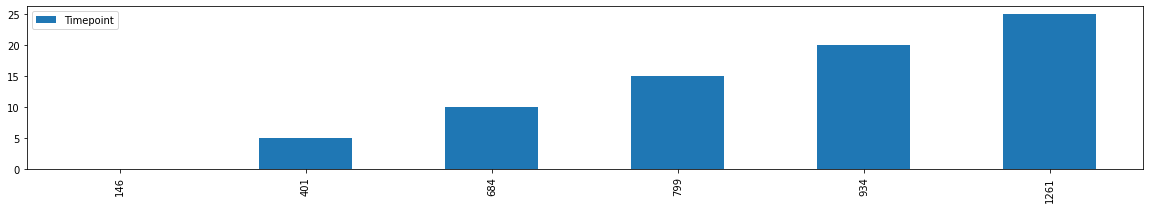

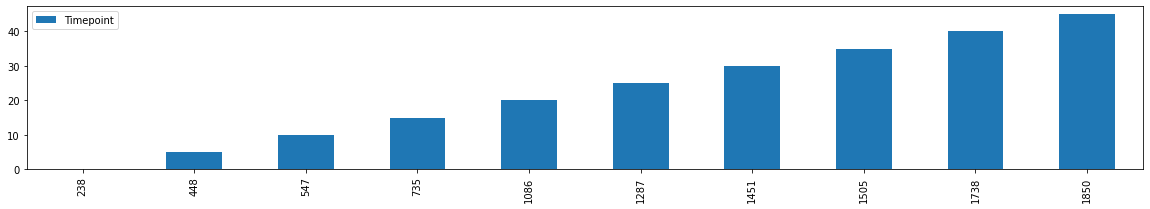

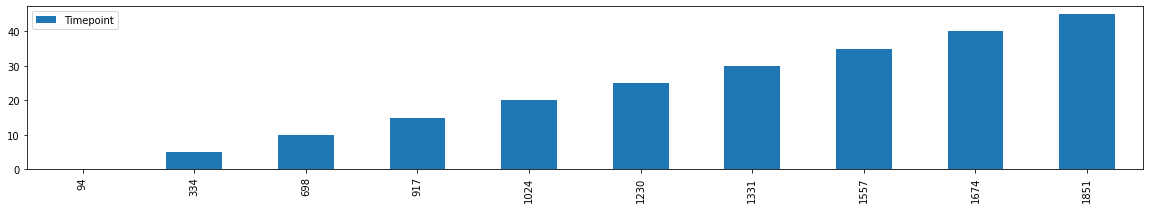

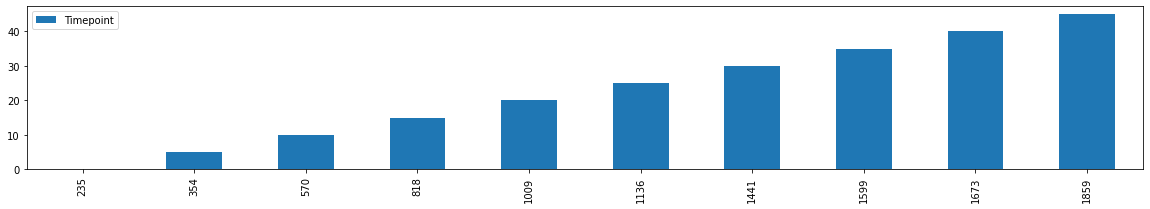

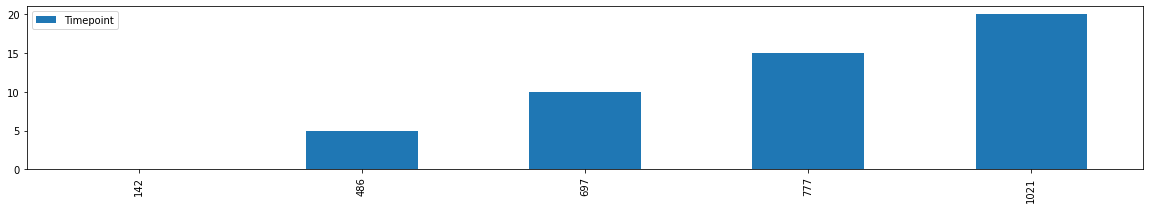

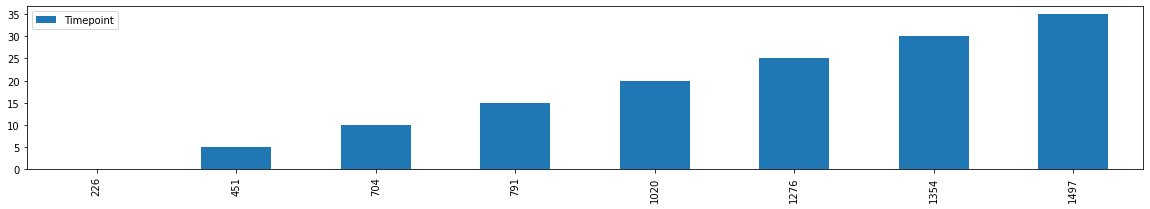

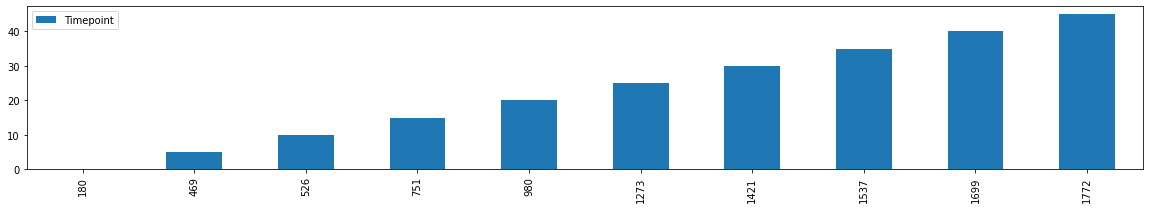

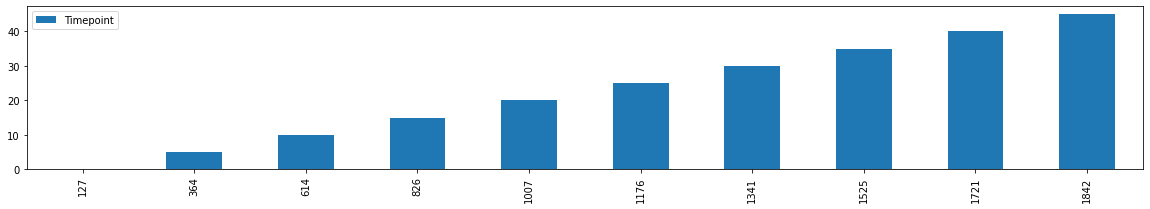

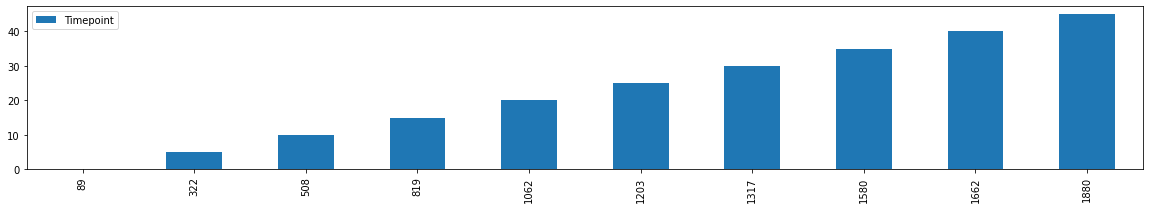

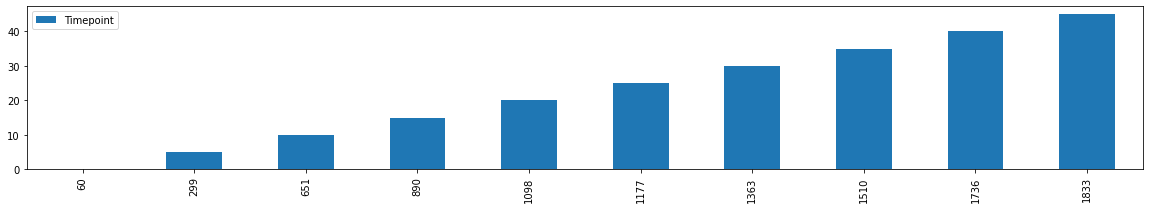

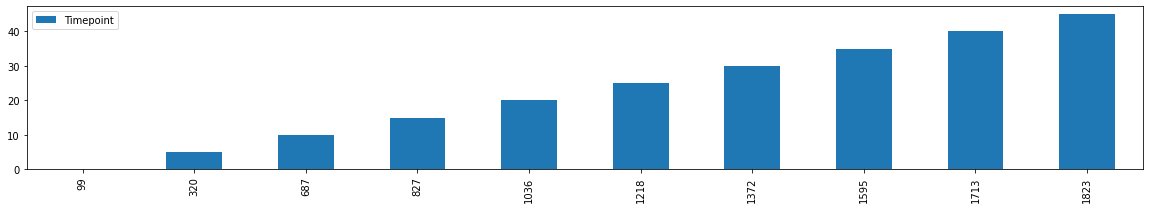

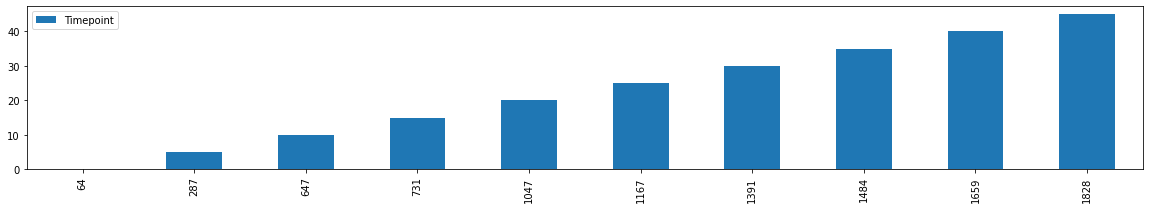

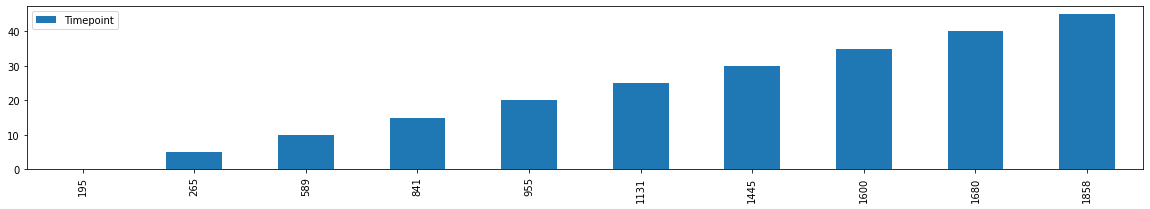

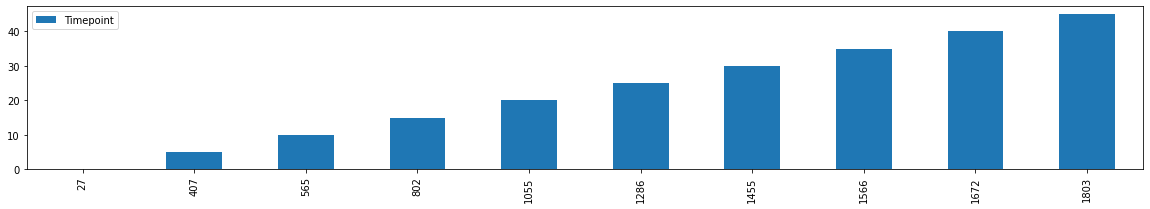

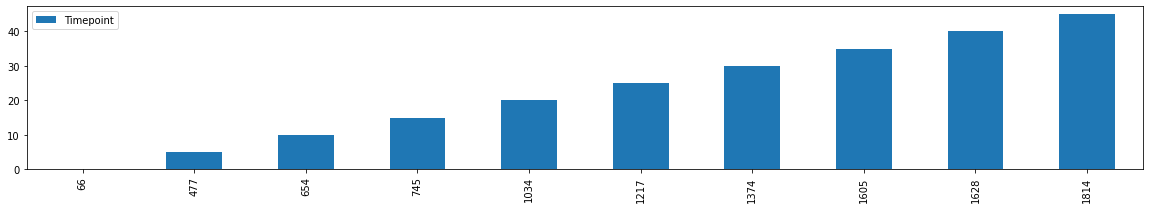

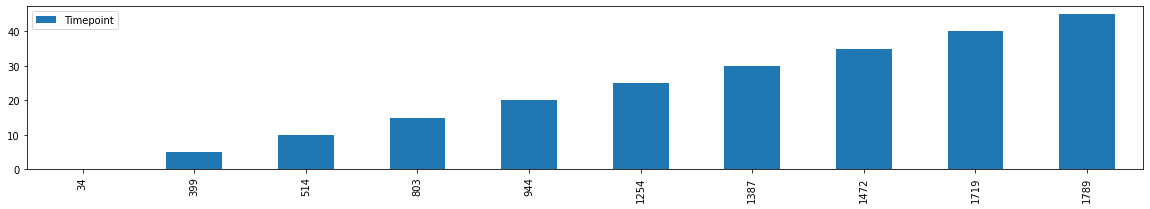

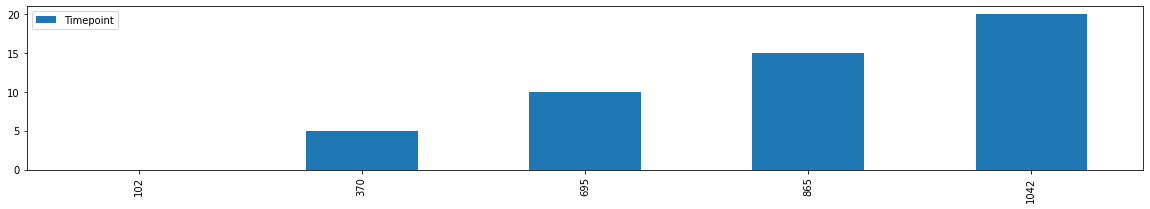

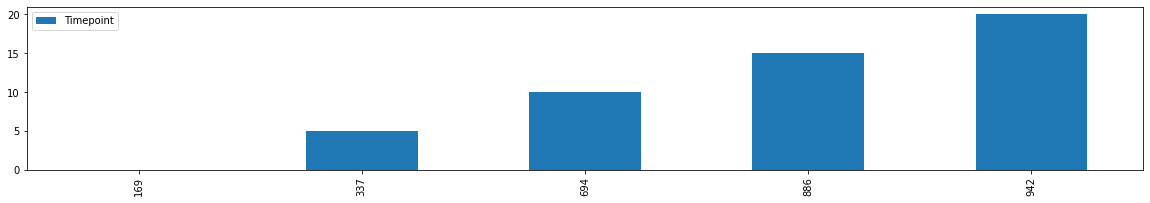

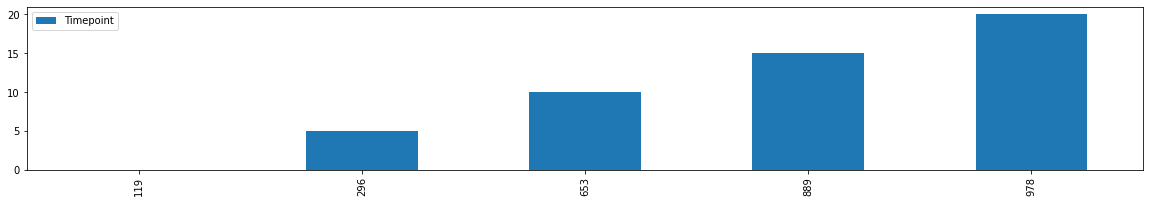

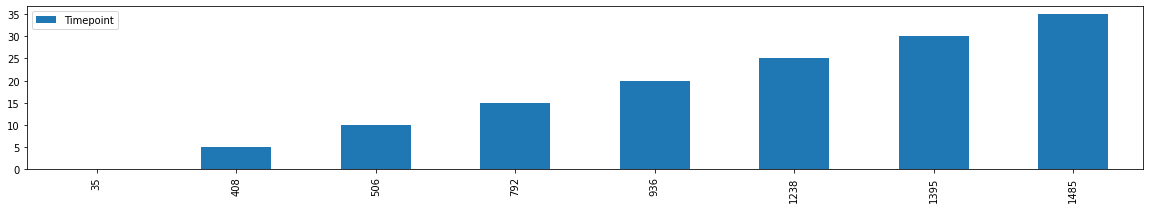

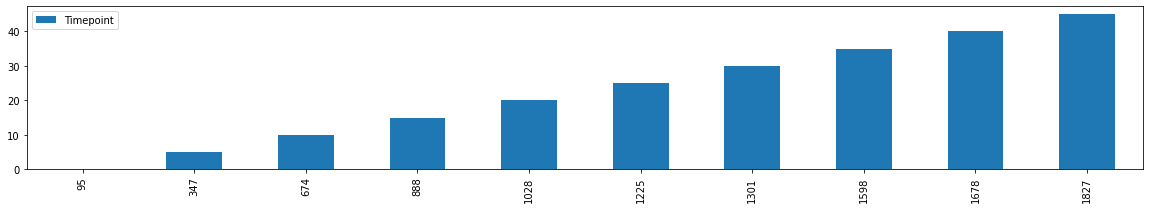

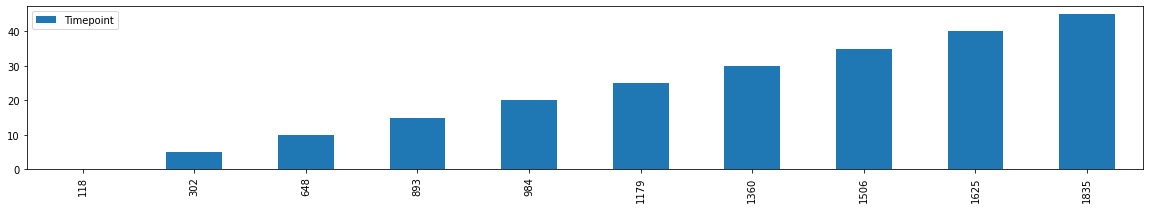

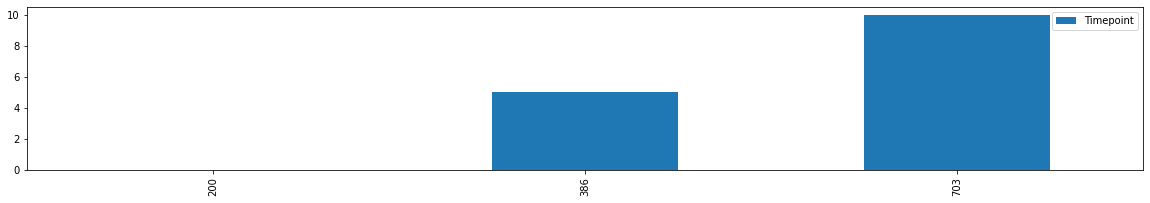

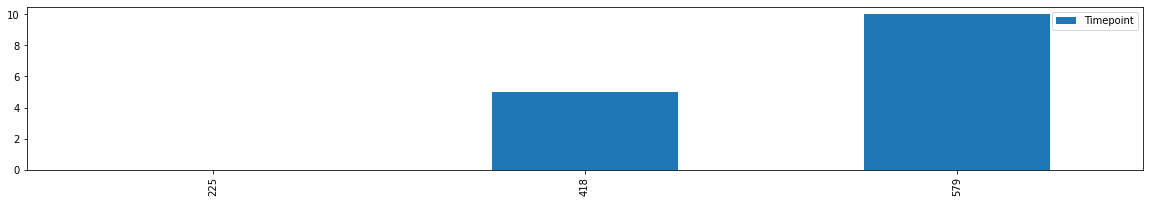

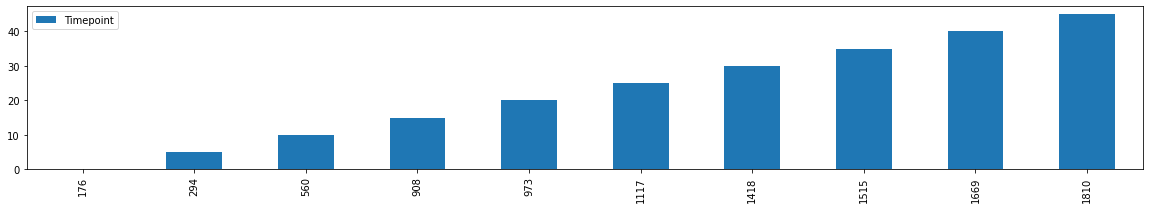

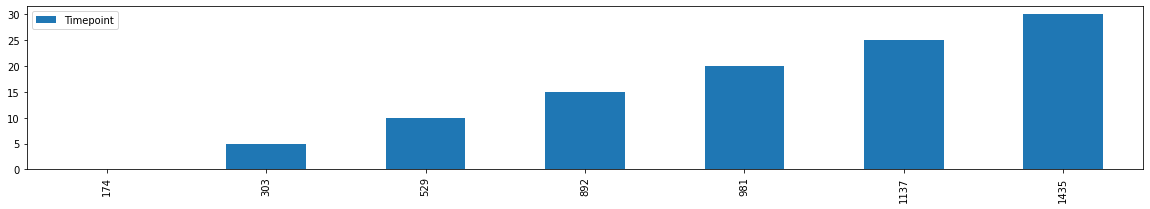

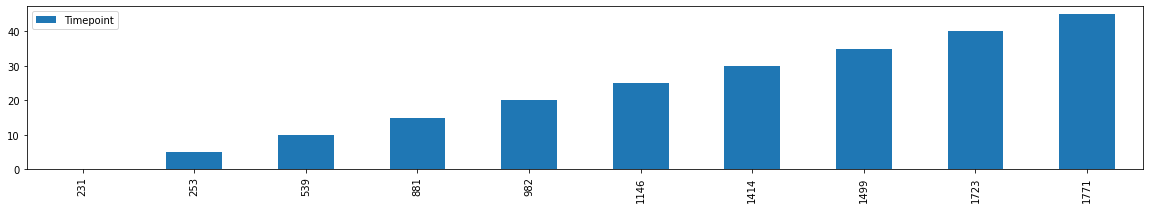

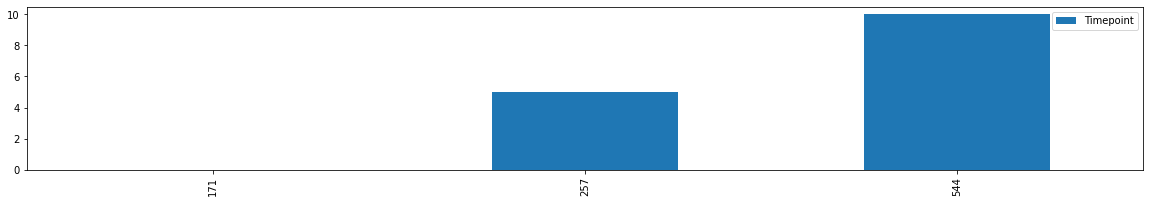

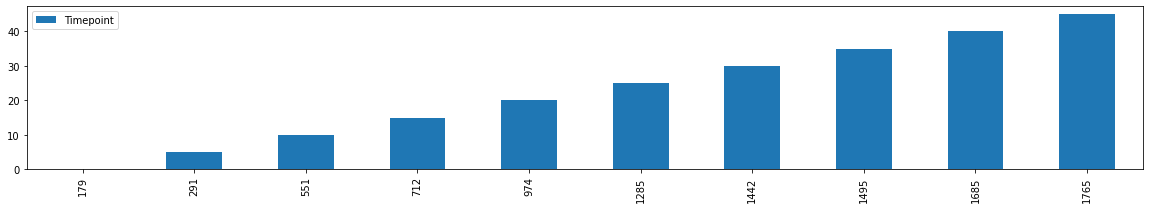

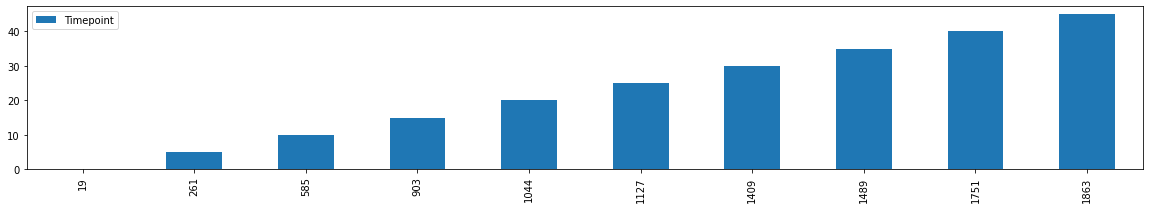

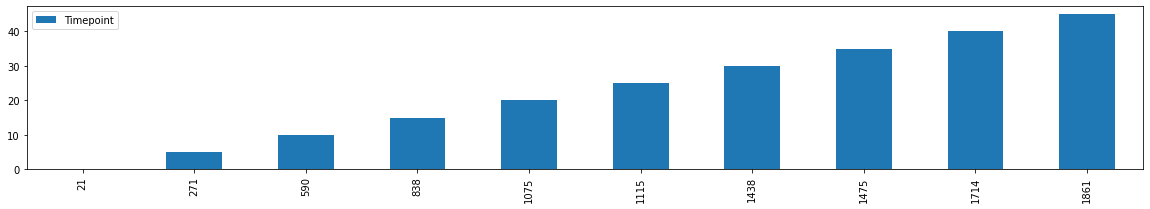

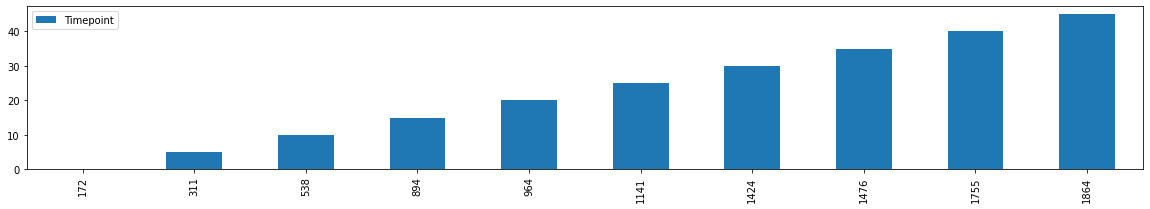

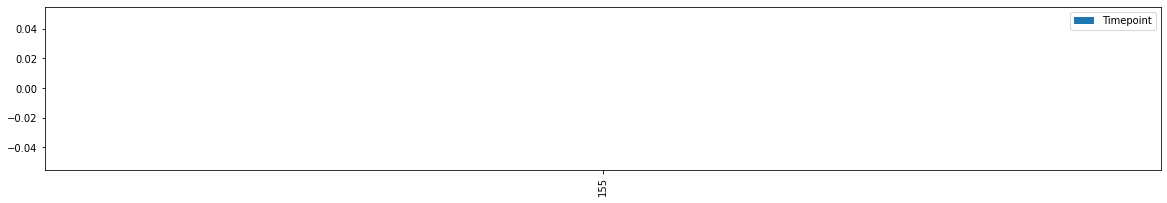

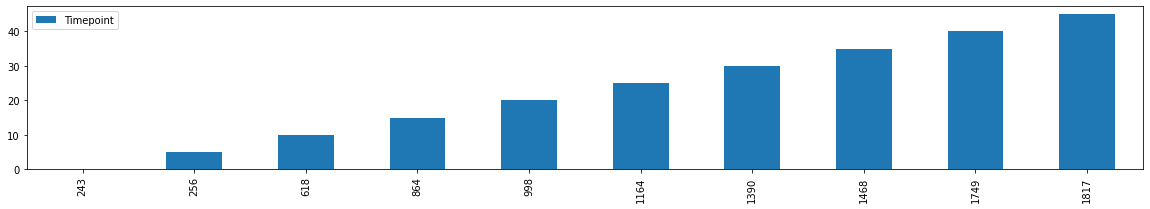

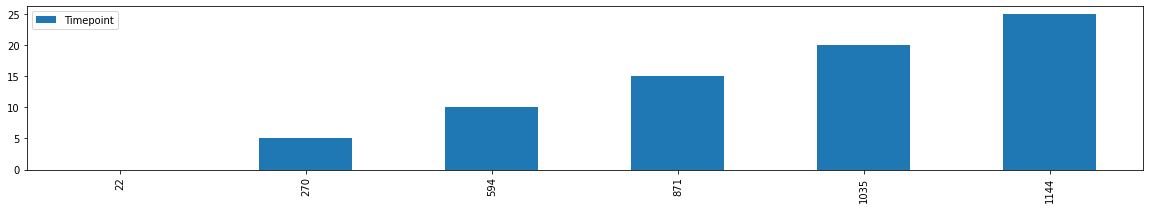

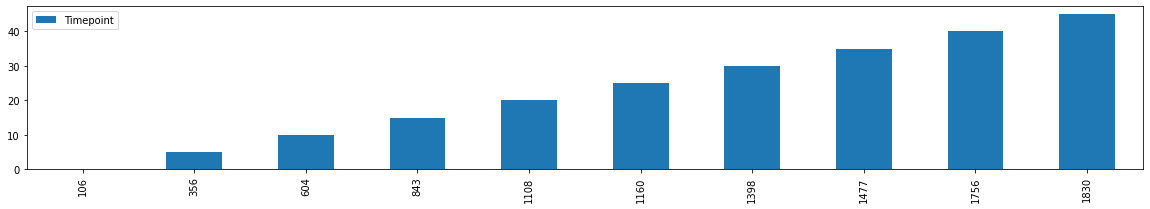

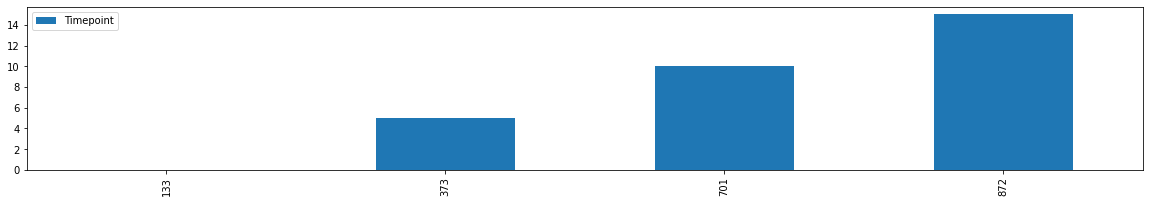

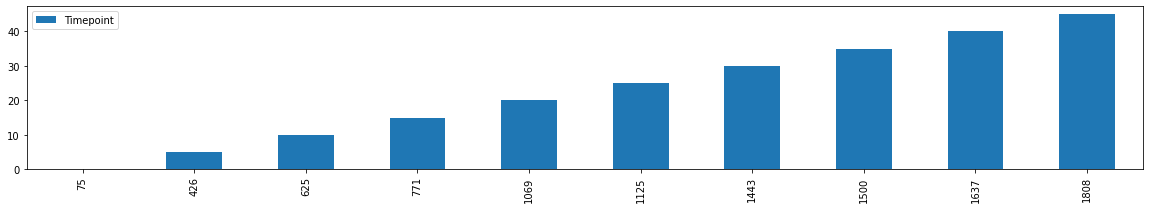

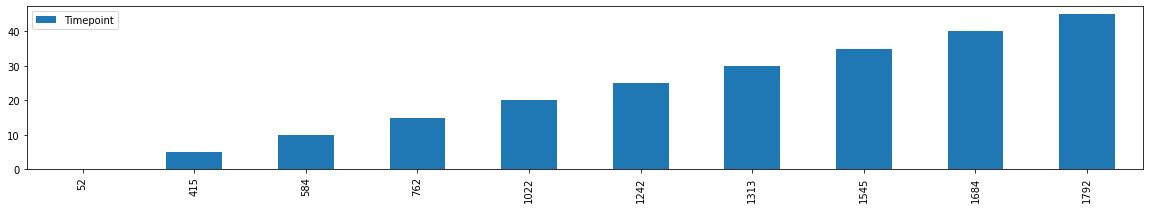

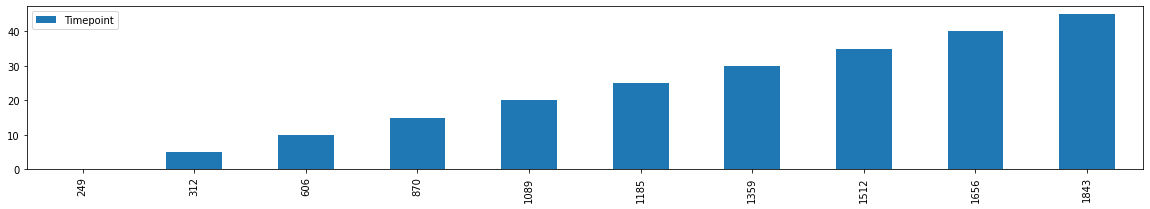

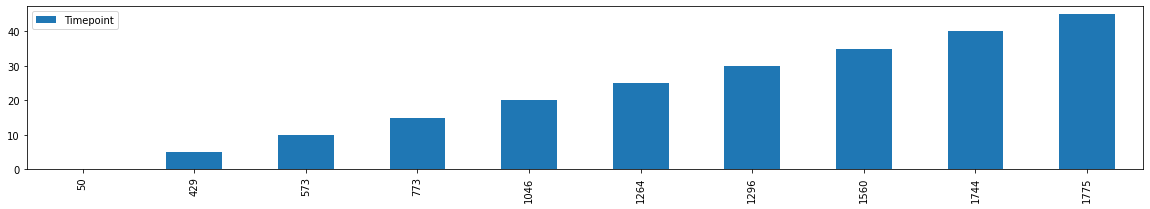

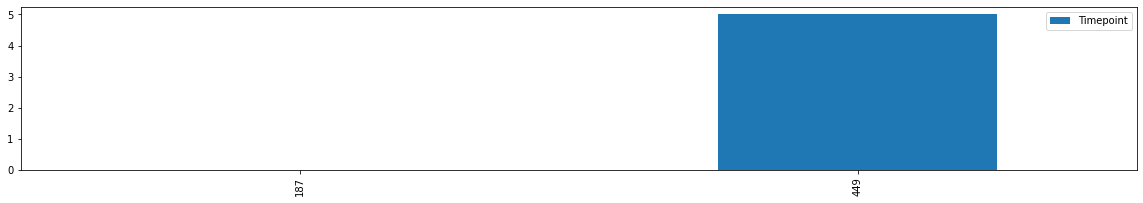

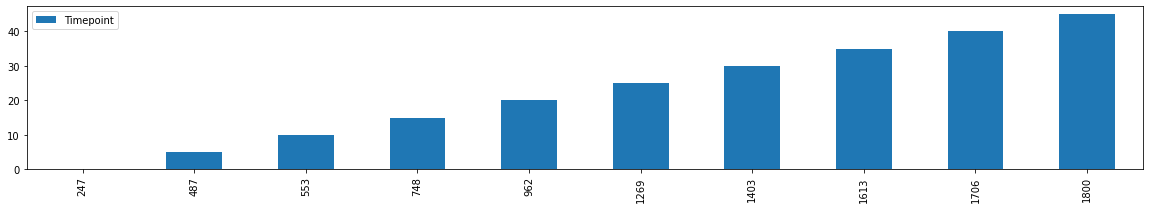

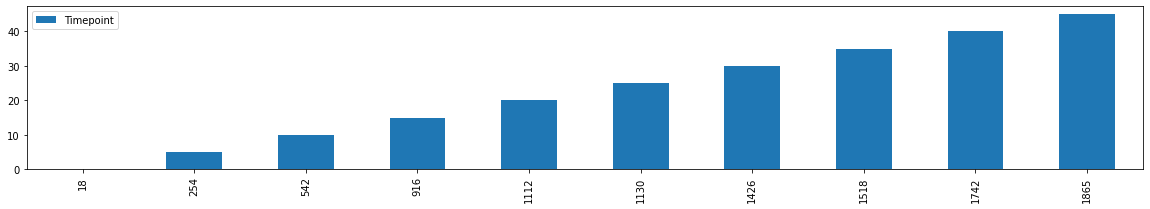

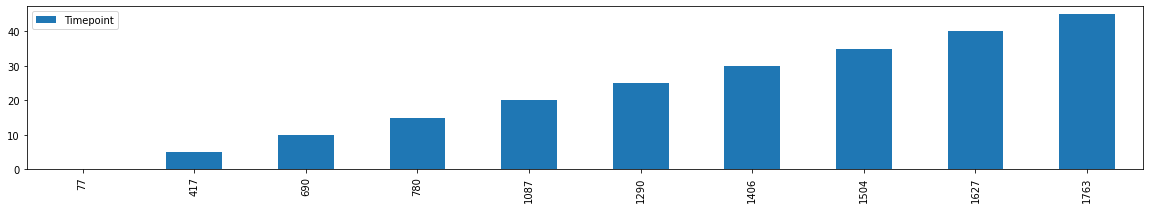

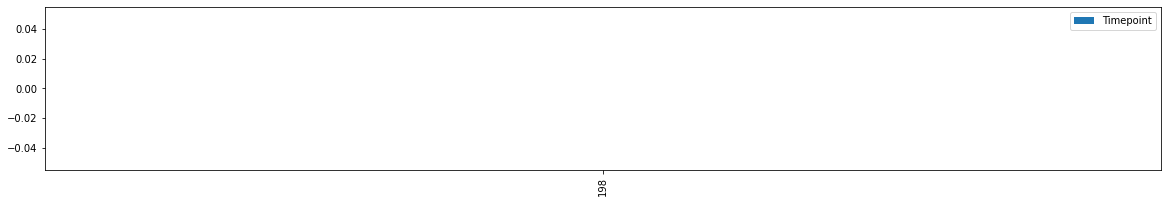

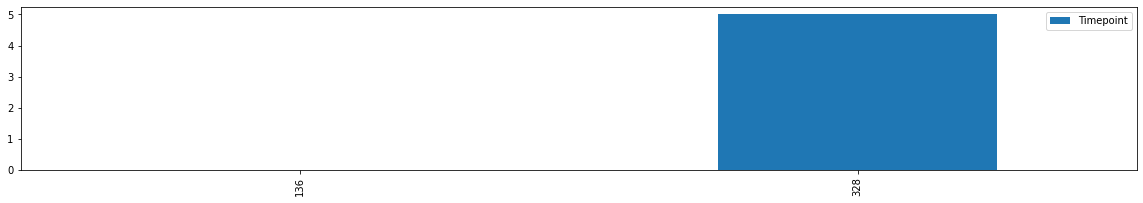

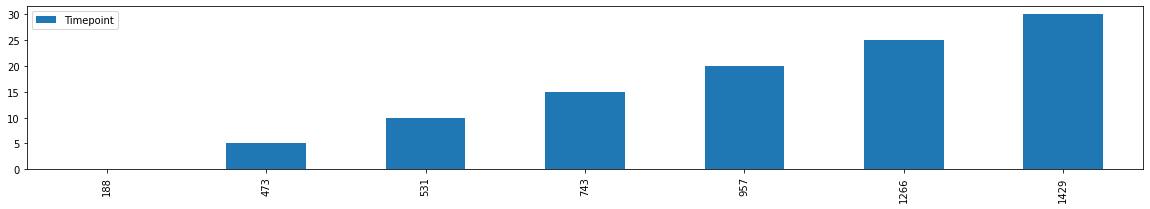

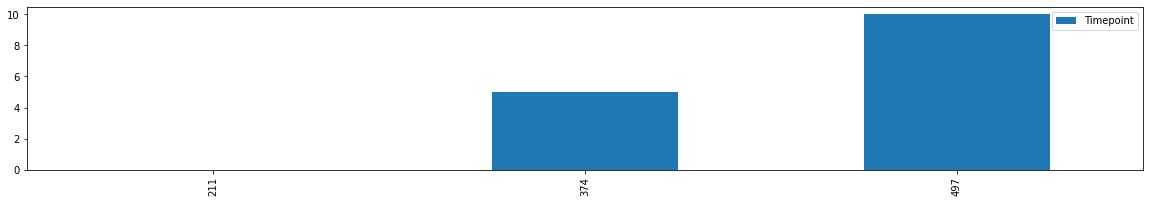

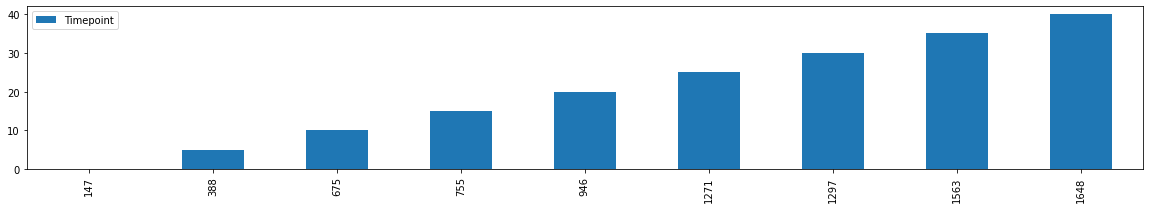

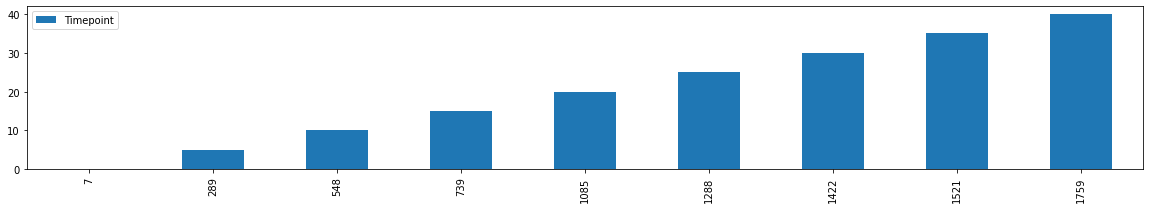

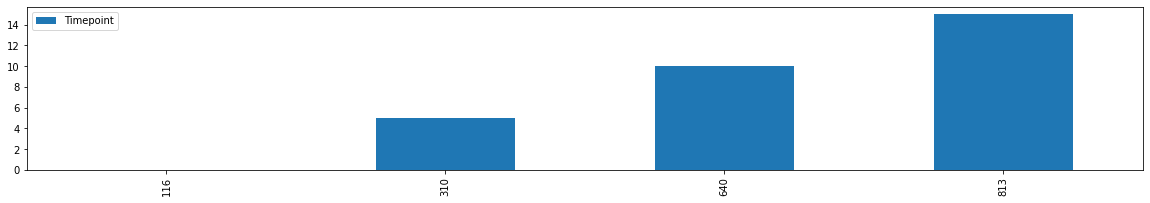

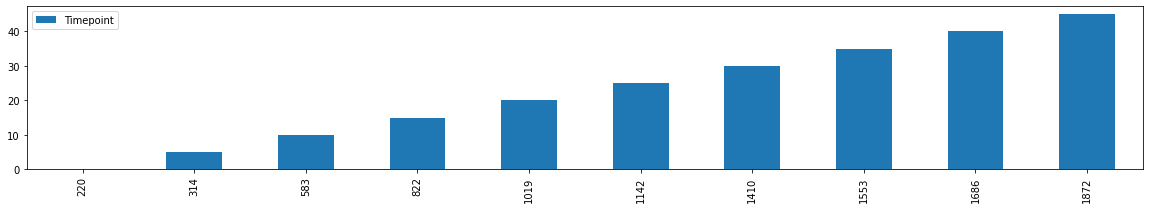

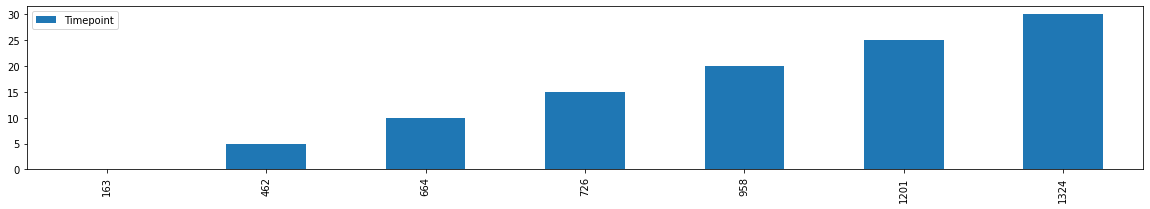

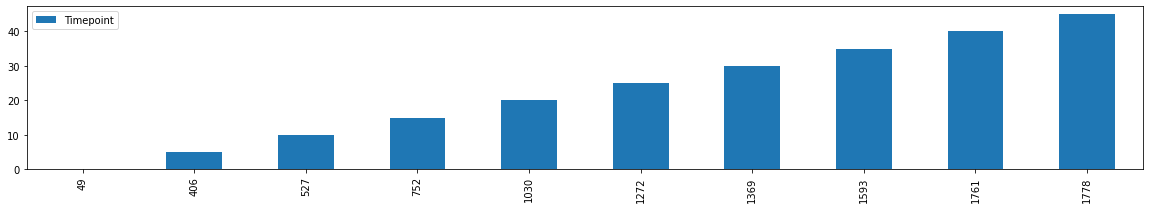

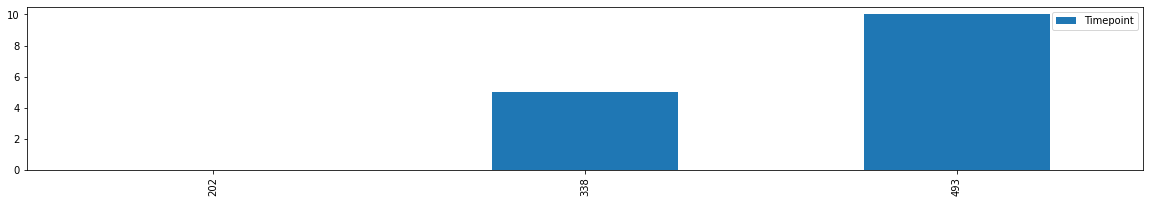

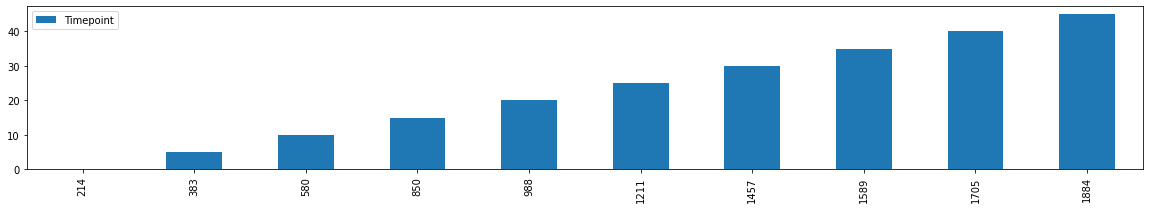

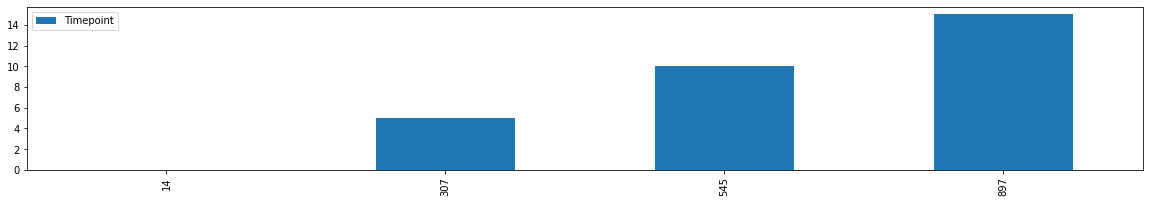

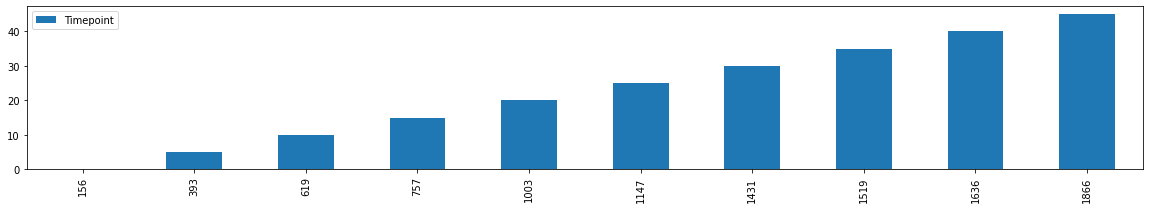

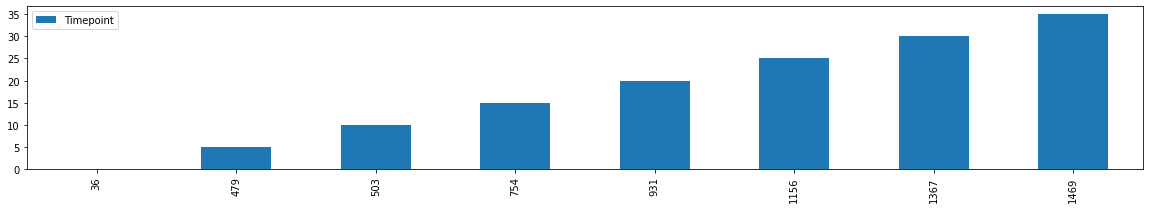

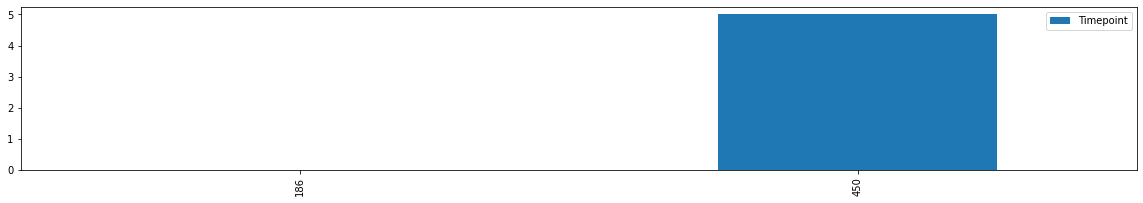

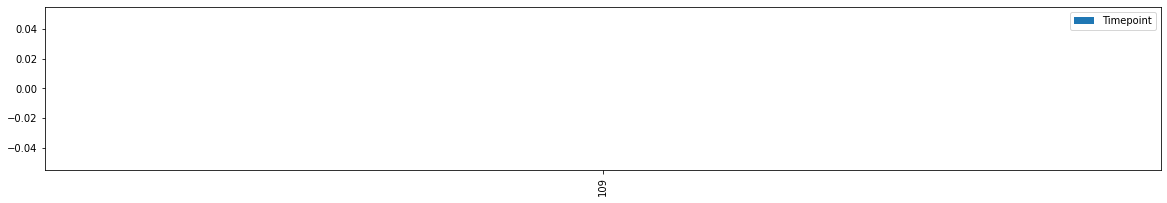

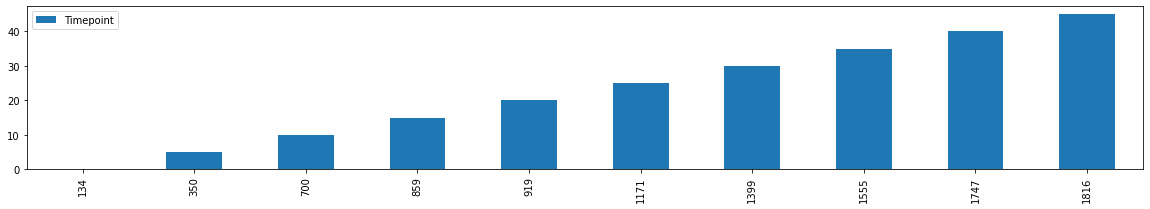

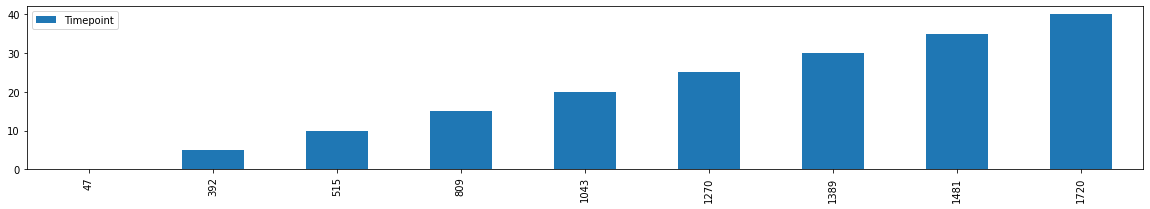

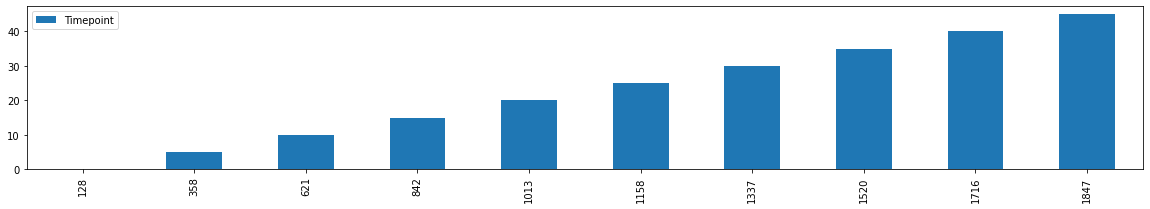

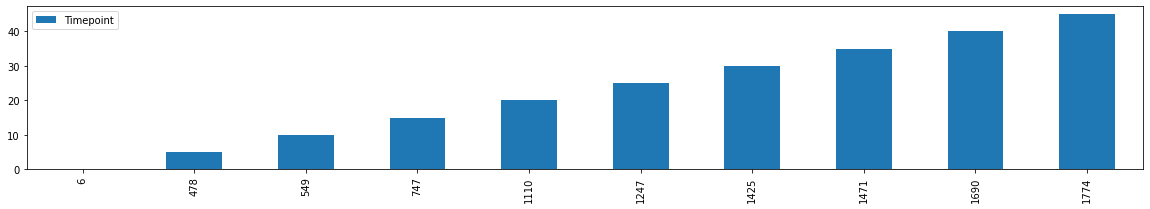

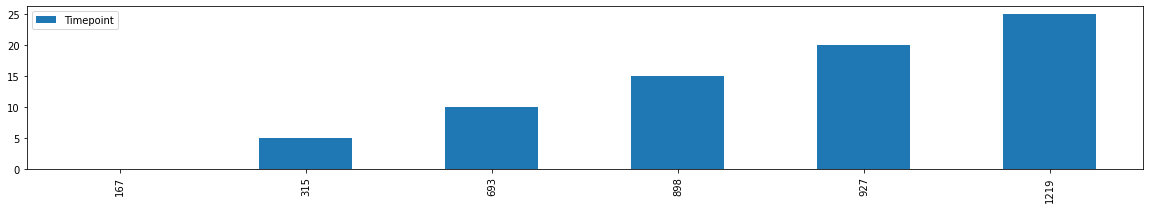

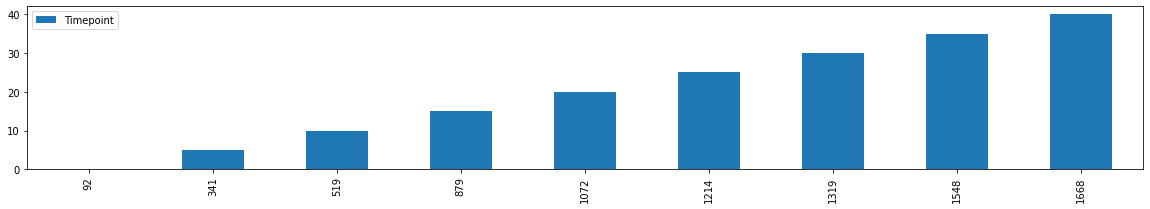

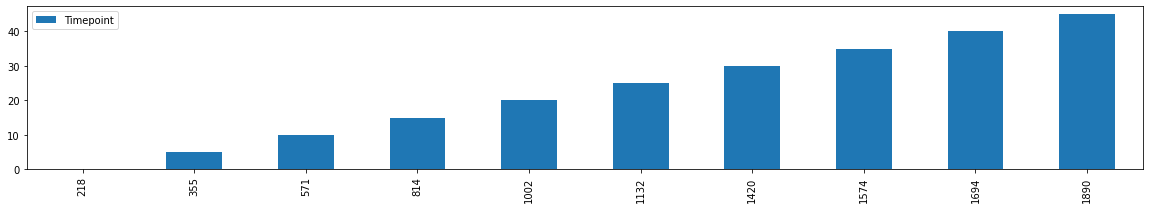

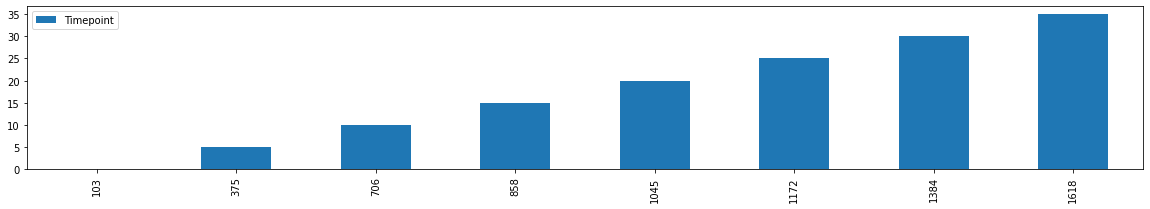

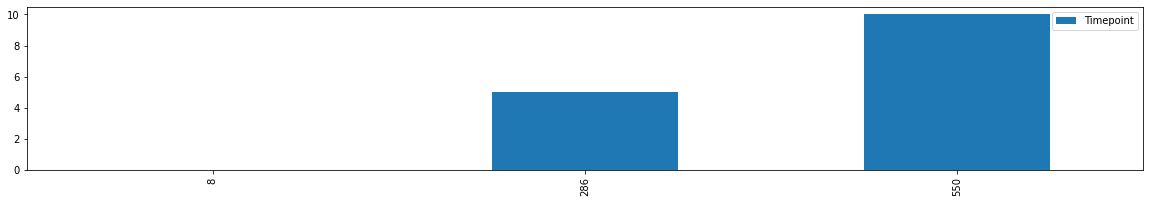

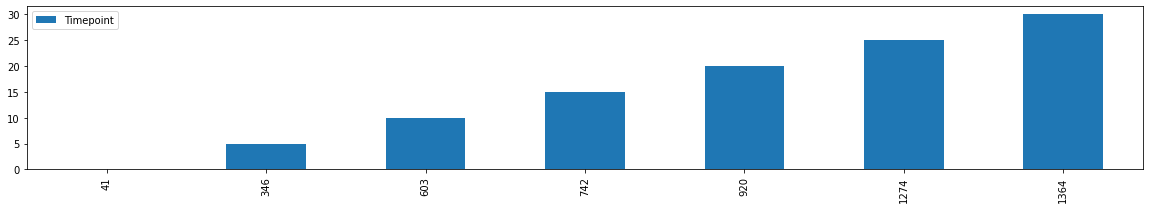

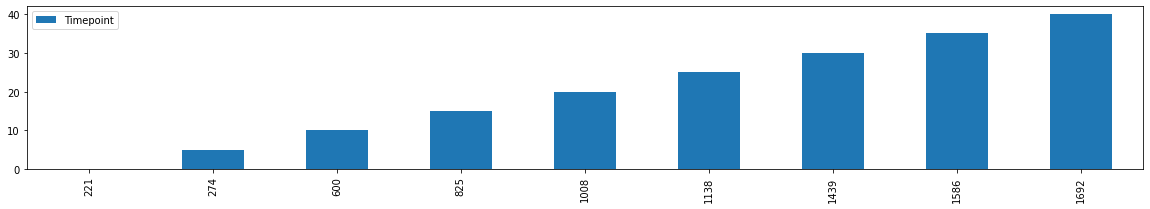

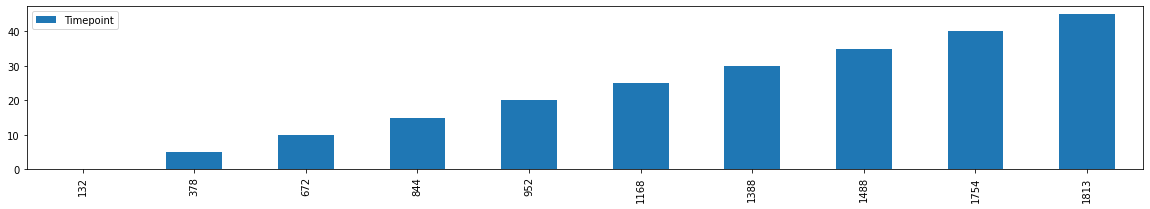

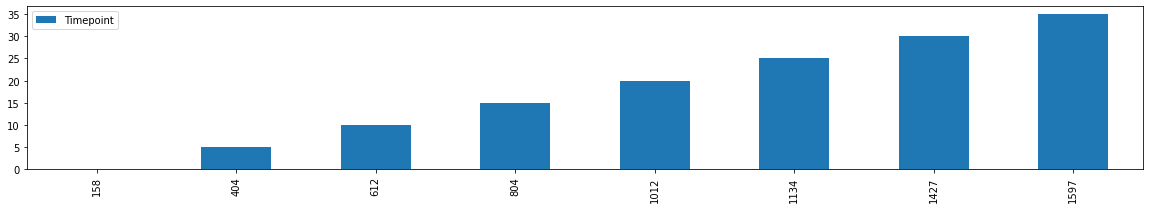

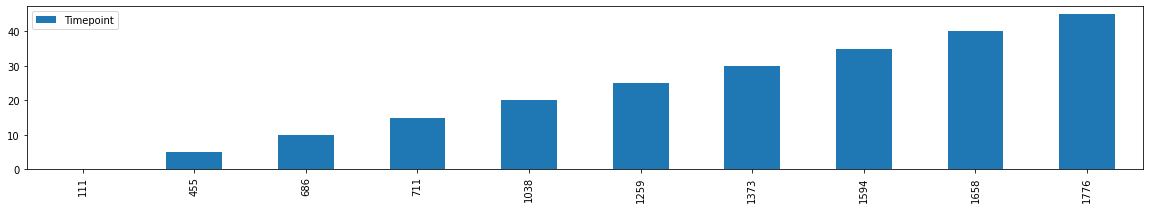

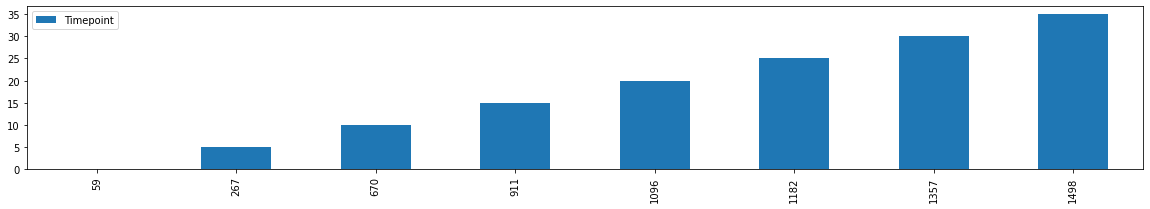

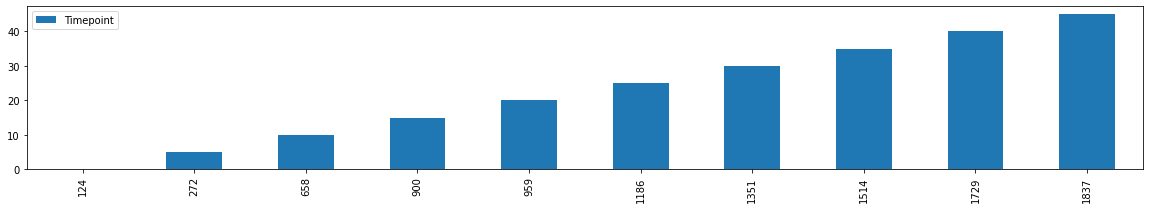

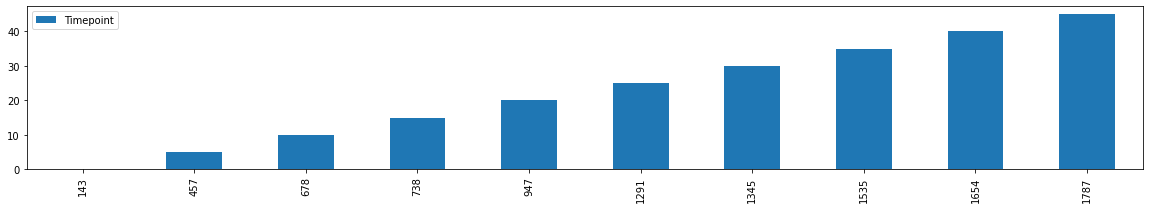

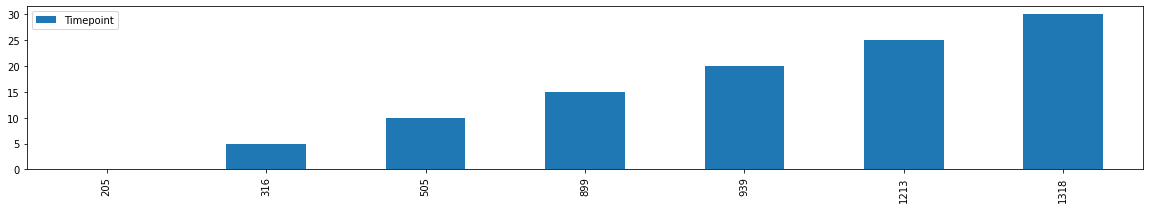

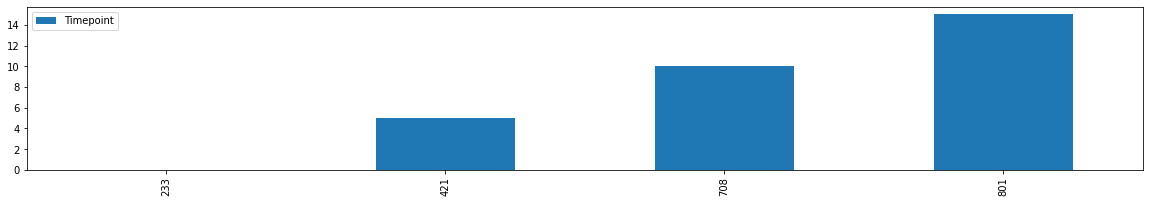

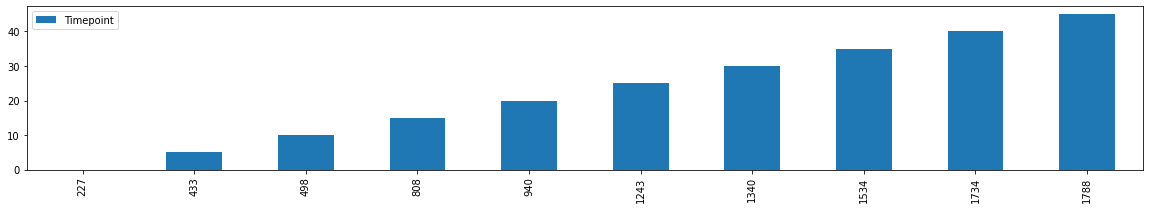

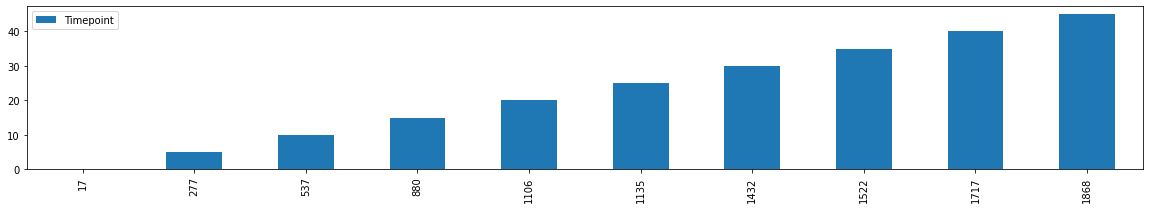

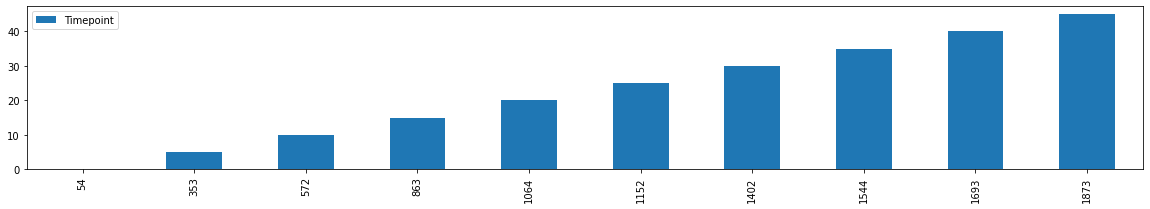

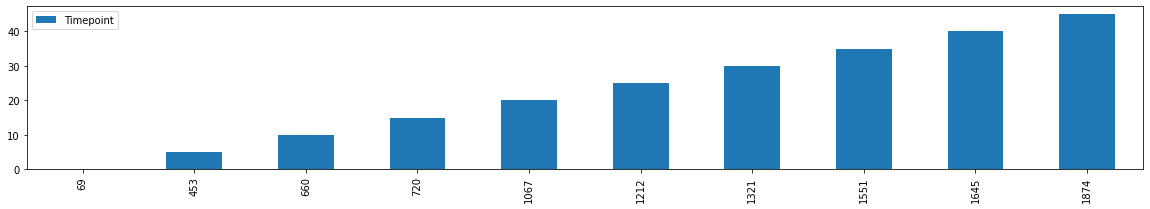

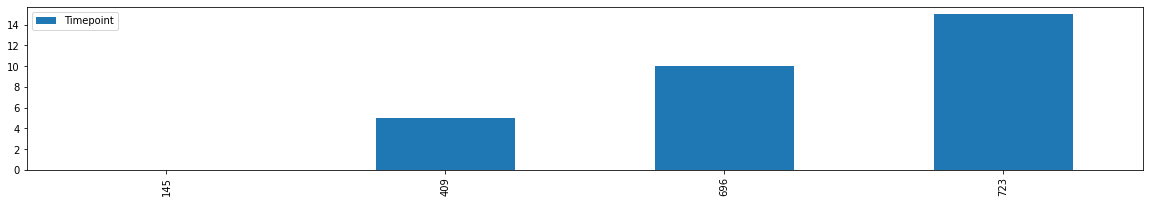

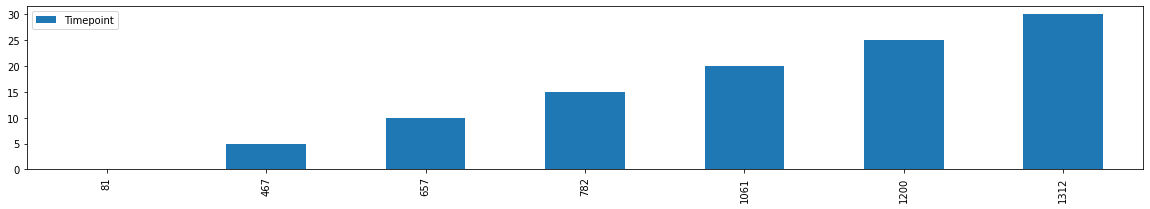

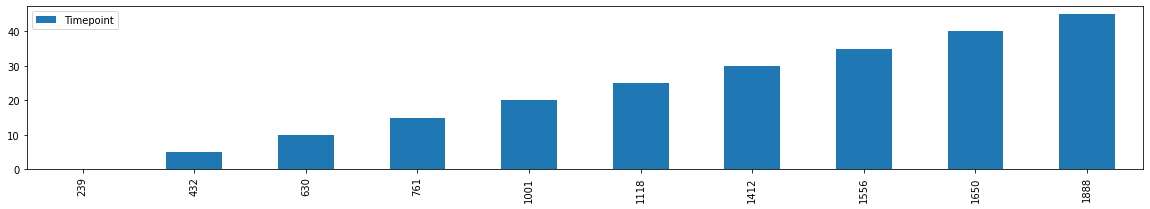

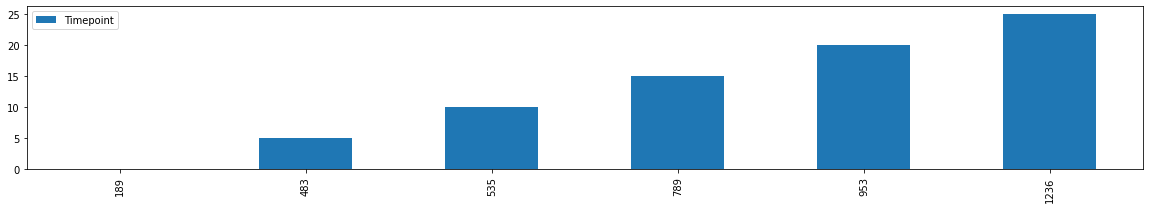

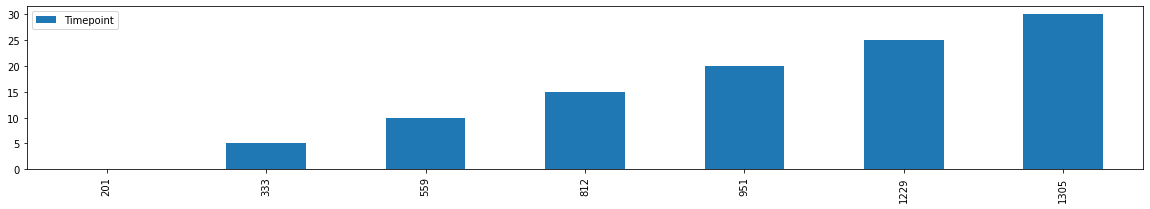

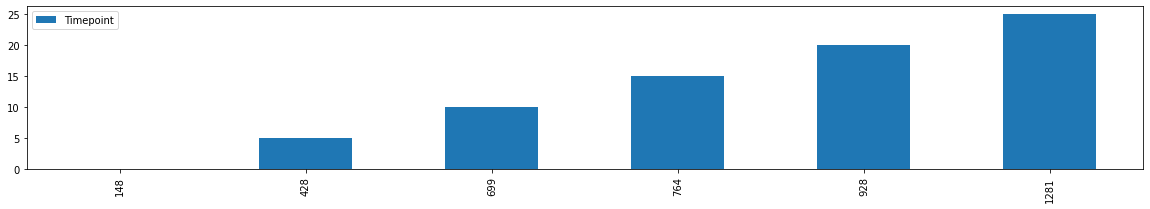

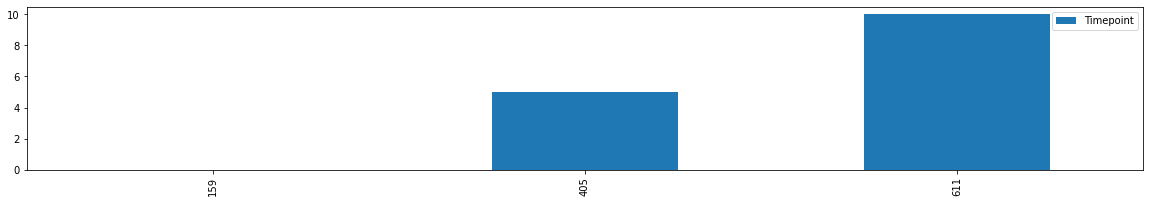

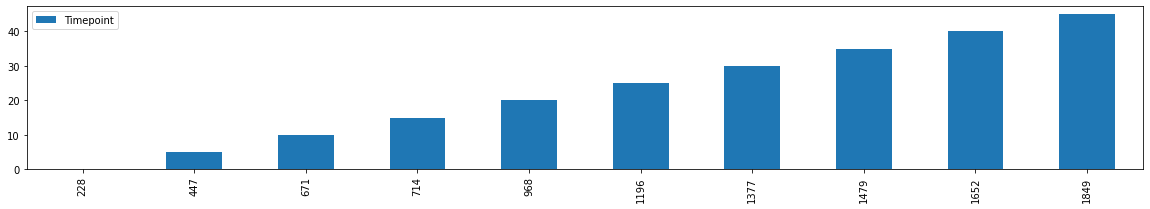

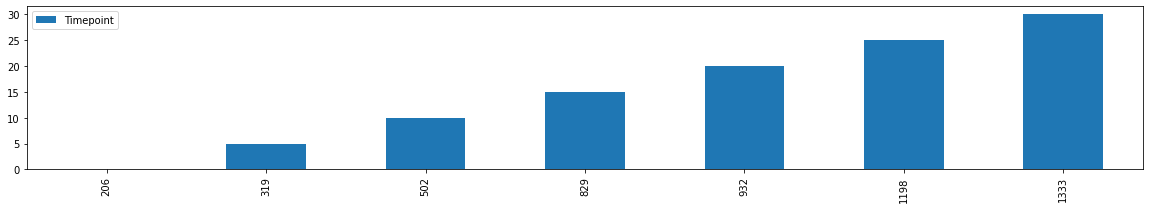

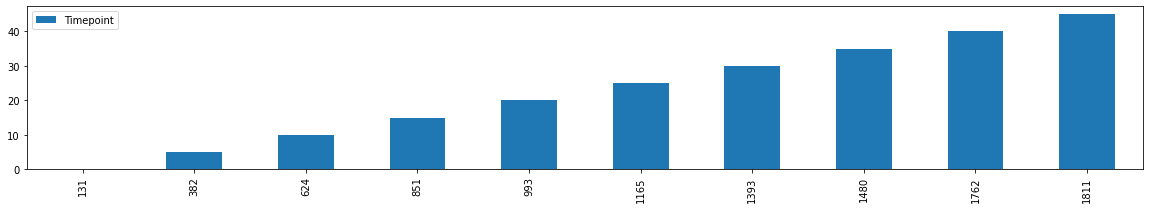

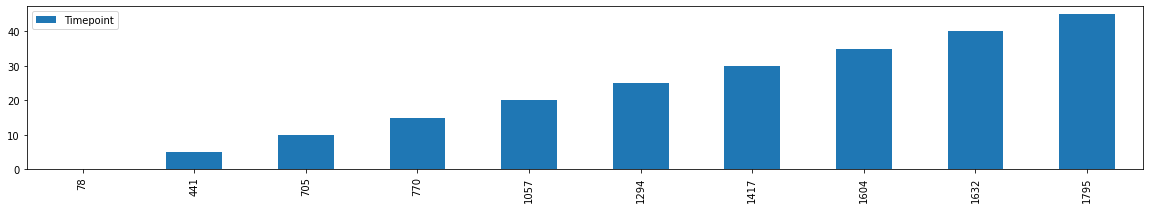

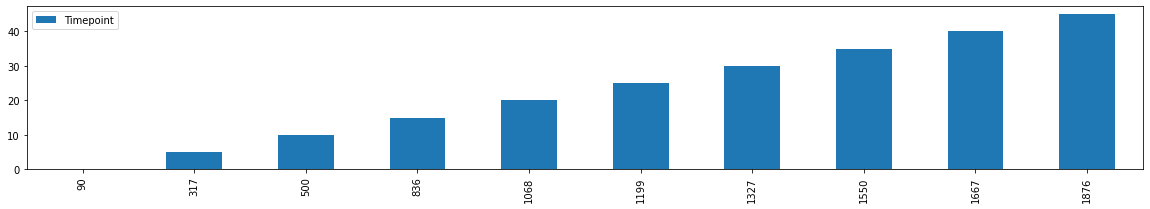

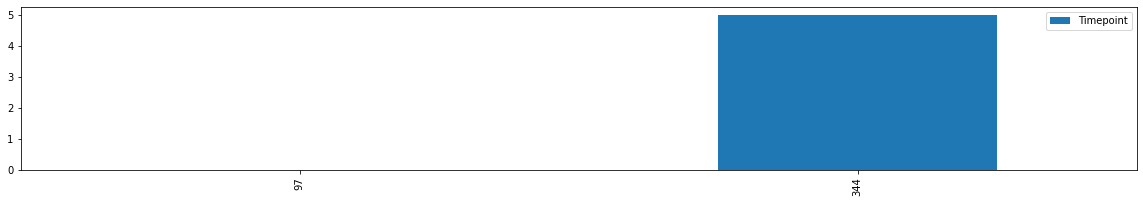

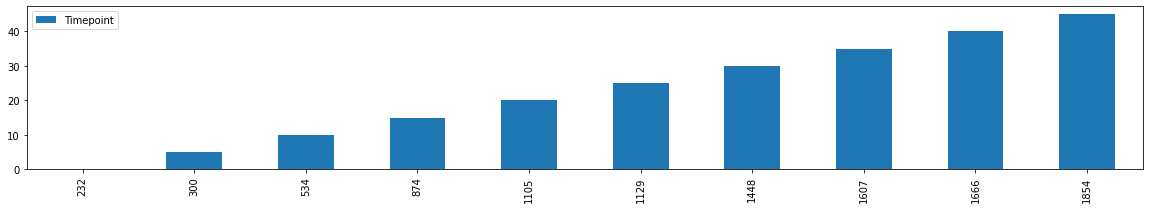

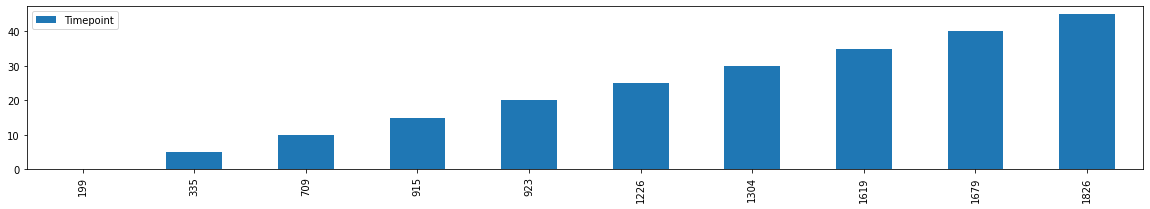

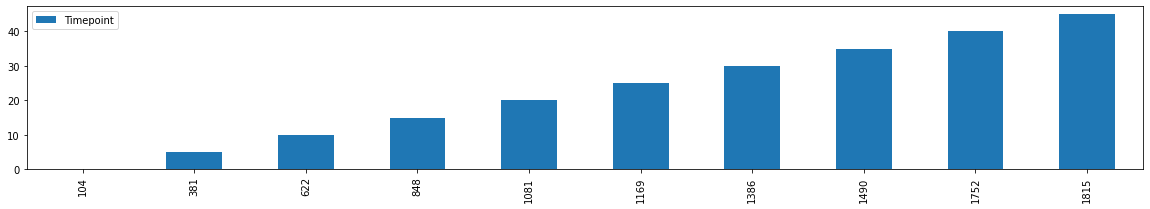

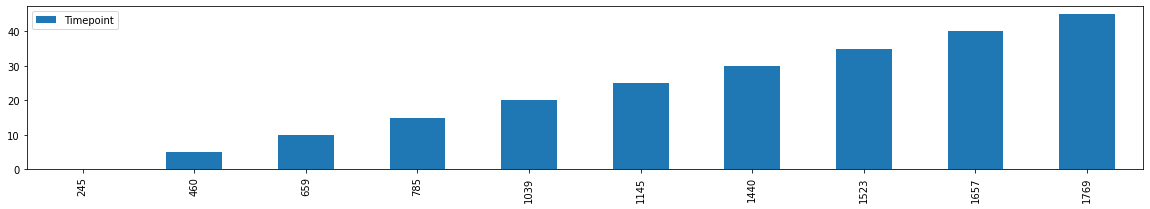

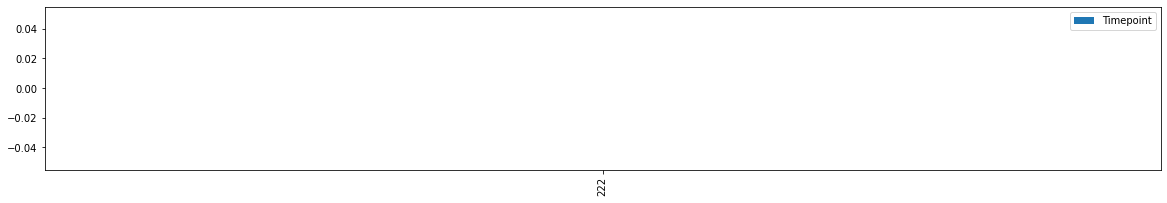

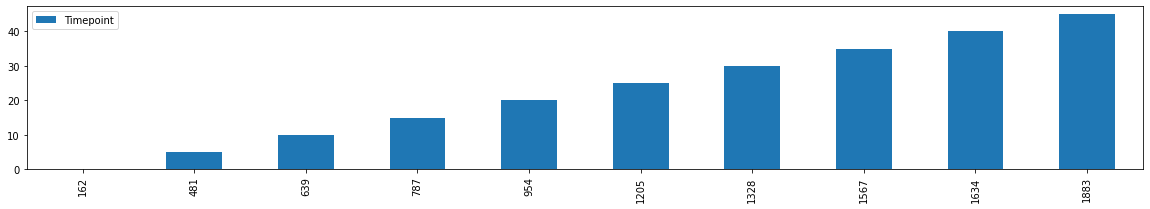

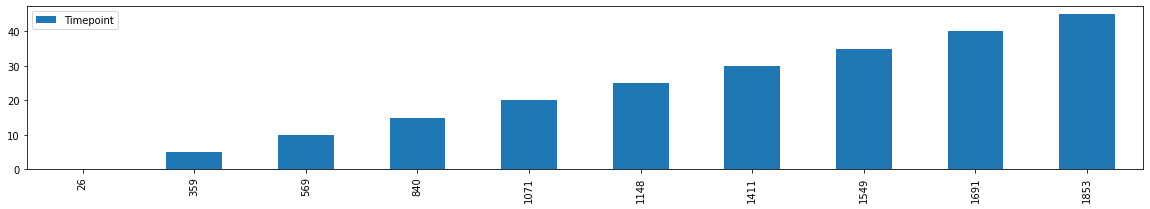

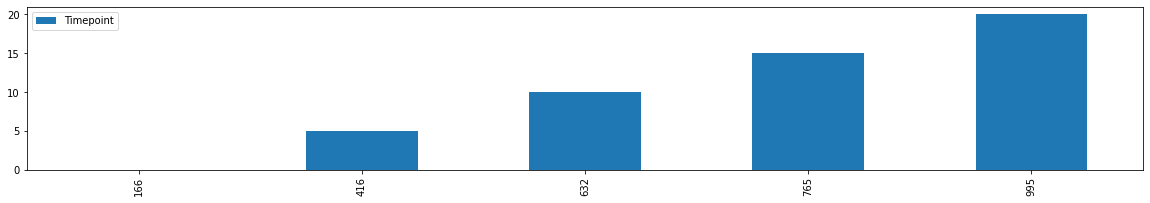

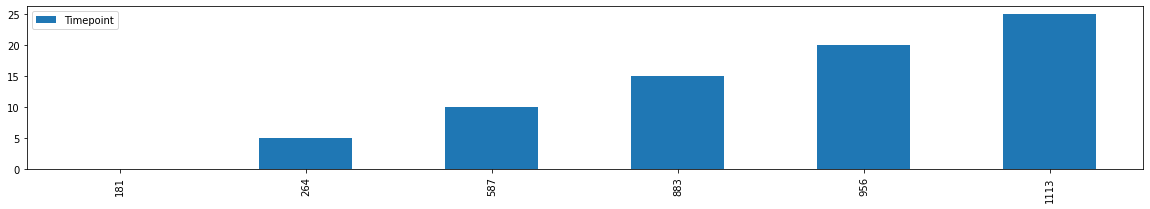

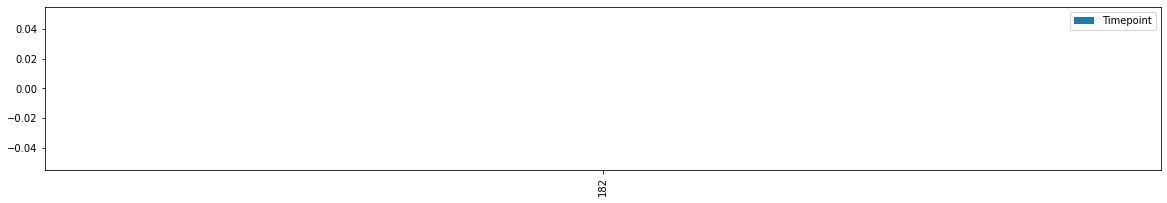

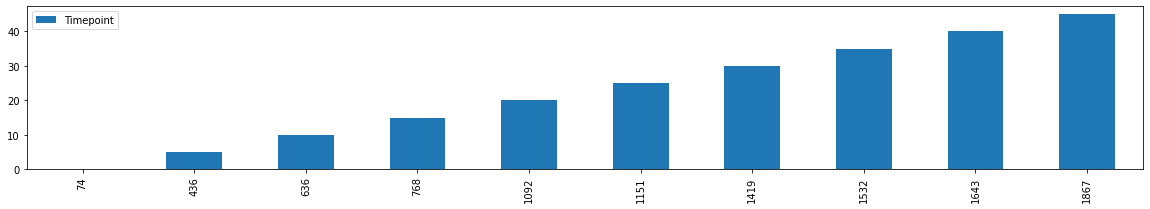

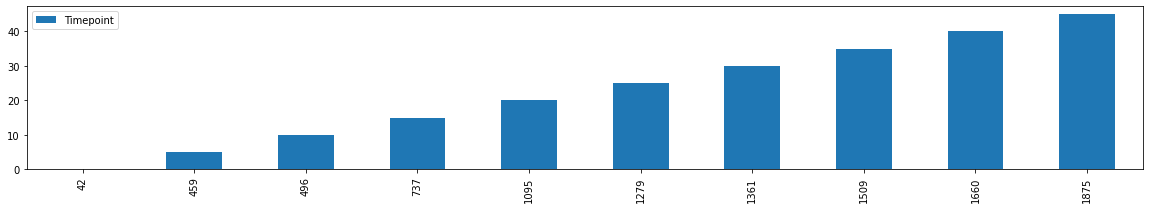

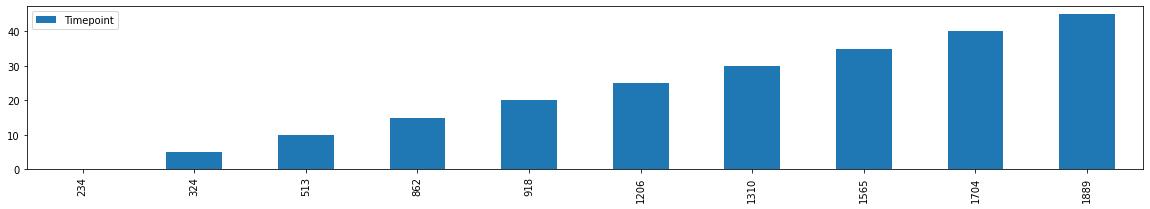

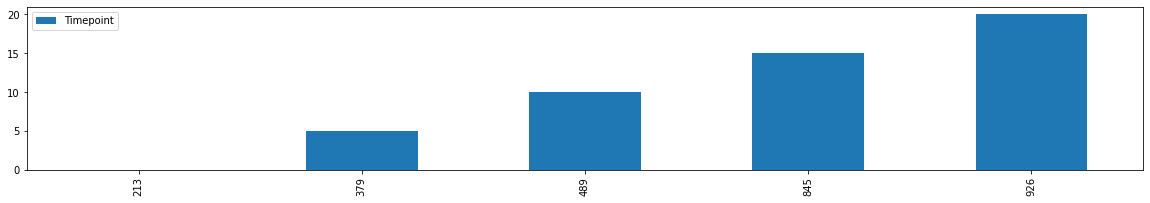

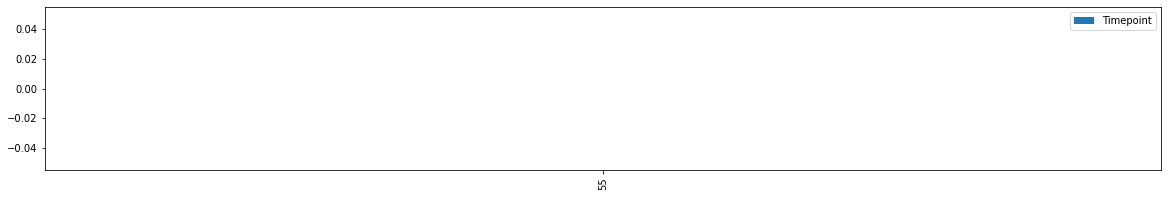

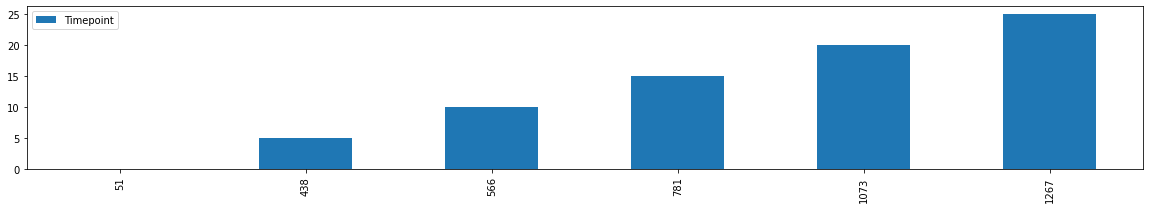

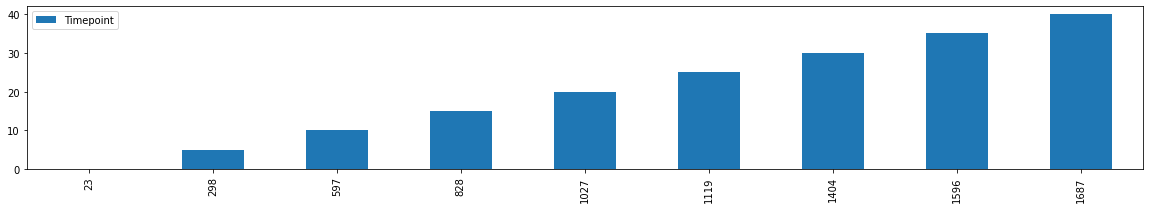

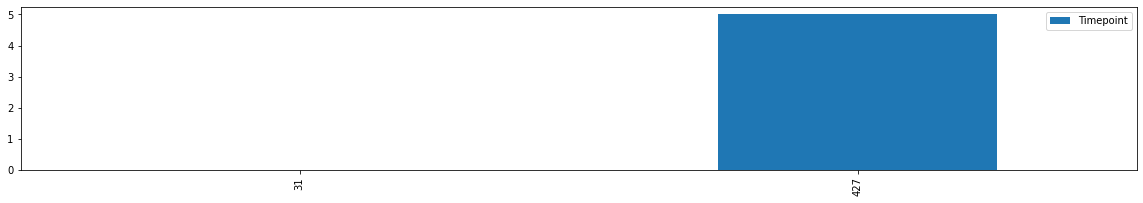

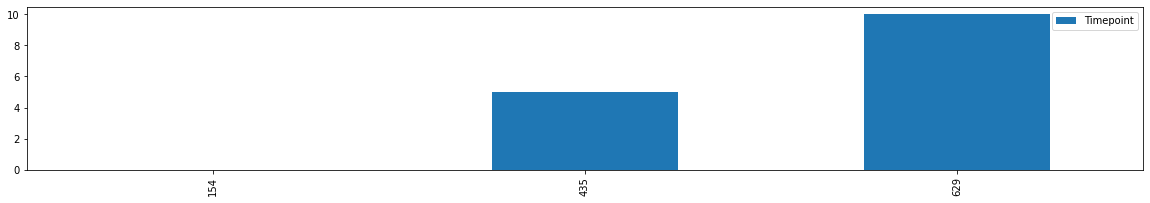

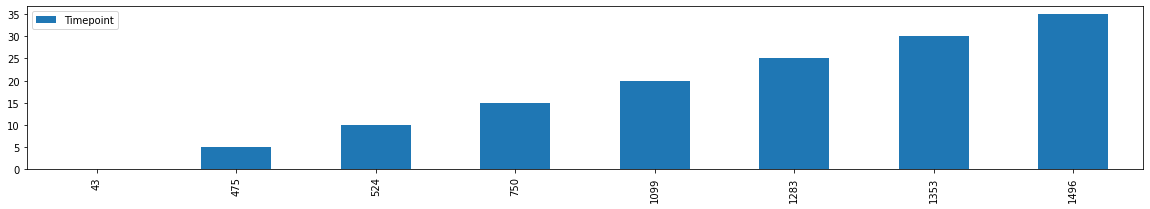

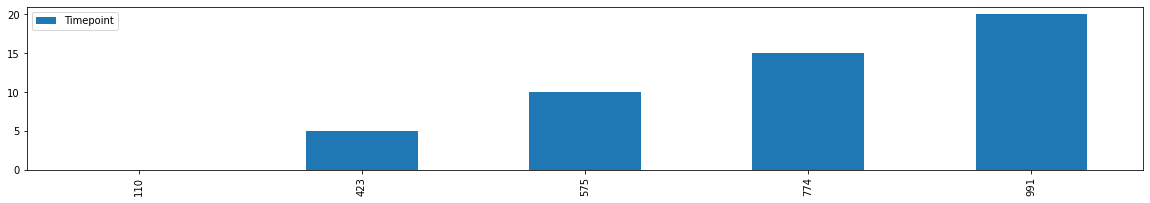

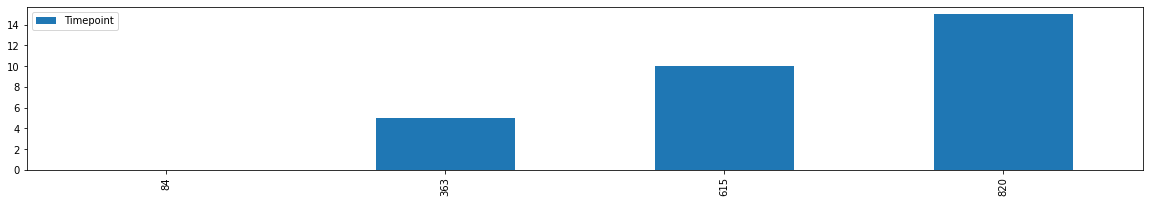

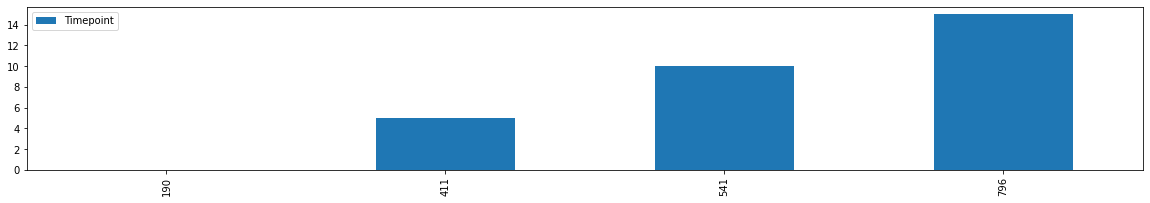

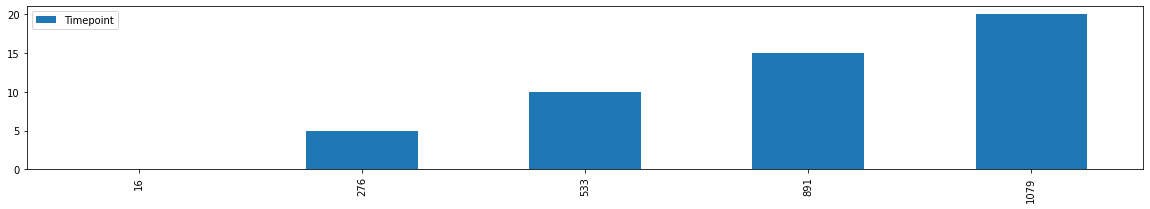

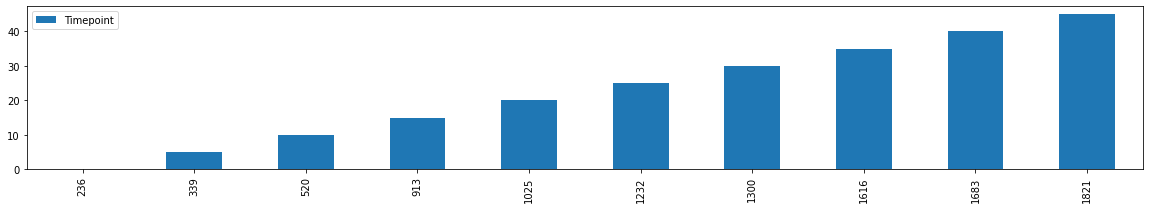

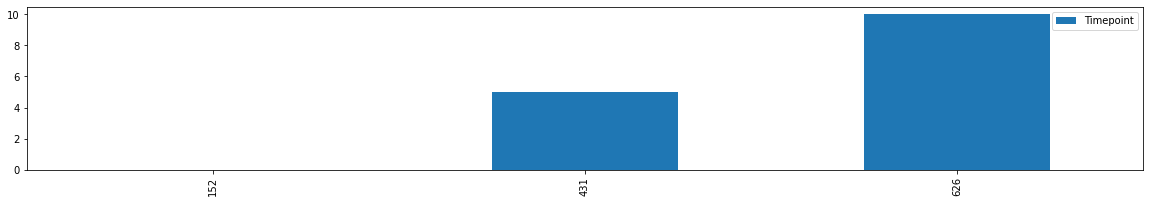

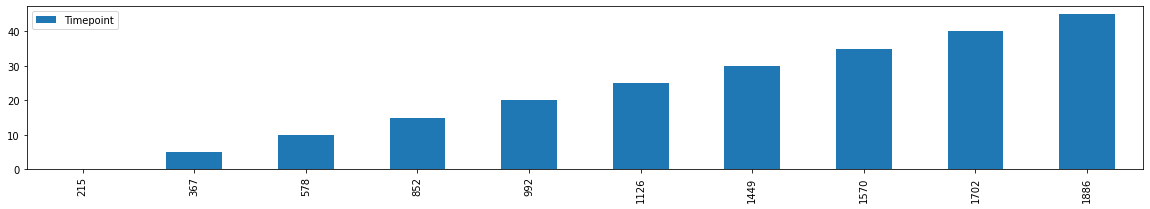

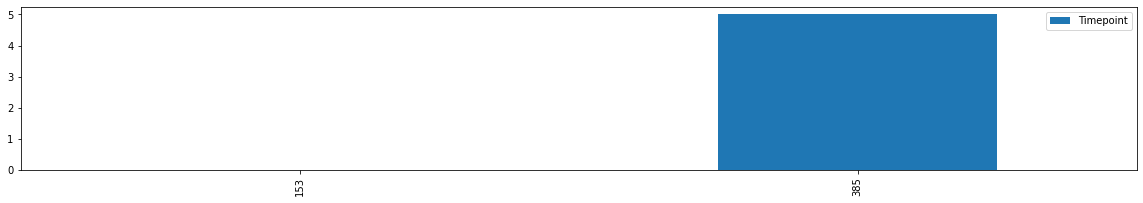

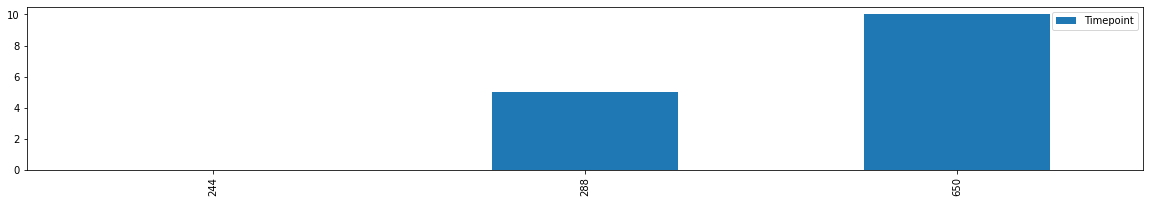

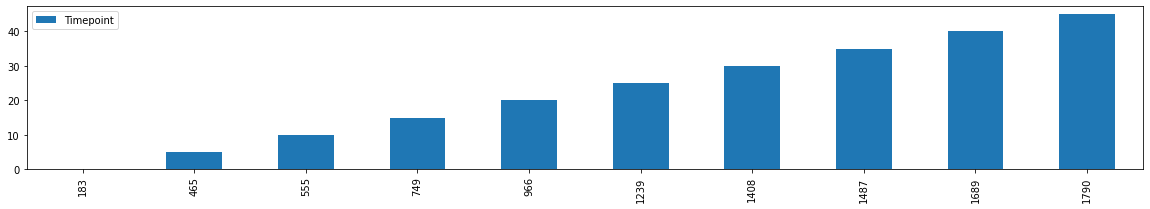

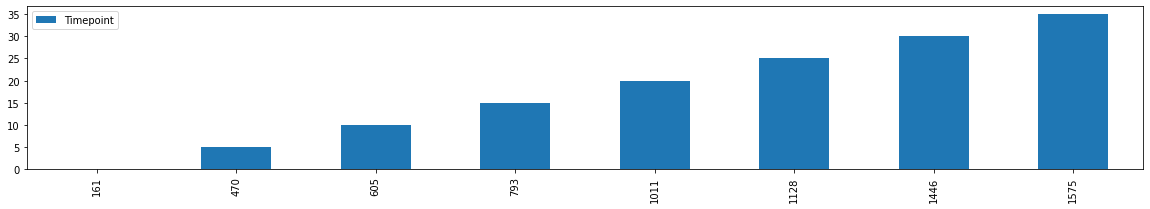

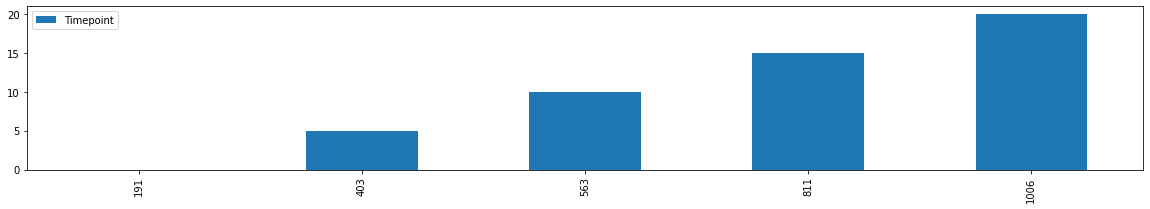

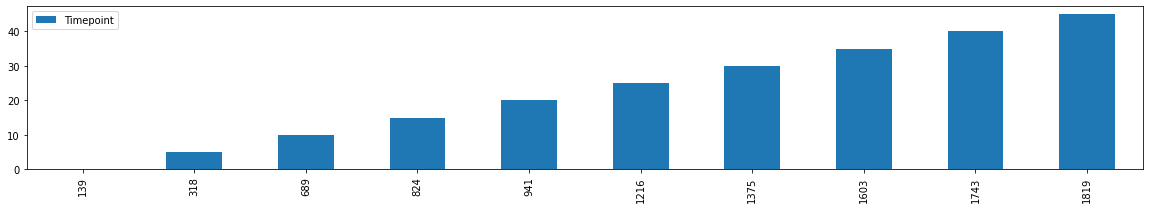

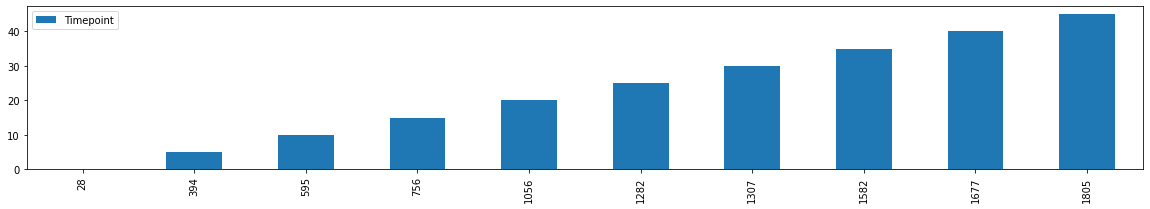

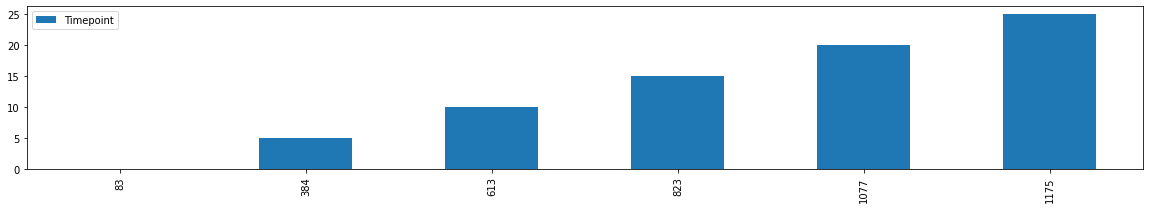

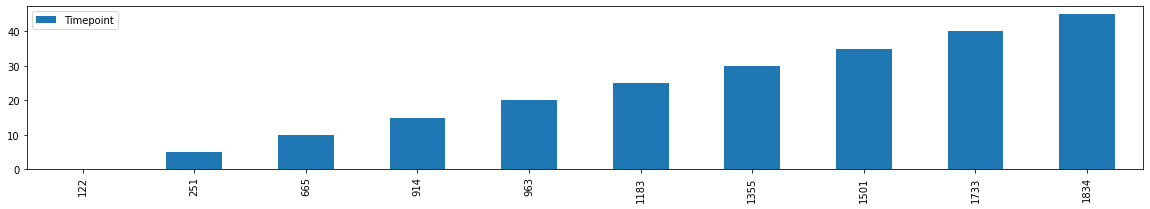

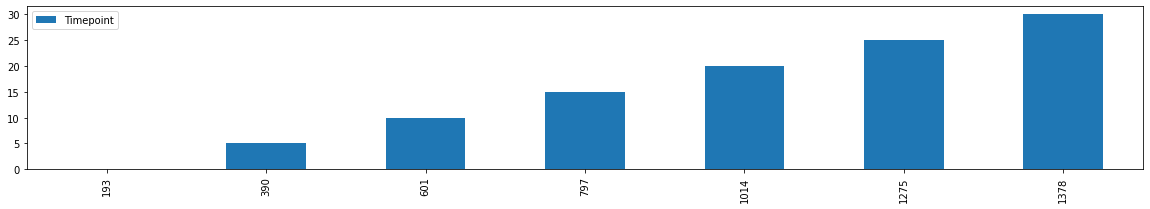

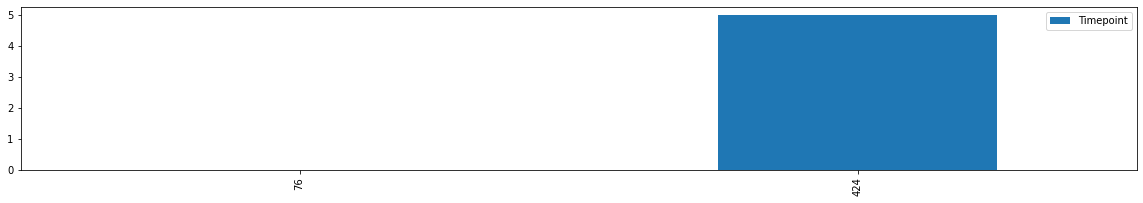

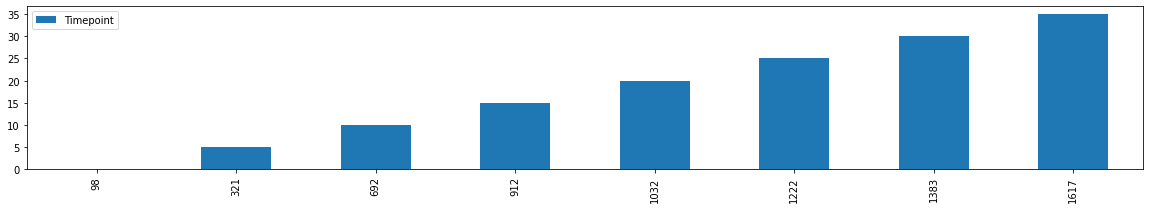

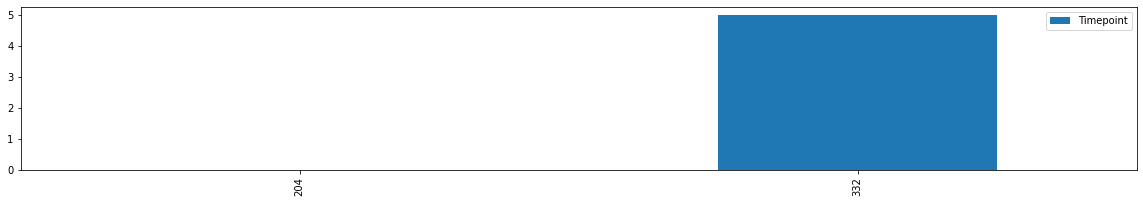

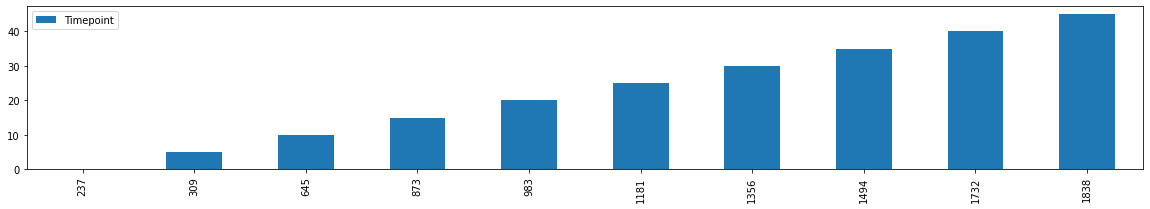

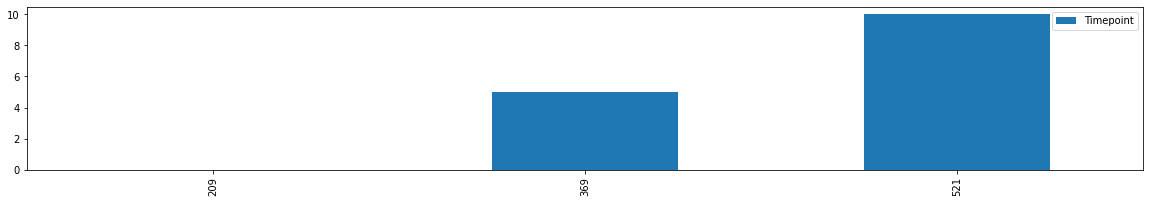

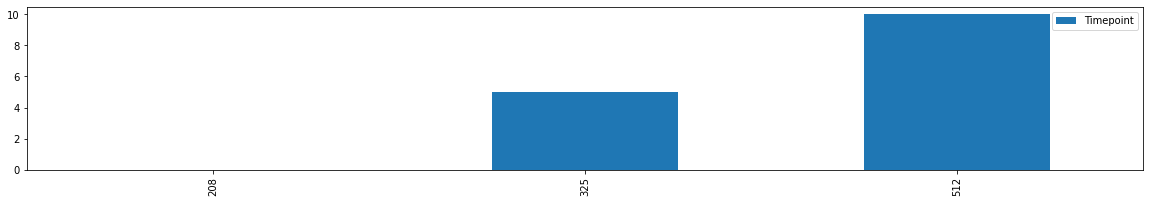

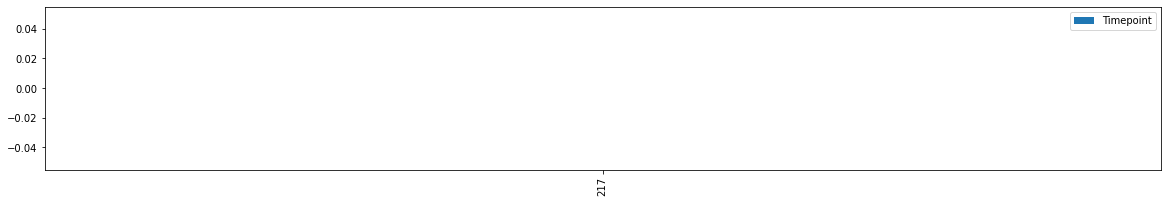

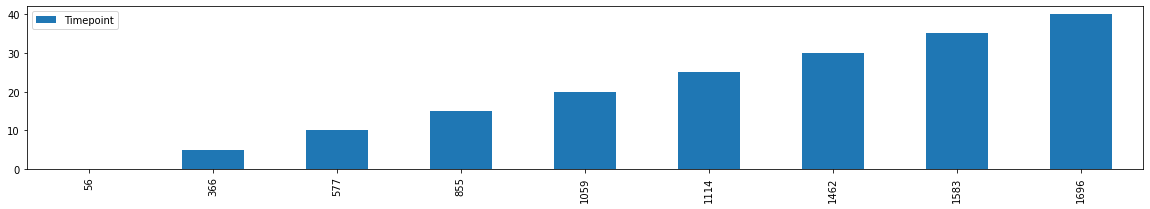

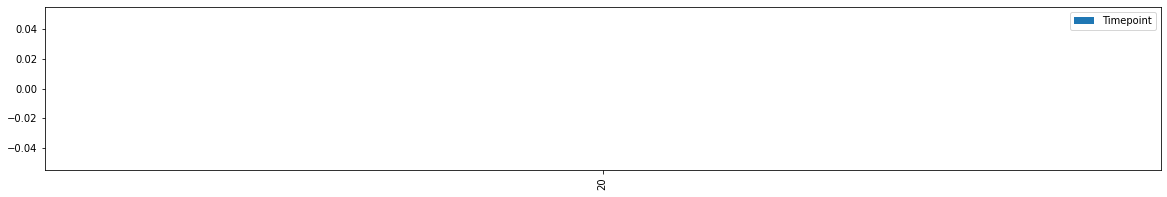

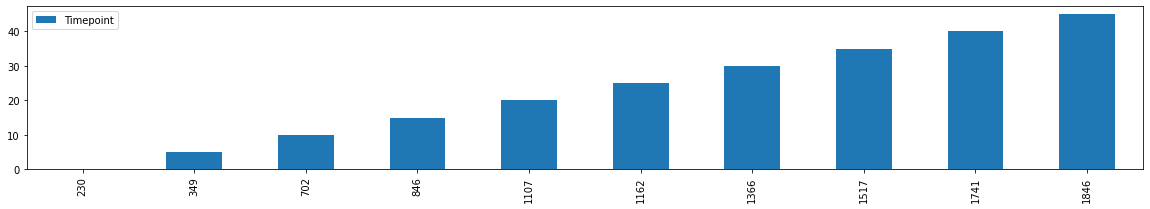

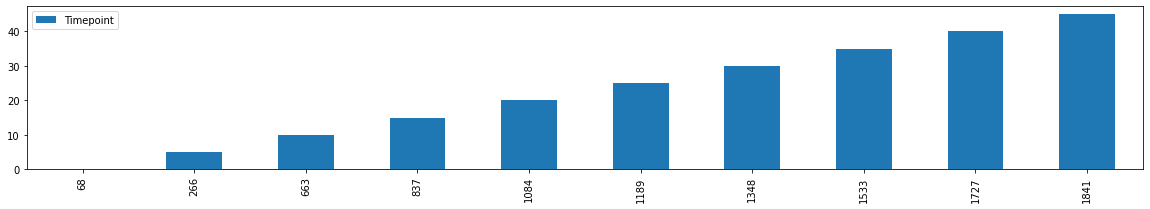

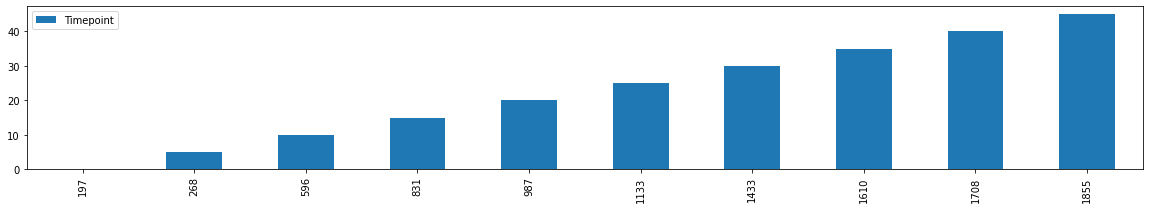

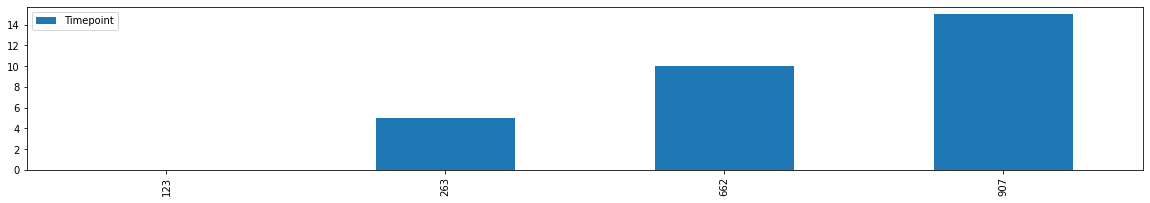

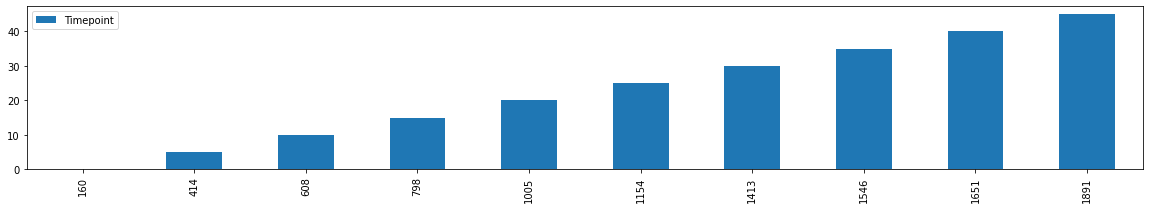

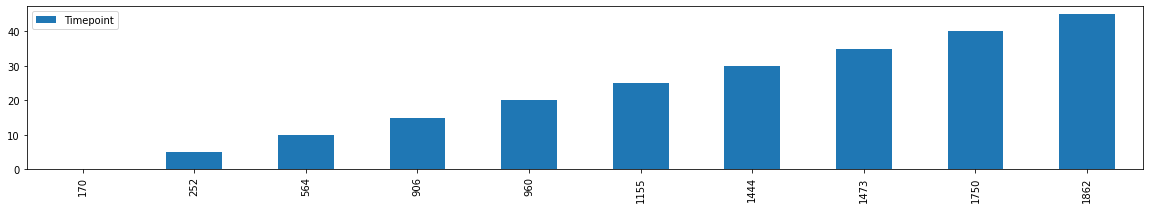

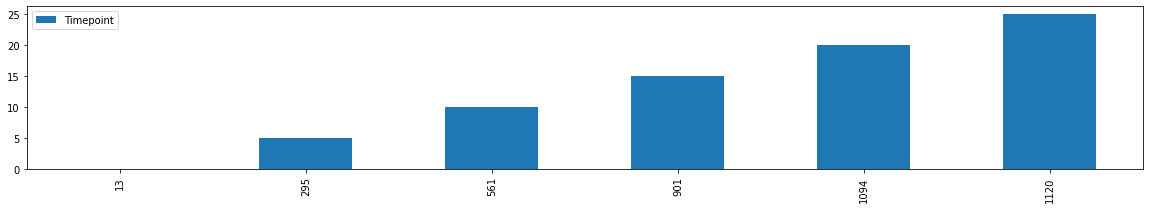

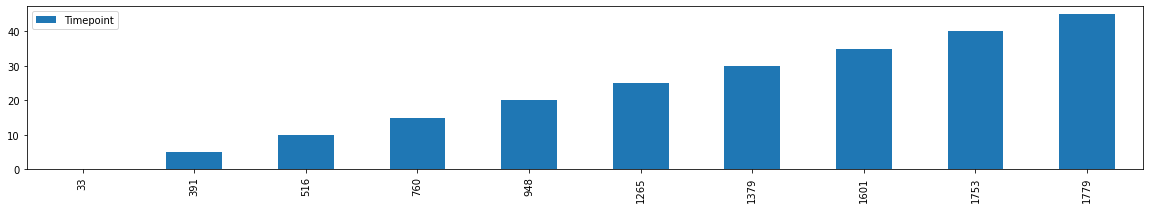

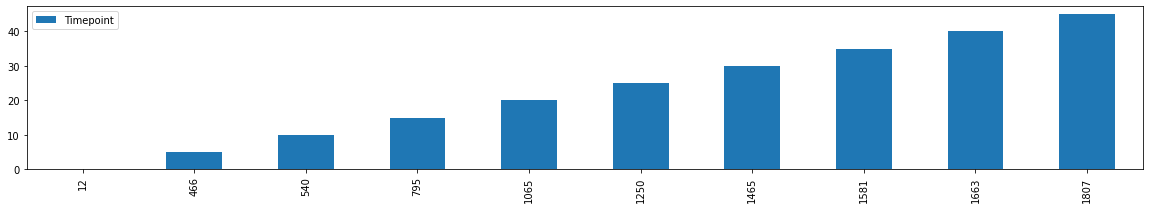

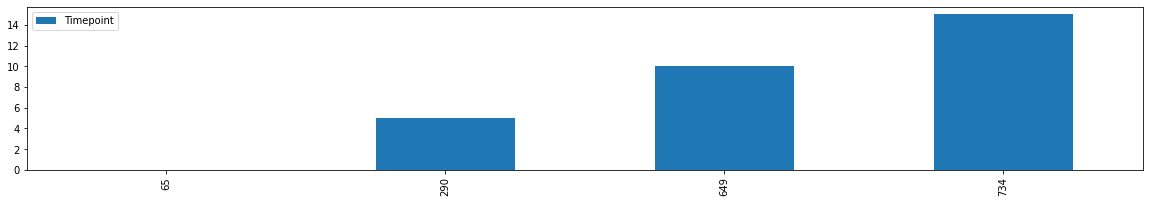

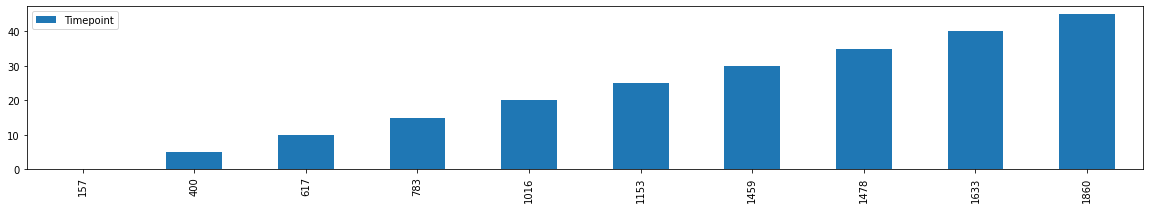

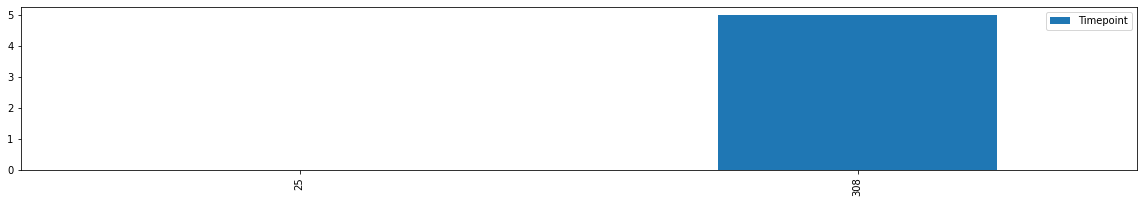

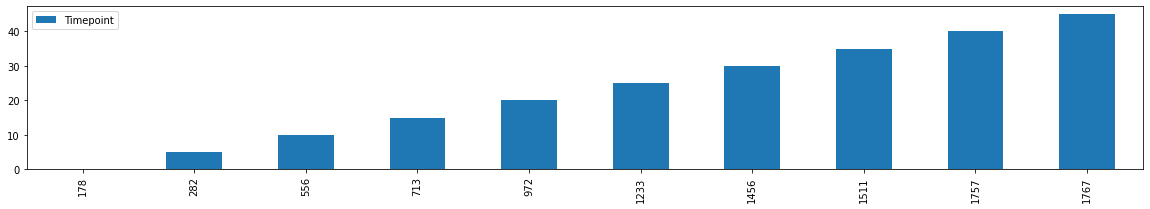

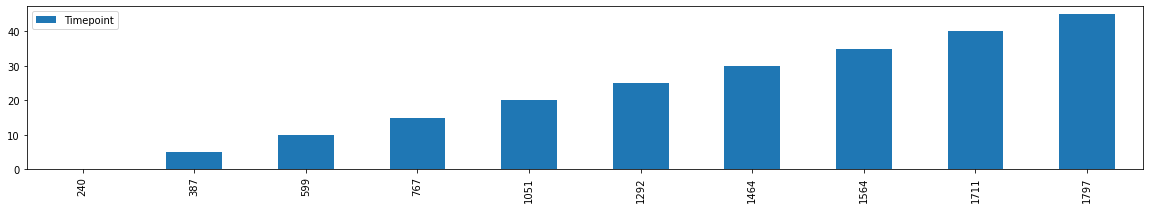

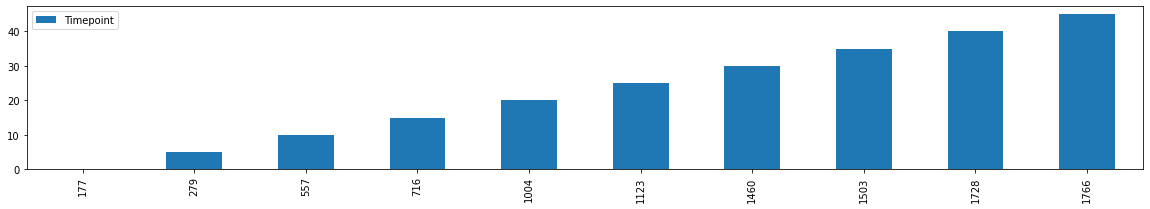

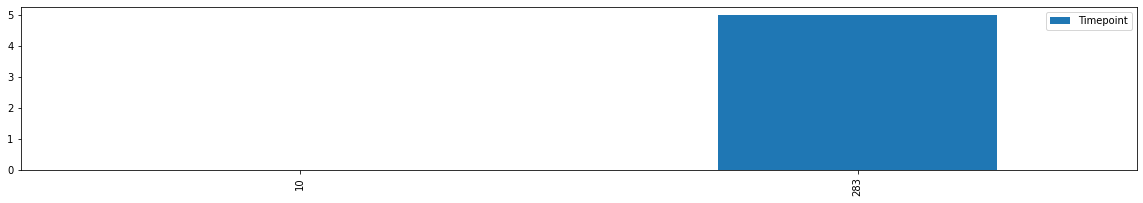

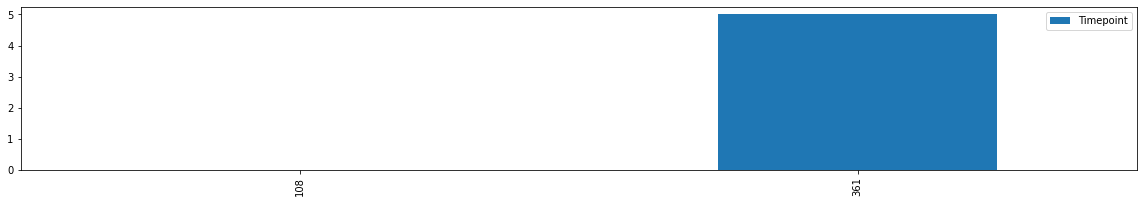

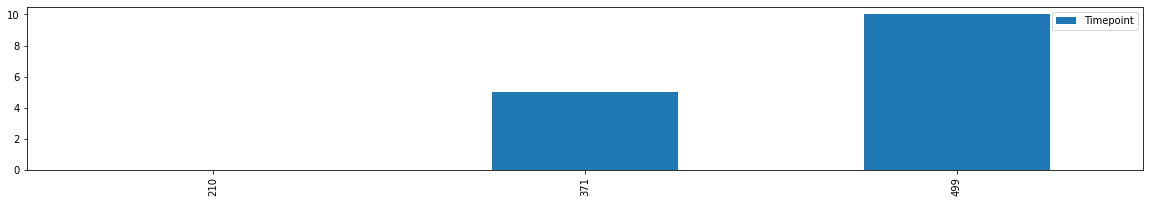

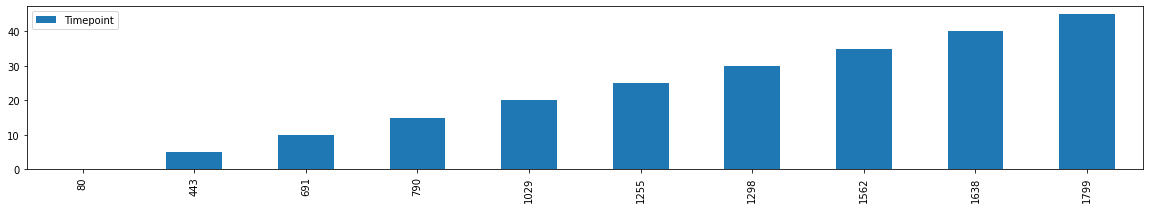

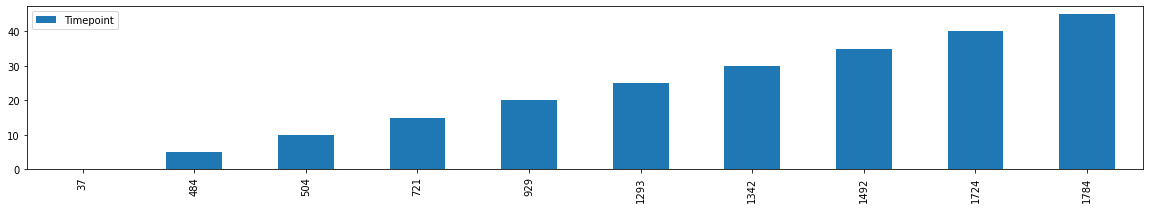

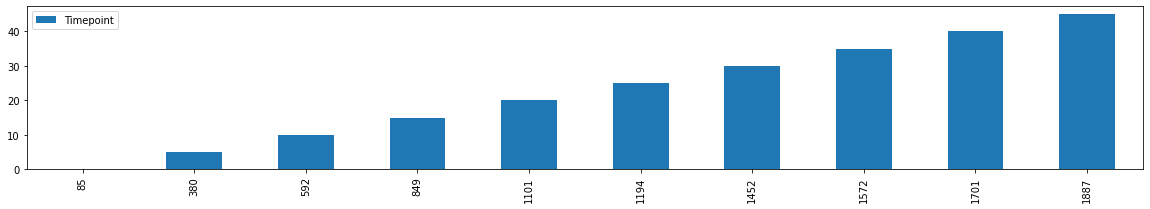

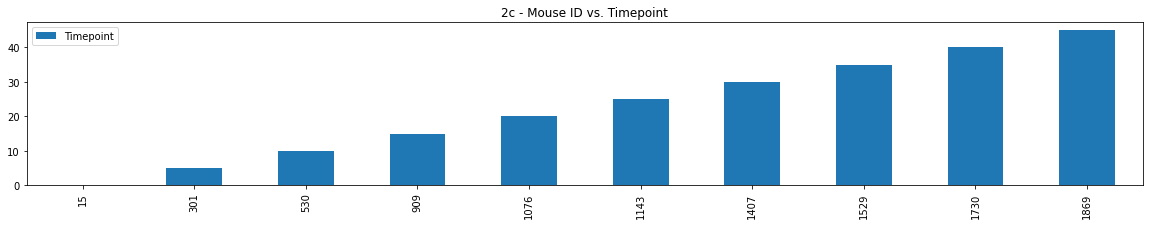

In [76]:
plot2c_mice_tp = plot1_mice_tp.groupby("Mouse ID")

plot2c_mice_tp.plot(kind="bar", figsize=(20,3))
plt.title("2c - Mouse ID vs. Timepoint")
plt.show()

In [77]:
plot2d_mice_tp = clean_df[["Mouse ID","Timepoint"]]
plot2d_mice_tp = plot2d_mice_tp.set_index("Timepoint")
#plot2d_mice_tp = plot2d_mice_tp.groupby("Timepoint")
plot2d_mice_tp.head()

Mouse ID
Timepoint         
0             b128
0             f932
0             g107
0             a457
0             c819

In [78]:
plot2d_mice_tp = clean_df[["Mouse ID","Timepoint"]]
plot2d_mice_tp = plot2d_mice_tp.groupby("Timepoint")
#plot2d_mice_tp = plot2d_mice_tp.groupby("Timepoint")
plot2d_mice_tp

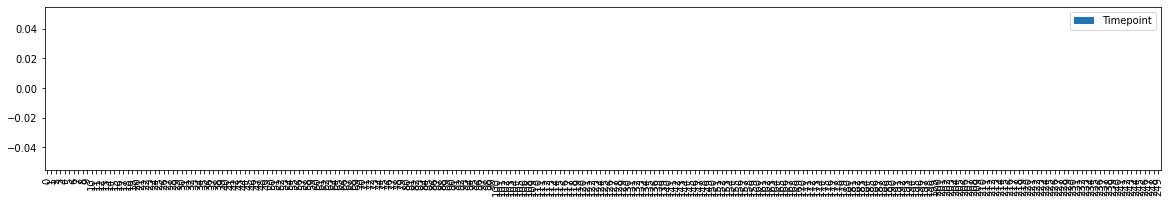

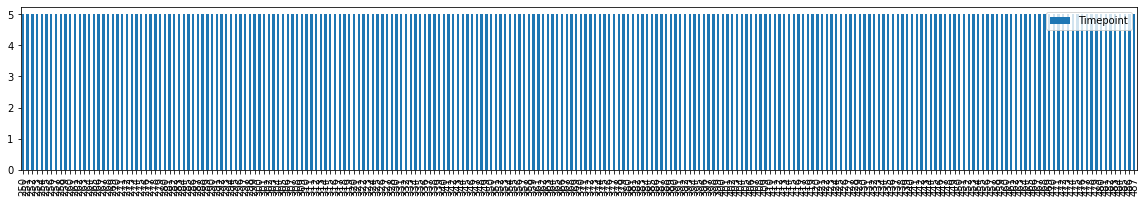

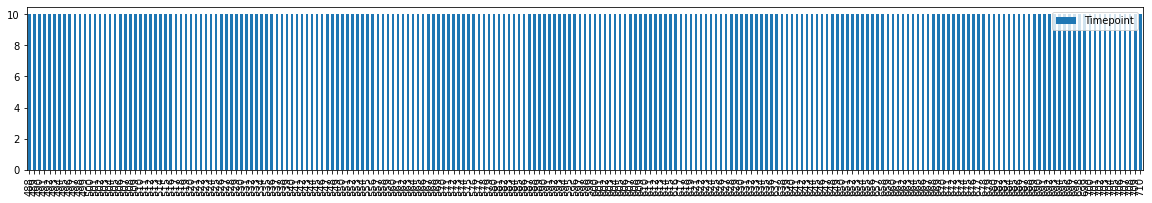

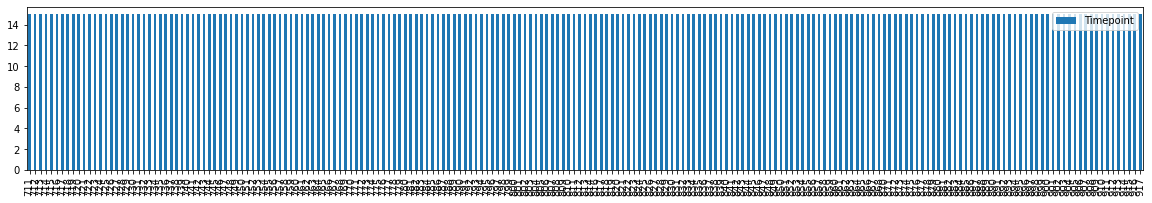

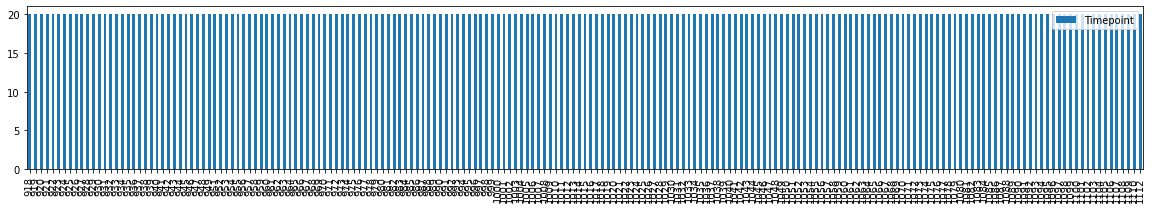

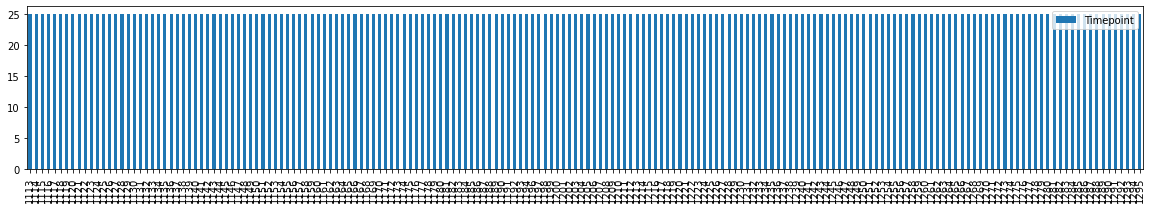

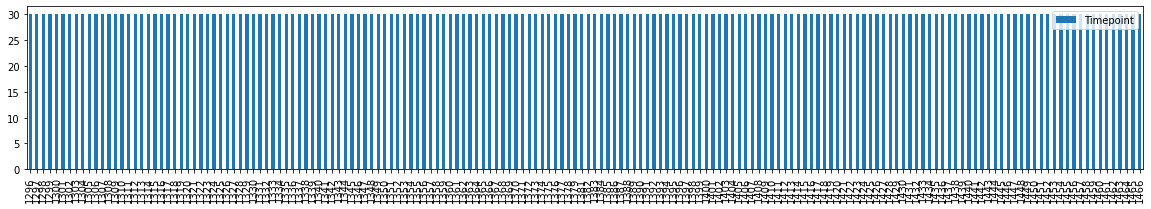

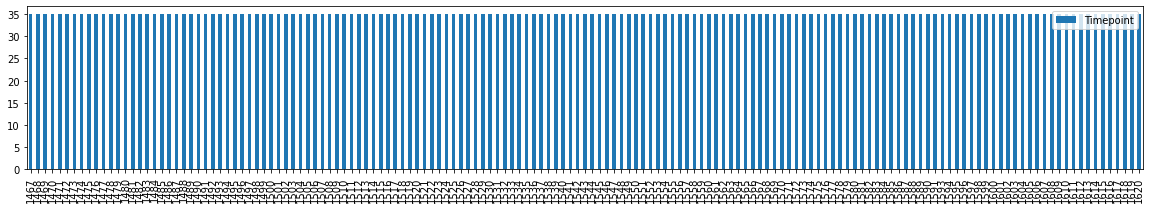

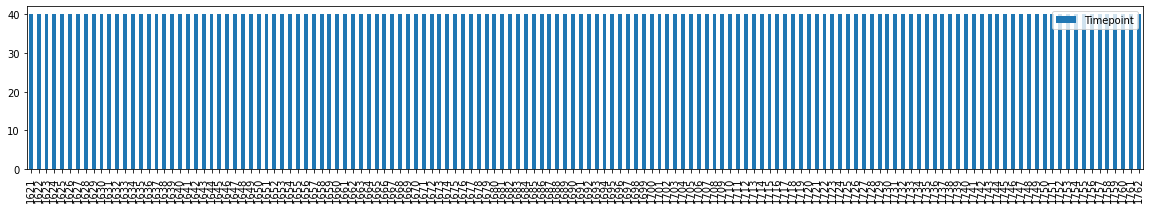

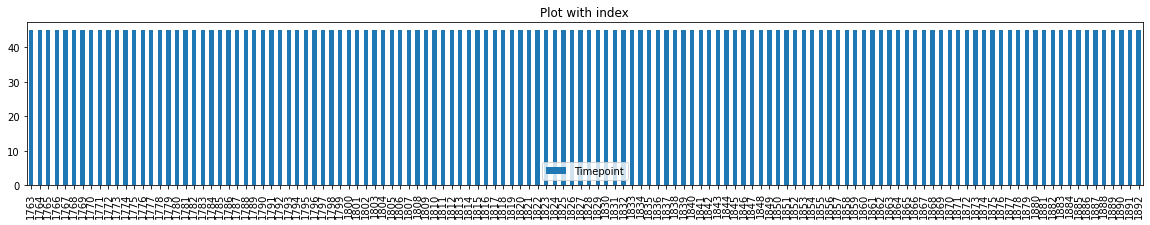

In [79]:
plot2d_mice_tp.plot(kind='bar', figsize=(20,3))
plt.title("Plot with index")
plt.show()

In [81]:
plot3a_unique = clean_df.groupby("Drug Regimen")
plot3a_unique.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       b128          0                45.0                 0    Capomulin   
1       f932          0                45.0                 0     Ketapril   
2       g107          0                45.0                 0     Ketapril   
3       a457          0                45.0                 0     Ketapril   
4       c819          0                45.0                 0     Ketapril   
5       h246          0                45.0                 0     Ketapril   
9       f993          0                45.0                 0     Naftisol   
10      z234          0                45.0                 0     Naftisol   
11      b559          0                45.0                 0     Naftisol   
13      x930          0                45.0                 0     Naftisol   
14      o725          0                45.0                 0     Naftisol   
29      c326          0                45.0                 0    Infubinol   
30      c139          0                45.0                 0    Infubinol   
31      v339          0                45.0                 0    Infubinol   
32      a577          0                45.0                 0    Infubinol   
33      y163          0                45.0                 0    Infubinol   
57      f234          0                45.0                 0     Stelasyn   
58      c458          0                45.0                 0     Ramicane   
59      q610          0                45.0                 0     Ramicane   
60      j913          0                45.0                 0     Ramicane   
61      a411          0                45.0                 0     Ramicane   
62      a444          0                45.0                 0     Ramicane   
68      x402          0                45.0                 0     Stelasyn   
82      a492          0                45.0                 0     Stelasyn   
83      w540          0                45.0                 0     Stelasyn   
84      v764          0                45.0                 0     Stelasyn   
114     f394          0                45.0                 0    Zoniferol   
115     c264          0                45.0                 0    Zoniferol   
116     n967          0                45.0                 0    Zoniferol   
117     f545          0                45.0                 0    Zoniferol   
118     k894          0                45.0                 0    Zoniferol   
136     n630          0                45.0                 0     Propriva   
139     w350          0                45.0                 0     Propriva   
141     a897          0                45.0                 0      Placebo   
142     j235          0                45.0                 0      Placebo   
143     q787          0                45.0                 0      Placebo   
144     a262          0                45.0                 0      Placebo   
145     r850          0                45.0                 0      Placebo   
167     p310          0                45.0                 0     Propriva   
168     a699          0                45.0                 0     Propriva   
169     k603          0                45.0                 0     Propriva   
170     x822          0                45.0                 0     Ceftamin   
171     l558          0                45.0                 0     Ceftamin   
172     l733          0                45.0                 0     Ceftamin   
173     f436          0                45.0                 0     Ceftamin   
174     l490          0                45.0                 0     Ceftamin   
226     j246          0                45.0                 0    Capomulin   
227     r554          0                45.0                 0    Capomulin   
228     s185          0                45.0                 0    Capomulin   
229     b742          0                45.0                 0    Capomulin   

        Sex  Age_months  

In [57]:
timepoint_count = plot3a_unique.groupby("Timepoint").count()
# timepoint_count =
timepoint_count

Mouse ID
Timepoint          
0                 1
5                 1
10                1
15                1
20                1
25                1
30                1
35                1
40                1
45                1

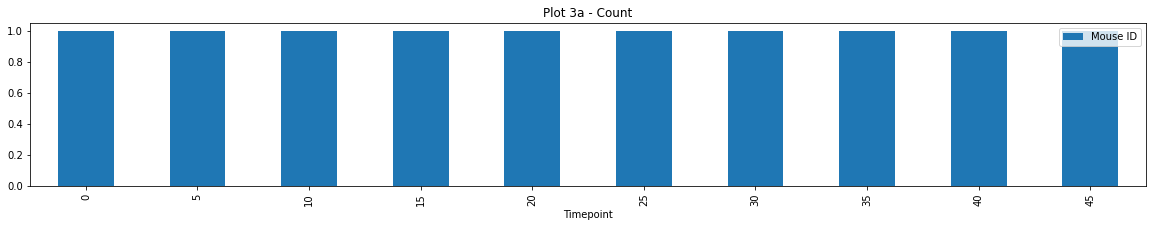

In [58]:
timepoint_count.plot(kind='bar', figsize=(20,3))
plt.title("Plot 3a - Count")
plt.show()

In [60]:
plot3a_unique.head()

Mouse ID
Timepoint          
0               248
5               236
10              221
15              205
20              193

In [61]:
mice_id_count = plot3a_unique.groupby("Mouse ID").count()
# timepoint_count =
mice_id_count

Empty DataFrame
Columns: []
Index: [130, 142, 153, 170, 182, 193, 205, 221, 236, 248]

In [27]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

## Pie Plots

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [33]:
clean_df.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [38]:
mice_sex_group = clean_df.groupby("Sex").count()
mice_sex_group

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
Sex                                                                 
Female       922        922                 922               922   
Male         958        958                 958               958   

        Drug Regimen  Age_months  Weight (g)  
Sex                                           
Female           922         922         922  
Male             958         958         958

In [40]:
x_axis2 = mice_sex_group.index.tolist()
x_axis2

['Female', 'Male']

([<matplotlib.axis.XTick at 0x7f91c1fa3610>,
 <a list of 2 Text major ticklabel objects>)

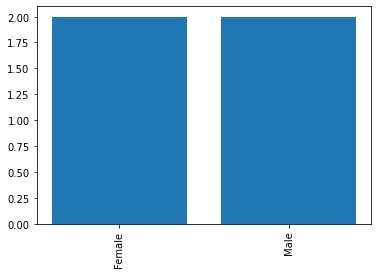

In [41]:
plt.bar(x_axis2, mice_sex_group["Mouse ID"].count())
plt.xticks(x_axis2, rotation=90)

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [23]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
